In [1]:
import ROOT
import array as array
import os
import glob
import ROOT
from ROOT import TH1D, TH2D, TTree,TFile, TUnfoldSys, TUnfoldDensity, TUnfold, TDirectoryFile
from random import gauss
import numpy as np
import root_numpy as rtnpy
import h5py
from awkward import JaggedArray, Table
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to JupyROOT 6.14/09


In [2]:
lumi=5750+2573+4242+4025+3104+7576+8632
print lumi
CrossSection=np.array([509.9,730.6,10.12,136.02,80.95,38.06,38.09,60450])
EventNumber=np.array([7662481,76489216,30289975.2,37877067,66826980,998276,992024,611509190272])
Scale=lumi*CrossSection/EventNumber
print Scale
MC_Compo=np.array(['TTJets_madgraph','TT_powheg','SingleTop_s-channel','SingleTop_t-channel-antitop','SingleTop_t-channel-top','SingleTop_tW-antitop','SingleTop_tW-top',"WJets"])


35902
[2.38909954 0.34292417 0.011995   0.12892735 0.04348942 1.36878991
 1.37850211 0.00354905]


In [3]:
fData=[]
path='/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_SingleMuonRun2016*.root'
files=glob.glob(path)
for f in files:
    fData.append(f)
print len(fData)
fMC=['/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_TTJets_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_TT_TuneCUETP8M2T4_13TeV-powheg-pythia8.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_s-channel_4f_InclusiveDecays_13TeV-amcatnlo-pythia8.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_t-channel_antitop_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_t-channel_top_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_tW_antitop_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M2T4.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_ST_tW_top_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M2T4.root',
     '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root'
    ]

print len(fMC)

7
8


In [4]:
F=ROOT.TFile.Open(fData[0],'read')
T=F.Get("jetObservables")
T.ls()

TDirectoryFile*		jetObservables	jetObservables
 KEY: TH1F	cutflow_reco;1	
 KEY: TH1F	cutflow_gen;1	
 KEY: TH1F	cutflowWeight_reco;1	
 KEY: TH1F	cutflowWeight_gen;1	
 KEY: TH1F	PUweight;1	
 KEY: TH1F	Lepweight;1	
 KEY: TH1F	nPVs_noSelnoWeight;1	
 KEY: TH1F	nleps_noSelnoWeight;1	
 KEY: TH1F	muons_pt_noSelnoWeight;1	muons
 KEY: TH1F	muons_eta_noSelnoWeight;1	muons
 KEY: TH1F	muons_phi_noSelnoWeight;1	muons
 KEY: TH1F	muons_mass_noSelnoWeight;1	muons
 KEY: TH1F	eles_pt_noSelnoWeight;1	eles
 KEY: TH1F	eles_eta_noSelnoWeight;1	eles
 KEY: TH1F	eles_phi_noSelnoWeight;1	eles
 KEY: TH1F	eles_mass_noSelnoWeight;1	eles
 KEY: TH1F	nAK8jets_noSelnoWeight;1	
 KEY: TH1F	AK8jets_pt_noSelnoWeight;1	AK8jets
 KEY: TH1F	AK8jets_eta_noSelnoWeight;1	AK8jets
 KEY: TH1F	AK8jets_phi_noSelnoWeight;1	AK8jets
 KEY: TH1F	AK8jets_mass_noSelnoWeight;1	AK8jets
 KEY: TH1F	nAK4jets_noSelnoWeight;1	
 KEY: TH1F	AK4jets_pt_noSelnoWeight;1	AK4jets
 KEY: TH1F	AK4jets_eta_noSelnoWeight;1	AK4jets
 KEY: TH1F	AK4jets_phi_noSelno

In [8]:
Objects_topSel=np.array([
    'recoJetPt_nom_topSel', 'recoJetSDmass_nom_topSel', 'recoJetTau21_nom_topSel',
    'recoJet_tau_0p5_1_WTA_kT_nom_topSel', 'recoJet_tau_1_1_WTA_kT_nom_topSel', 'recoJet_tau_2_1_WTA_kT_nom_topSel',
    'recoJet_tau_0p5_2_WTA_kT_nom_topSel', 'recoJet_tau_1_2_WTA_kT_nom_topSel', 'recoJet_tau_2_2_WTA_kT_nom_topSel',
    'recoJet_tau_0p5_3_WTA_kT_nom_topSel', 'recoJet_tau_1_3_WTA_kT_nom_topSel', 'recoJet_tau_2_3_WTA_kT_nom_topSel',
    'recoJet_tau_0p5_4_WTA_kT_nom_topSel', 'recoJet_tau_1_4_WTA_kT_nom_topSel', 'recoJet_tau_2_4_WTA_kT_nom_topSel',
    'recoJet_tau_0p5_5_WTA_kT_nom_topSel', 'recoJet_tau_1_5_WTA_kT_nom_topSel', 'recoJet_tau_2_5_WTA_kT_nom_topSel',
    'recoJet_tau_0p5_6_WTA_kT_nom_topSel', 'recoJet_tau_1_6_WTA_kT_nom_topSel', 'recoJet_tau_2_6_WTA_kT_nom_topSel',
    'recoJet_tau_0p5_7_WTA_kT_nom_topSel', 'recoJet_tau_1_7_WTA_kT_nom_topSel', 'recoJet_tau_2_7_WTA_kT_nom_topSel',
    'recoJet_tau_0p5_8_WTA_kT_nom_topSel', 'recoJet_tau_1_8_WTA_kT_nom_topSel', 'recoJet_tau_2_8_WTA_kT_nom_topSel',
    'recoJet_tau_0p5_9_WTA_kT_nom_topSel', 'recoJet_tau_1_9_WTA_kT_nom_topSel', 'recoJet_tau_2_9_WTA_kT_nom_topSel',
    'nPVs_topSel','nleps_topSel',
    'muons_pt_topSel','muons_eta_topSel','muons_phi_topSel','muons_mass_topSel',
    'eles_pt_topSel','eles_eta_topSel','eles_phi_topSel','eles_mass_topSel',
    'nAK8jets_topSel','leadAK8jet_pt_topSel','leadAK8jet_eta_topSel','leadAK8jet_phi_topSel','leadAK8jet_mass_topSel',
    'nAK4jets_topSel','AK4jets_pt_topSel','AK4jets_eta_topSel','AK4jets_phi_topSel','AK4jets_mass_topSel',
    'METPt_topSel','HT_topSel'
])
Objects_WSel=np.array([
    'recoJetPt_nom_WSel', 'recoJetSDmass_nom_WSel', 'recoJetTau21_nom_WSel',
    'recoJet_tau_0p5_1_WTA_kT_nom_WSel', 'recoJet_tau_1_1_WTA_kT_nom_WSel', 'recoJet_tau_2_1_WTA_kT_nom_WSel',
    'recoJet_tau_0p5_2_WTA_kT_nom_WSel', 'recoJet_tau_1_2_WTA_kT_nom_WSel', 'recoJet_tau_2_2_WTA_kT_nom_WSel',
    'recoJet_tau_0p5_3_WTA_kT_nom_WSel', 'recoJet_tau_1_3_WTA_kT_nom_WSel', 'recoJet_tau_2_3_WTA_kT_nom_WSel',
    'recoJet_tau_0p5_4_WTA_kT_nom_WSel', 'recoJet_tau_1_4_WTA_kT_nom_WSel', 'recoJet_tau_2_4_WTA_kT_nom_WSel',
    'recoJet_tau_0p5_5_WTA_kT_nom_WSel', 'recoJet_tau_1_5_WTA_kT_nom_WSel', 'recoJet_tau_2_5_WTA_kT_nom_WSel',
    'recoJet_tau_0p5_6_WTA_kT_nom_WSel', 'recoJet_tau_1_6_WTA_kT_nom_WSel', 'recoJet_tau_2_6_WTA_kT_nom_WSel',
    'recoJet_tau_0p5_7_WTA_kT_nom_WSel', 'recoJet_tau_1_7_WTA_kT_nom_WSel', 'recoJet_tau_2_7_WTA_kT_nom_WSel',
    'recoJet_tau_0p5_8_WTA_kT_nom_WSel', 'recoJet_tau_1_8_WTA_kT_nom_WSel', 'recoJet_tau_2_8_WTA_kT_nom_WSel',
    'recoJet_tau_0p5_9_WTA_kT_nom_WSel', 'recoJet_tau_1_9_WTA_kT_nom_WSel', 'recoJet_tau_2_9_WTA_kT_nom_WSel',
    'nPVs_WSel','nleps_WSel',
    'muons_pt_WSel','muons_eta_WSel','muons_phi_WSel','muons_mass_WSel',
    'eles_pt_WSel','eles_eta_WSel','eles_phi_WSel','eles_mass_WSel',
    'nAK8jets_WSel','leadAK8jet_pt_WSel','leadAK8jet_eta_WSel','leadAK8jet_phi_WSel','leadAK8jet_mass_WSel',
    'nAK4jets_WSel','AK4jets_pt_WSel','AK4jets_eta_WSel','AK4jets_phi_WSel','AK4jets_mass_WSel',
    'METPt_WSel','HT_WSel'

])
Title_WSel=np.array([
    ['Events/(50 GeV)','P_{t}','P_{t}/GeV'],['Events/(5 GeV)','Softdrop Mass','Softdrop Mass/GeV'],['Events/0.05','#tau_{21}','#tau_{21}'],
    ['Events/0.03','#tau_{1}^{(0.5)}','#tau_{1}^{(0.5)}'],['Events/0.02','#tau_{1}^{(1)}','#tau_{1}^{(1)}'],['Events/0.01','#tau_{1}^{(2)}','#tau_{1}^{(2)}'],
    ['Events/0.02','#tau_{2}^{(0.5)}','#tau_{2}^{(0.5)}'],['Events/0.02','#tau_{2}^{(1)}','#tau_{2}^{(1)}'],['Events/0.01','#tau_{2}^{(2)}','#tau_{2}^{(2)}'],
    ['Events/0.02','#tau_{3}^{(0.5)}','#tau_{3}^{(0.5)}'],['Events/0.01','#tau_{3}^{(1)}','#tau_{3}^{(1)}'],['Events/0.01','#tau_{3}^{(2)}','#tau_{3}^{(2)}'],
    ['Events/0.02','#tau_{4}^{(0.5)}','#tau_{4}^{(0.5)}'],['Events/0.01','#tau_{4}^{(1)}','#tau_{4}^{(1)}'],['Events/0.01','#tau_{4}^{(2)}','#tau_{4}^{(2)}'],
    ['Events/0.02','#tau_{5}^{(0.5)}','#tau_{5}^{(0.5)}'],['Events/0.01','#tau_{5}^{(1)}','#tau_{5}^{(1)}'],['Events/0.01','#tau_{5}^{(2)}','#tau_{5}^{(2)}'],
    ['Events/0.02','#tau_{6}^{(0.5)}','#tau_{6}^{(0.5)}'],['Events/0.01','#tau_{6}^{(1)}','#tau_{6}^{(1)}'],['Events/0.01','#tau_{6}^{(2)}','#tau_{6}^{(2)}'],
    ['Events/0.02','#tau_{7}^{(0.5)}','#tau_{7}^{(0.5)}'],['Events/0.01','#tau_{7}^{(1)}','#tau_{7}^{(1)}'],['Events/0.01','#tau_{7}^{(2)}','#tau_{7}^{(2)}'],
    ['Events/0.02','#tau_{8}^{(0.5)}','#tau_{8}^{(0.5)}'],['Events/0.01','#tau_{8}^{(1)}','#tau_{8}^{(1)}'],['Events/0.01','#tau_{8}^{(2)}','#tau_{8}^{(2)}'],
    ['Events/0.02','#tau_{9}^{(0.5)}','#tau_{9}^{(0.5)}'],['Events/0.01','#tau_{9}^{(1)}','#tau_{9}^{(1)}'],['Events/0.01','#tau_{9}^{(2)}','#tau_{9}^{(2)}'],
    ['Events/2','Number of PV','Number of PV'],['Events','Number of Leptons','Number of Leptons'],
    ['Events/(20 GeV)','P_{t} of Muons','P_{t} of Muons/GeV'],['Events/0.4','#eta of Muons','#eta of Muons'],['Events/(#pi/10)','#phi of Muons','#phi of Muons'],['Events/(50 GeV)','Mass of Muons','Mass of Muons/GeV'],
    ['Events/(20 GeV)','P_{t} of Electrons','P_{t} of Electrons/GeV'],['Events/0.4','#eta of Electrons','#eta of Electrons'],['Events/(#pi/10)','#phi of Electrons','#phi of Electrons'],['Events/(50 GeV)','Mass of Electrons','Mass of Electrons/GeV'],
    ['Events','Number of AK8Jets','Number of AK8Jets'],['Events/(60 GeV)','P_{t} of leadAK8Jets','P_{t} of leadAK8Jets/GeV'],['Events/0.4','#eta of leadAK8Jets','#eta of leadAK8Jets'],['Events/(#pi/10)','#phi of leadAK8Jets','#phi of leadAK8Jets'],['Events/(20 GeV)','Mass of leadAK8Jets','Mass of leadAK8Jets/GeV'],
    ['Events','Number of AK4Jets','Number of AK4Jets'],['Events/(40 GeV)','P_{t} of AK4Jets','P_{t} of AK4Jets/GeV'],['Events/0.4','#eta of AK4Jets','#eta of AK4Jets'],['Events/(#pi/10)','#phi of AK4Jets','#phi of AK4Jets'],['Events/(20 GeV)','Mass of AK4Jets','Mass of AK4Jets/GeV'],
    ['Events/(30 GeV)','MET P_{t}','MET P_{t}/GeV'],['Events/(100 GeV)','HT','HT/GeV']
])
Title_topSel=np.array([
    ['Events/(50 GeV)','P_{t}','P_{t}/GeV'],['Events/(15 GeV)','Softdrop Mass','Softdrop Mass/GeV'],['Events/0.05','#tau_{21}','#tau_{21}'],
    ['Events/0.03','#tau_{1}^{(0.5)}','#tau_{1}^{(0.5)}'],['Events/0.02','#tau_{1}^{(1)}','#tau_{1}^{(1)}'],['Events/0.01','#tau_{1}^{(2)}','#tau_{1}^{(2)}'],
    ['Events/0.02','#tau_{2}^{(0.5)}','#tau_{2}^{(0.5)}'],['Events/0.02','#tau_{2}^{(1)}','#tau_{2}^{(1)}'],['Events/0.01','#tau_{2}^{(2)}','#tau_{2}^{(2)}'],
    ['Events/0.02','#tau_{3}^{(0.5)}','#tau_{3}^{(0.5)}'],['Events/0.01','#tau_{3}^{(1)}','#tau_{3}^{(1)}'],['Events/0.01','#tau_{3}^{(2)}','#tau_{3}^{(2)}'],
    ['Events/0.02','#tau_{4}^{(0.5)}','#tau_{4}^{(0.5)}'],['Events/0.01','#tau_{4}^{(1)}','#tau_{4}^{(1)}'],['Events/0.01','#tau_{4}^{(2)}','#tau_{4}^{(2)}'],
    ['Events/0.02','#tau_{5}^{(0.5)}','#tau_{5}^{(0.5)}'],['Events/0.01','#tau_{5}^{(1)}','#tau_{5}^{(1)}'],['Events/0.01','#tau_{5}^{(2)}','#tau_{5}^{(2)}'],
    ['Events/0.02','#tau_{6}^{(0.5)}','#tau_{6}^{(0.5)}'],['Events/0.01','#tau_{6}^{(1)}','#tau_{6}^{(1)}'],['Events/0.01','#tau_{6}^{(2)}','#tau_{6}^{(2)}'],
    ['Events/0.02','#tau_{7}^{(0.5)}','#tau_{7}^{(0.5)}'],['Events/0.01','#tau_{7}^{(1)}','#tau_{7}^{(1)}'],['Events/0.01','#tau_{7}^{(2)}','#tau_{7}^{(2)}'],
    ['Events/0.02','#tau_{8}^{(0.5)}','#tau_{8}^{(0.5)}'],['Events/0.01','#tau_{8}^{(1)}','#tau_{8}^{(1)}'],['Events/0.01','#tau_{8}^{(2)}','#tau_{8}^{(2)}'],
    ['Events/0.02','#tau_{9}^{(0.5)}','#tau_{9}^{(0.5)}'],['Events/0.01','#tau_{9}^{(1)}','#tau_{9}^{(1)}'],['Events/0.01','#tau_{9}^{(2)}','#tau_{9}^{(2)}'],
    ['Events/2','Number of PV','Number of PV'],['Events','Number of Leptons','Number of Leptons'],
    ['Events/(30 GeV)','P_{t} of Muons','P_{t} of Muons/GeV'],['Events/0.4','#eta of Muons','#eta of Muons'],['Events/(#pi/10)','#phi of Muons','#phi of Muons'],['Events/(50 GeV)','Mass of Muons','Mass of Muons/GeV'],
    ['Events/(30 GeV)','P_{t} of Electrons','P_{t} of Electrons/GeV'],['Events/0.4','#eta of Electrons','#eta of Electrons'],['Events/(#pi/10)','#phi of Electrons','#phi of Electrons'],['Events/(50 GeV)','Mass of Electrons','Mass of Electrons/GeV'],
    ['Events','Number of AK8Jets','Number of AK8Jets'],['Events/(60 GeV)','P_{t} of leadAK8Jets','P_{t} of leadAK8Jets/GeV'],['Events/0.4','#eta of leadAK8Jets','#eta of leadAK8Jets'],['Events/(#pi/10)','#phi of leadAK8Jets','#phi of leadAK8Jets'],['Events/(20 GeV)','Mass of leadAK8Jets','Mass of leadAK8Jets/GeV'],
    ['Events','Number of AK4Jets','Number of AK4Jets'],['Events/(50 GeV)','P_{t} of AK4Jets','P_{t} of AK4Jets/GeV'],['Events/0.4','#eta of AK4Jets','#eta of AK4Jets'],['Events/(#pi/10)','#phi of AK4Jets','#phi of AK4Jets'],['Events/(20 GeV)','Mass of AK4Jets','Mass of AK4Jets/GeV'],
    ['Events/(40 GeV)','MET P_{t}','MET P_{t}/GeV'],['Events/(100 GeV)','HT','HT/GeV']
])
Range_WSel=[
    [20,0,1000],[20,50,150],[20,0,1],
    [20,0,0.6],[20,0,0.4],[20,0,0.2],
    [25,0,0.5],[20,0,0.4],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[10,0,0.1],[10,0,0.1],
    [20,0,0.4],[10,0,0.1],[10,0,0.1],
    [20,0,0.4],[10,0,0.1],[10,0,0.1],
    [25,0,50],[4,0,4],
    [20,0,400],[20,-4,4],[20,-3.14,3.14],[20,0,1000],
    [20,0,400],[20,-4,4],[20,-3.14,3.14],[20,0,1000],
    [8,0,8],[20,0,1200],[20,-4,4],[20,-3.14,3.14],[20,0,400],
    [8,0,8],[20,0,800],[20,-4,4],[20,-3.14,3.14],[20,0,400],
    [20,0,600],[20,0,2000]
]
Range_topSel=[
    [30,0,1500],[20,100,400],[20,0,1],
    [20,0,0.6],[20,0,0.4],[20,0,0.2],
    [20,0,0.4],[20,0,0.4],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[20,0,0.2],[10,0,0.1],
    [20,0,0.4],[10,0,0.1],[10,0,0.1],
    [20,0,0.4],[10,0,0.1],[10,0,0.1],
    [20,0,0.4],[10,0,0.1],[10,0,0.1],
    [25,0,50],[4,0,4],
    [20,0,600],[20,-4,4],[20,-3.14,3.14],[20,0,1000],
    [20,0,600],[20,-4,4],[20,-3.14,3.14],[20,0,1000],
    [8,0,8],[20,0,1200],[20,-4,4],[20,-3.14,3.14],[20,0,400],
    [8,0,8],[20,0,1000],[20,-4,4],[20,-3.14,3.14],[20,0,400],
    [20,0,800],[20,0,2000]
]

In [6]:
def Fill(h0,h):
    N=h0.GetNbinsX()
    for i in range(1,N):
        for j in range(int(h0.GetBinContent(i))):
            h.Fill(h0.GetBinCenter(i))

In [9]:
f_Data=np.zeros((len(fData),),dtype=ROOT.TFile)
Hist_Data_WSel=[]
Hist_Data_topSel=[]
for i in range(len(fData)):
    f_Data[i]=ROOT.TFile.Open(fData[i],'read')
    t=f_Data[i].Get('jetObservables')
    for j in range(len(Objects_WSel)):
        if i is 0:
            Hist_Data_WSel.append(t.Get(Objects_WSel[j]))
        else:
            Hist_Data_WSel[j].Add(t.Get(Objects_WSel[j]))
    for j in range(len(Objects_topSel)):
        if i is 0:
            Hist_Data_topSel.append(t.Get(Objects_topSel[j]))
        else:
            Hist_Data_topSel[j].Add(t.Get(Objects_topSel[j]))

Data_WSel=[]
Data_topSel=[]
for i in range(len(Objects_WSel)):
    Hist=ROOT.TH1F("",";;",*Range_WSel[i])
    Hist.SetStats(ROOT.kFALSE)
    Fill(Hist_Data_WSel[i],Hist)
    Data_WSel.append(Hist)
for i in range(len(Objects_topSel)):
    Hist=ROOT.TH1F("",";;",*Range_topSel[i])
    Hist.SetStats(ROOT.kFALSE)
    Fill(Hist_Data_topSel[i],Hist)
    Data_topSel.append(Hist)

            
f_MC=np.zeros((len(fMC),),dtype=ROOT.TFile)
Hist_MC_WSel=[]
Hist_MC_topSel=[]
for i in range(len(fMC)):
    f_MC[i]=ROOT.TFile.Open(fMC[i],'read')
    t=f_MC[i].Get('jetObservables')
    HW=[]
    for string in Objects_WSel:
        HW.append(t.Get(string))
    Hist_MC_WSel.append(HW)
    Htop=[]
    for string in Objects_topSel:
        Htop.append(t.Get(string))
    Hist_MC_topSel.append(Htop)


l=len(Hist_MC_WSel[0])
TTm_WSel=[]
TTp_WSel=[]
st_WSel=[]
Wj_WSel=[]
for i in range(l):
    Hist=ROOT.TH1F("",";;",*Range_WSel[i])
    Fill(Hist_MC_WSel[0][i],Hist)
    Hist.Scale(Scale[0])
    TTm_WSel.append(Hist)
    Hist=ROOT.TH1F("",";;",*Range_WSel[i])
    Fill(Hist_MC_WSel[1][i],Hist)
    Hist.Scale(Scale[1])
    TTp_WSel.append(Hist)
    #Hist=ROOT.TH1F("",";;",*Range_WSel[i])
    #Fill(Hist_MC_WSel[7][i],Hist)
    #Hist.Scale(Scale[7])
    Wj_WSel.append(Hist)
    Hist=ROOT.TH1F("",";;",*Range_WSel[i])
    for j in range(3,7):
        hist=ROOT.TH1F("",";;",*Range_WSel[i])
        Fill(Hist_MC_WSel[j][i],hist)
        hist.Scale(Scale[j])
        Hist.Add(hist)
    st_WSel.append(Hist)
TTm_topSel=[]
TTp_topSel=[]
st_topSel=[]
for i in range(l):
    Hist=ROOT.TH1F("",";;",*Range_topSel[i])
    Fill(Hist_MC_topSel[0][i],Hist)
    Hist.Scale(Scale[0])
    TTm_topSel.append(Hist)
    Hist=ROOT.TH1F("",";;",*Range_topSel[i])
    Fill(Hist_MC_topSel[1][i],Hist)
    Hist.Scale(Scale[1])
    TTp_topSel.append(Hist)
    Hist=ROOT.TH1F("",";;",*Range_topSel[i])
    for j in range(3,7):
        hist=ROOT.TH1F("",";;",*Range_topSel[i])
        Fill(Hist_MC_topSel[j][i],hist)
        hist.Scale(Scale[j])
        Hist.Add(hist)
    st_topSel.append(Hist)

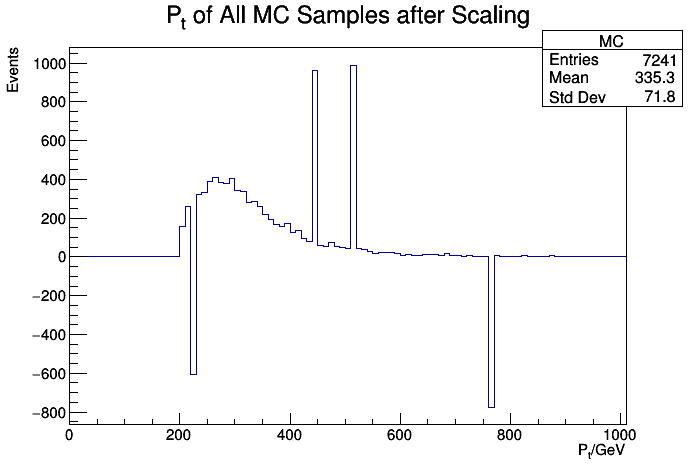

In [9]:
MCs=ROOT.TH1F('MC',"P_{t} of All MC Samples after Scaling;P_{t}/GeV;Events",500,0,5000)
for i in range(len(fMC)):
    MCs.Add(Hist_MC_WSel[i][0],Scale[i])
c=ROOT.TCanvas()
c.Draw()
#MCs.Rebin(5)
MCs.SetAxisRange(0,1000)
MCs.Draw("hist")

In [10]:
import sys
#print (sys.path)
sys.path.insert(0,'/t3home/gelliu/Unfolding_Substructure/CMSSW_10_6_5/python/jetObservables/Unfolding')
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()

CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = True
#CMS_lumi.extraText = "Preliminary"
CMS_lumi.lumi_13TeV = "%.3f fb^{-1} (13 TeV)"%np.round(lumi/1000.0,3)
CMS_lumi.lumi_sqrtS = "%.2f fb^{-1} (13 TeV)"%np.round(lumi/1000,3)
CMS_lumi.relPosX = 0.12

iPos = 0
#if( iPos==0 ): CMS_lumi.relPosX = 0.16


TT_powheg W selection


Warning in <TFile::Append>: Replacing existing TH1: P_{t} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_WSel/recoJetPt_nom_WSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: Softdrop Mass (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_WSel/recoJetSDmass_nom_WSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{21} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_WSel/recoJetTau21_nom_WSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{1}^{(0.5)} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_WSel/recoJet_tau_0p5_1_WTA_kT_nom_WSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{1}^{(1)} (Potential m

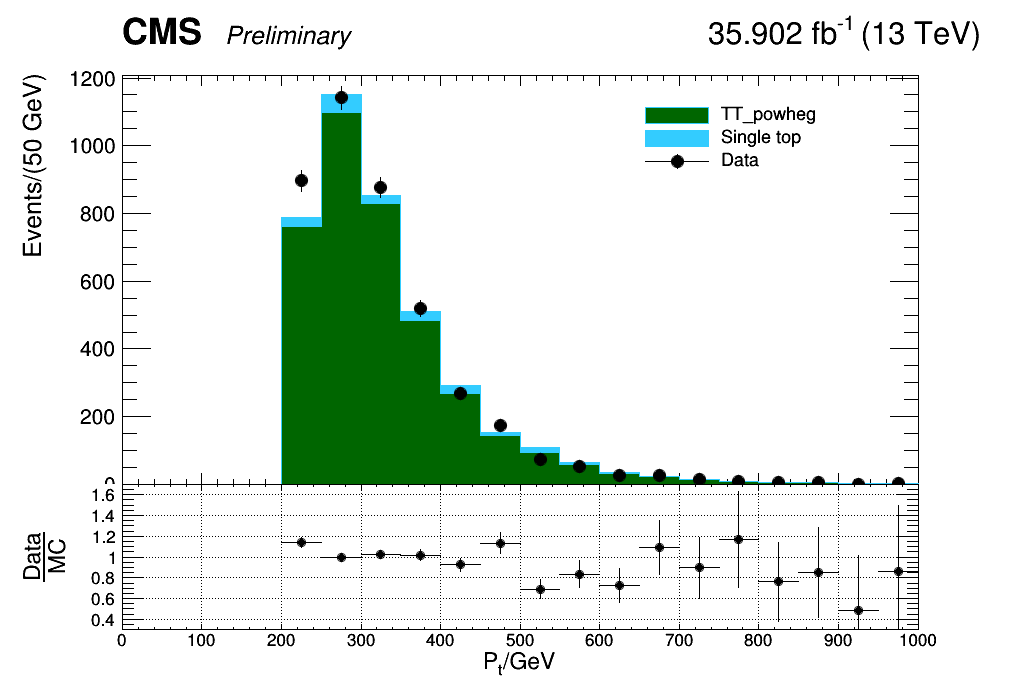

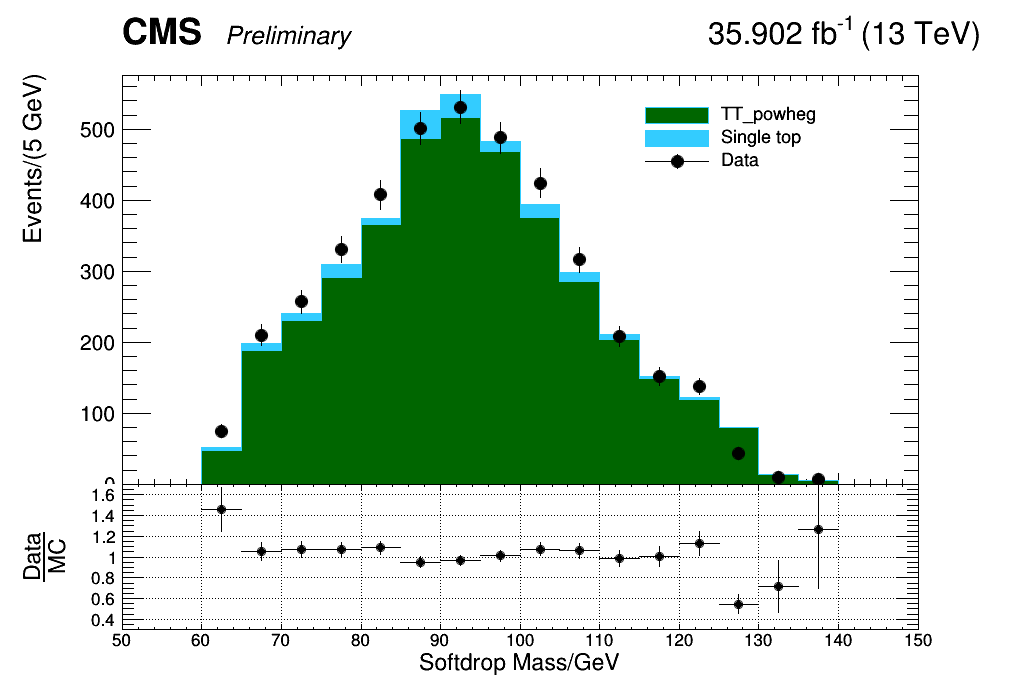

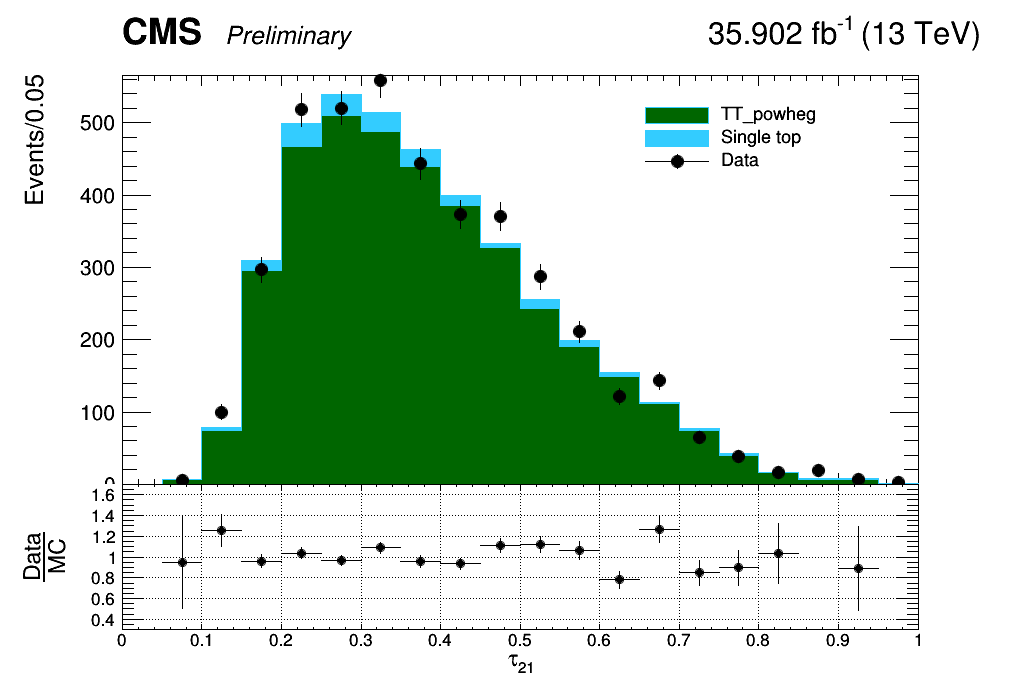

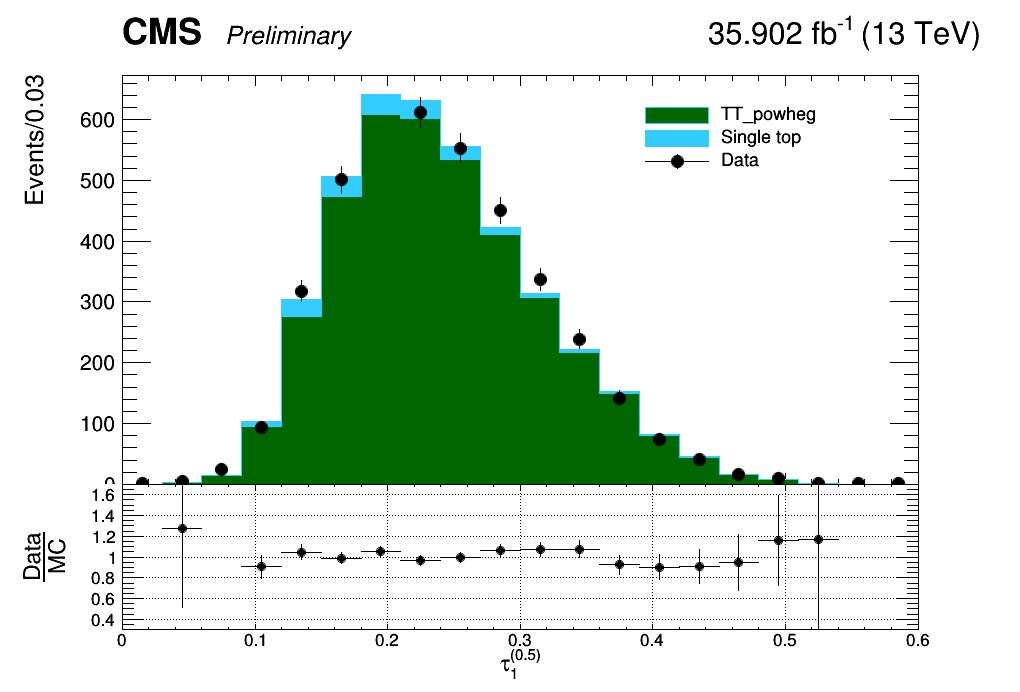

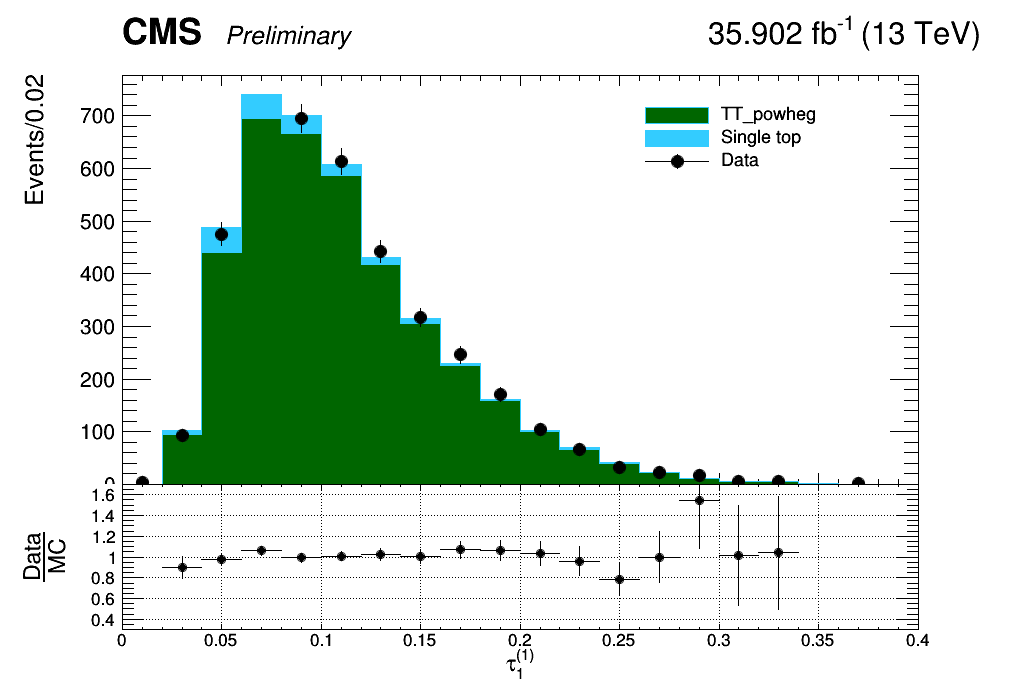

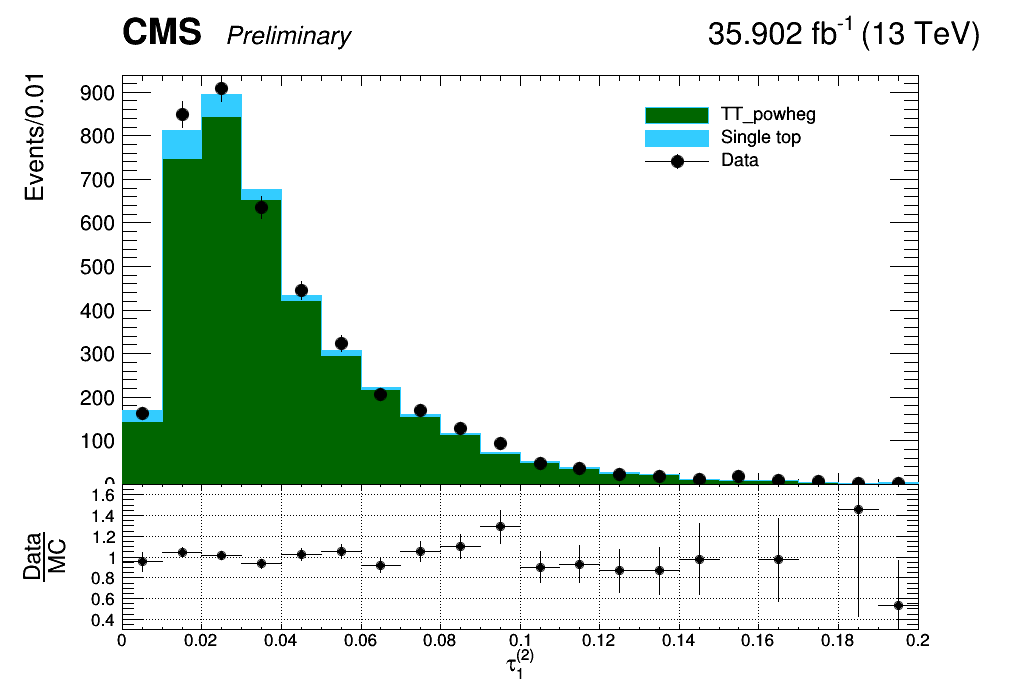

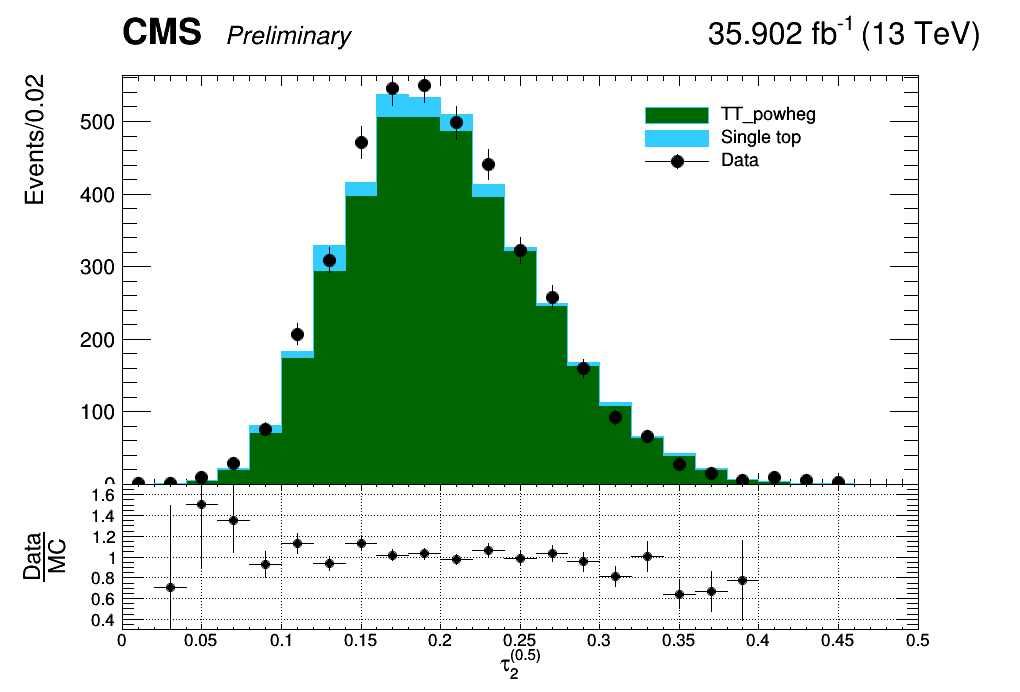

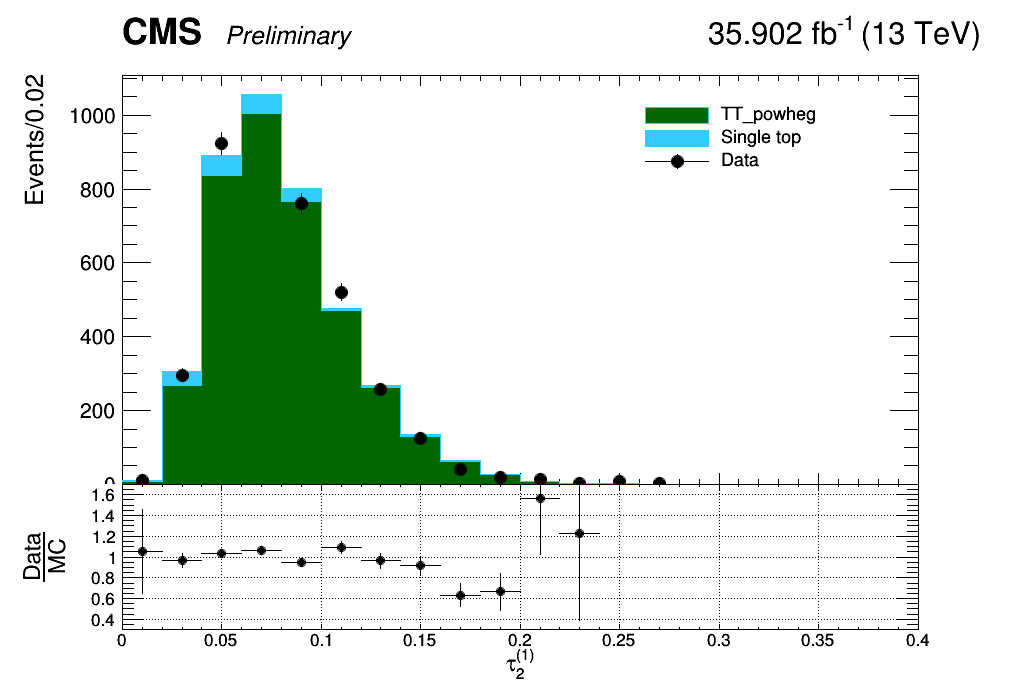

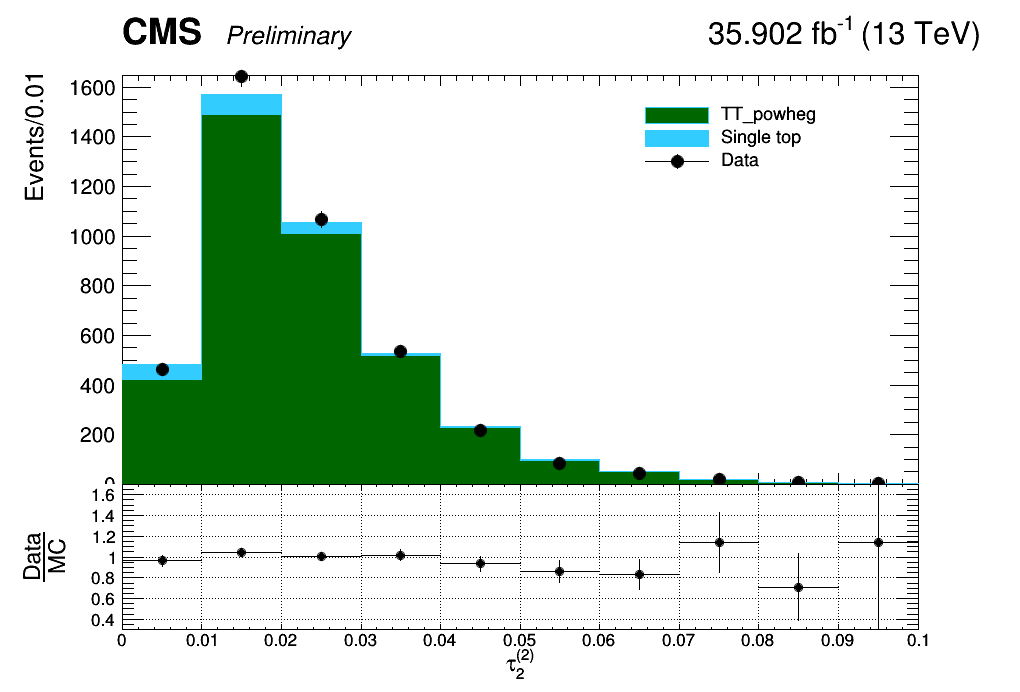

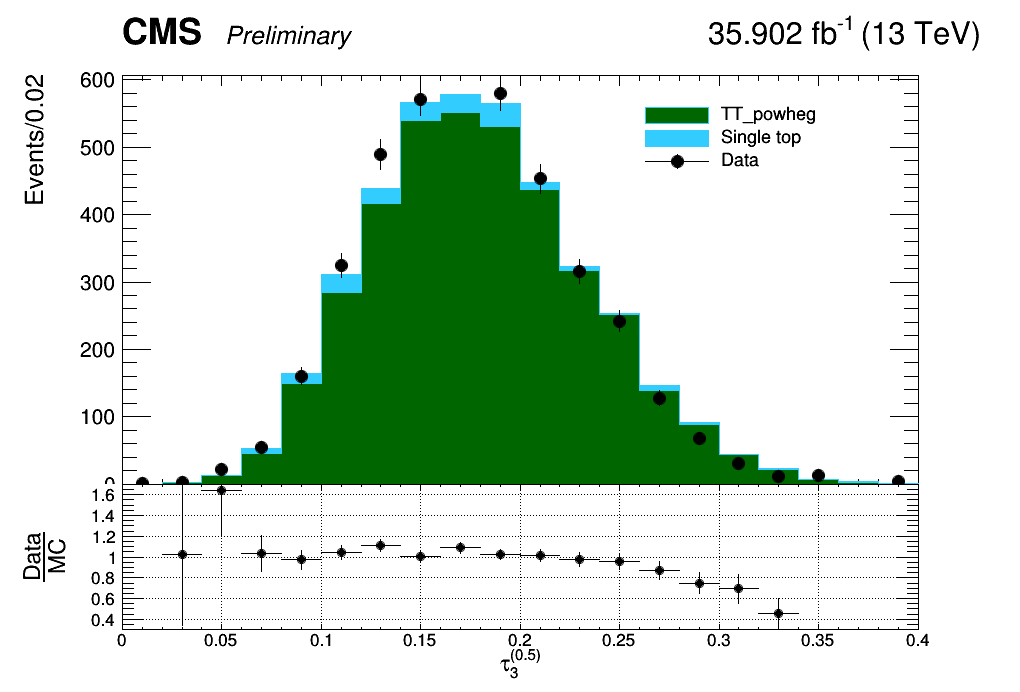

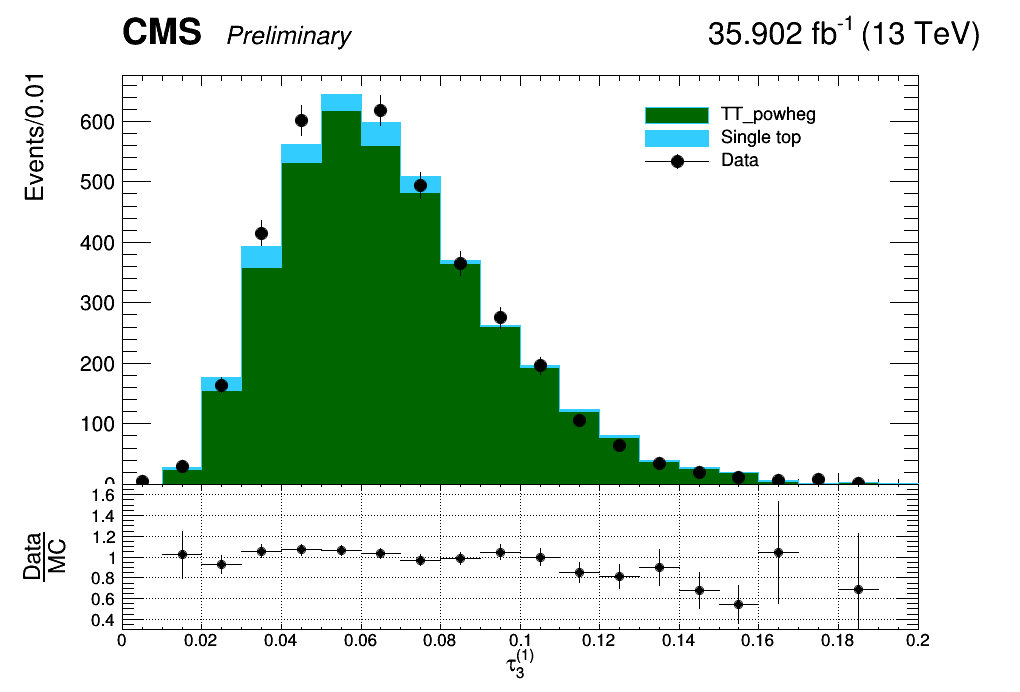

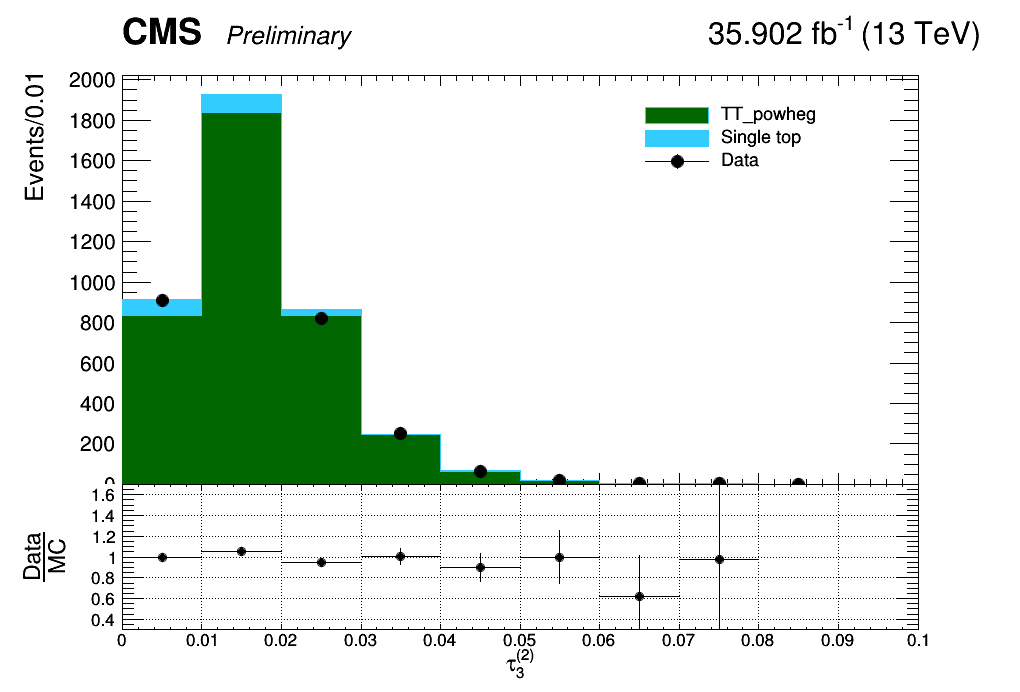

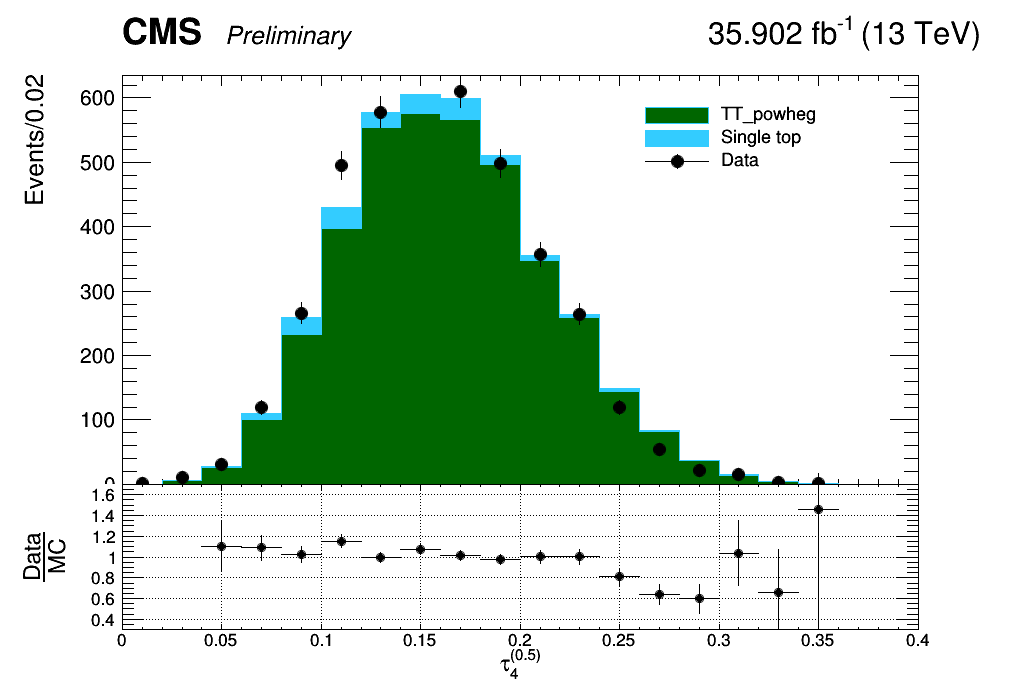

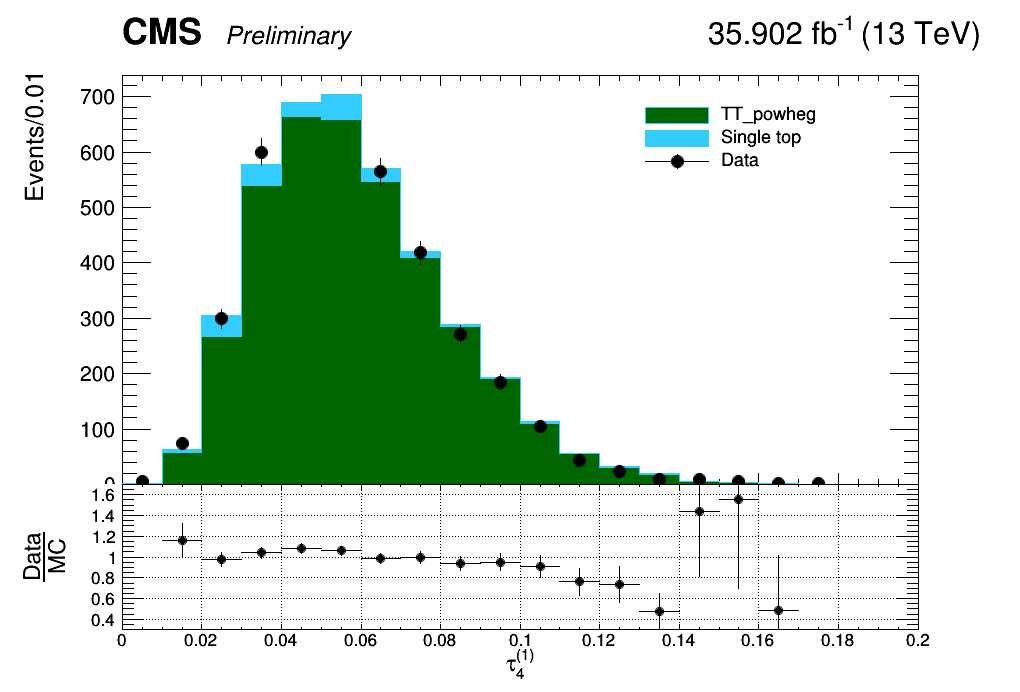

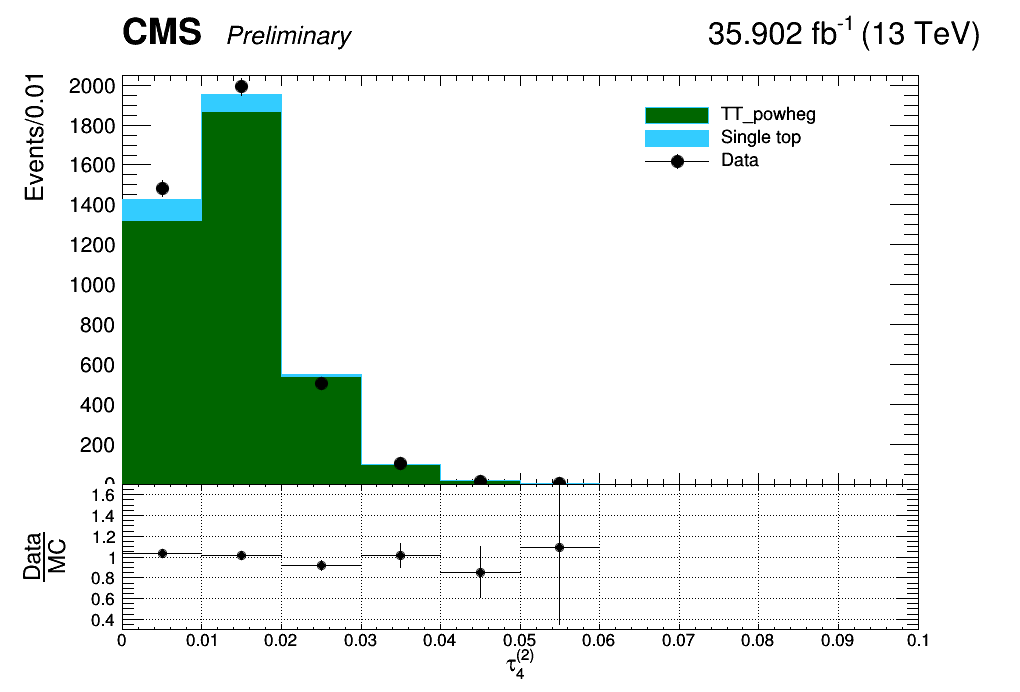

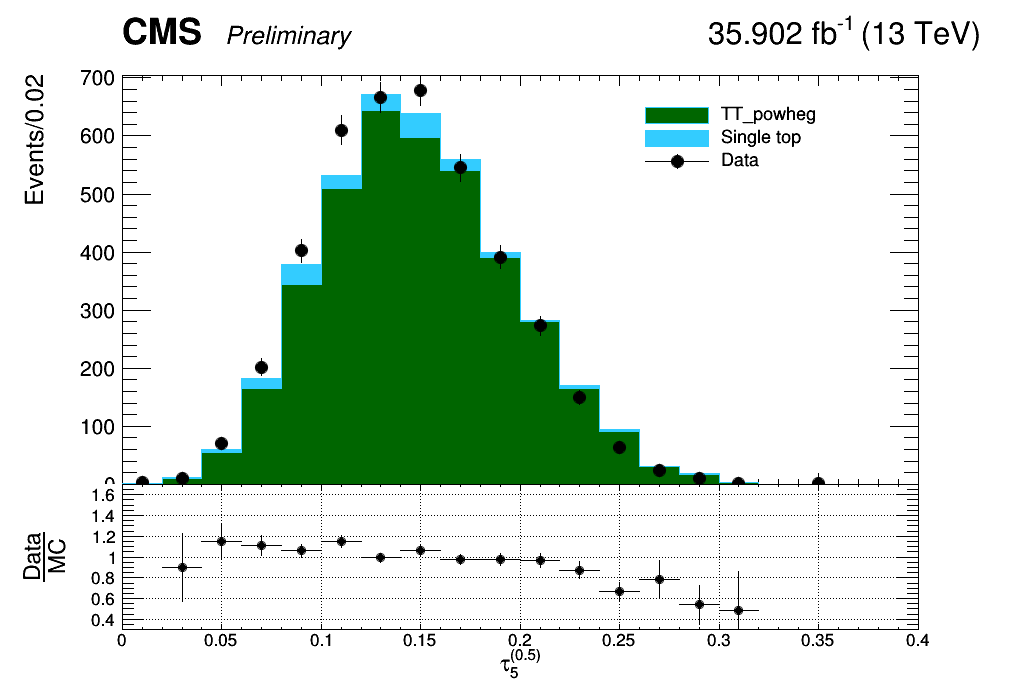

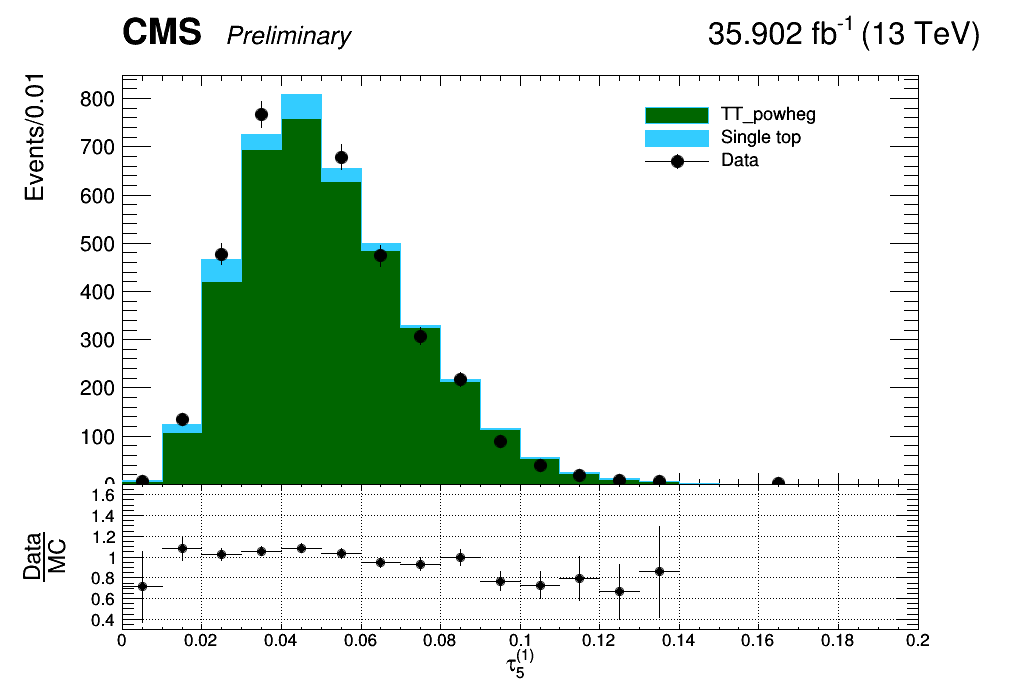

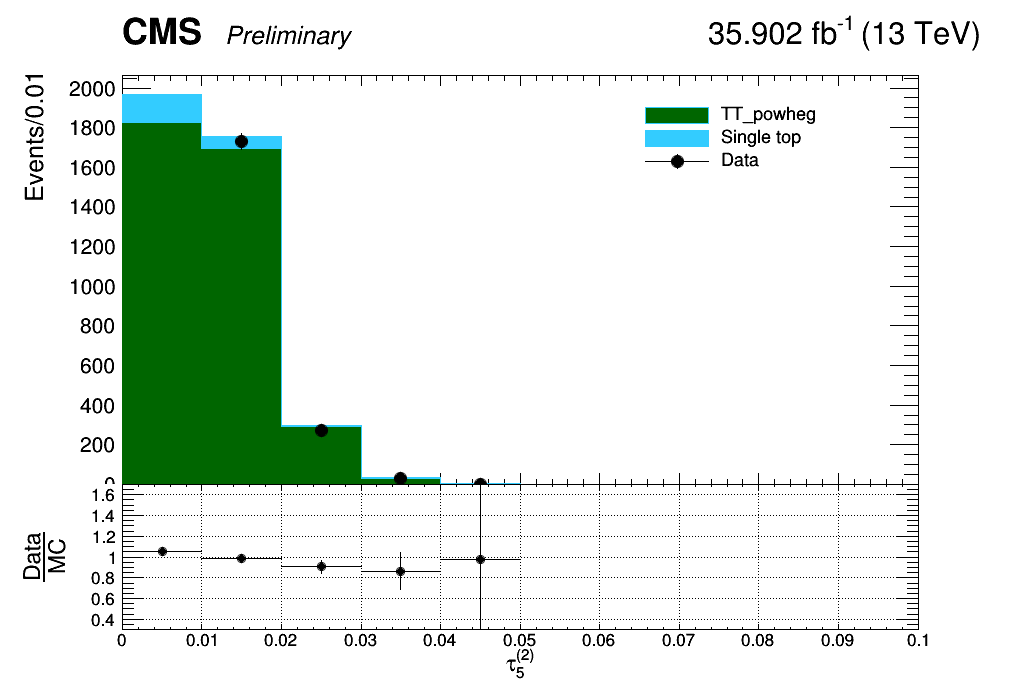

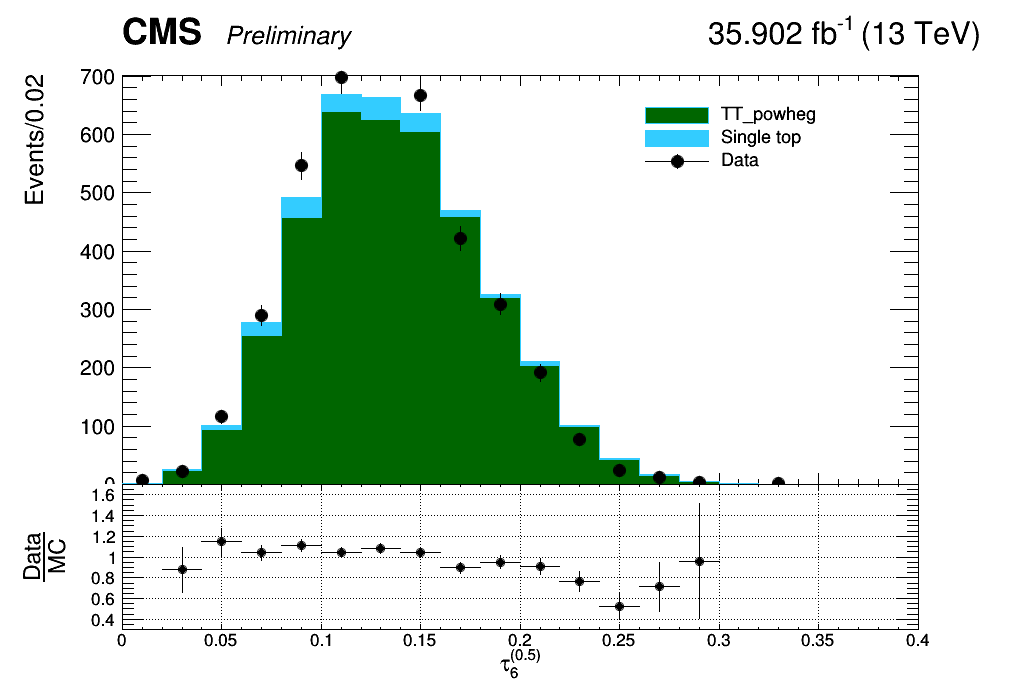

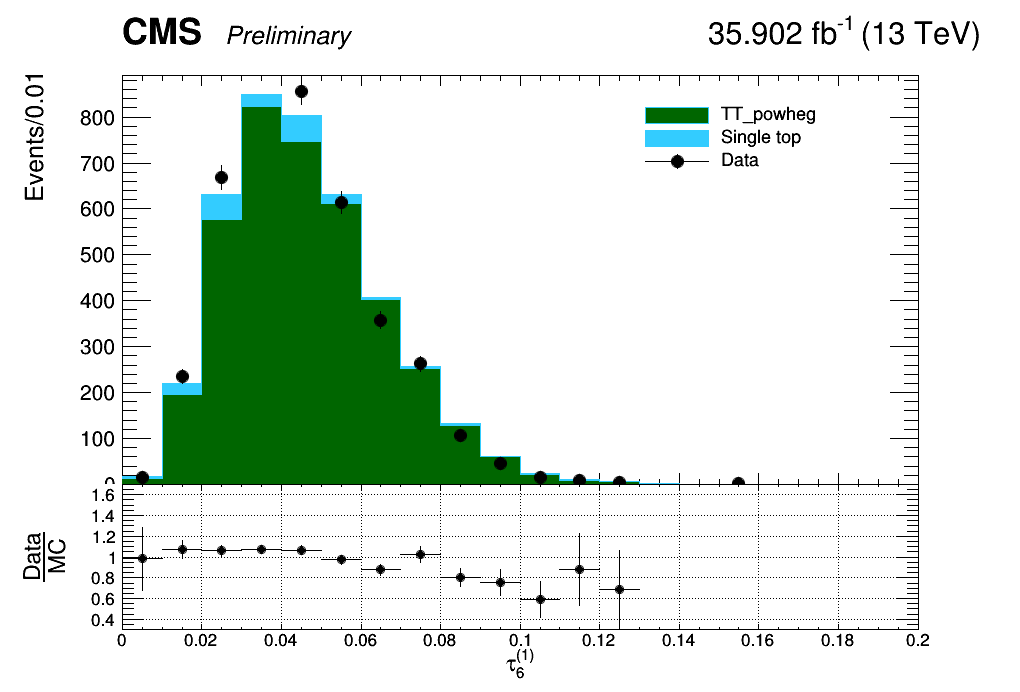

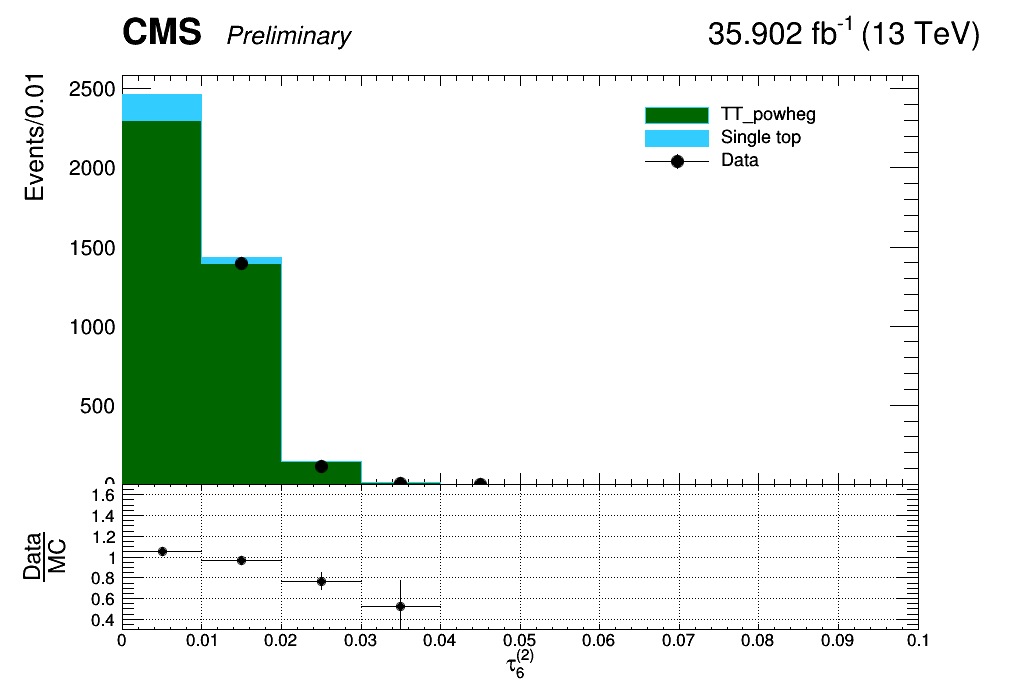

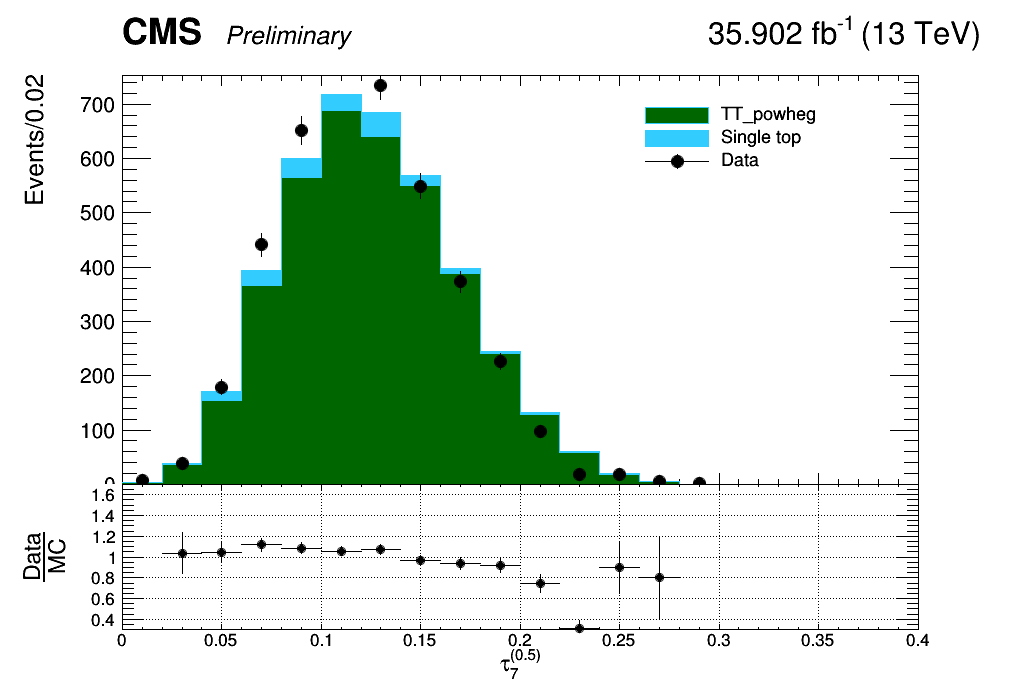

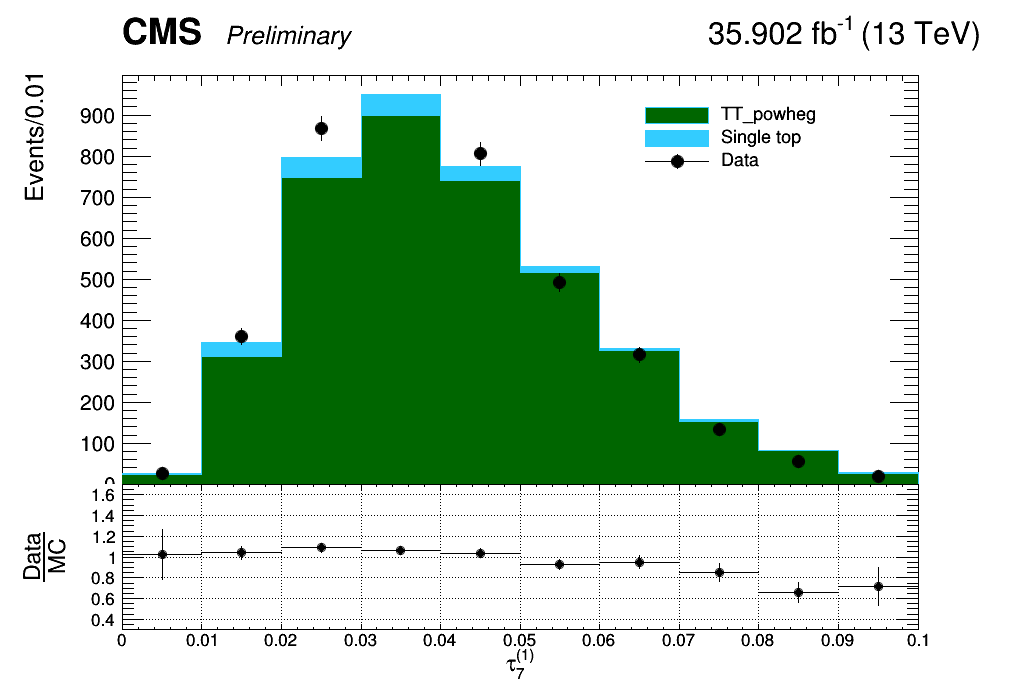

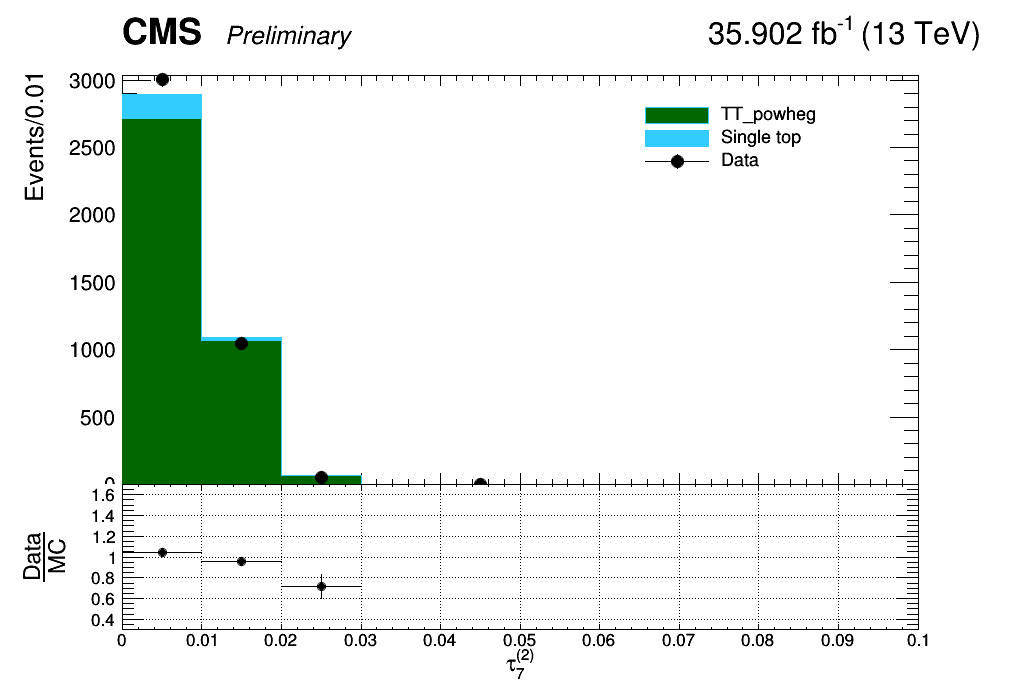

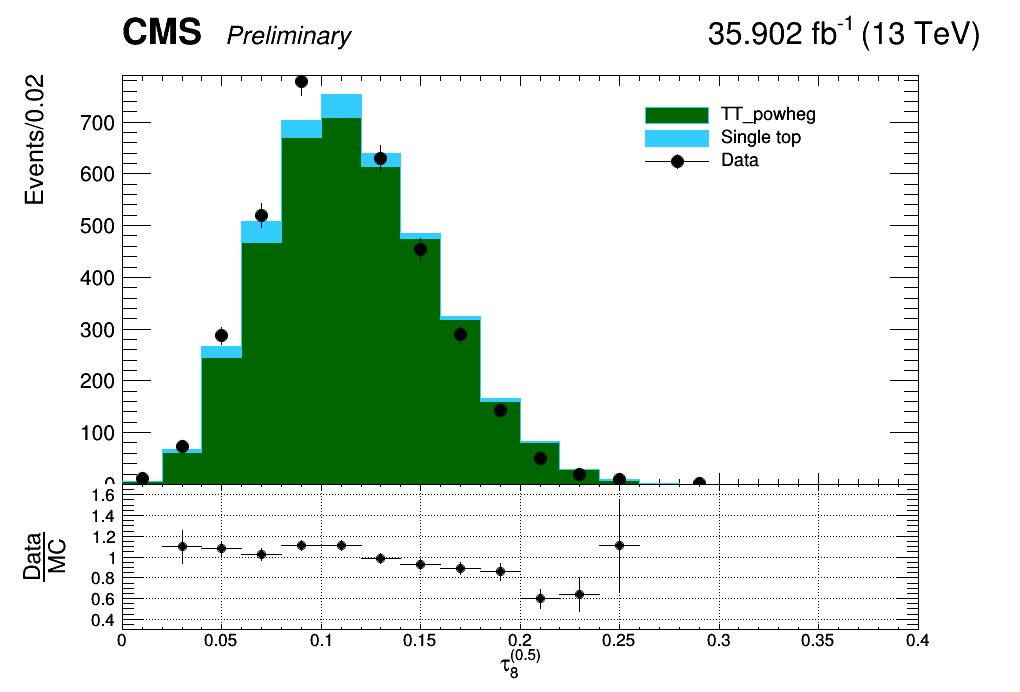

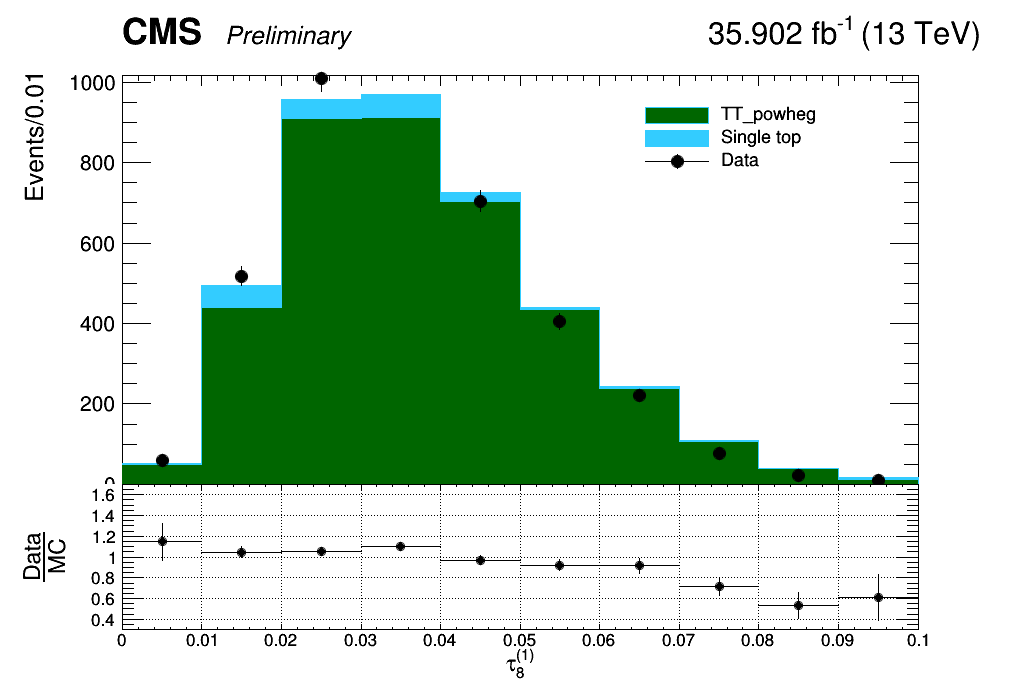

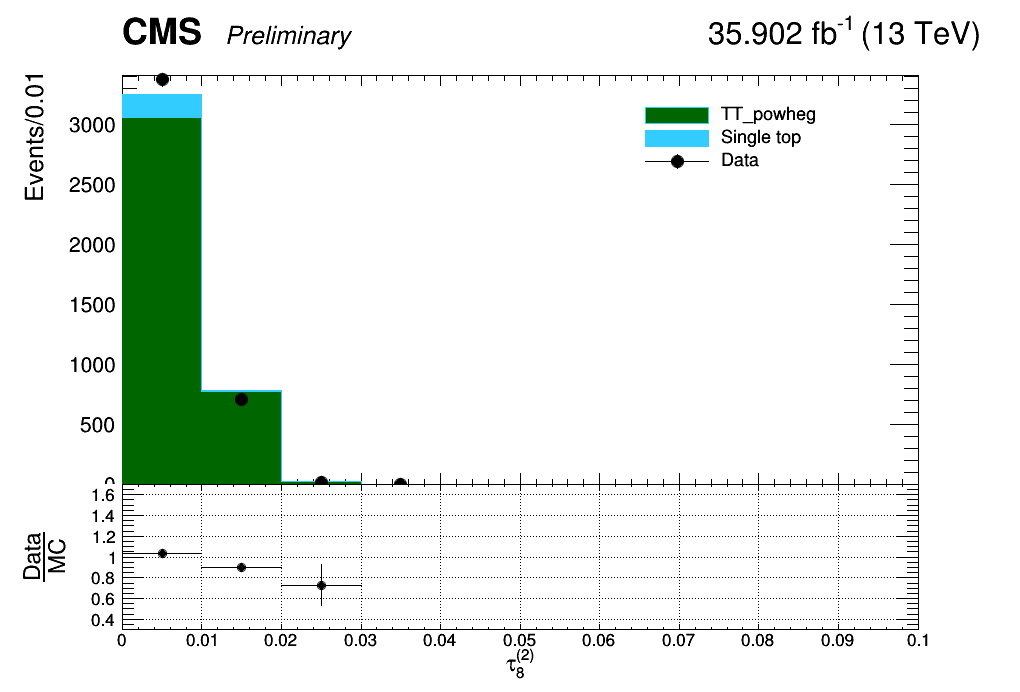

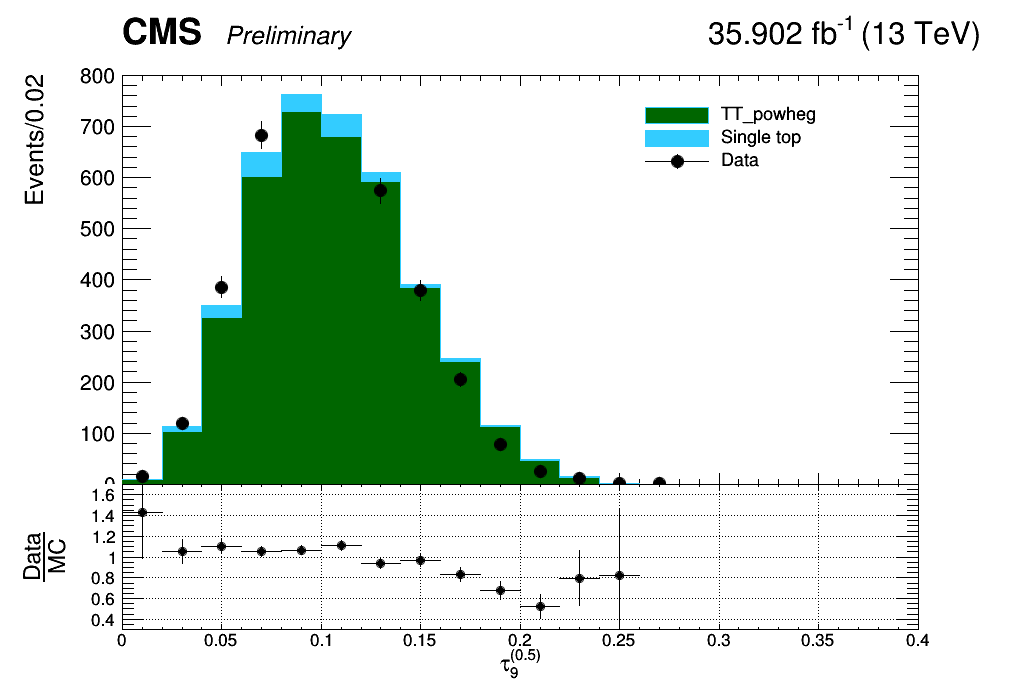

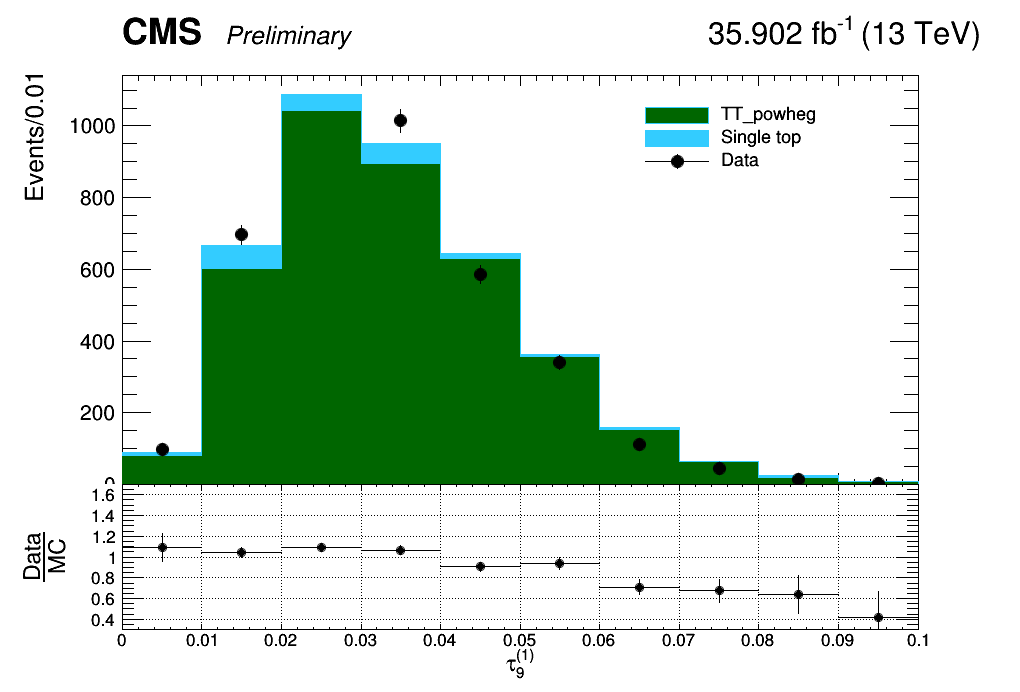

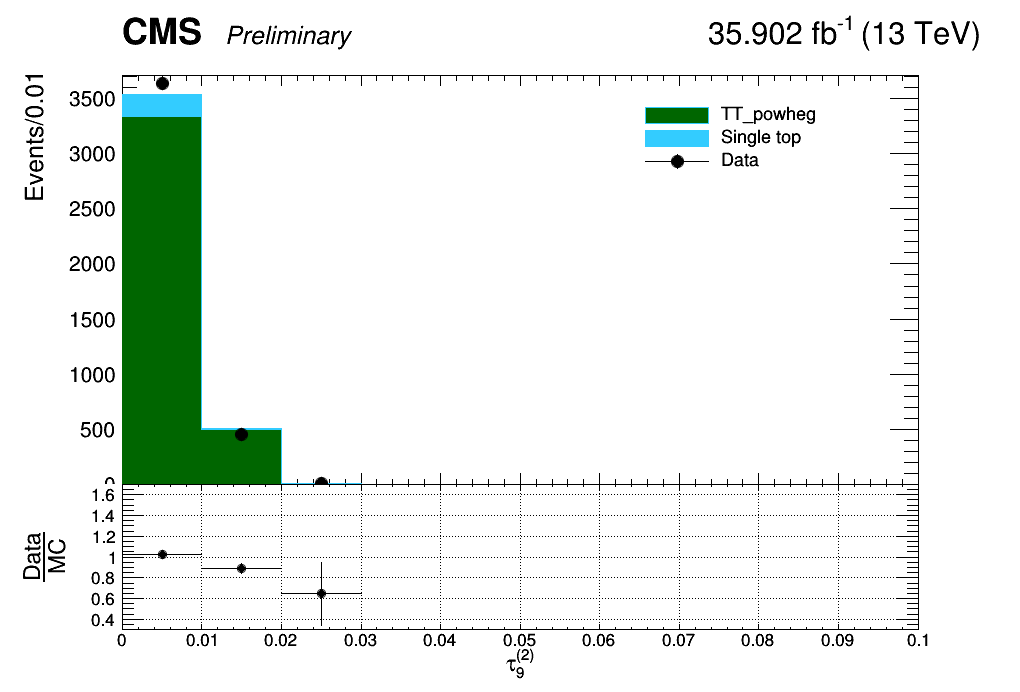

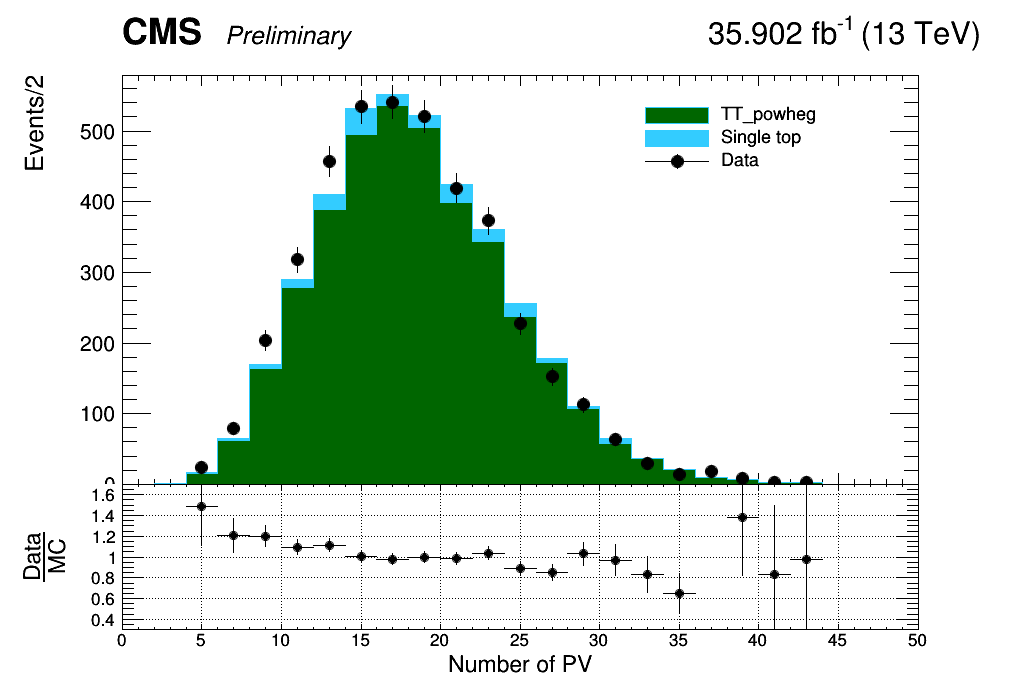

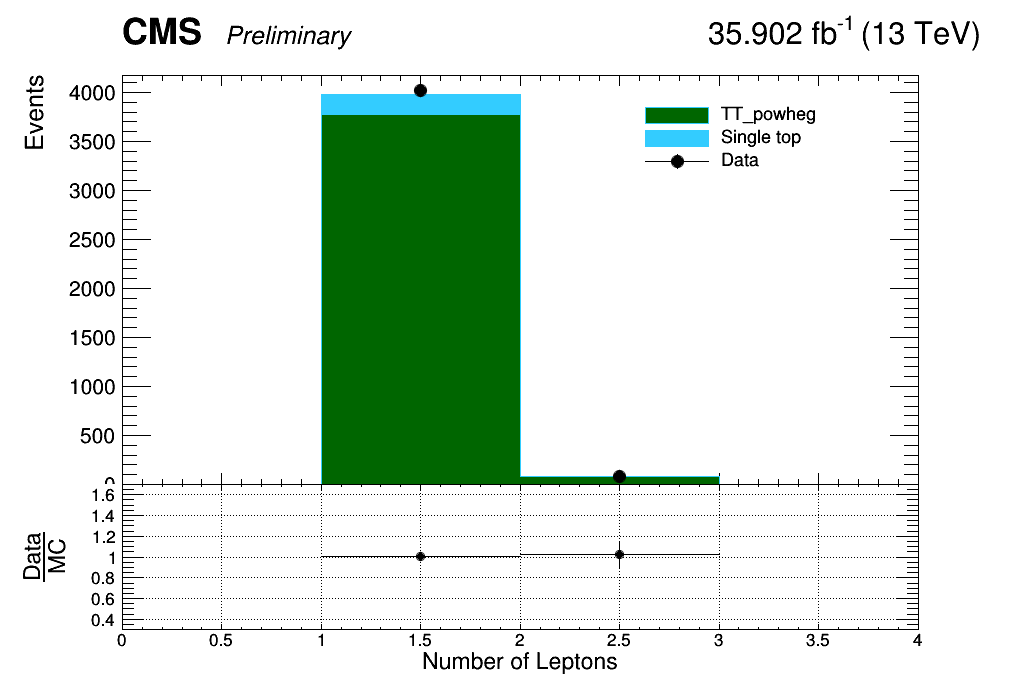

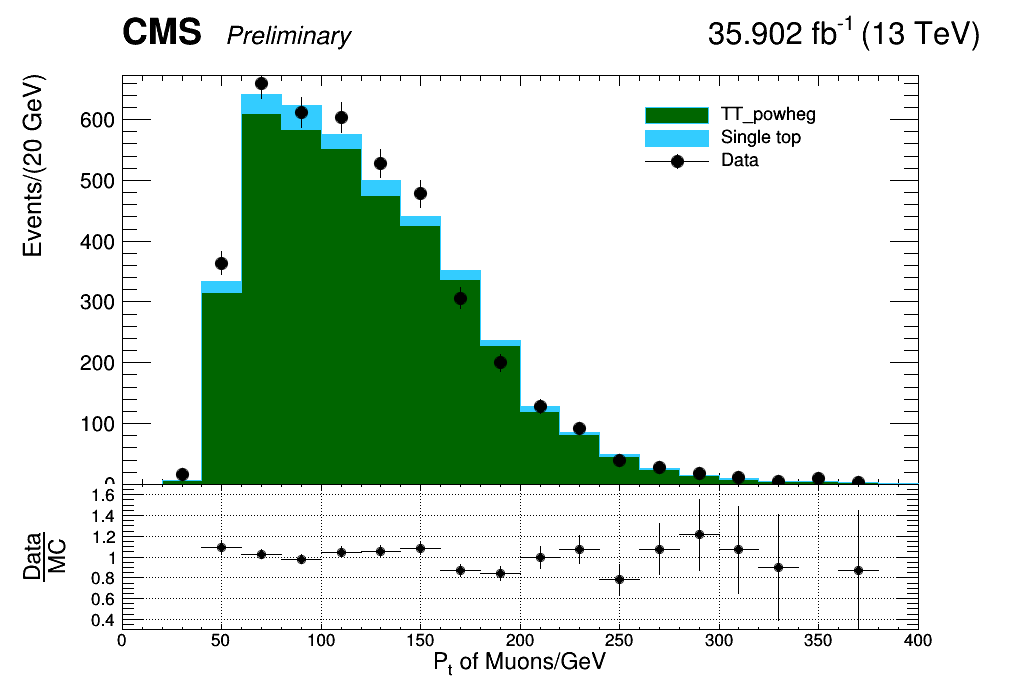

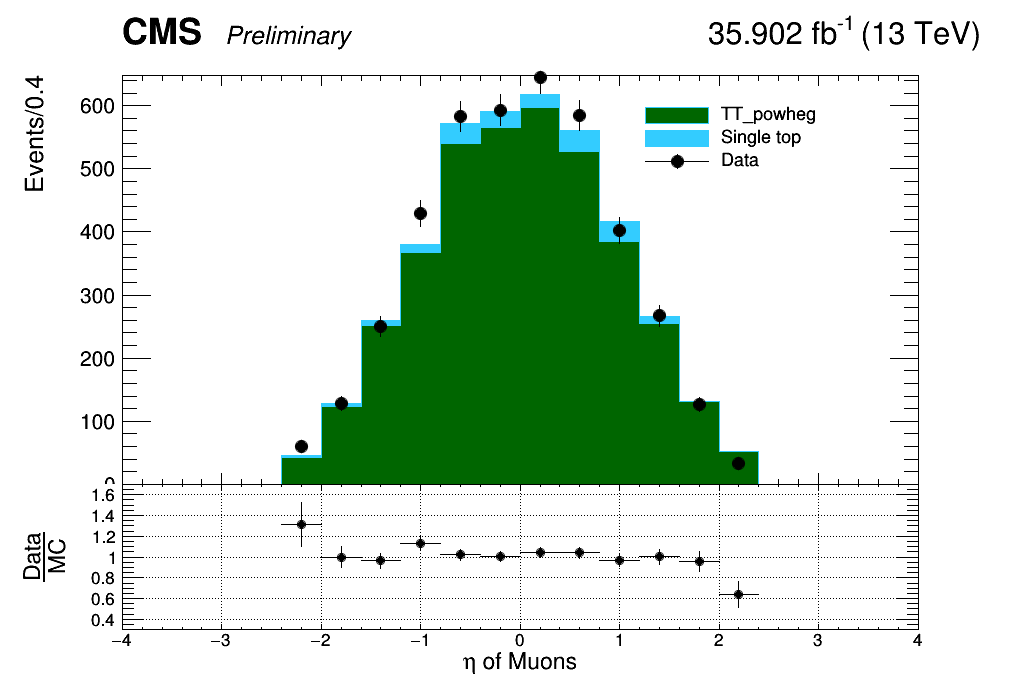

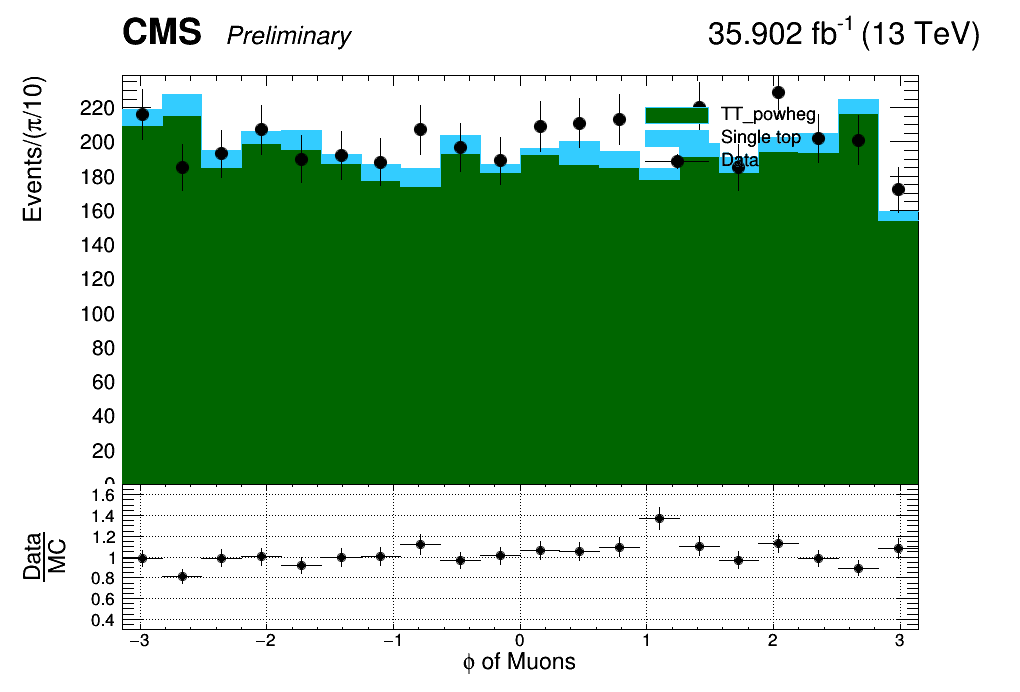

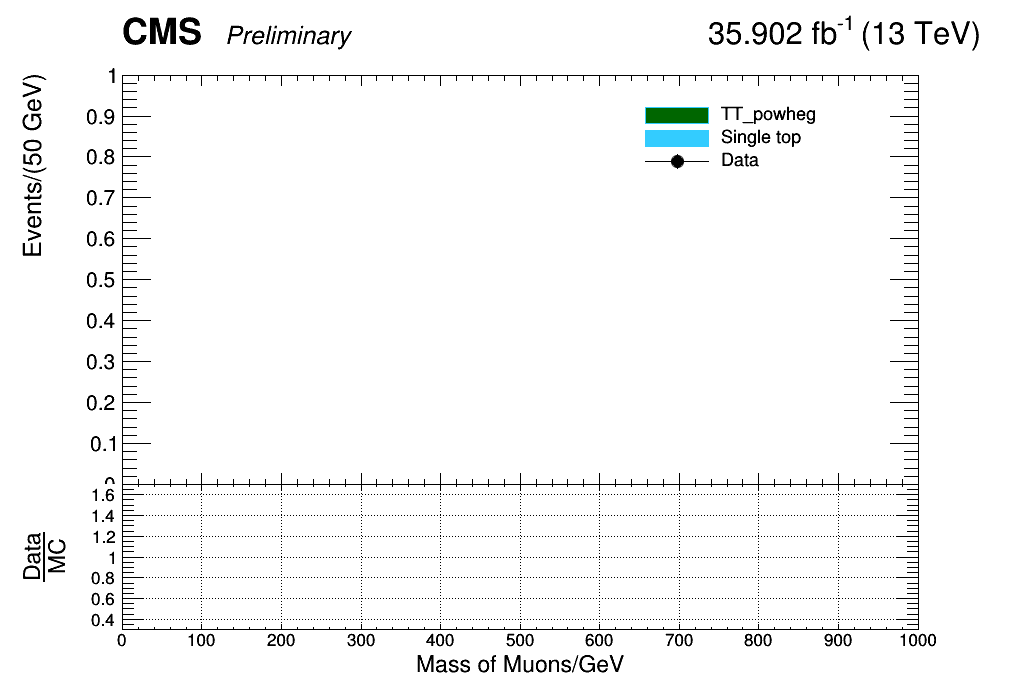

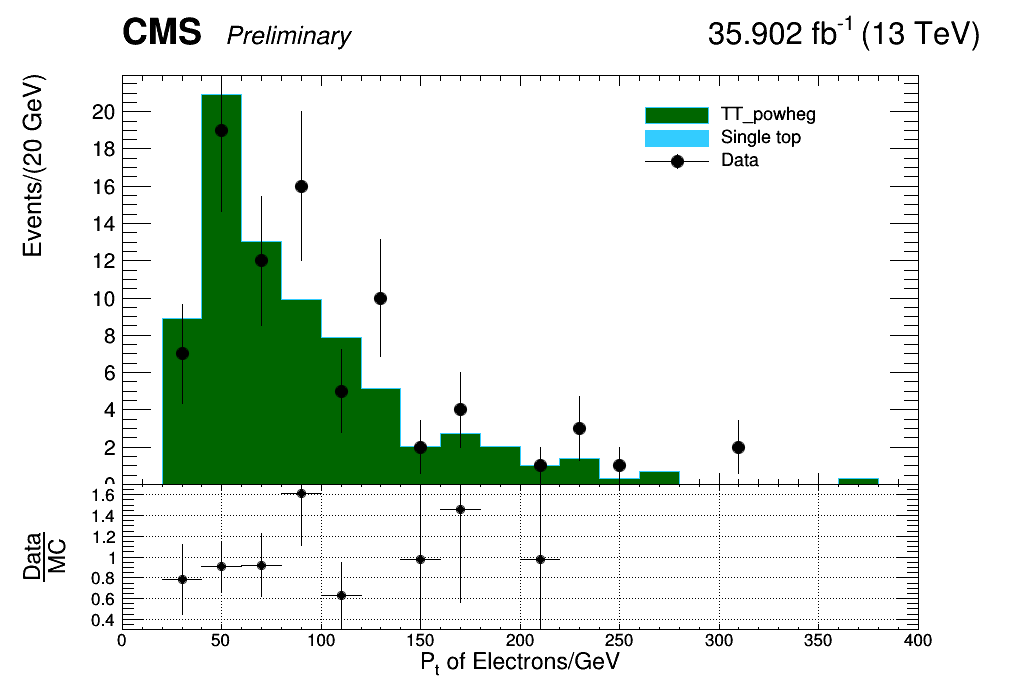

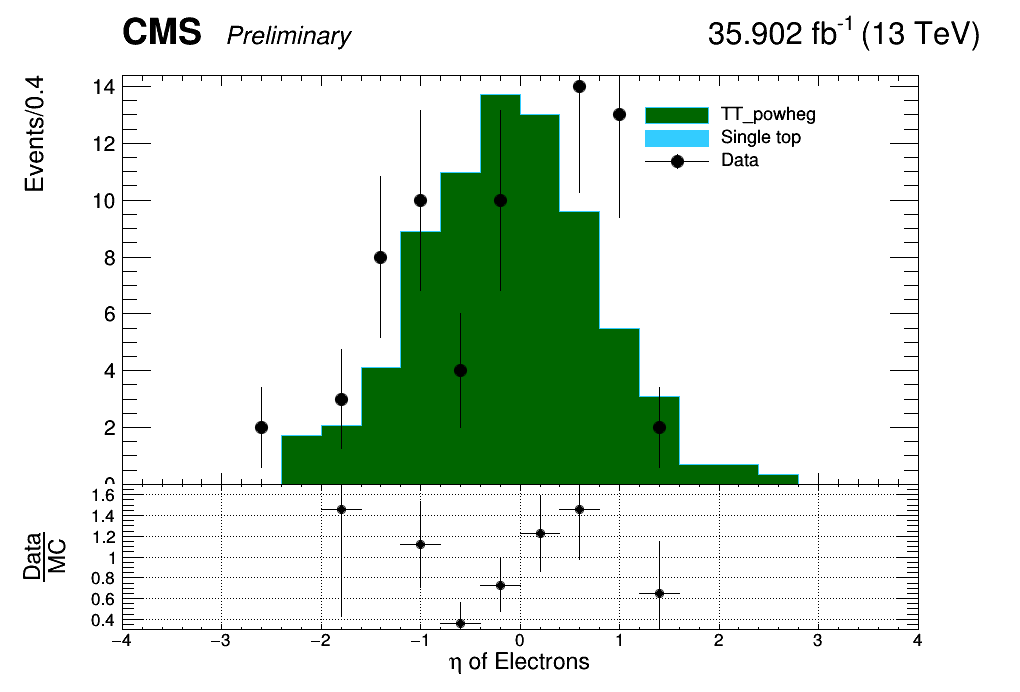

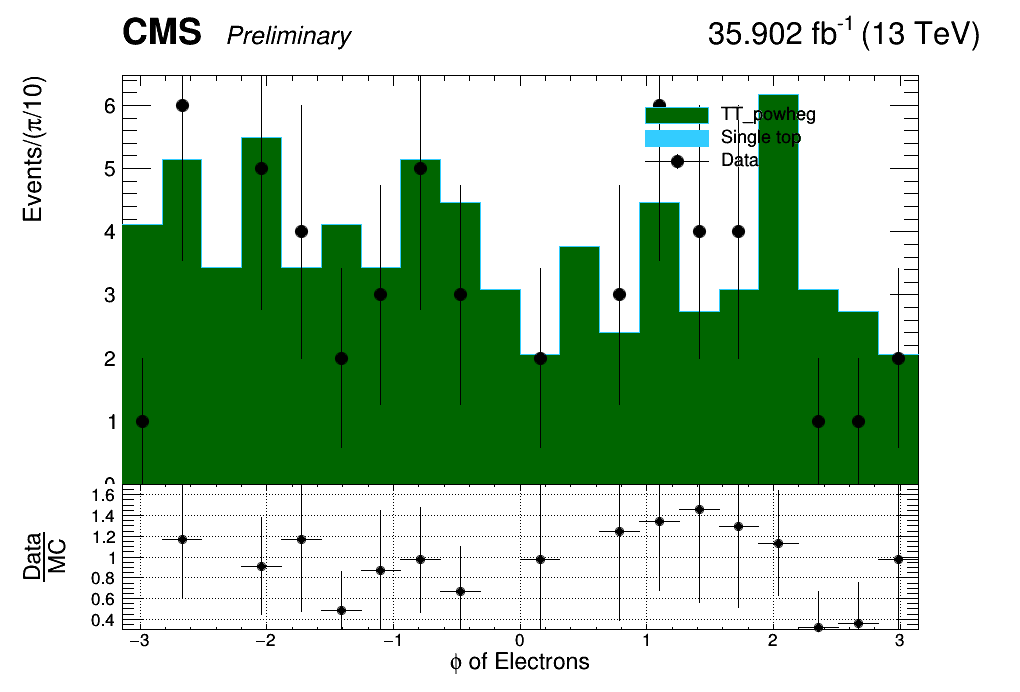

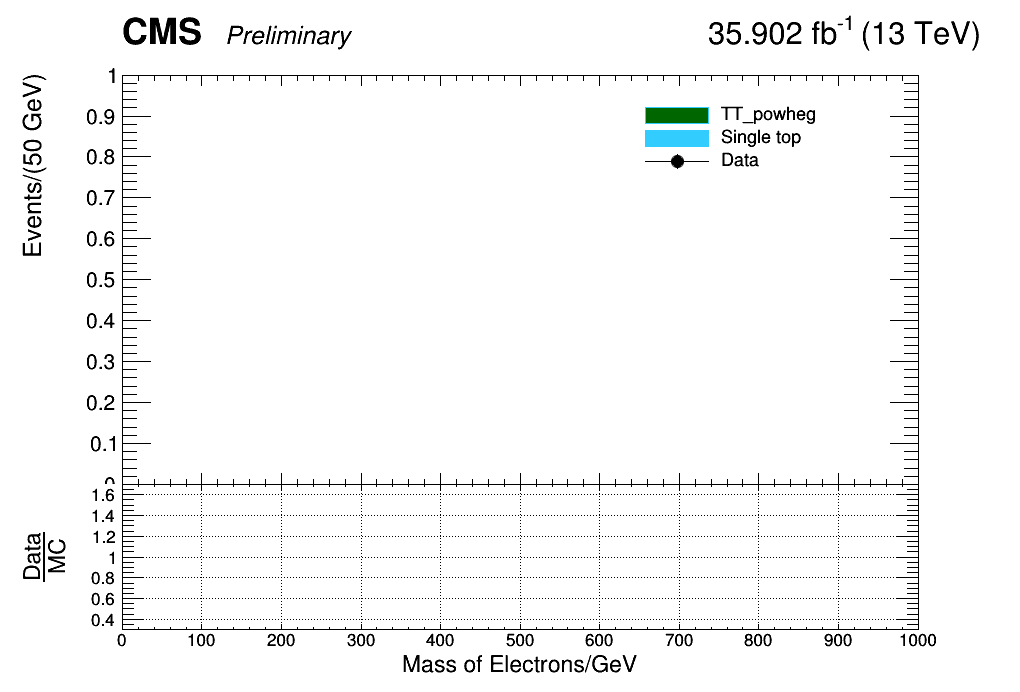

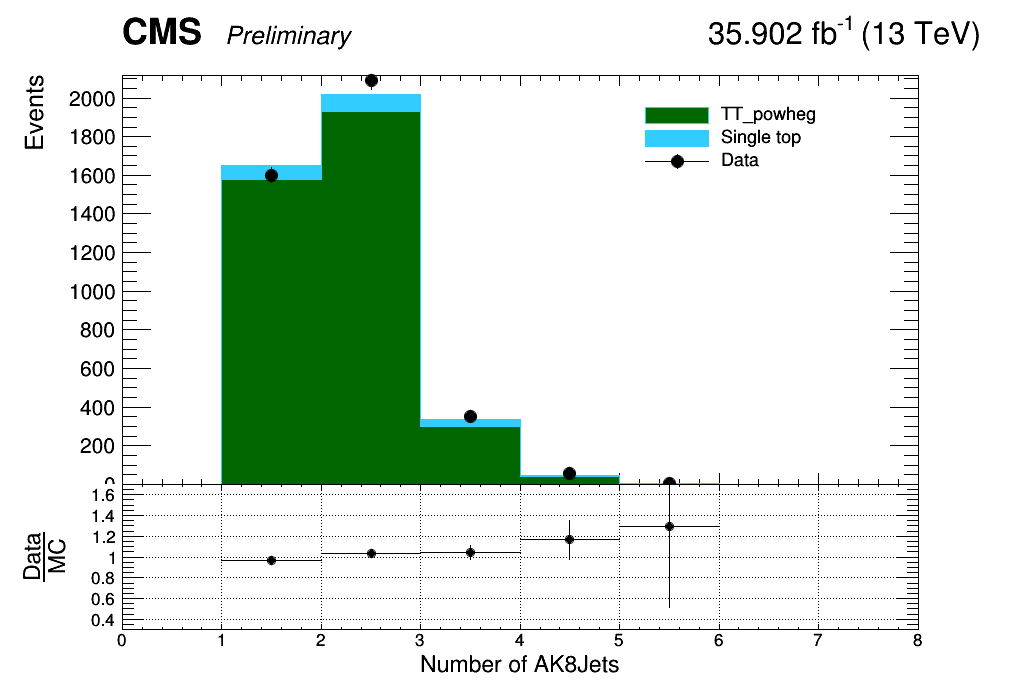

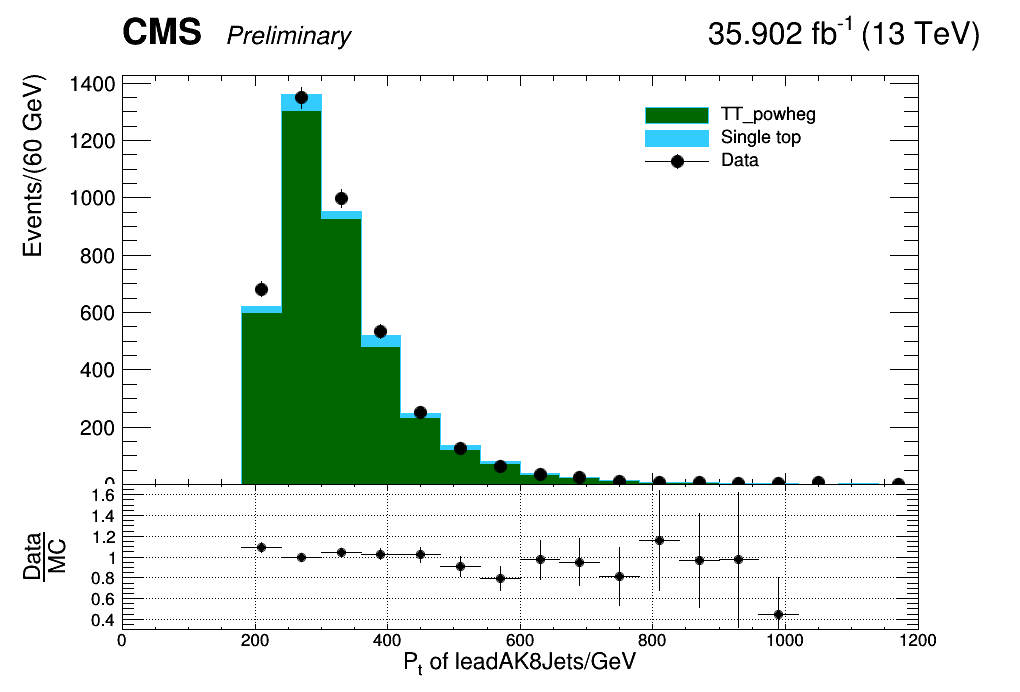

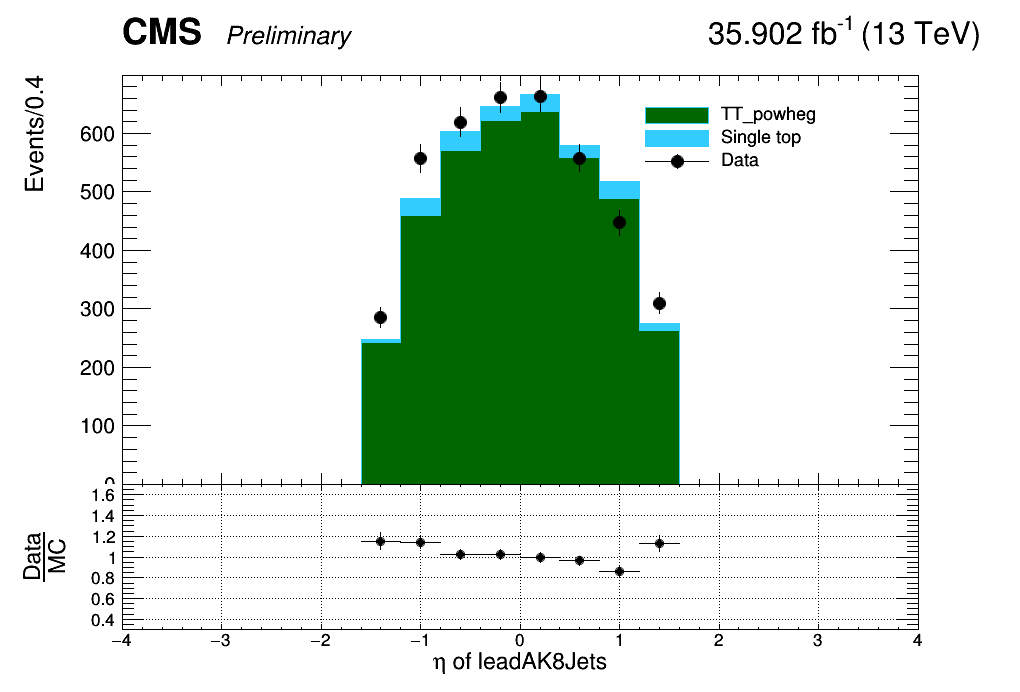

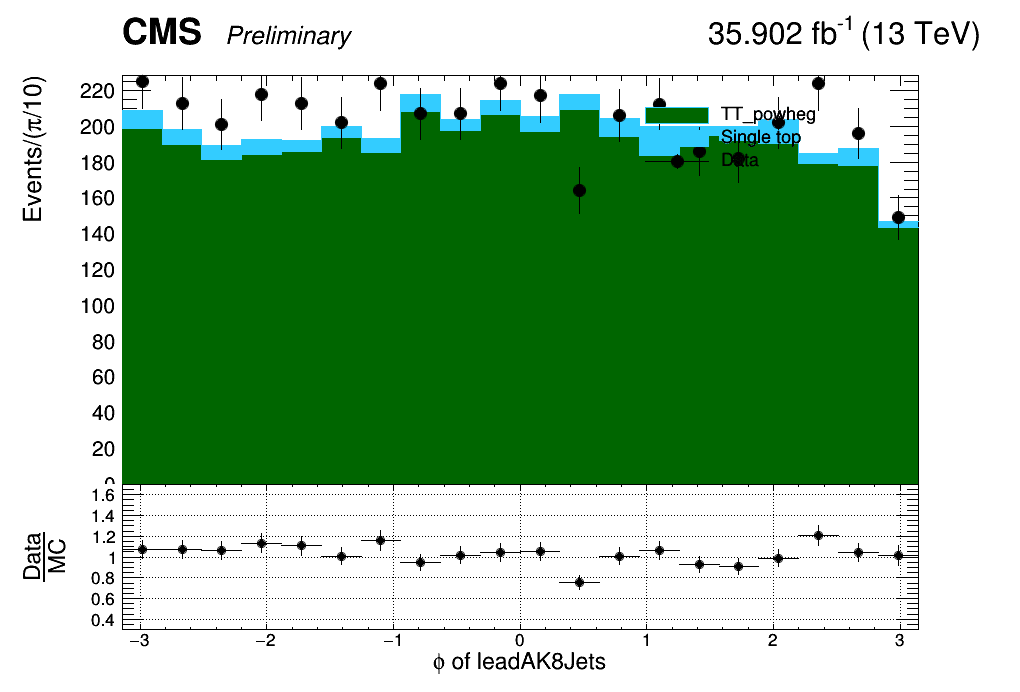

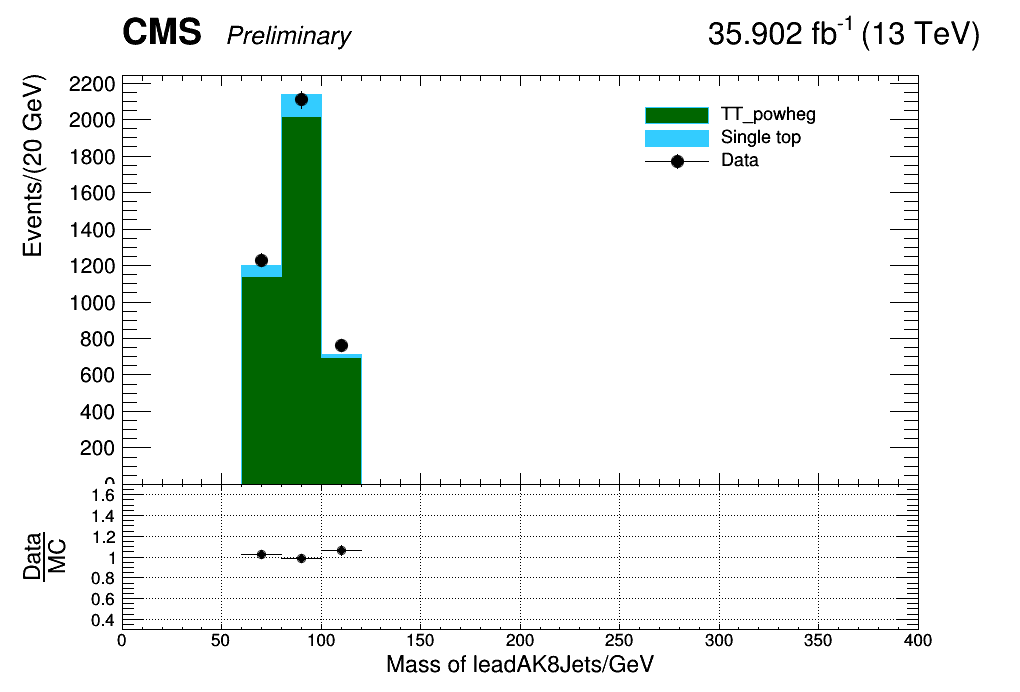

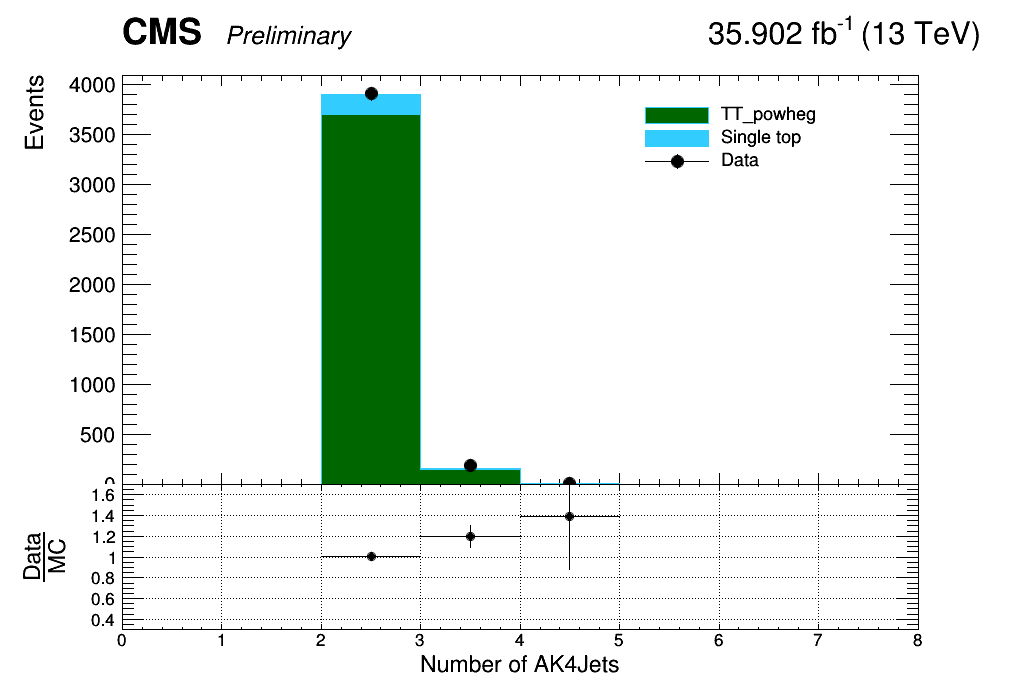

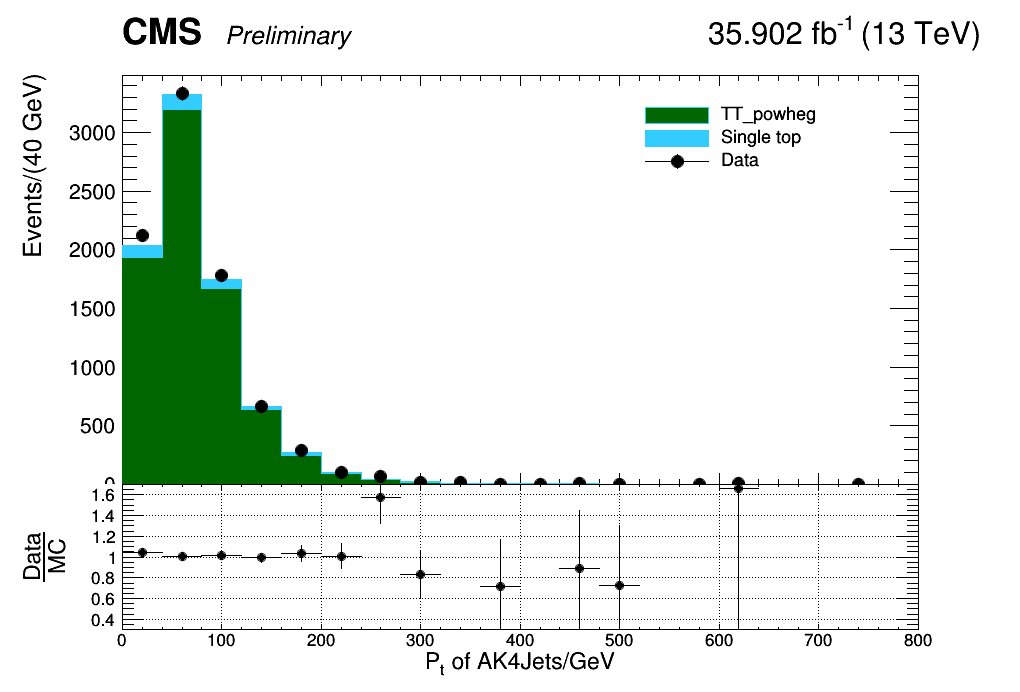

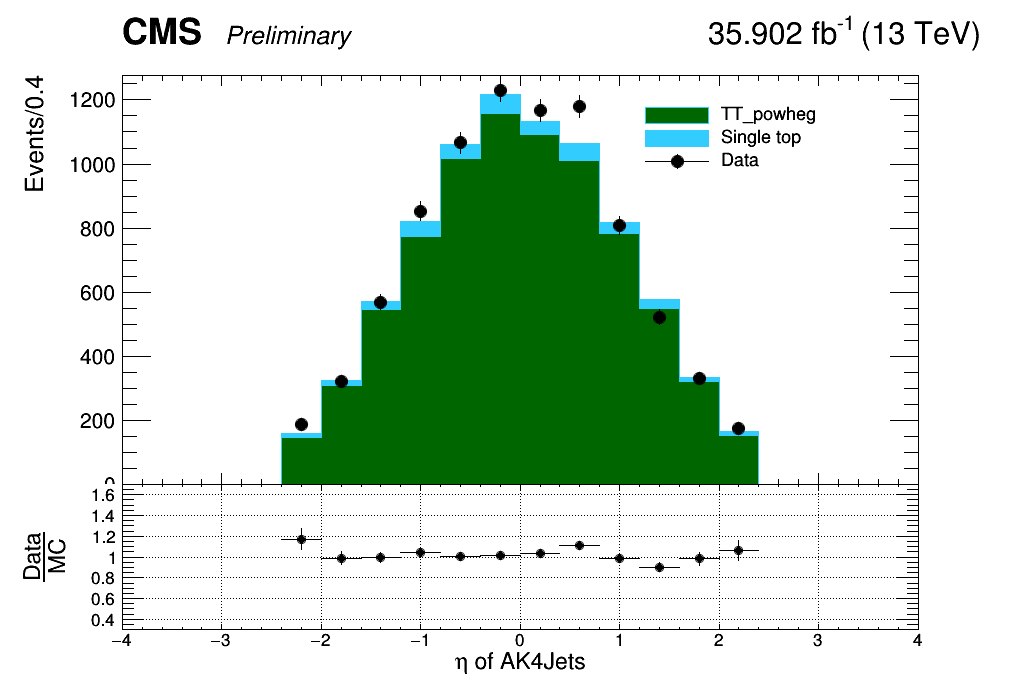

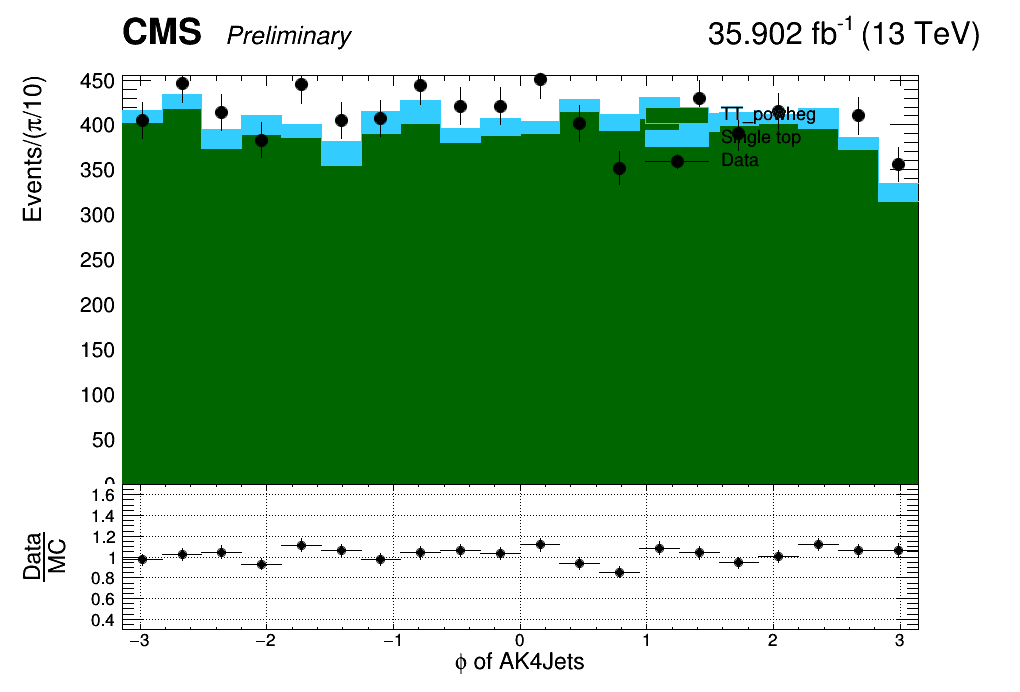

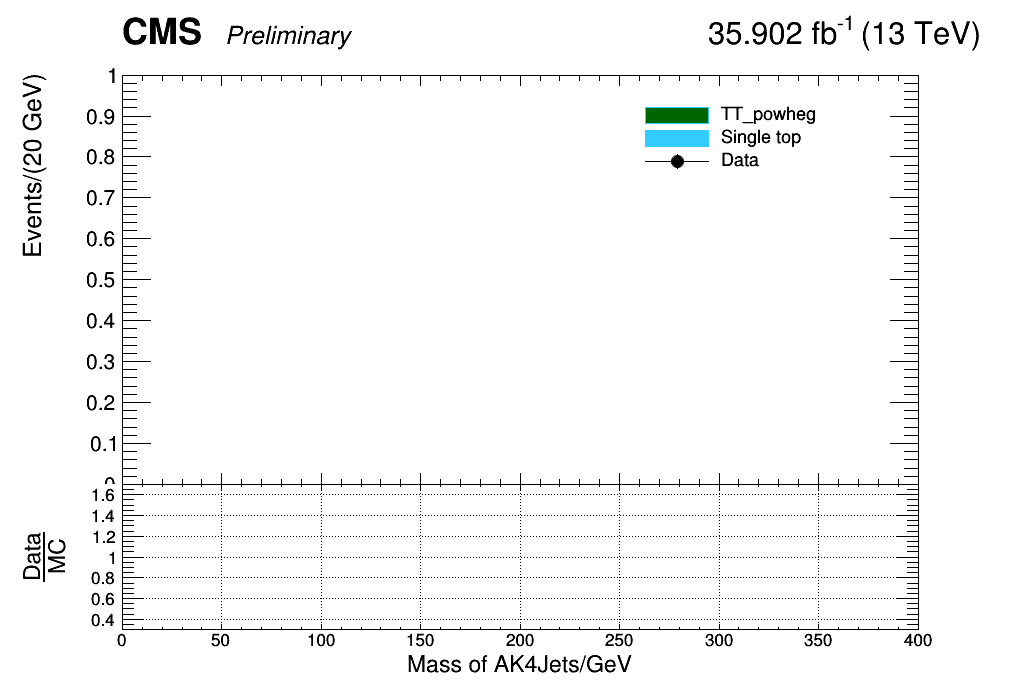

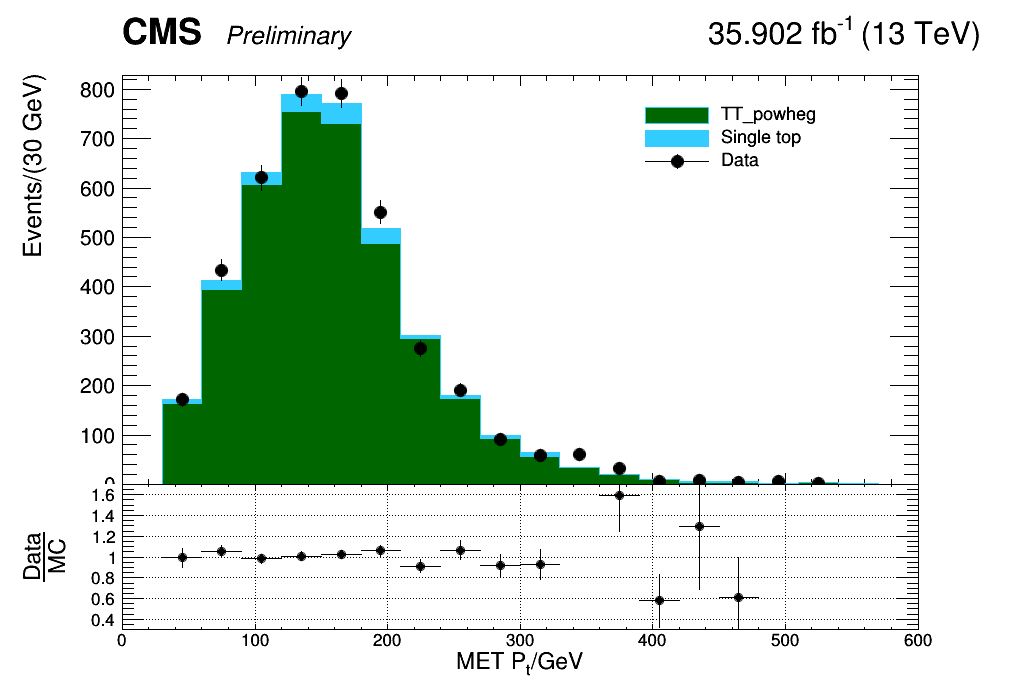

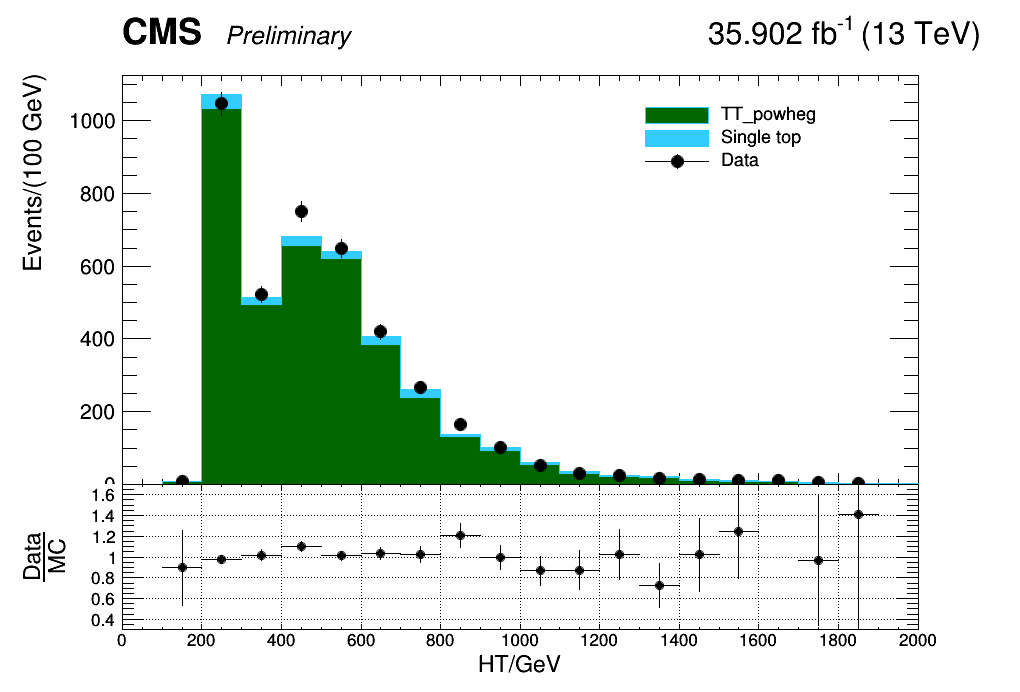

In [11]:
import ROOT as rt
#import CMS_lumi, tdrstyle
import array

print MC_Compo[1],"W selection"

H_ref = 720; 
W_ref = 1024; 
W = W_ref
H  = H_ref

iPeriod = 4

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref 
L = 0.12*W_ref
R = 0.04*W_ref

x1_l = 0.97
y1_l = 0.85

dx_l = 0.35
dy_l = 0.10
x0_l = x1_l-dx_l
y0_l = y1_l-dy_l

canvas=np.zeros((l,),rt.TCanvas)
legend=np.zeros((l,),rt.TLegend)

CName=[]
for i in range(1,l+1):
    CName.append('c'+str(i))
Pad1=[]
Pad2=[]
Mc=[]
Ratio=[]
    
for i in range(l):
    canvas[i] = rt.TCanvas(CName[i],CName[i],0,0,W,H)
    canvas[i].SetFillColor(0)
    canvas[i].SetBorderMode(0)
    canvas[i].SetBorderSize(0)
    canvas[i].SetFrameFillStyle(0)
    canvas[i].SetFrameBorderMode(0)
    canvas[i].SetFrameLineWidth(0)
    canvas[i].SetLeftMargin( L/W )
    canvas[i].SetRightMargin( R/W )
    canvas[i].SetTopMargin( T/H )
    canvas[i].SetBottomMargin( B/H )
    canvas[i].SetTickx(0)
    canvas[i].SetTicky(0)
#canvas.Draw()

    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95, -1,0,0);
    pad1.SetBottomMargin(0.); #// Upper and lower plot are joined
#pad1.SetGridx();         #// Vertical grid
    pad1.SetBorderMode(0)
    pad1.SetBorderSize(0)
    pad1.SetFrameLineWidth(0)
    pad1.SetFrameBorderMode(0)
    pad1.Draw()           #// Draw the upper pad: pad1
    pad1.cd()
    Pad1.append(pad1)

               #// pad1 becomes the current pad
    Data_WSel[i].SetMarkerSize(1.5)
    Data_WSel[i].SetMarkerColor(rt.kBlack)
    Data_WSel[i].SetMarkerStyle(20)
    Data_WSel[i].SetLineColor(rt.kBlack)

    TTp_WSel[i].SetLineColor(rt.kAzure+8)
    TTp_WSel[i].SetFillColor(rt.kGreen+3)

    st_WSel[i].SetLineColor(rt.kAzure+8)
    st_WSel[i].SetFillColor(rt.kAzure+8)


    mc = rt.THStack("MC",Title_WSel[i][1])
    mc.Add(TTp_WSel[i])
    mc.Add(st_WSel[i])
    mc.Draw("hist")
    mc.GetYaxis().SetTitle(Title_WSel[i][0])
    mc.GetXaxis().SetTitle(Title_WSel[i][2])
    mc.GetYaxis().SetTitleOffset(0.9)
    Mc.append(mc)

    mc.Draw("samehist")
    Data_WSel[i].Draw("esamex0")

    CMS_lumi.CMS_lumi(canvas[i], iPeriod, iPos)
#    canvas[i].cd()
    
    canvas[i].cd()
    canvas[i].Update()
    canvas[i].RedrawAxis()
    frame = canvas[i].GetFrame()
    frame.Draw()

    pad2 = rt.TPad("pad2","pad2",0,0.0,1,0.3, -1,0,0)
    pad2.SetTopMargin(0)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    pad2.cd()
    pad2.SetBottomMargin(0.3)
    Pad2.append(pad2)

    ratio = rt.TH1D(Title_WSel[i][1],";;",*Range_WSel[i])
    ratio.GetXaxis().SetTitle(Title_WSel[i][2]);
    ratio.Add(Data_WSel[i])
    #ratio.GetYaxis().SetTitleOffset(0.);
    ratio.GetYaxis().CenterTitle(rt.kTRUE);
    ratio.GetXaxis().CenterTitle(rt.kTRUE);
    ratio.GetYaxis().SetRangeUser(0.3,1.7)

    MC = rt.TH1D(Title_WSel[i][1],";;",*Range_WSel[i])
    MC.Add(TTp_WSel[i])
    MC.Add(st_WSel[i])

    ratio.GetYaxis().SetTitle("#frac{Data}{MC}")
    ratio.Sumw2()
    ratio.SetStats(0)
    ratio.Divide(MC)
    ratio.GetYaxis().SetLabelSize(0.09)
    ratio.GetXaxis().SetLabelSize(0.09)
    ratio.SetMarkerColor(rt.kBlack)
    ratio.SetMarkerStyle(20)
    ratio.SetLineColor(rt.kBlack)
    ratio.GetYaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetTitleOffset(0.4)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetXaxis().SetTitleOffset(0.85)
    Ratio.append(ratio)
    #ratio.SetAxisRange(50,150)

    ratio.Draw("EP")
    canvas[i].cd()


    legend[i] =  rt.TLegend(x0_l,y0_l,x1_l, y1_l )
    legend[i].AddEntry(TTp_WSel[i],MC_Compo[1],"f")

    legend[i].AddEntry(st_WSel[i],"Single top","f")
    legend[i].AddEntry(Data_WSel[i],"Data","lep")
    legend[i].SetTextFont(42)
    legend[i].SetTextAngle(0)
    legend[i].SetTextColor(rt.kBlack)    
    #legend.SetTextSize(0.05)    
    legend[i].SetTextAlign(12) 
    legend[i].SetBorderSize(0)
    legend[i].SetFillStyle(0)
    #legend.SetLinewdith(0)
    legend[i].Draw()


    canvas[i].Update()
    canvas[i].Draw()
    canvas[i].Print("/t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_WSel/"+Objects_WSel[i]+".png")

TT_powheg top selection


Warning in <TFile::Append>: Replacing existing TH1: P_{t} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_topSel/recoJetPt_nom_topSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: Softdrop Mass (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_topSel/recoJetSDmass_nom_topSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{21} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_topSel/recoJetTau21_nom_topSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{1}^{(0.5)} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_topSel/recoJet_tau_0p5_1_WTA_kT_nom_topSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{1}^{(

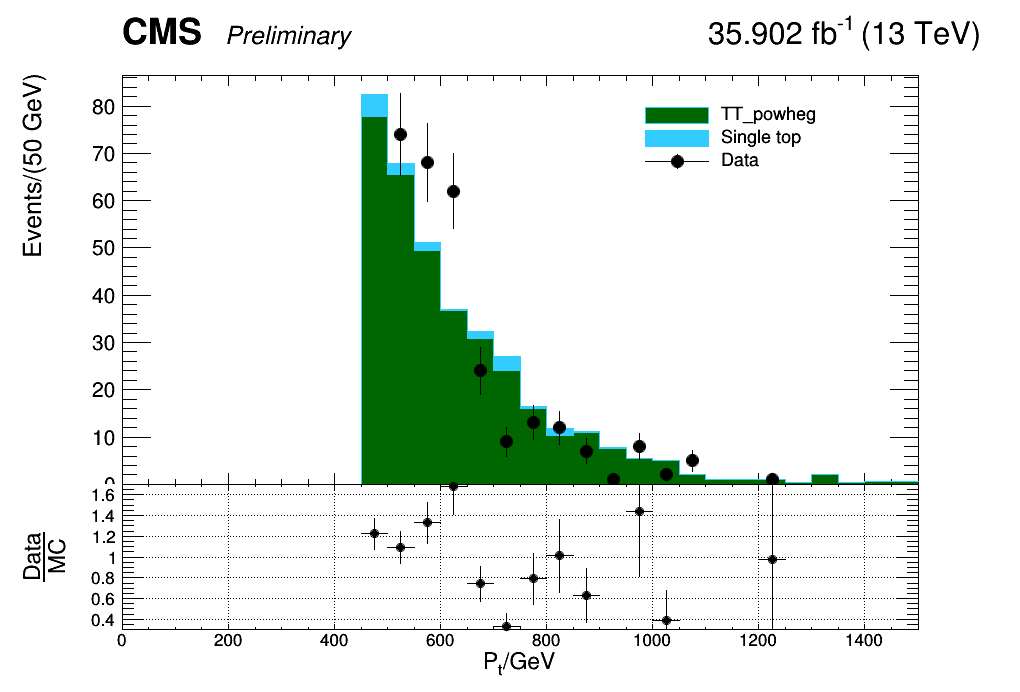

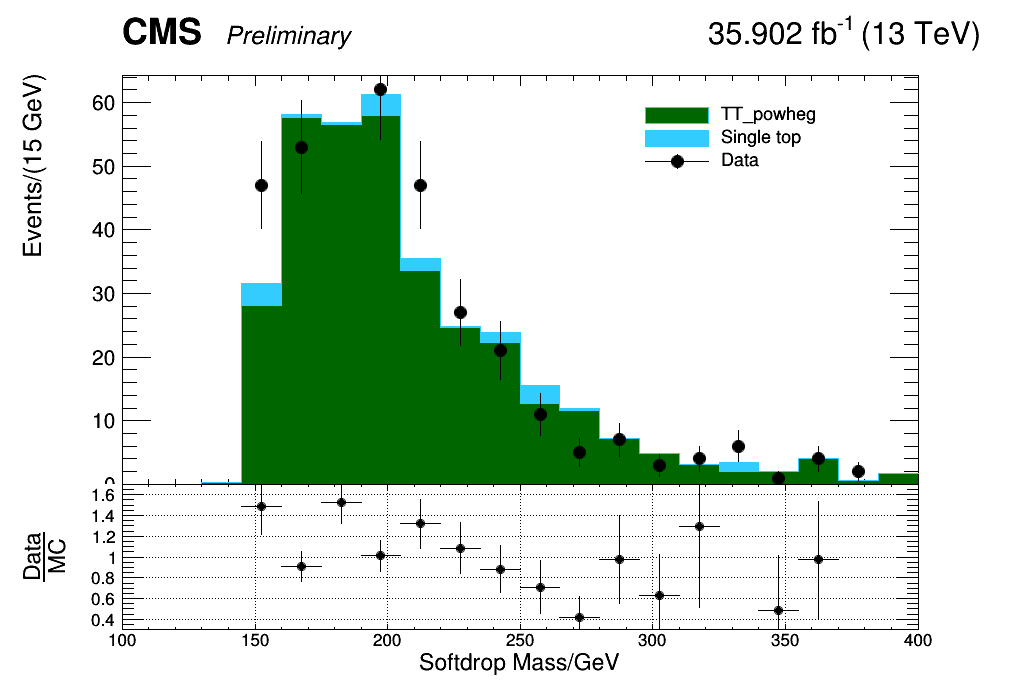

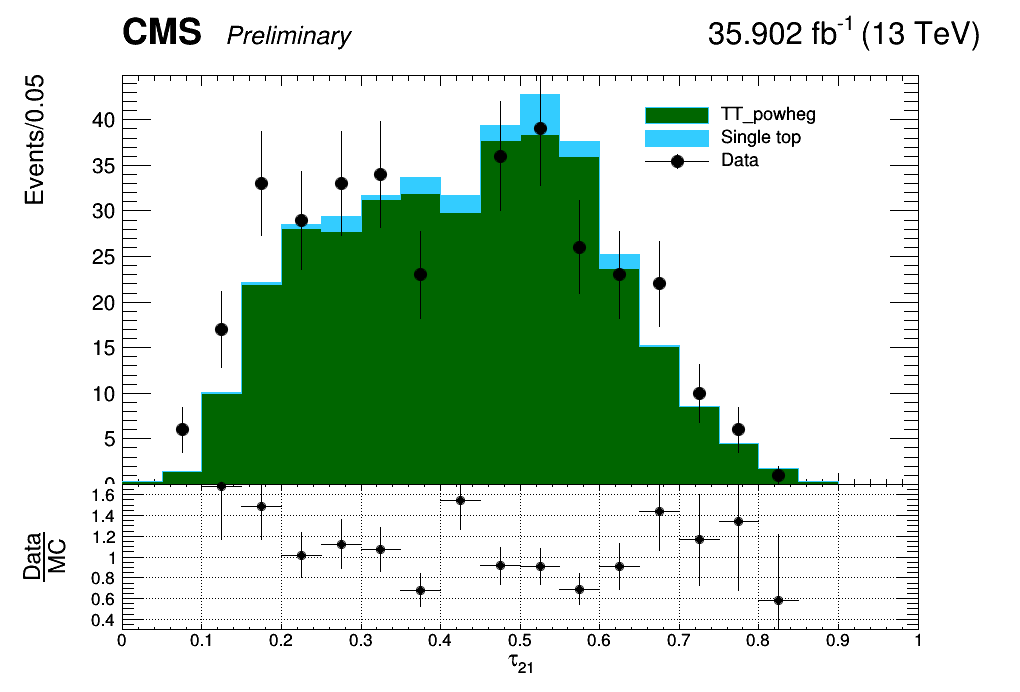

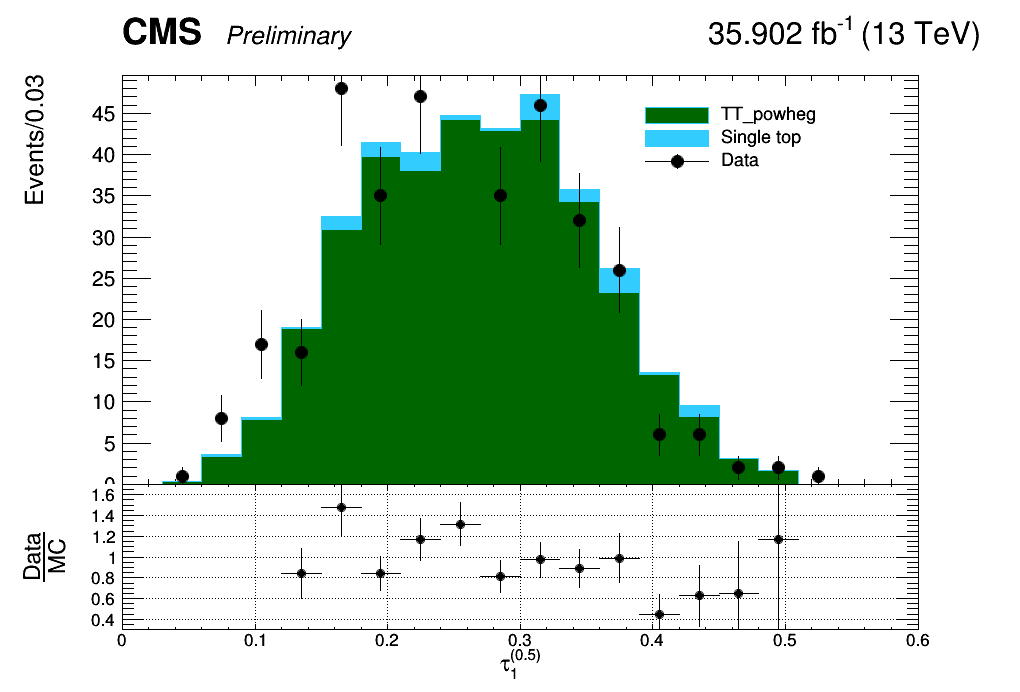

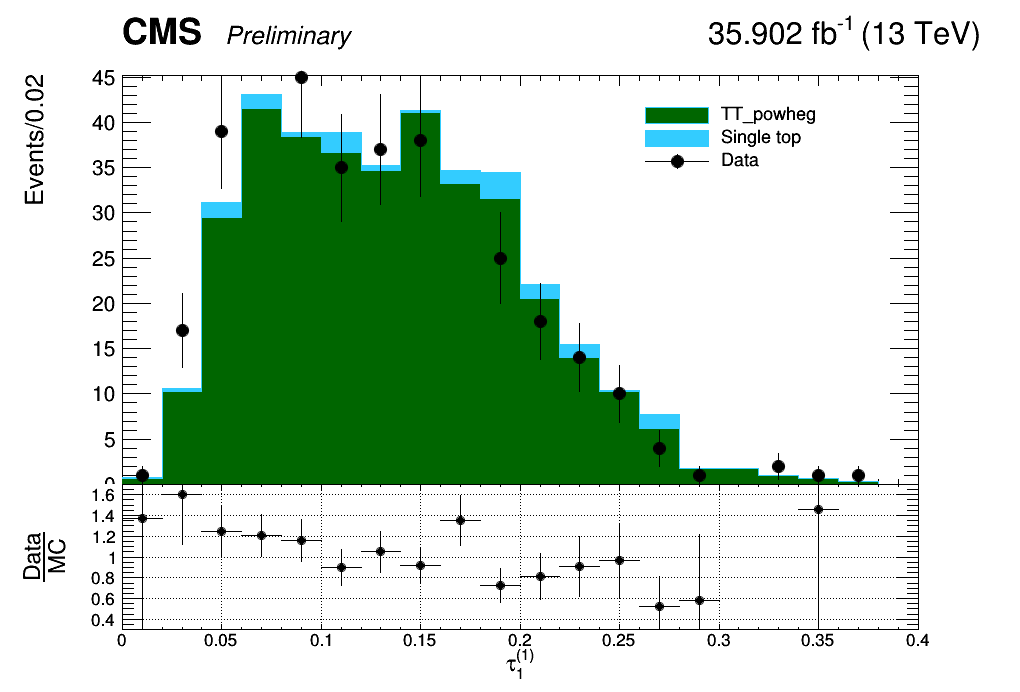

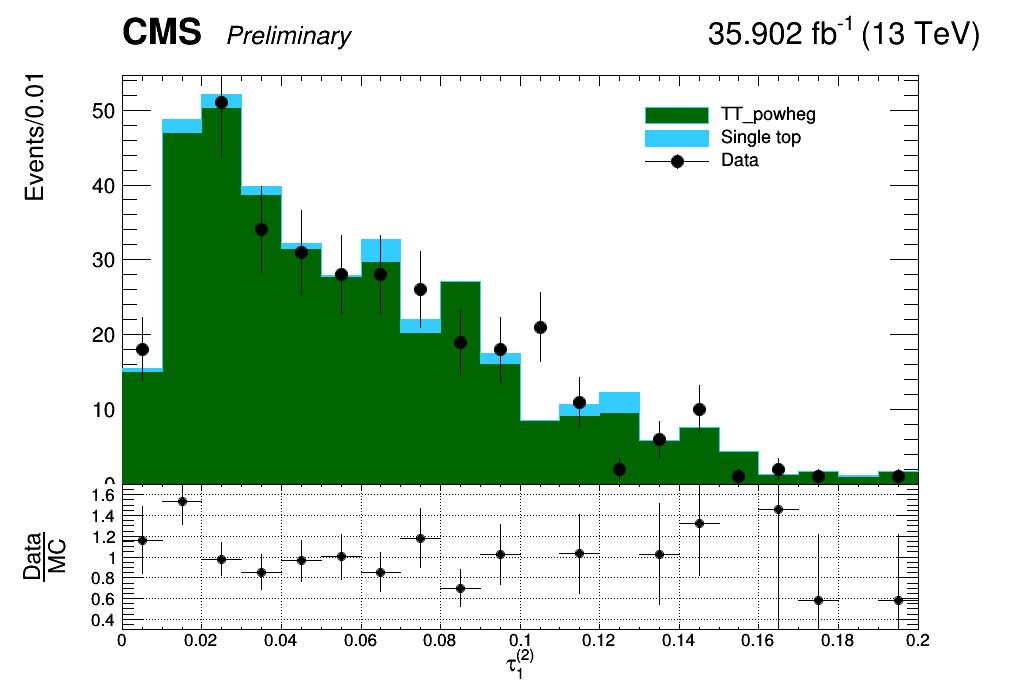

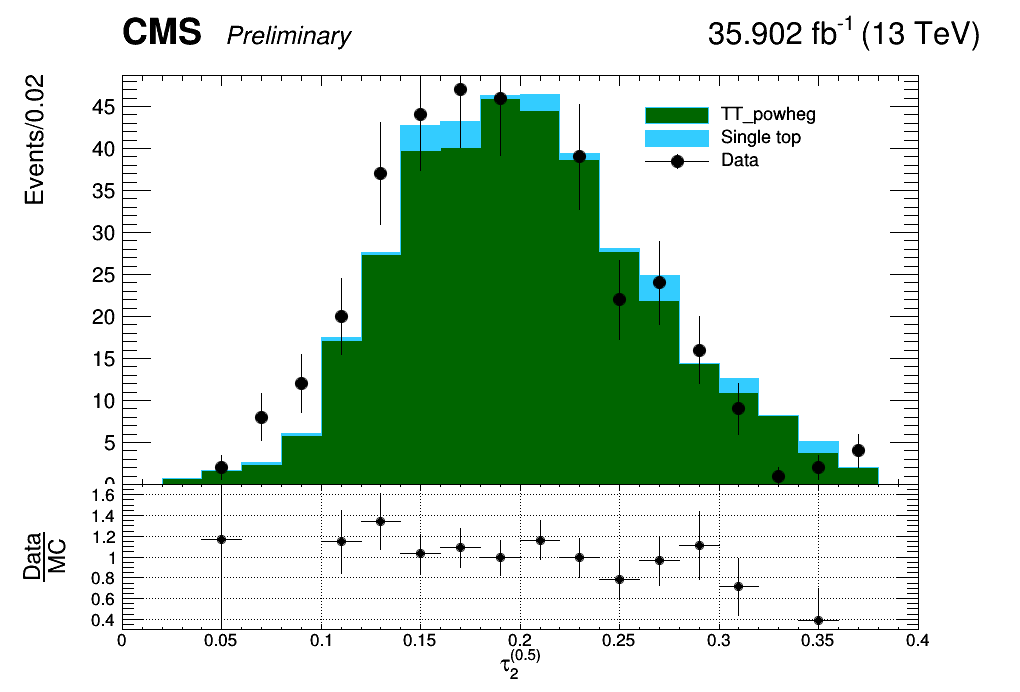

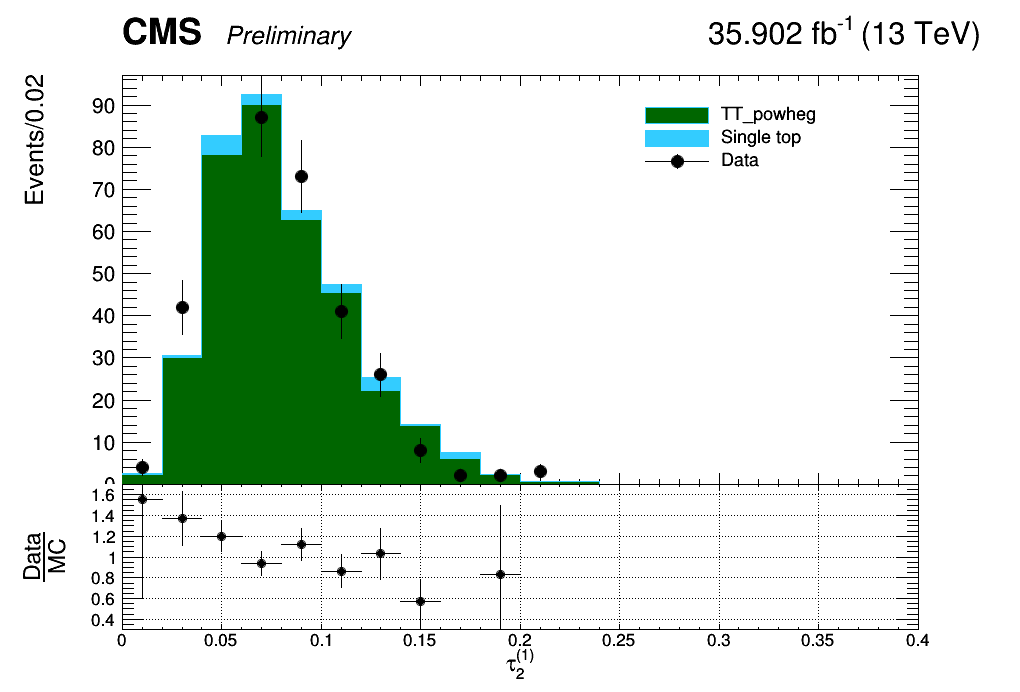

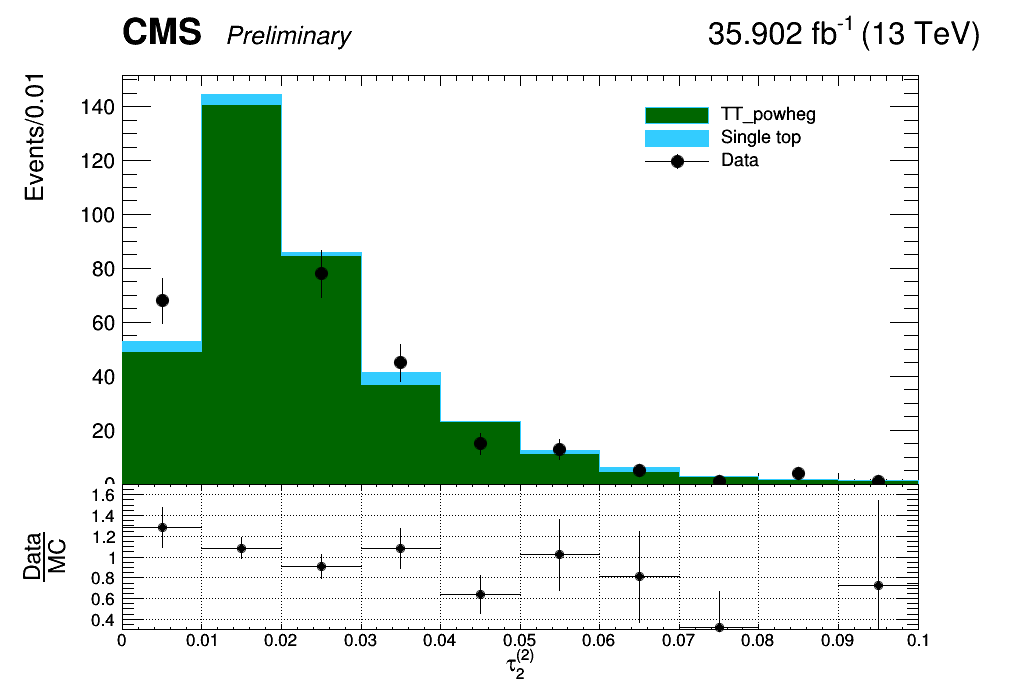

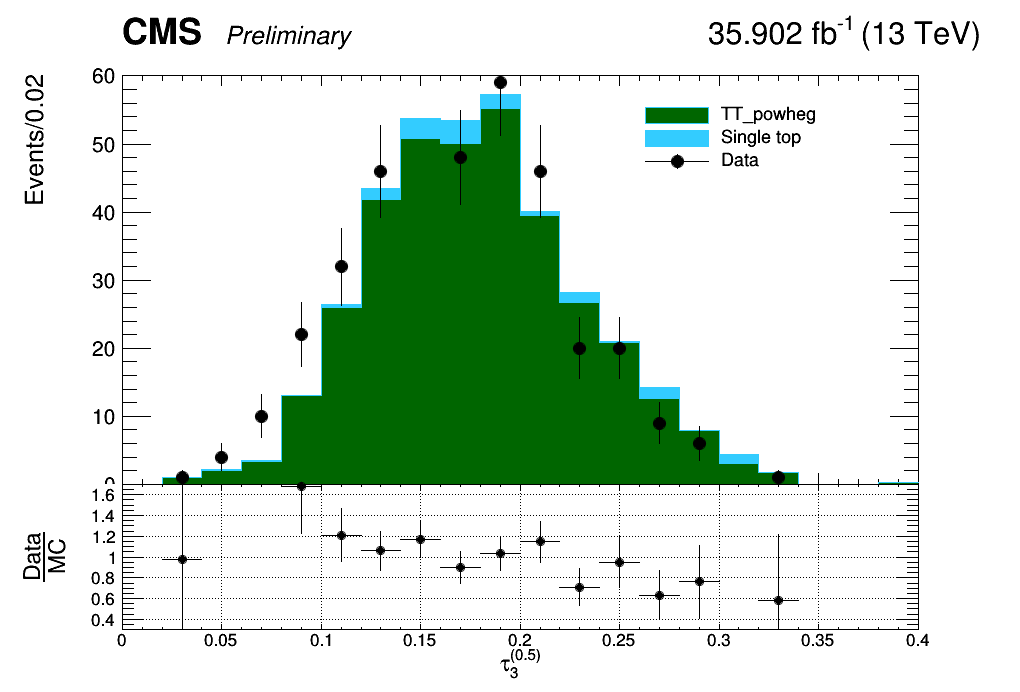

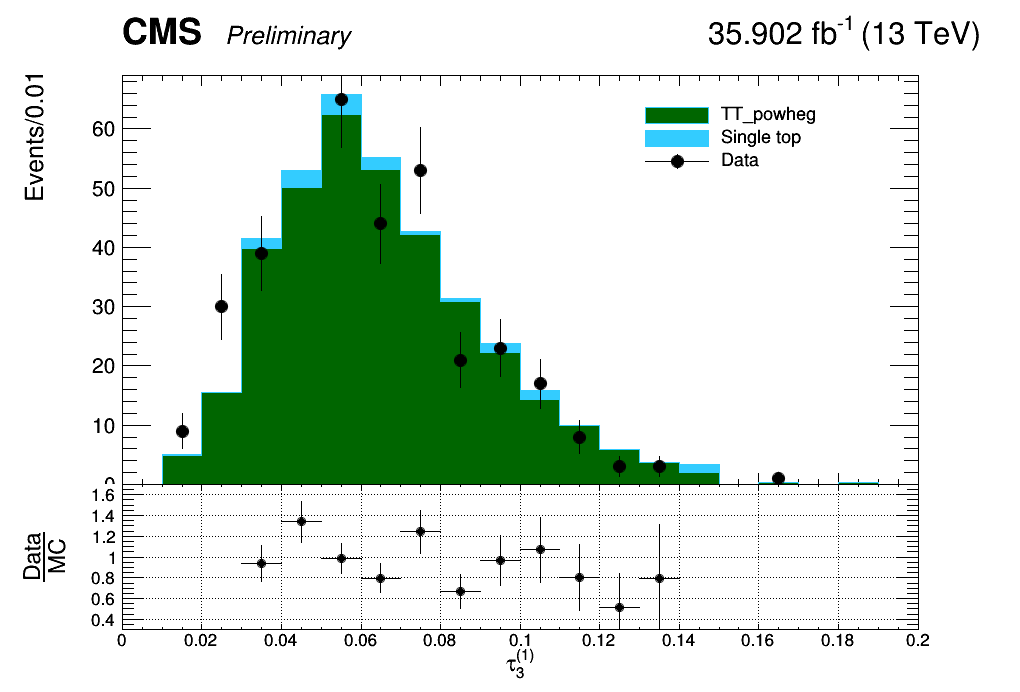

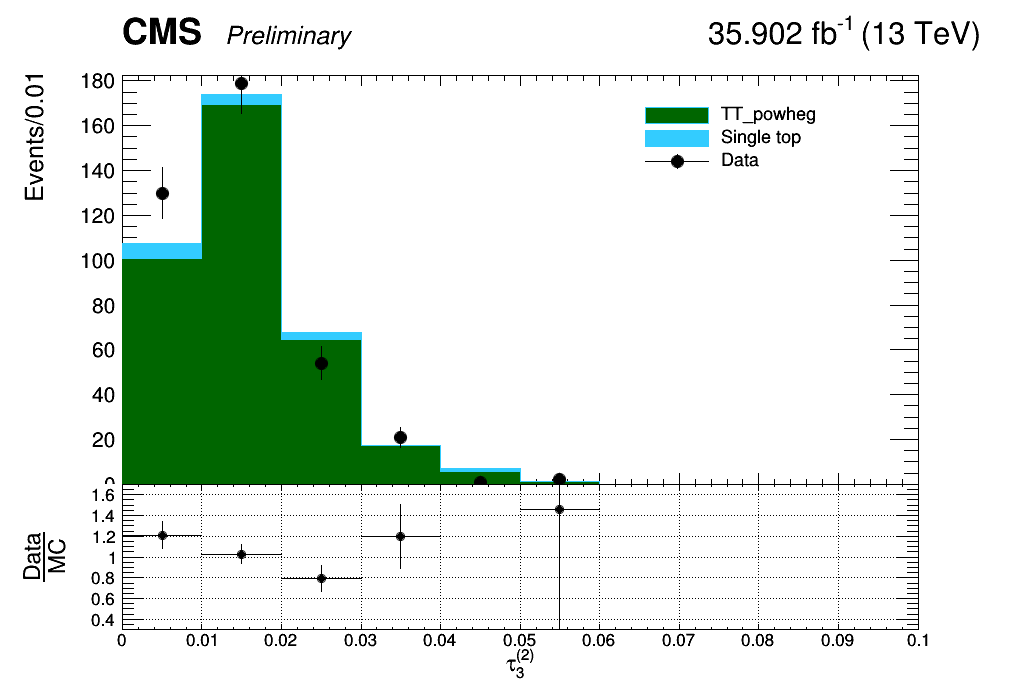

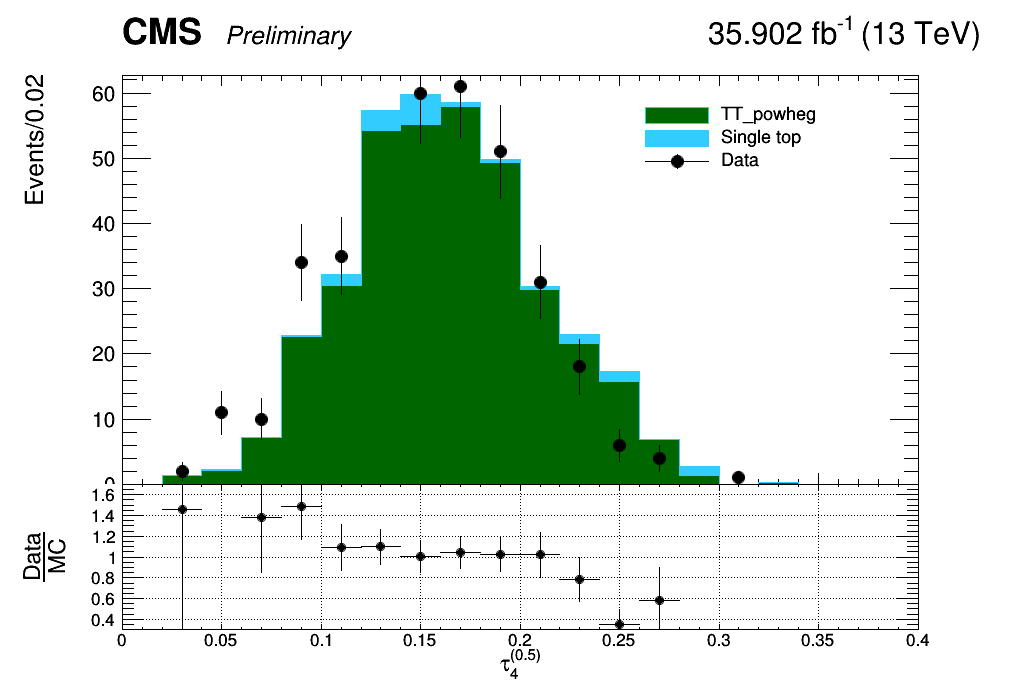

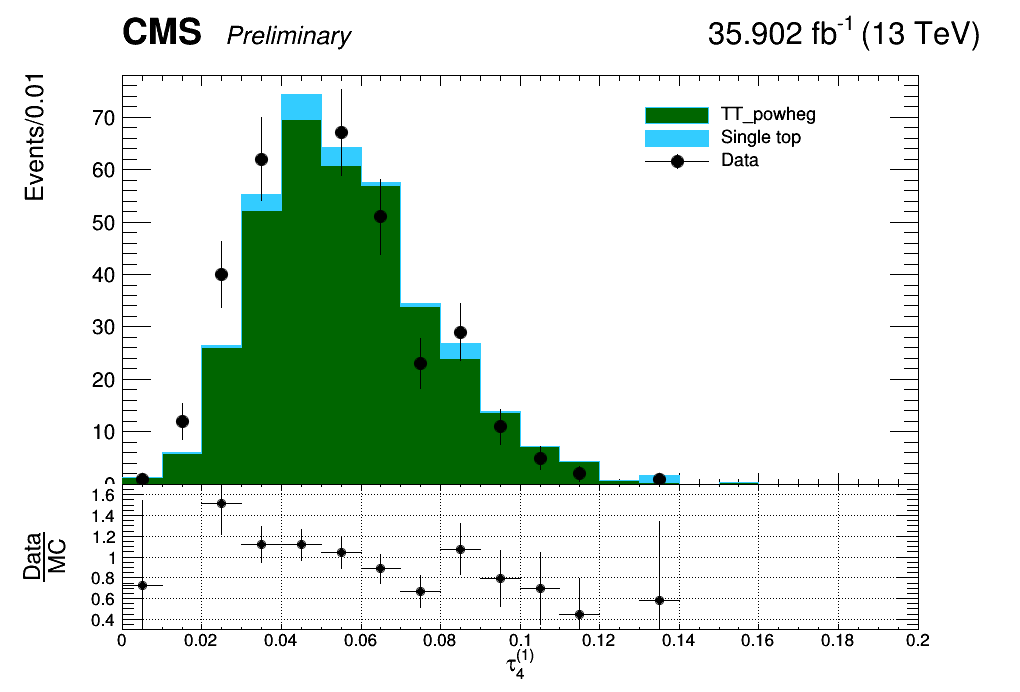

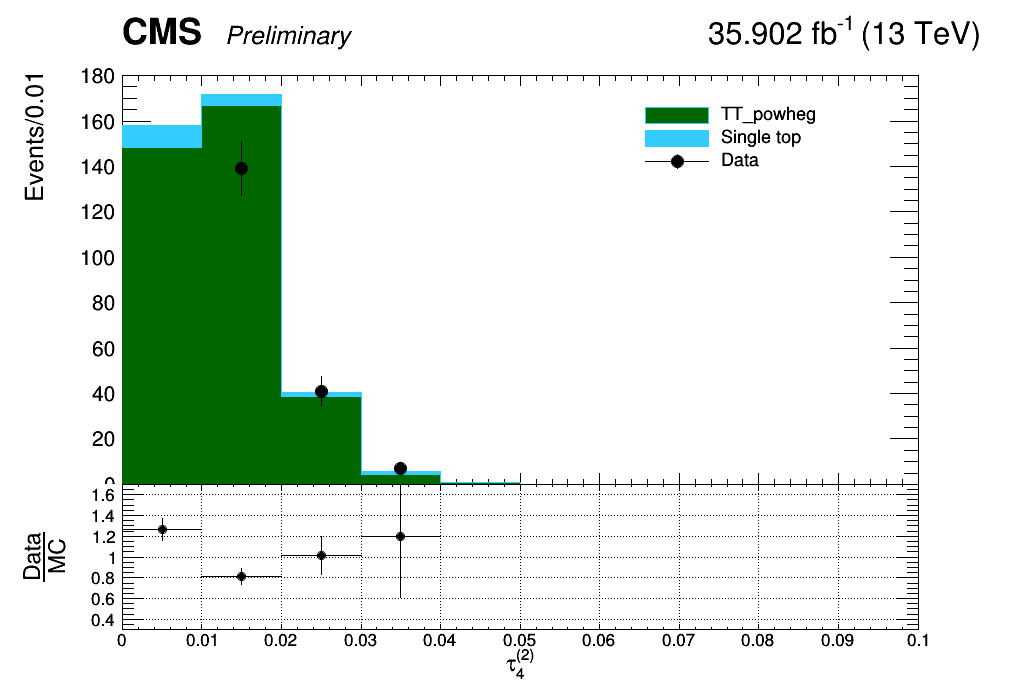

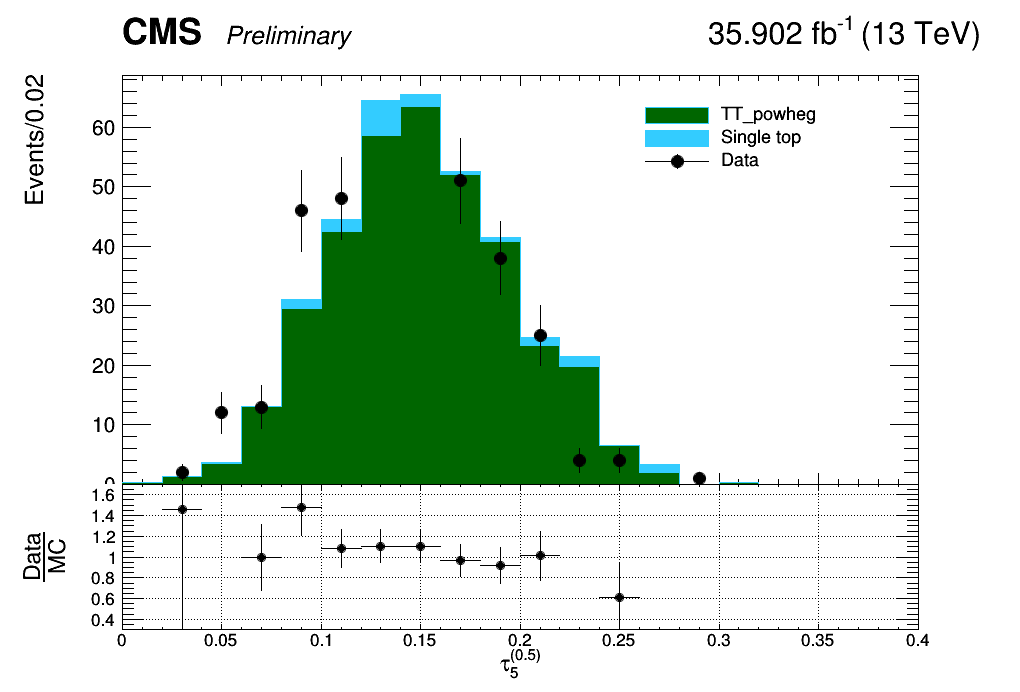

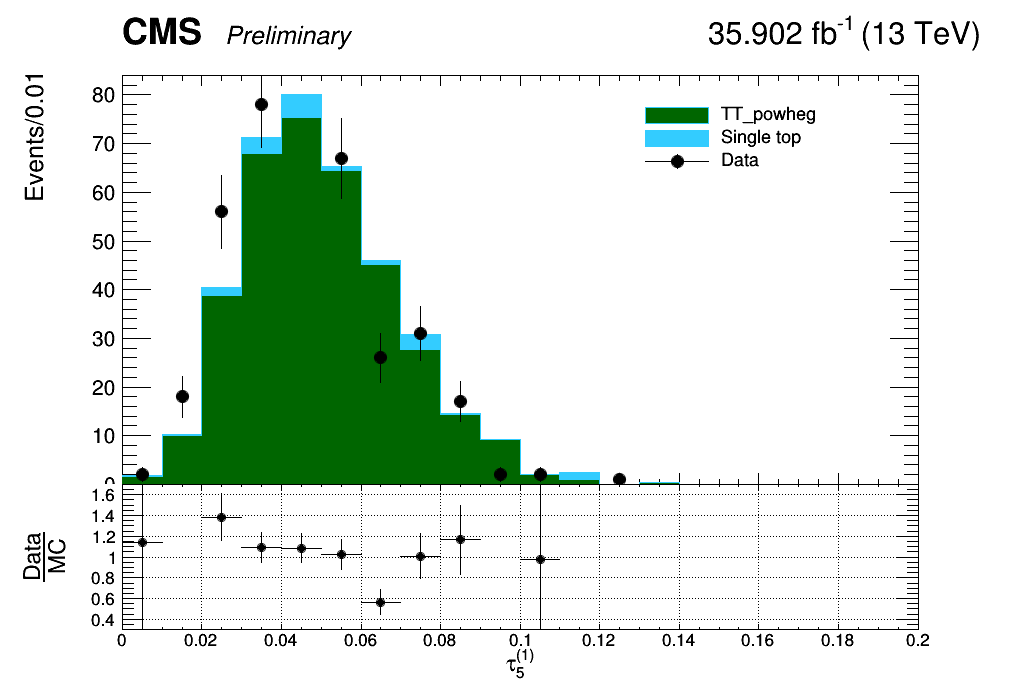

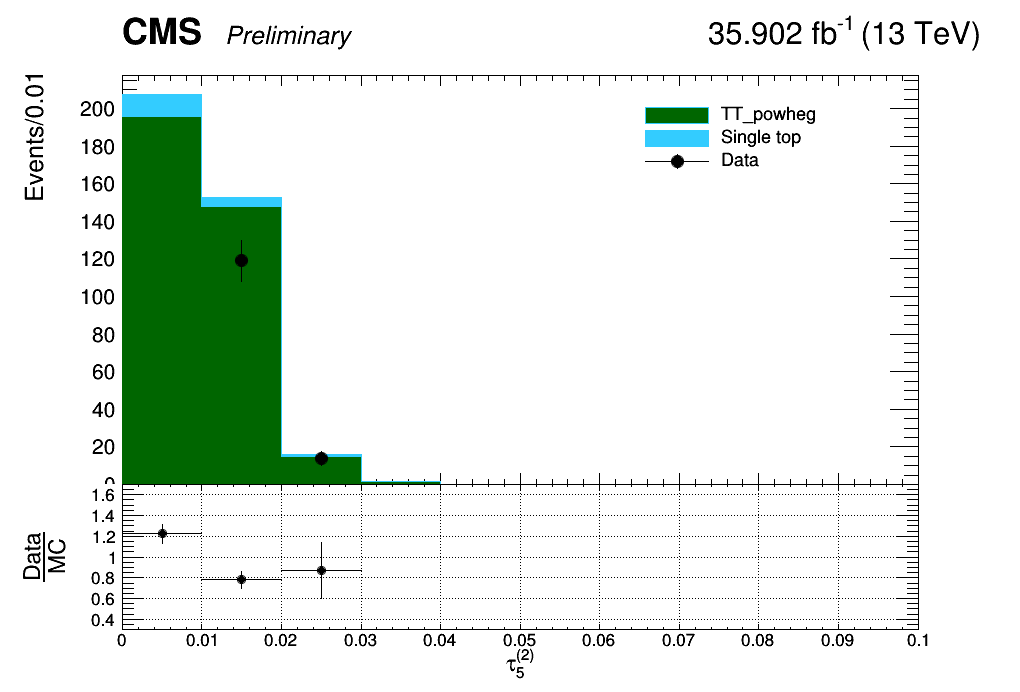

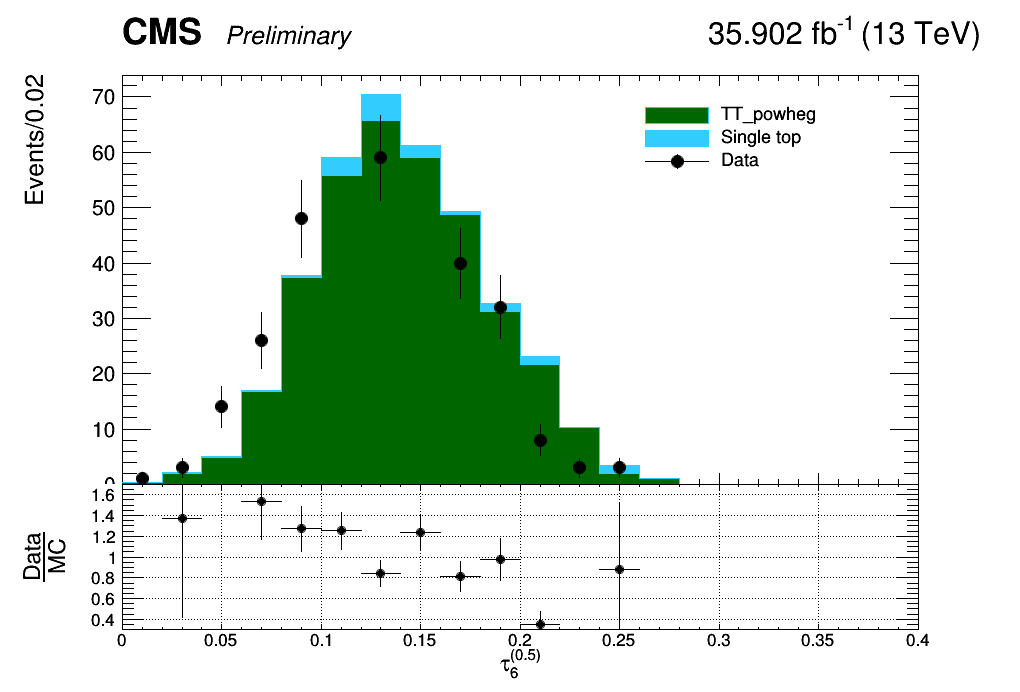

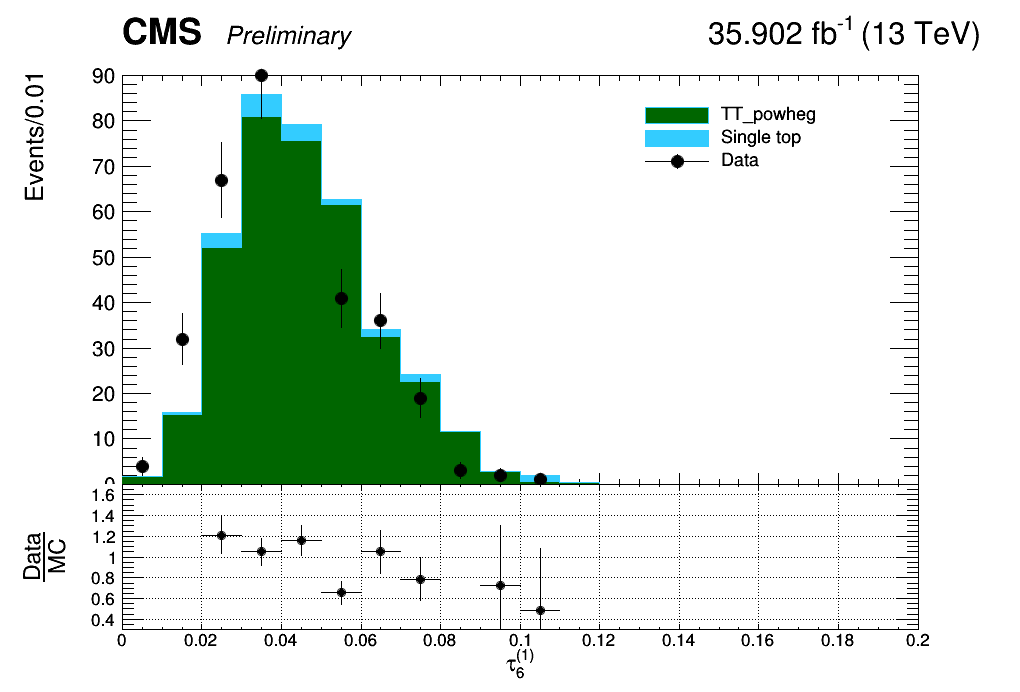

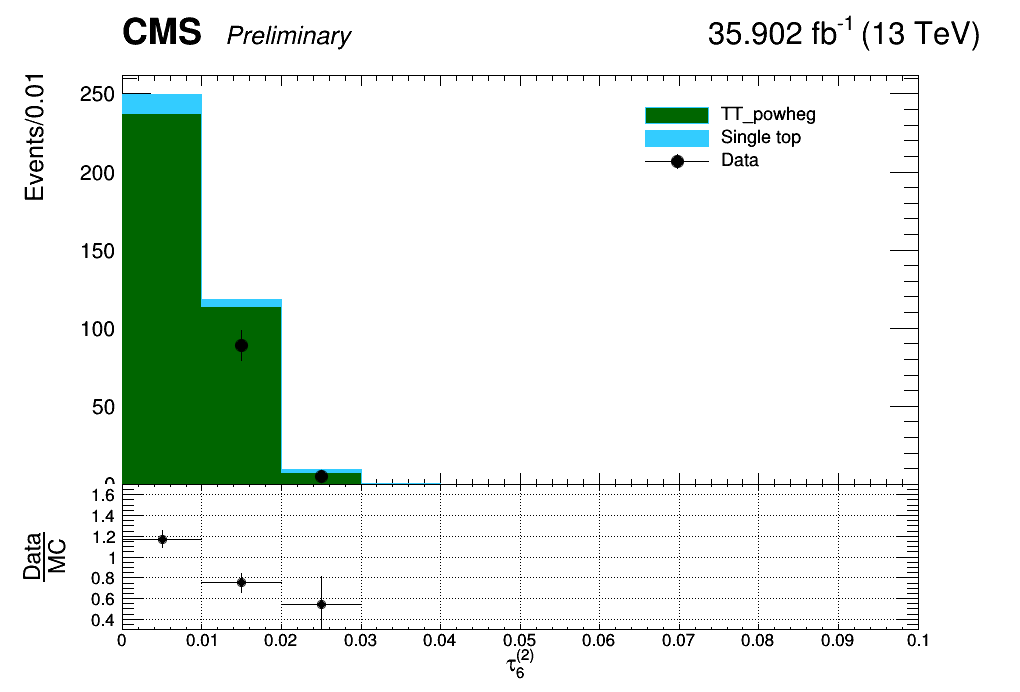

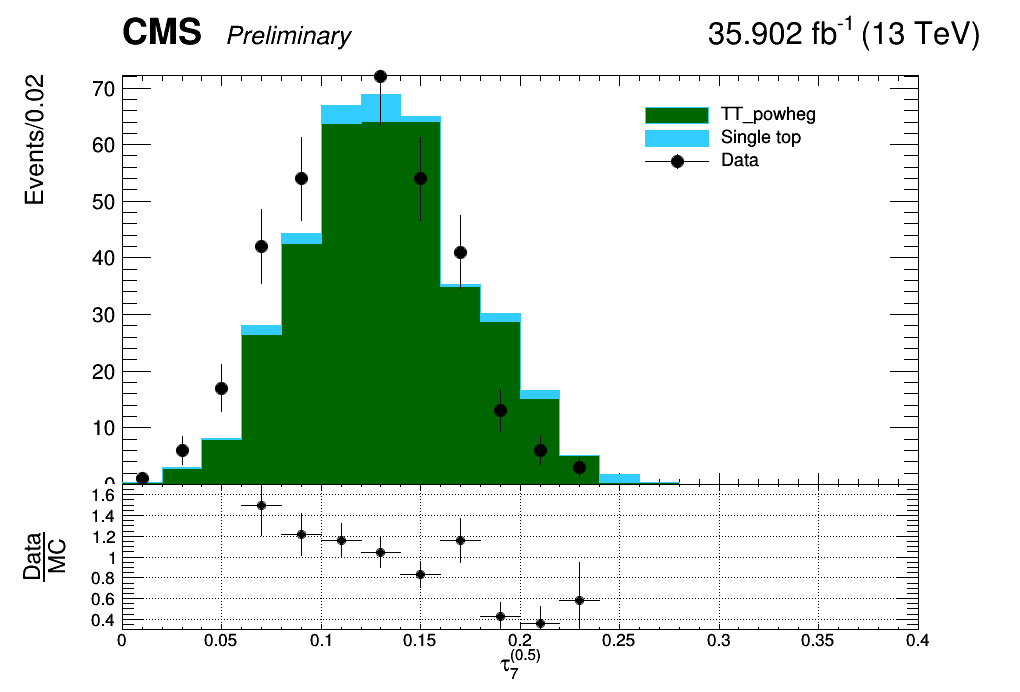

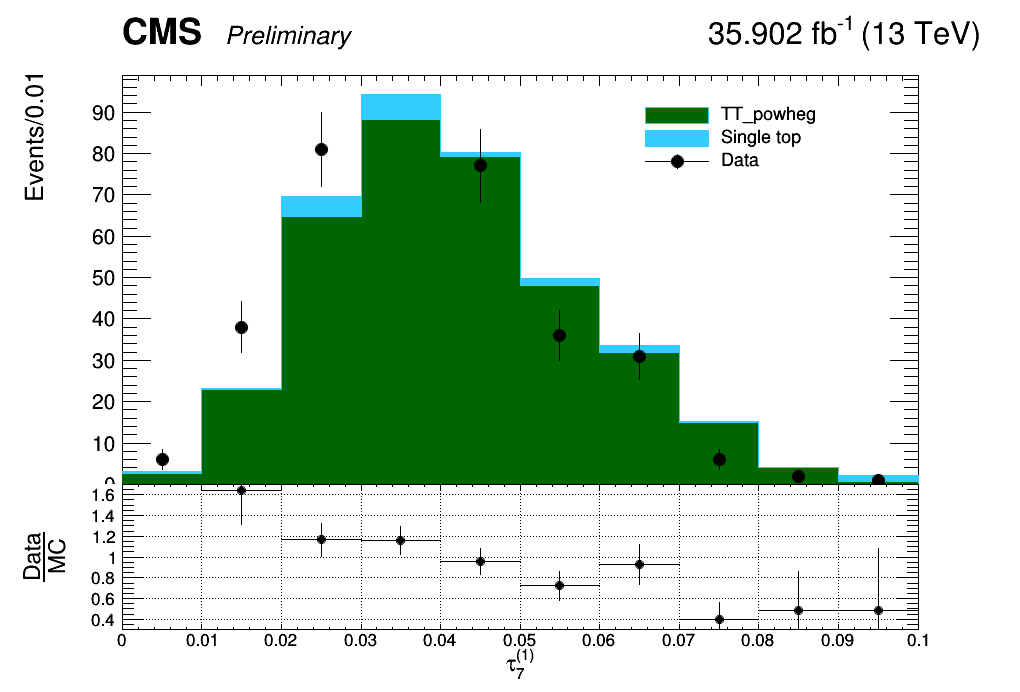

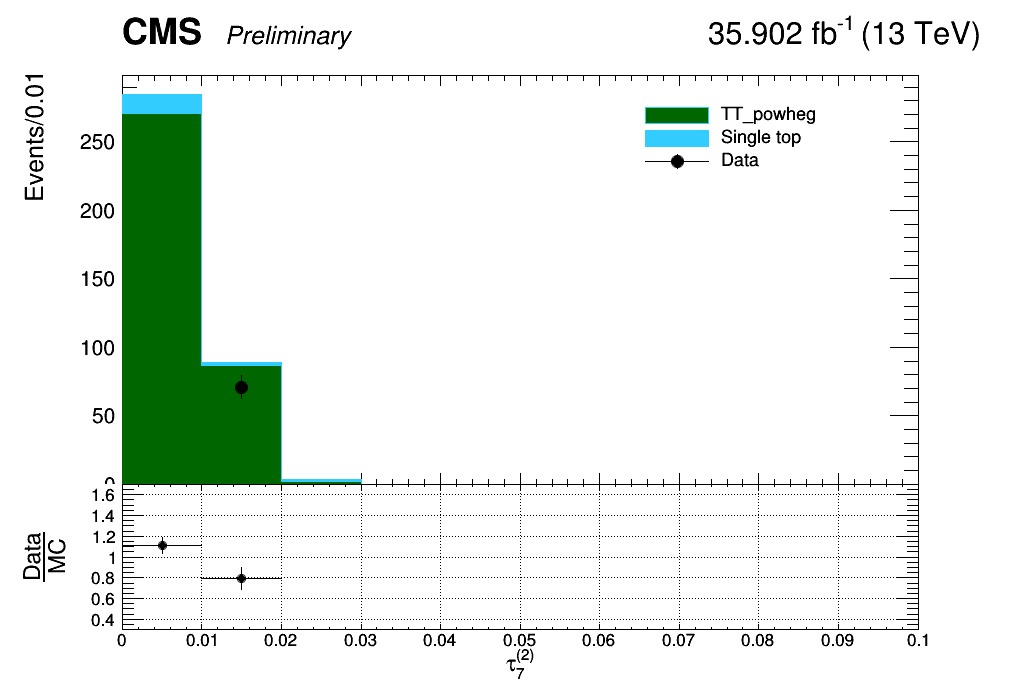

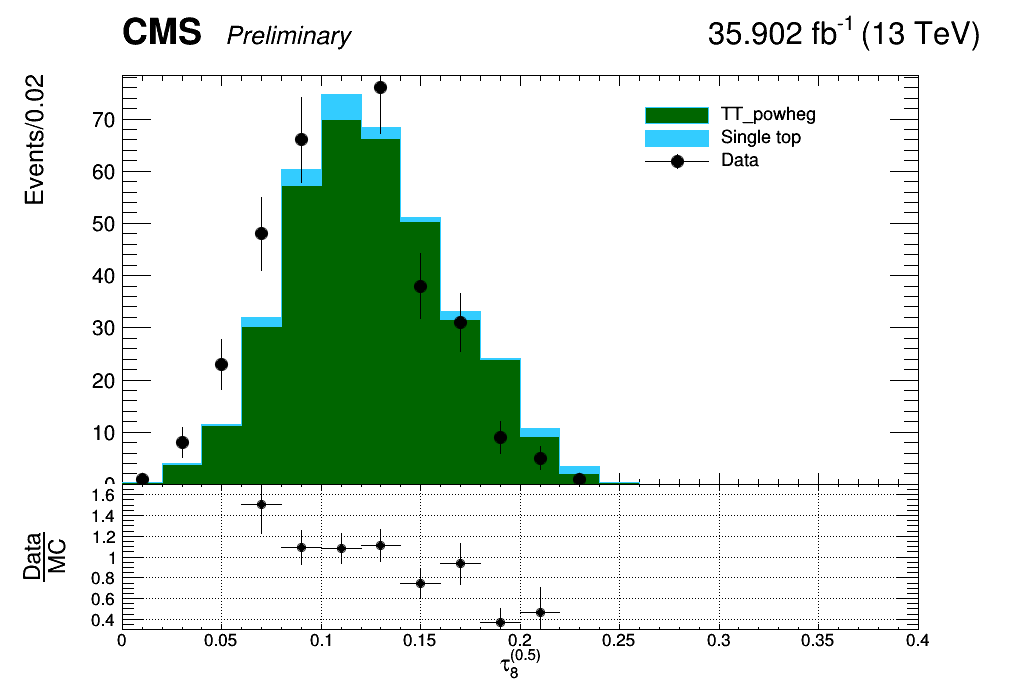

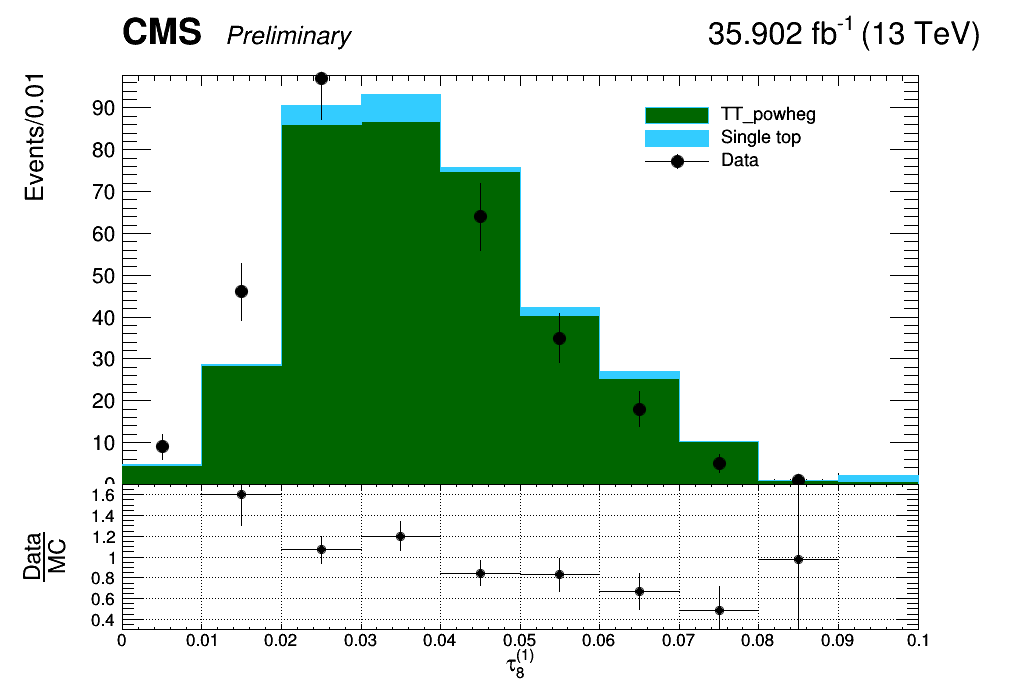

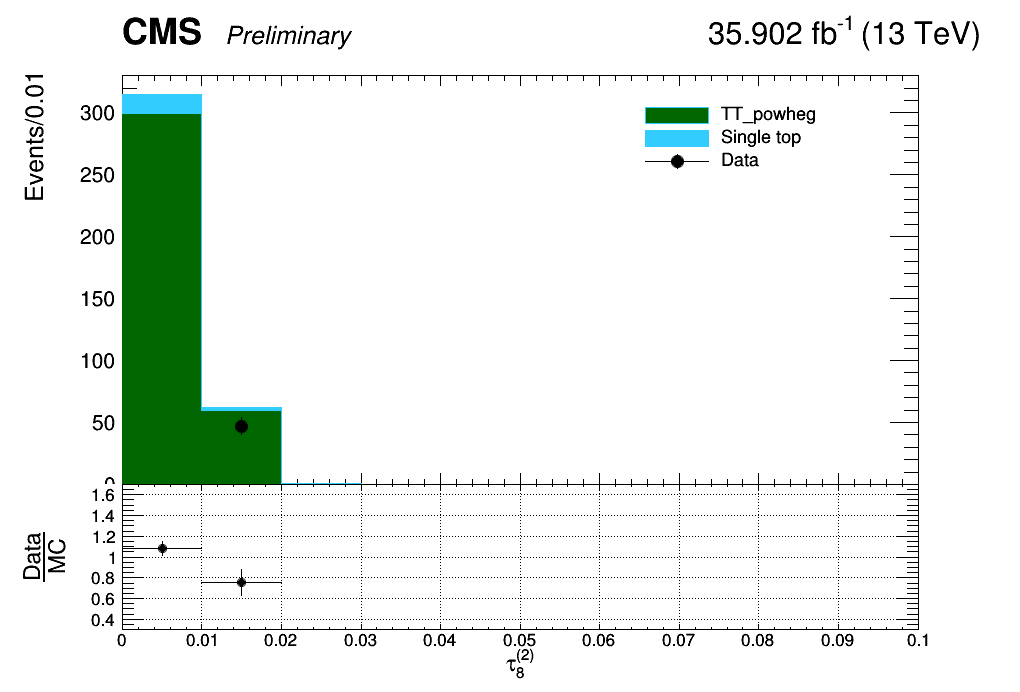

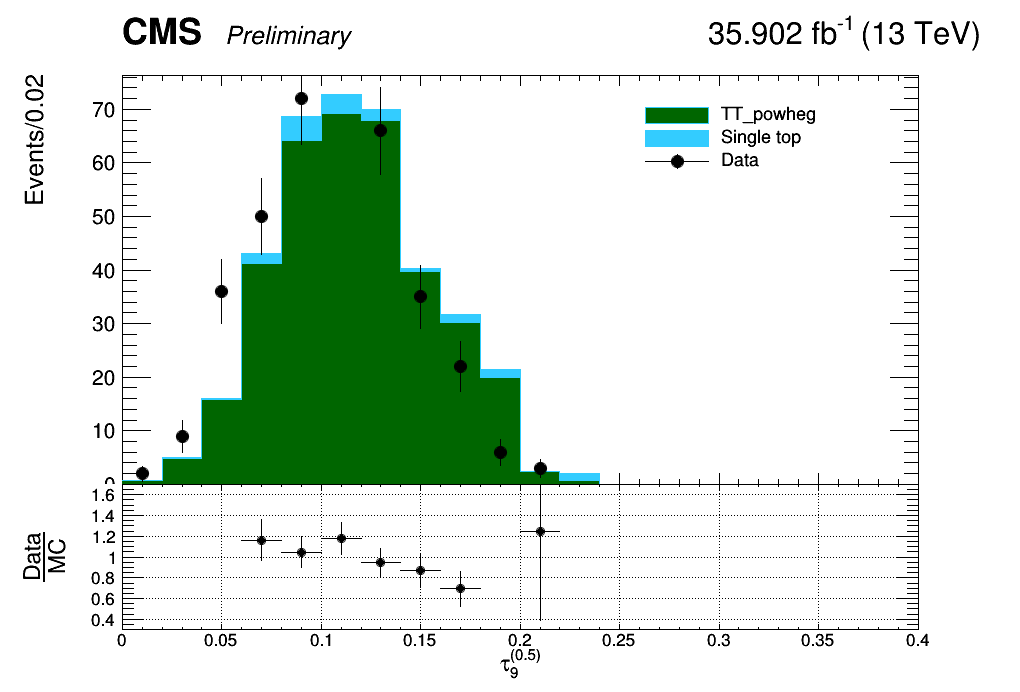

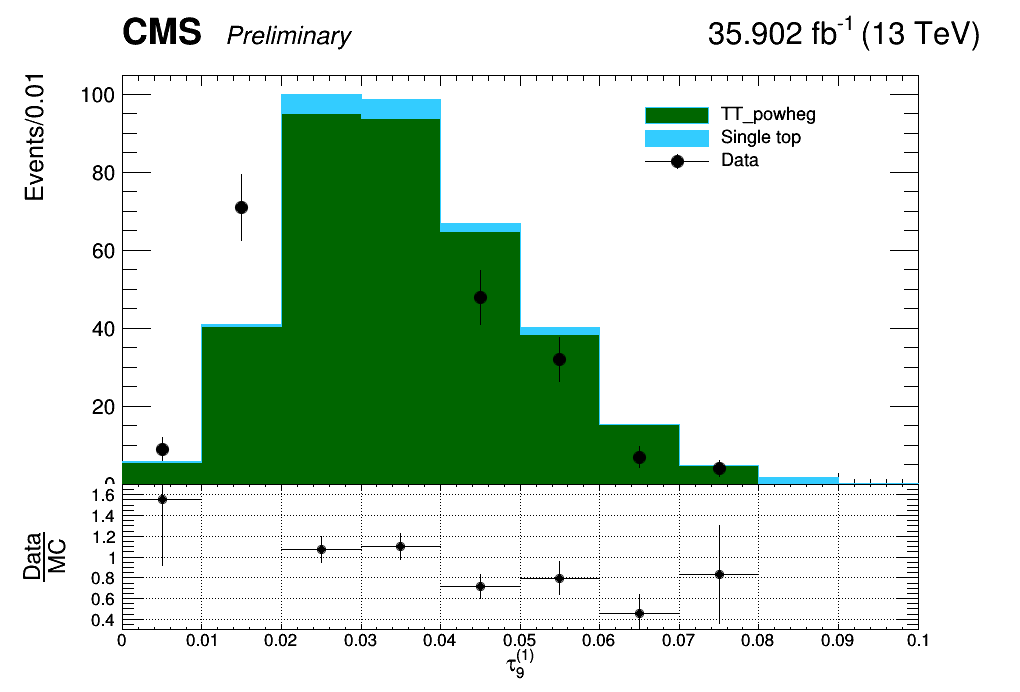

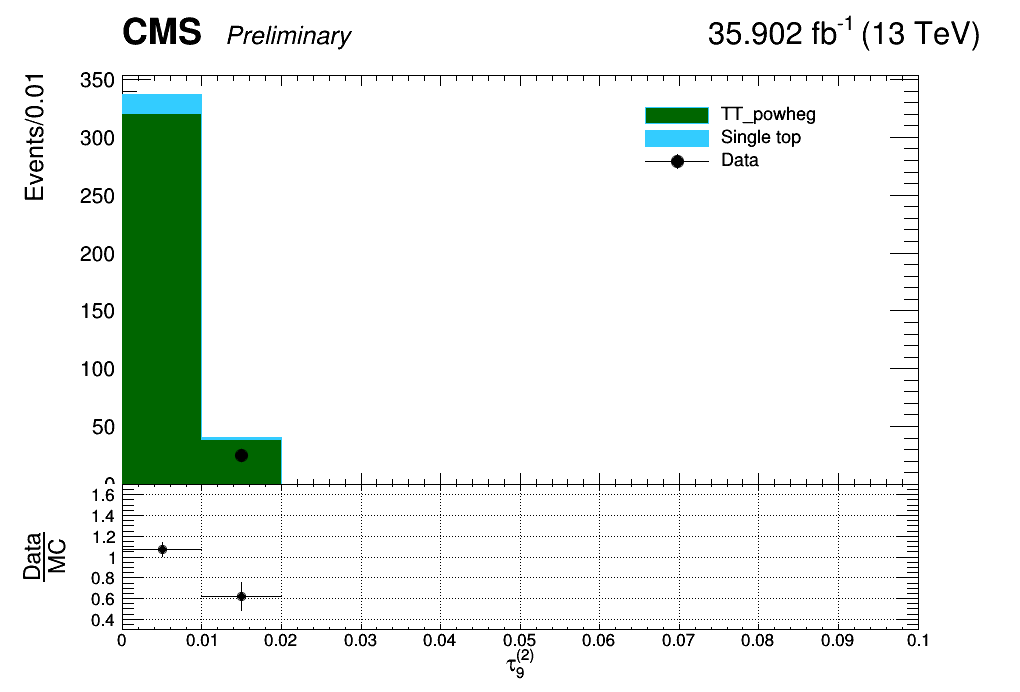

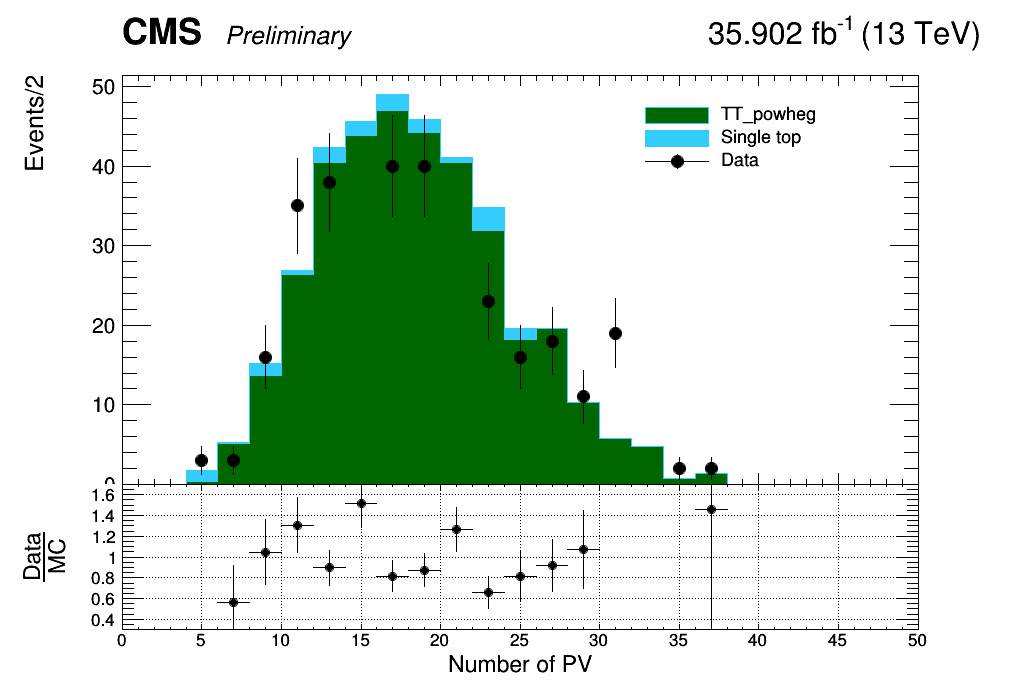

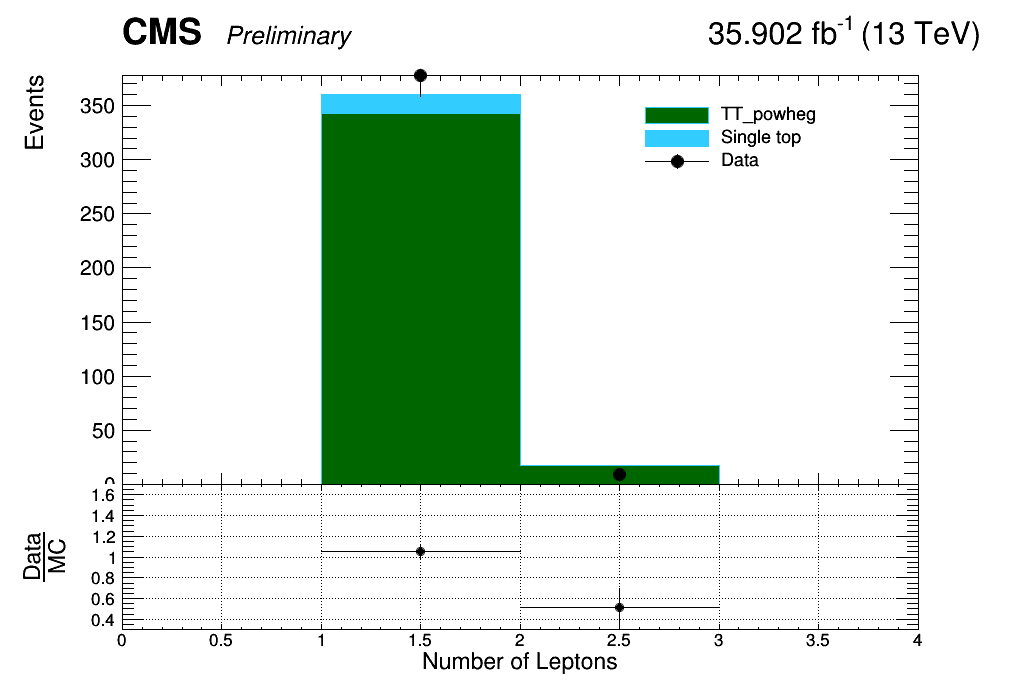

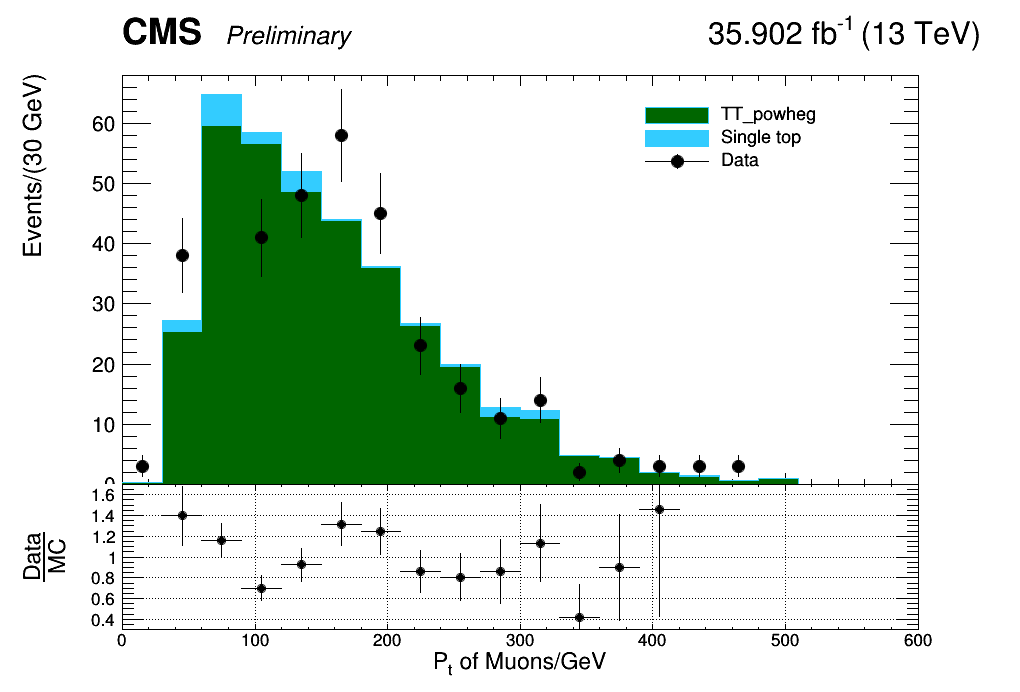

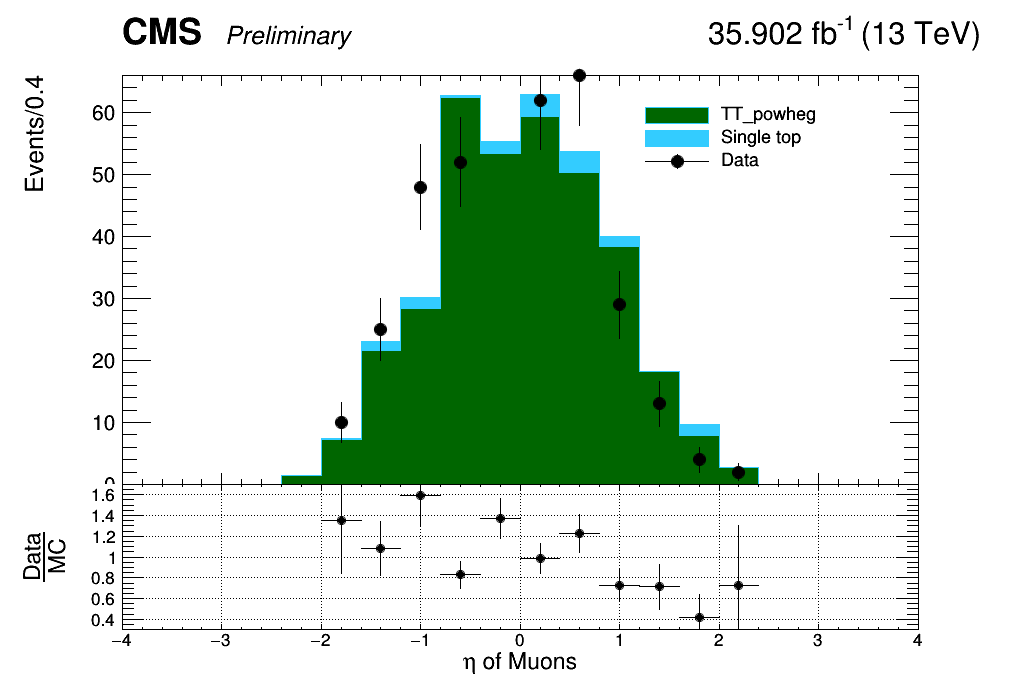

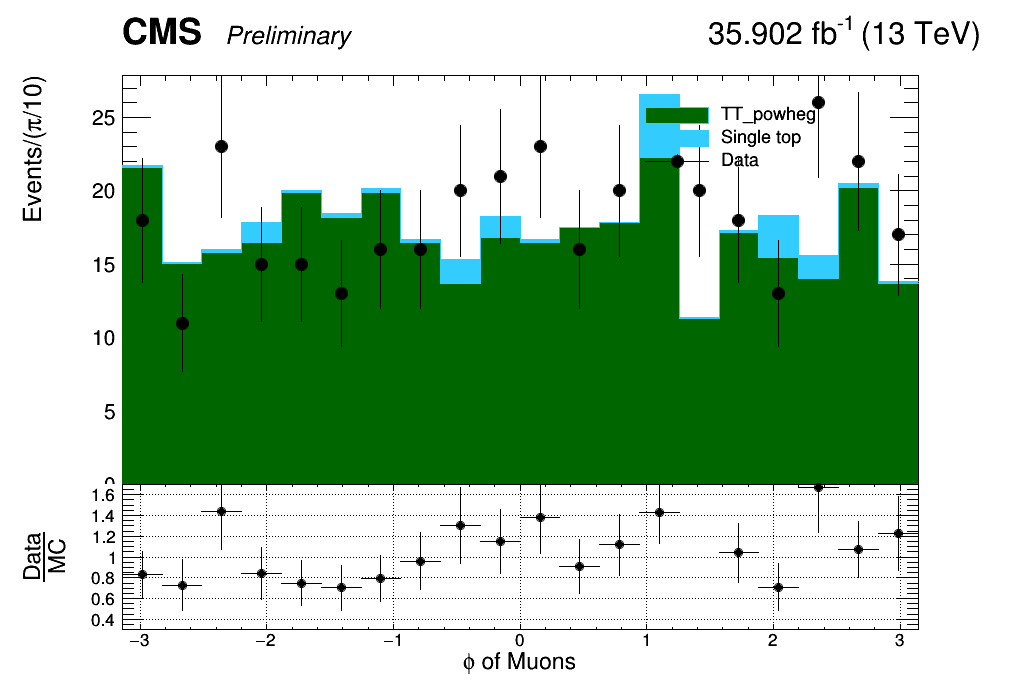

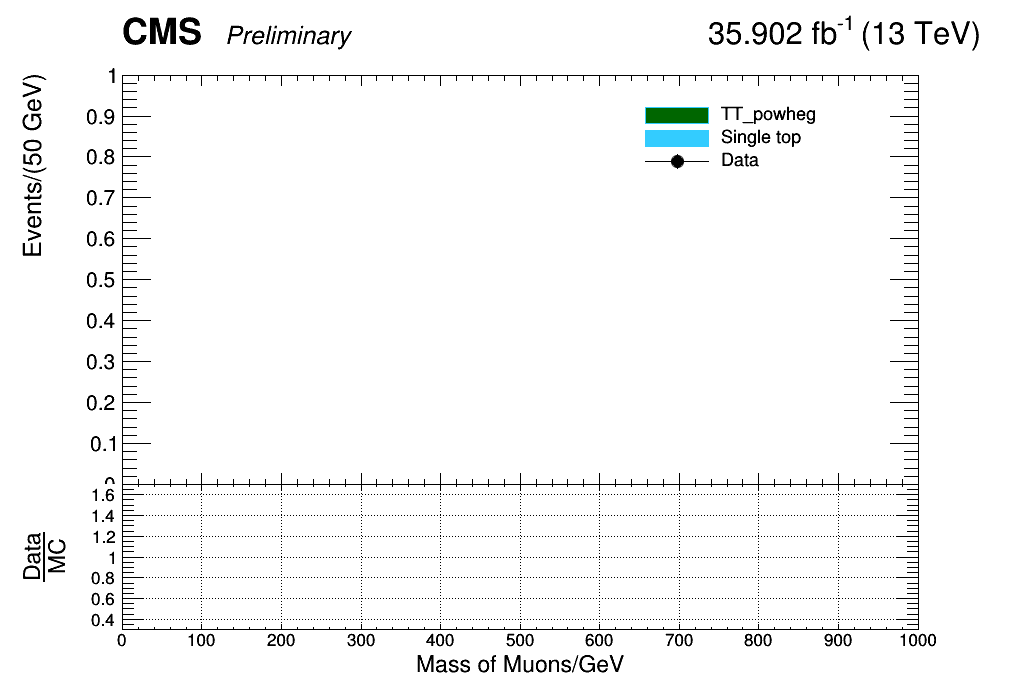

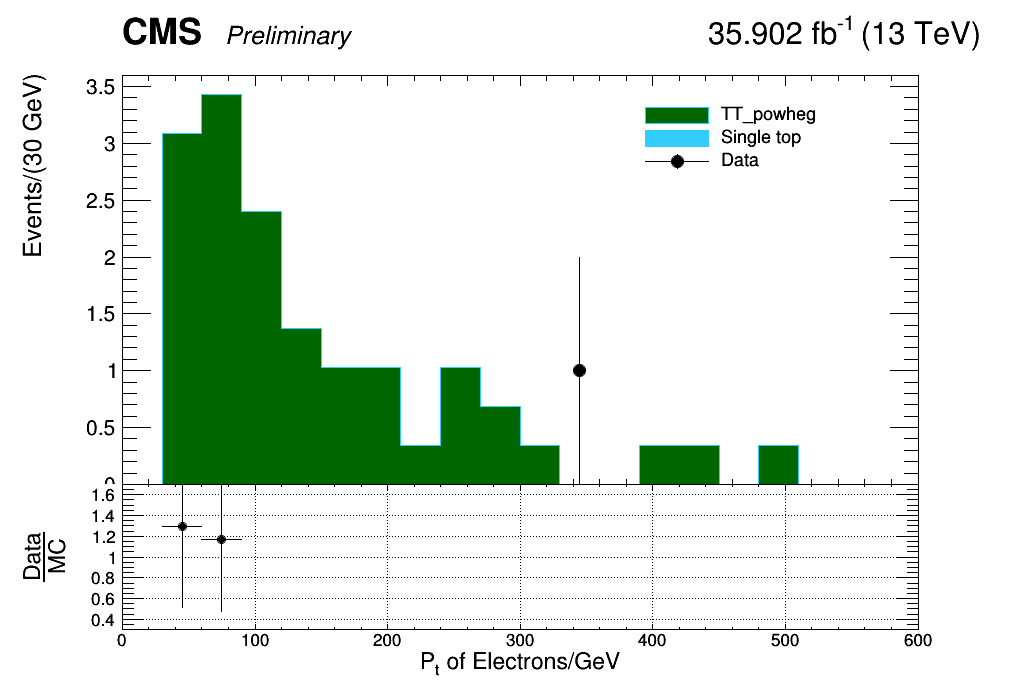

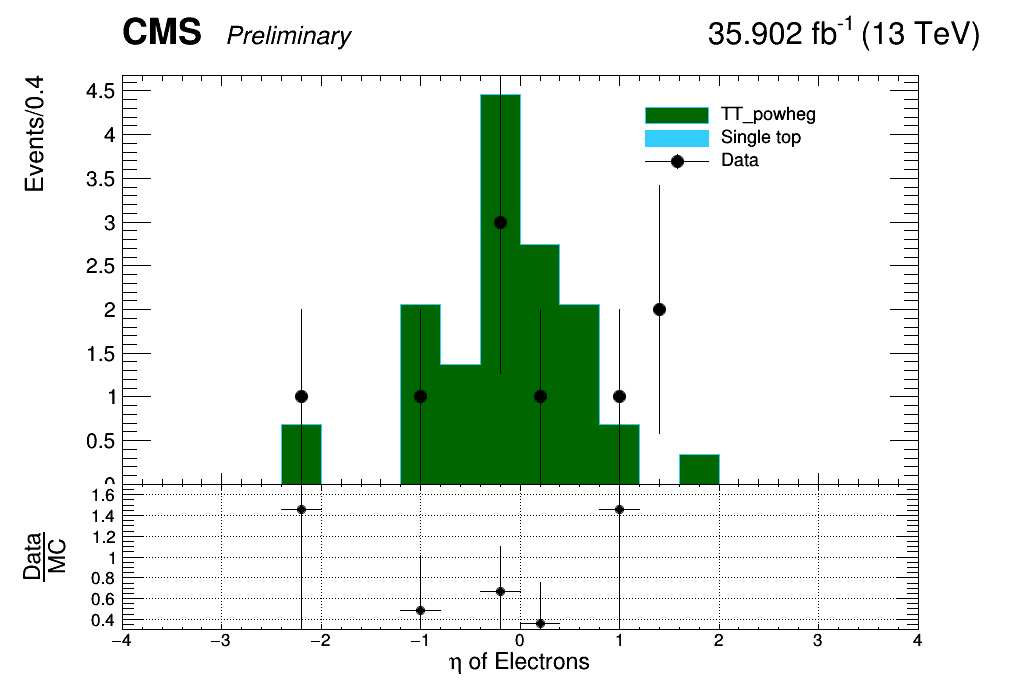

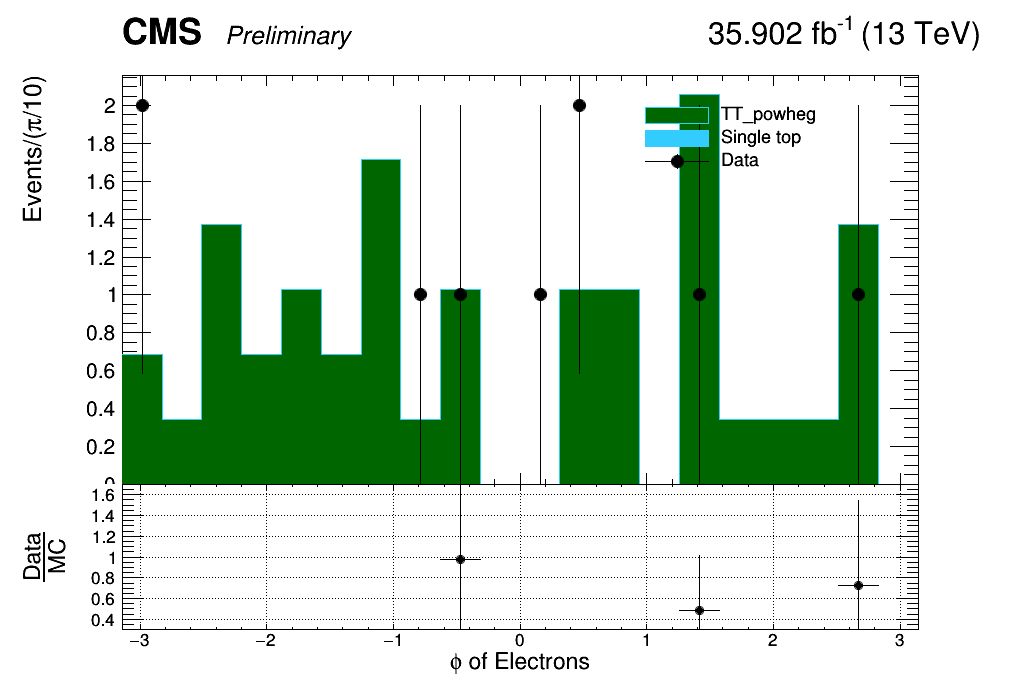

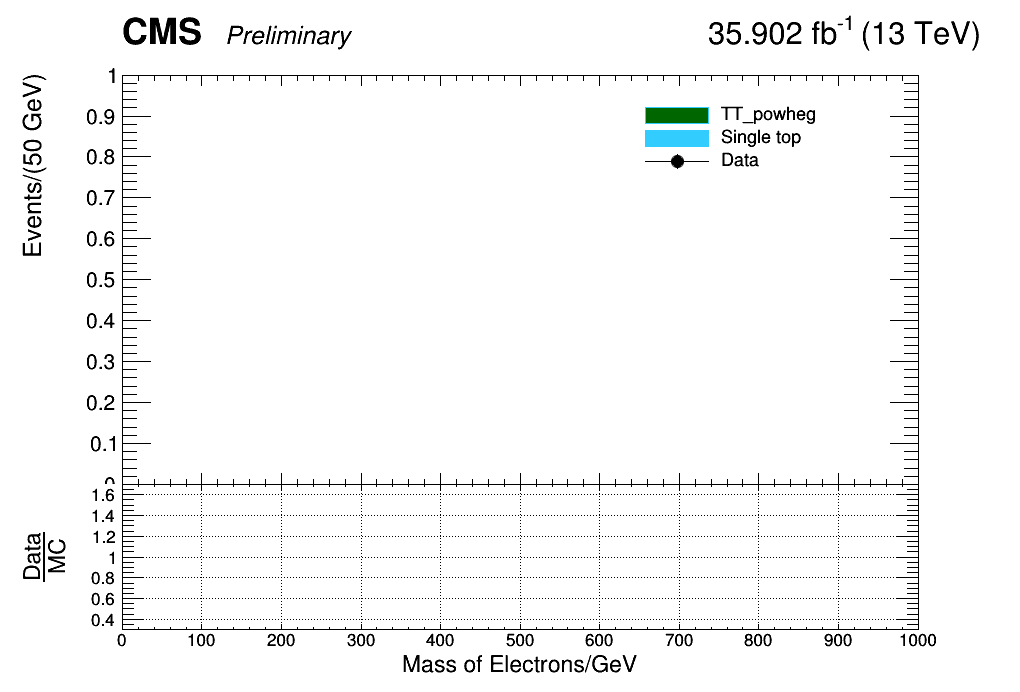

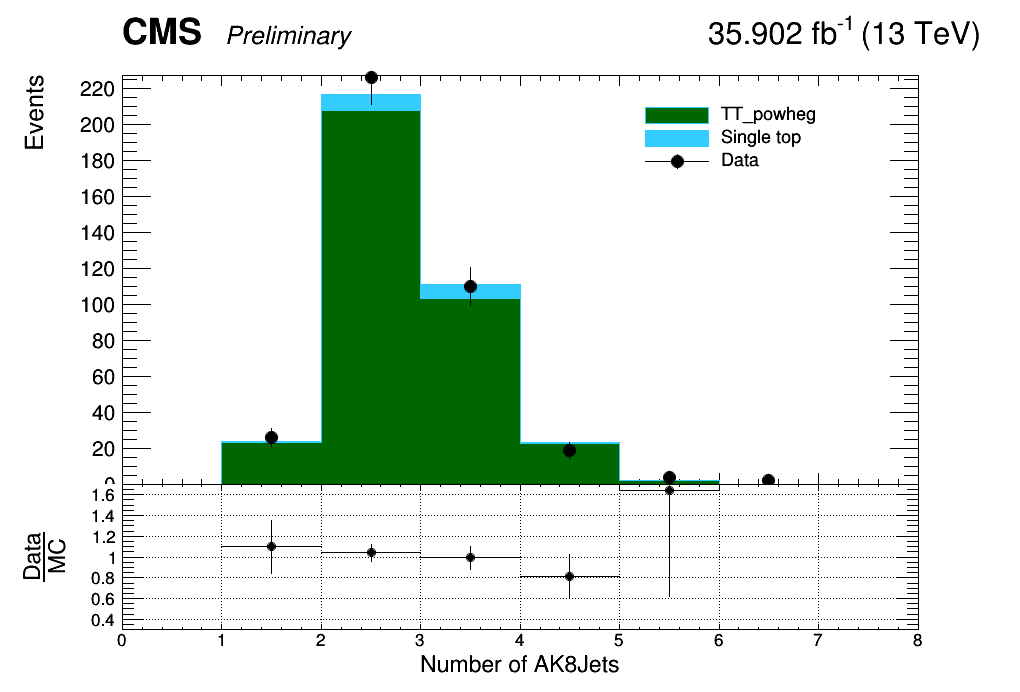

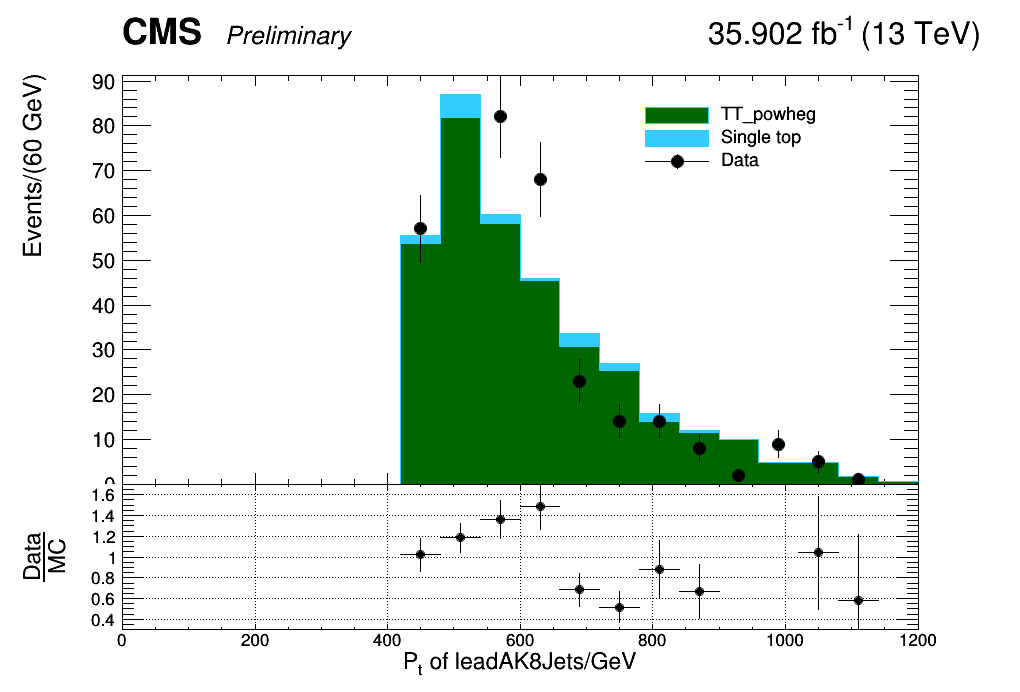

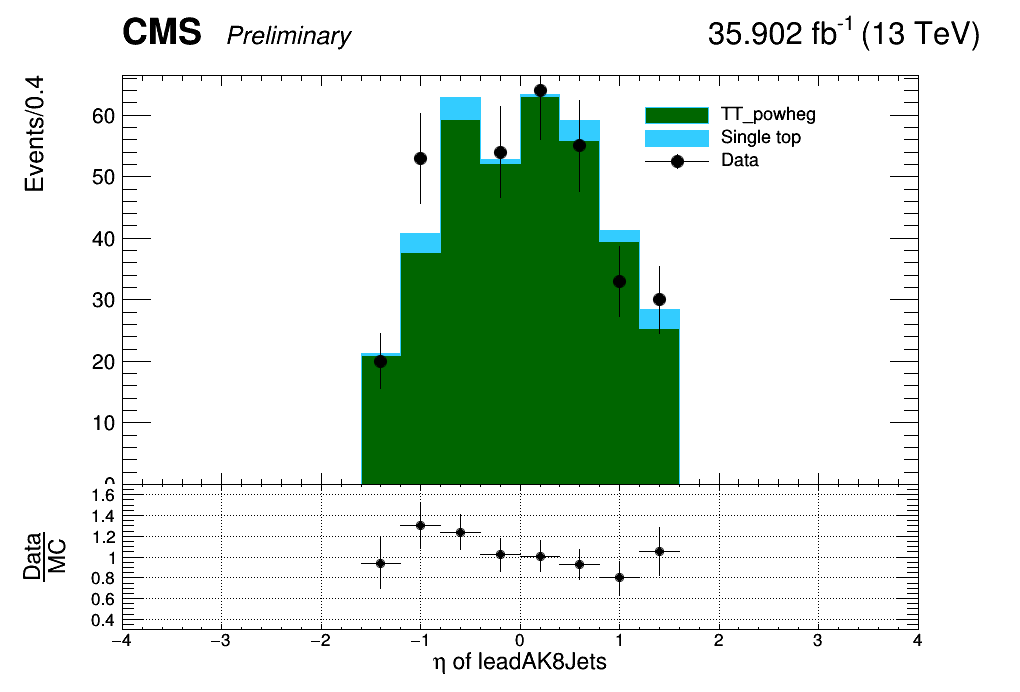

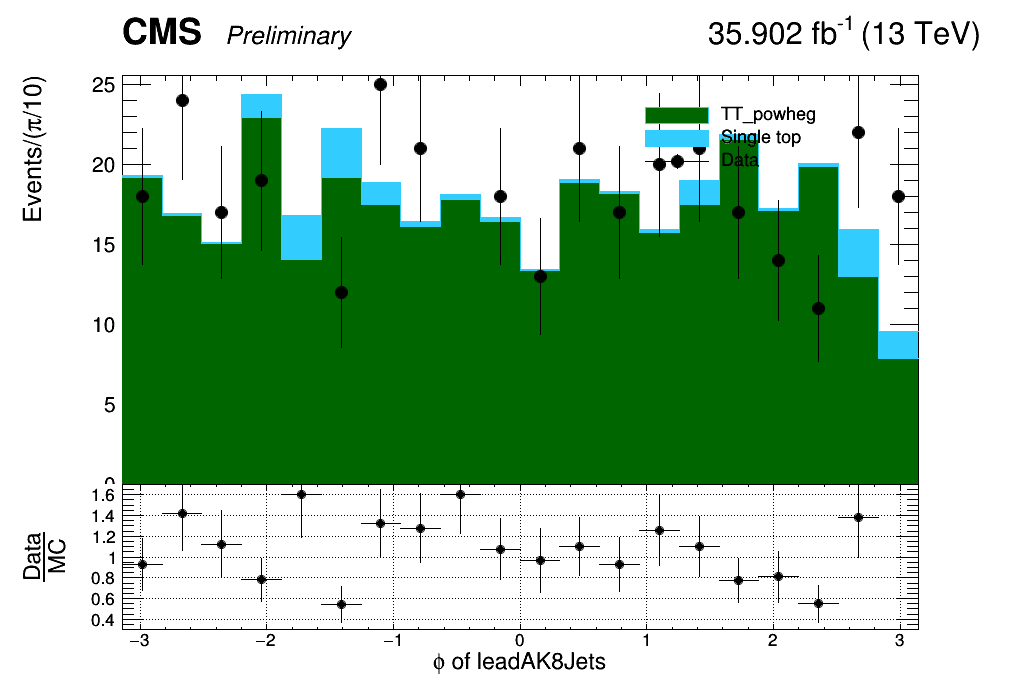

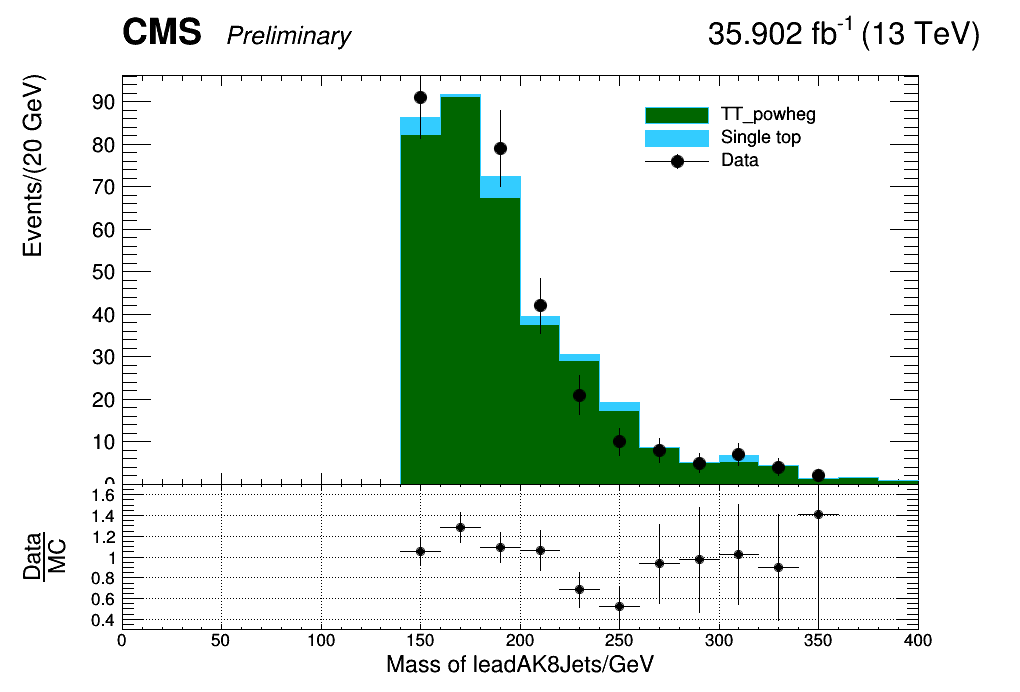

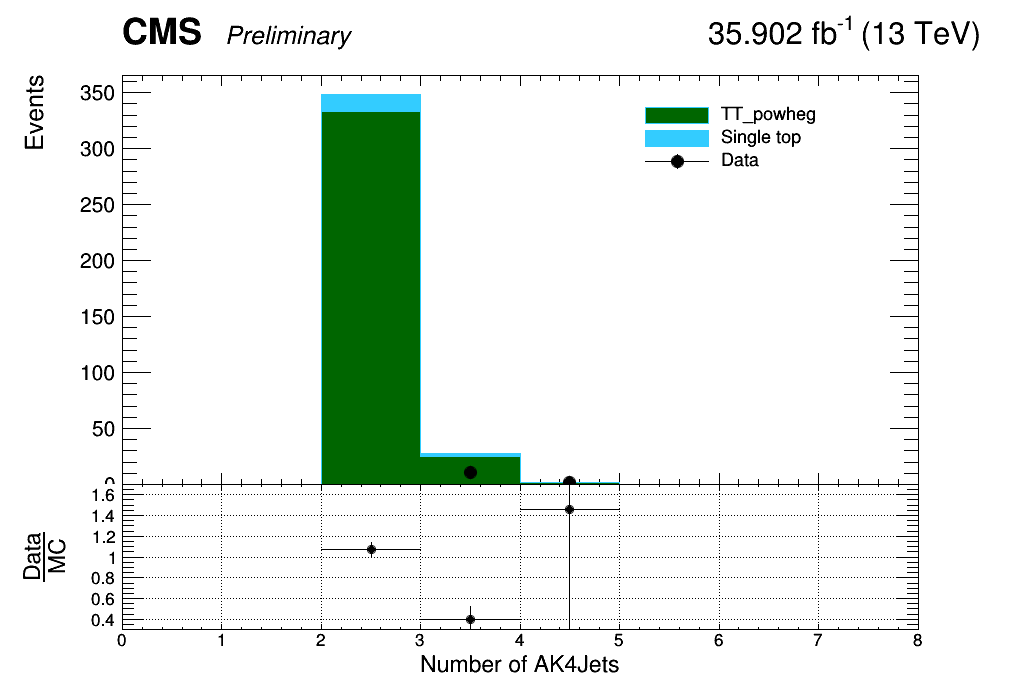

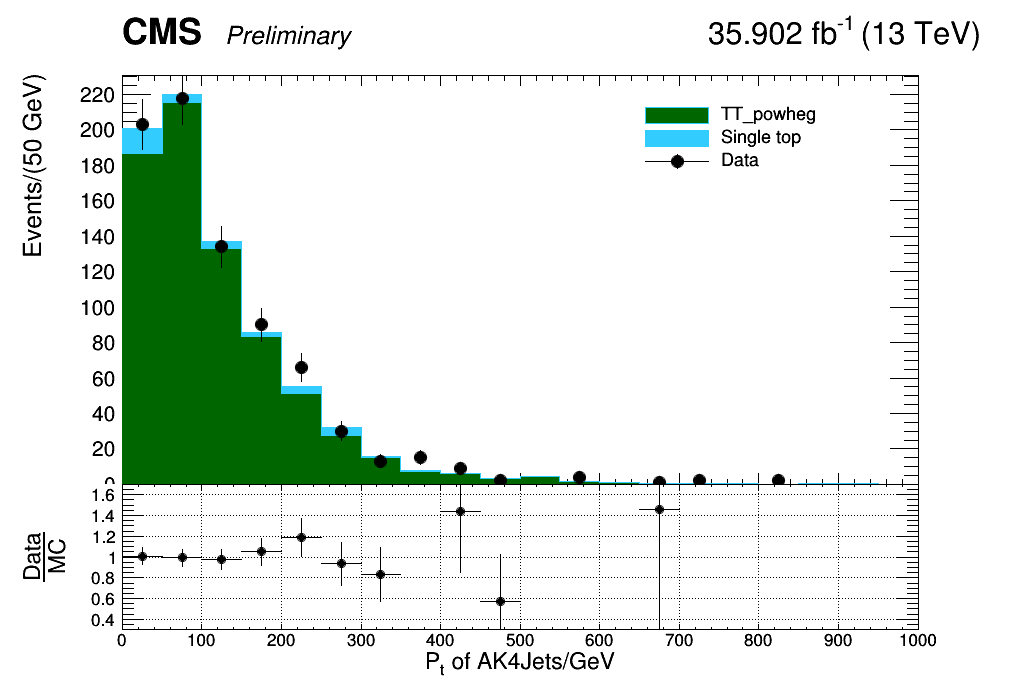

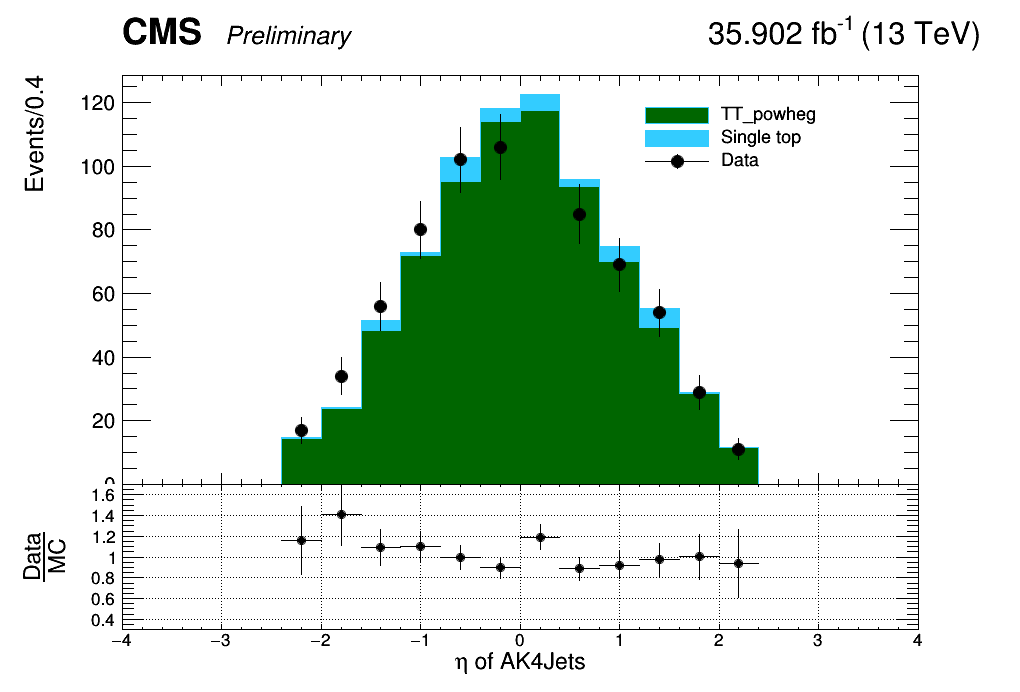

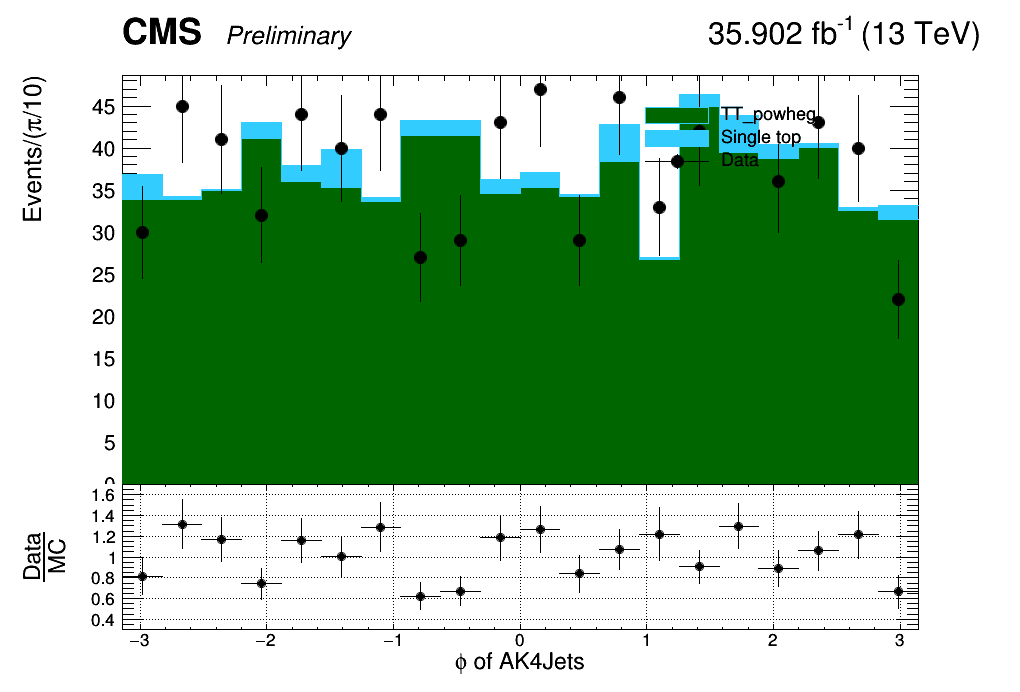

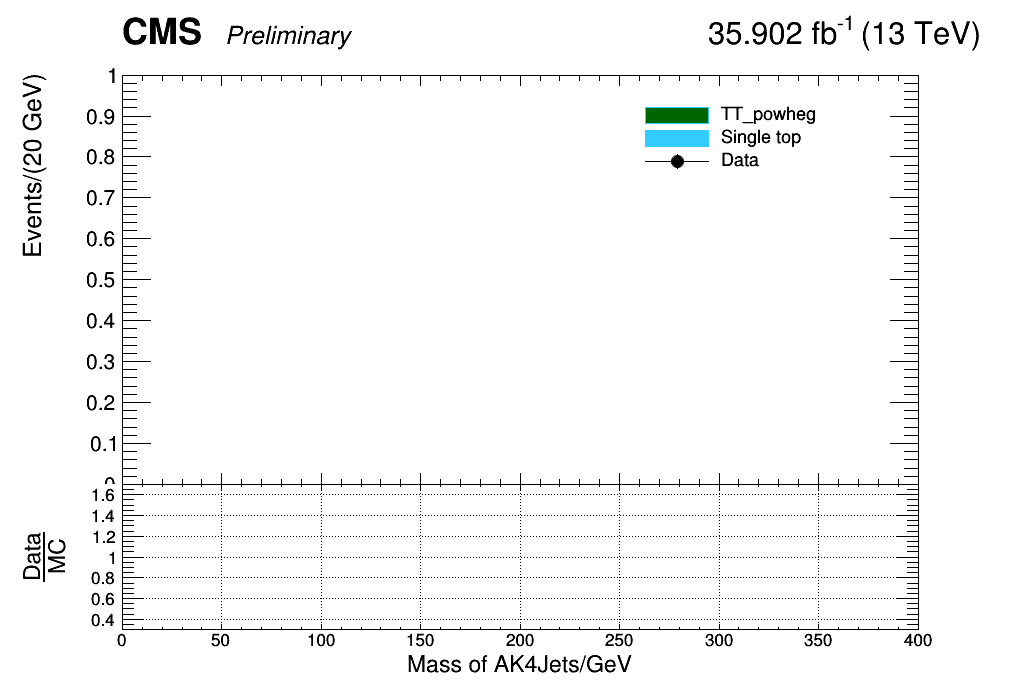

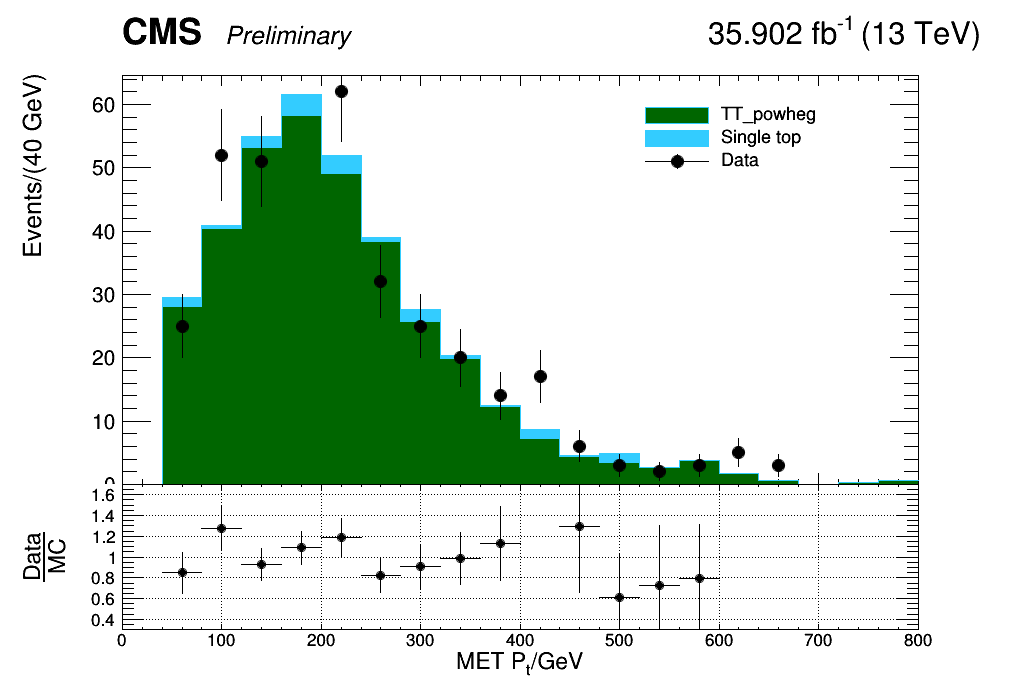

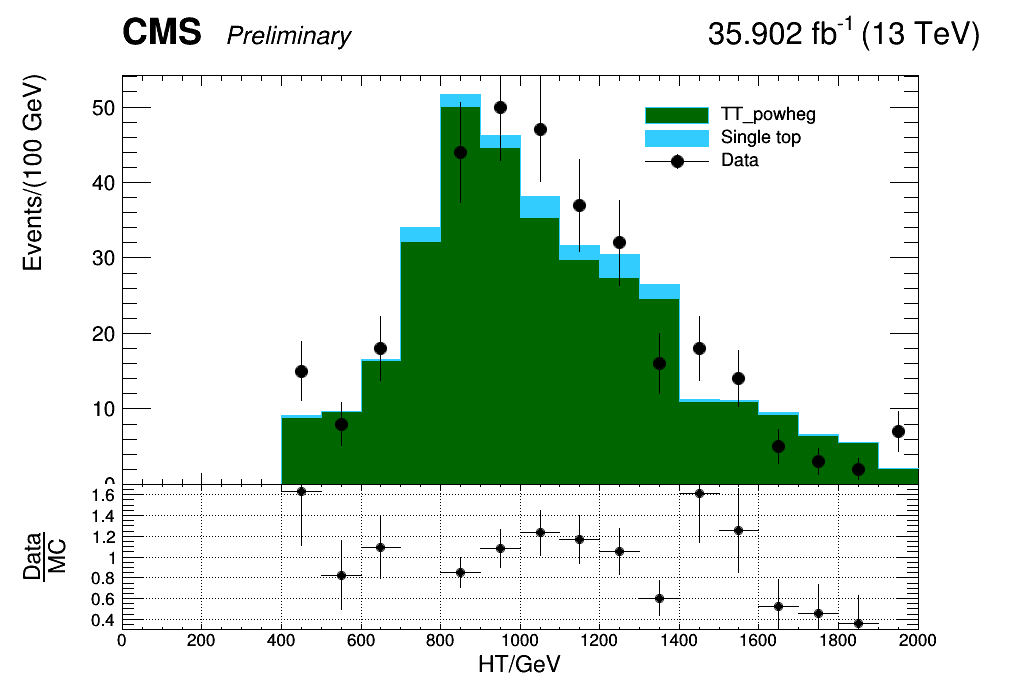

In [12]:
canvas1=np.zeros((l,),rt.TCanvas)
legend1=np.zeros((l,),rt.TLegend)

print MC_Compo[1],"top selection"

CName1=[]
for i in range(1,l+1):
    CName1.append('cp'+str(i))
Pad1=[]
Pad2=[]
Mc=[]
Ratio=[]
    
for i in range(l):
    canvas1[i] = rt.TCanvas(CName1[i],CName1[i],0,50,W,H)
    canvas1[i].SetFillColor(0)
    canvas1[i].SetBorderMode(0)
    canvas1[i].SetBorderSize(0)
    canvas1[i].SetFrameFillStyle(0)
    canvas1[i].SetFrameBorderMode(0)
    canvas1[i].SetFrameLineWidth(0)
    canvas1[i].SetLeftMargin( L/W )
    canvas1[i].SetRightMargin( R/W )
    canvas1[i].SetTopMargin( T/H )
    canvas1[i].SetBottomMargin( B/H )
    canvas1[i].SetTickx(0)
    canvas1[i].SetTicky(0)
#canvas.Draw()

    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95, -1,0,0);
    pad1.SetBottomMargin(0.); #// Upper and lower plot are joined
#pad1.SetGridx();         #// Vertical grid
    pad1.SetBorderMode(0)
    pad1.SetBorderSize(0)
    pad1.SetFrameLineWidth(0)
    pad1.SetFrameBorderMode(0)
    pad1.Draw()           #// Draw the upper pad: pad1
    pad1.cd()
    Pad1.append(pad1)

               #// pad1 becomes the current pad
    Data_topSel[i].SetMarkerSize(1.5)
    Data_topSel[i].SetMarkerColor(rt.kBlack)
    Data_topSel[i].SetMarkerStyle(20)
    Data_topSel[i].SetLineColor(rt.kBlack)

    TTp_topSel[i].SetLineColor(rt.kAzure+8)
    TTp_topSel[i].SetFillColor(rt.kGreen+3)

    st_topSel[i].SetLineColor(rt.kAzure+8)
    st_topSel[i].SetFillColor(rt.kAzure+8)


    mc = rt.THStack("MC",Title_topSel[i][1])
    mc.Add(TTp_topSel[i])
    mc.Add(st_topSel[i])
    mc.Draw("hist")
    mc.GetYaxis().SetTitle(Title_topSel[i][0])
    mc.GetXaxis().SetTitle(Title_topSel[i][2])
    mc.GetYaxis().SetTitleOffset(0.9)
    Mc.append(mc)

    mc.Draw("samehist")
    Data_topSel[i].Draw("esamex0")
    CMS_lumi.CMS_lumi(canvas1[i], iPeriod, iPos)
#    canvas[i].cd()

    canvas1[i].cd()
    canvas1[i].Update()
    canvas1[i].RedrawAxis()
    frame = canvas1[i].GetFrame()
    frame.Draw()

    pad2 = rt.TPad("pad2","pad2",0,0.0,1,0.3, -1,0,0)
    pad2.SetTopMargin(0)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    pad2.cd()
    pad2.SetBottomMargin(0.3)
    Pad2.append(pad2)

    ratio = rt.TH1D(Title_topSel[i][1],";;",*Range_topSel[i])
    ratio.GetXaxis().SetTitle(Title_topSel[i][2]);
    ratio.Add(Data_topSel[i])
    #ratio.GetYaxis().SetTitleOffset(0.);
    ratio.GetYaxis().CenterTitle(rt.kTRUE);
    ratio.GetXaxis().CenterTitle(rt.kTRUE);
    ratio.GetYaxis().SetRangeUser(0.3,1.7)

    MC = rt.TH1D(Title_topSel[i][1],";;",*Range_topSel[i])
    MC.Add(TTp_topSel[i])
    MC.Add(st_topSel[i])

    ratio.GetYaxis().SetTitle("#frac{Data}{MC}")
    ratio.Sumw2()
    ratio.SetStats(0)
    ratio.Divide(MC)
    ratio.GetYaxis().SetLabelSize(0.09)
    ratio.GetXaxis().SetLabelSize(0.09)
    ratio.SetMarkerColor(rt.kBlack)
    ratio.SetMarkerStyle(20)
    ratio.SetLineColor(rt.kBlack)
    ratio.GetYaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetTitleOffset(0.4)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetXaxis().SetTitleOffset(0.85)
    Ratio.append(ratio)
    #ratio.SetAxisRange(50,150)

    ratio.Draw("EP")
    canvas1[i].cd()


    legend1[i] =  rt.TLegend(x0_l,y0_l,x1_l, y1_l )
    legend1[i].AddEntry(TTp_topSel[i],MC_Compo[1],"f")

    legend1[i].AddEntry(st_WSel[i],"Single top","f")
    legend1[i].AddEntry(Data_WSel[i],"Data","lep")
    legend1[i].SetTextFont(42)
    legend1[i].SetTextAngle(0)
    legend1[i].SetTextColor(rt.kBlack)    
    #legend.SetTextSize(0.05)    
    legend1[i].SetTextAlign(12) 
    legend1[i].SetBorderSize(0)
    legend1[i].SetFillStyle(0)
    #legend.SetLinewdith(0)
    legend1[i].Draw()

    canvas1[i].Print("/t3home/gelliu/Unfolding_Substructure/Figures/TT_powheg_topSel/"+Objects_topSel[i]+".png")
    canvas1[i].Update()
    canvas1[i].Draw()

TTJets_madgraph W selection


Warning in <TFile::Append>: Replacing existing TH1: P_{t} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_WSel/recoJetPt_nom_WSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: Softdrop Mass (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_WSel/recoJetSDmass_nom_WSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{21} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_WSel/recoJetTau21_nom_WSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{1}^{(0.5)} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_WSel/recoJet_tau_0p5_1_WTA_kT_nom_WSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{1}^{(1)} (Pot

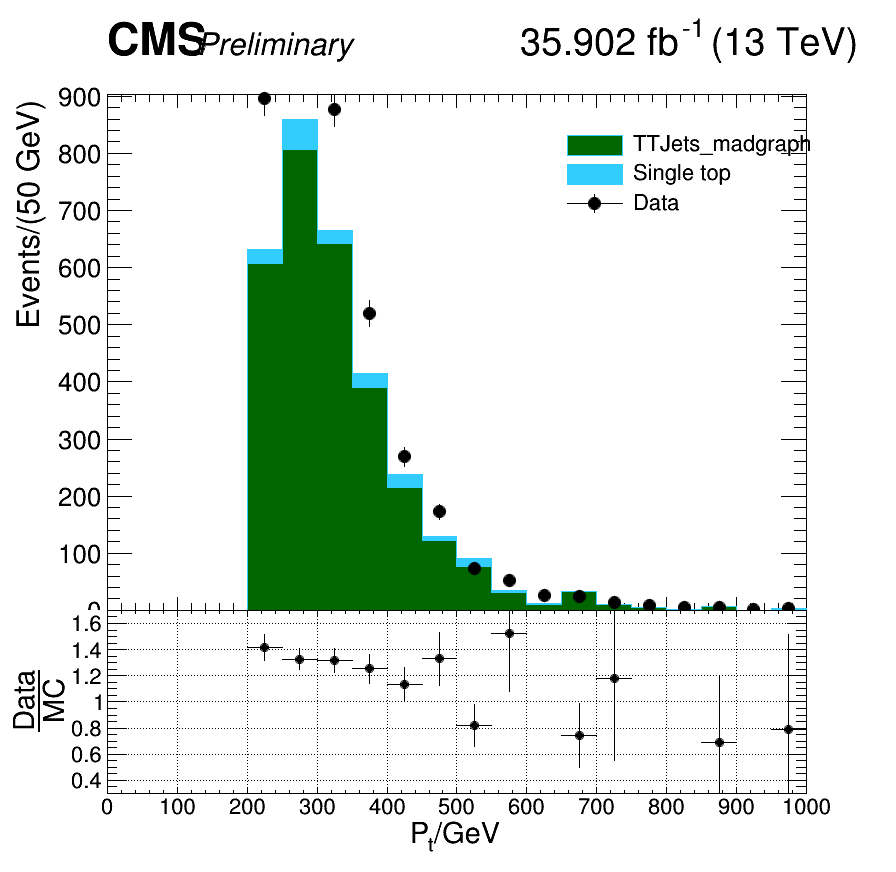

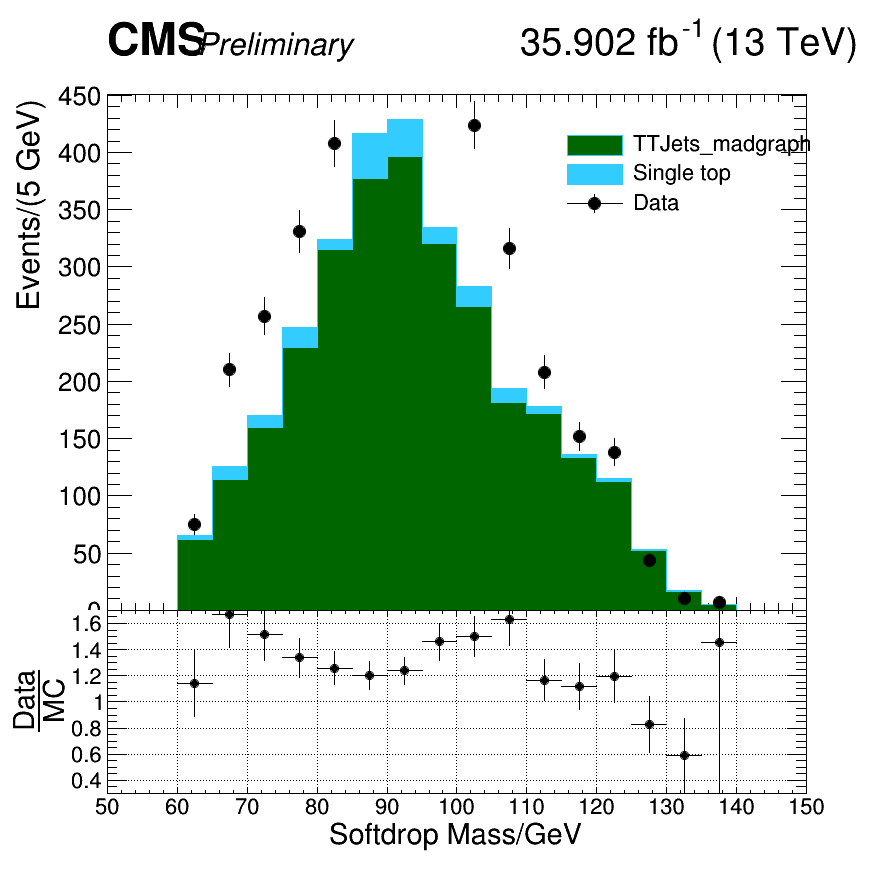

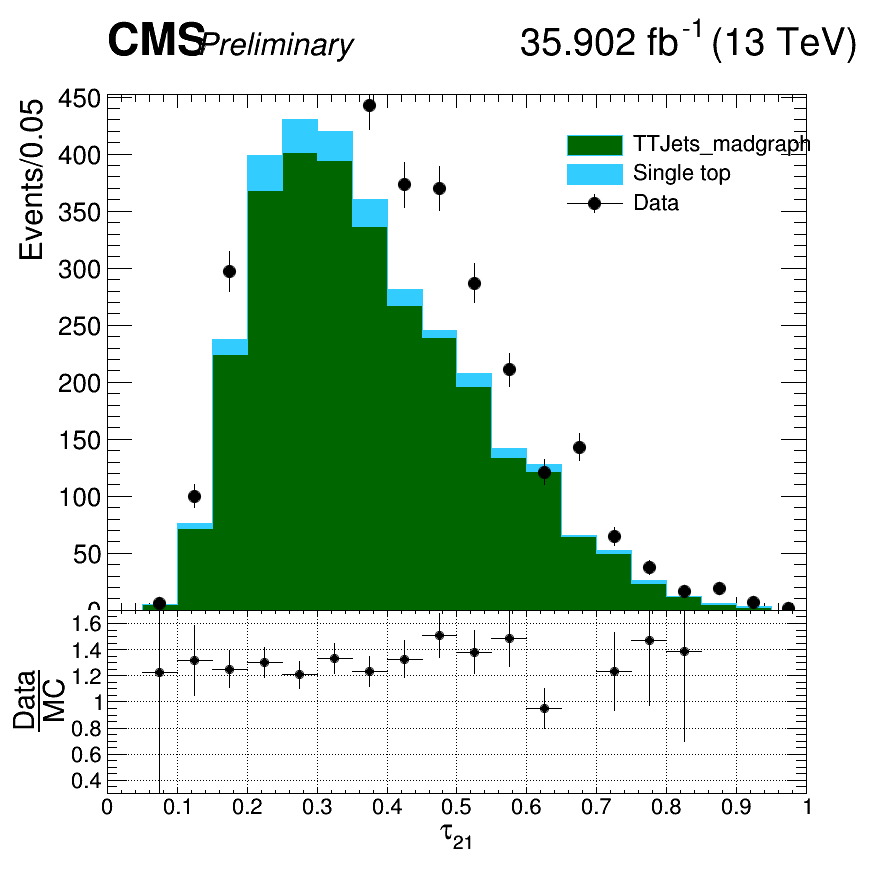

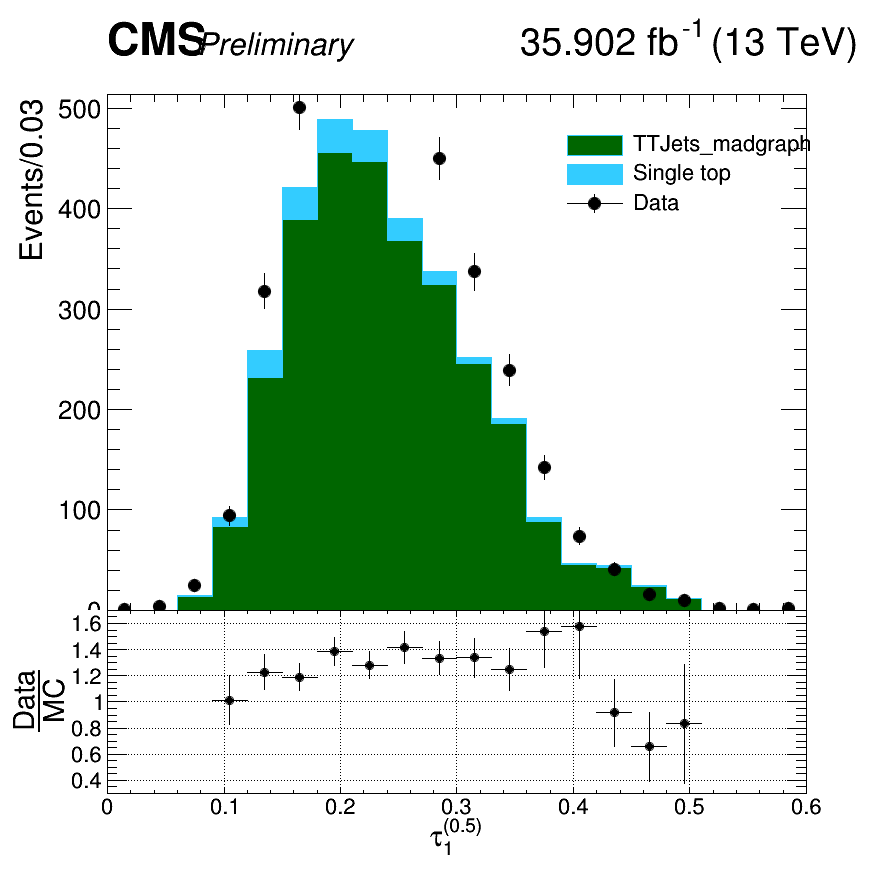

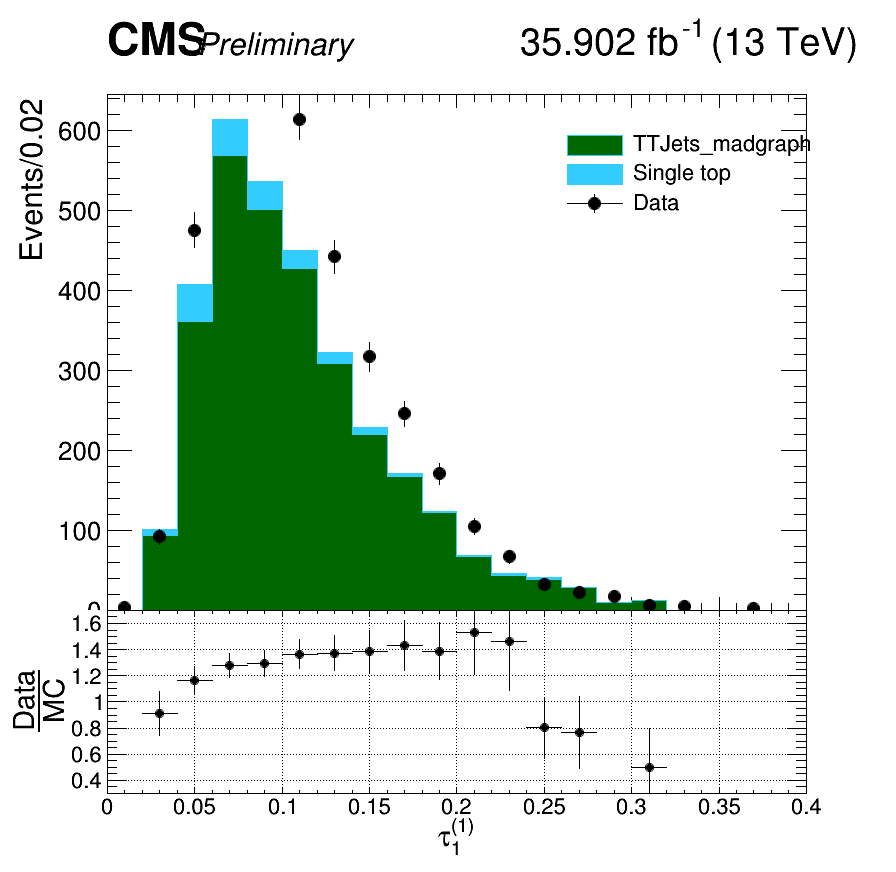

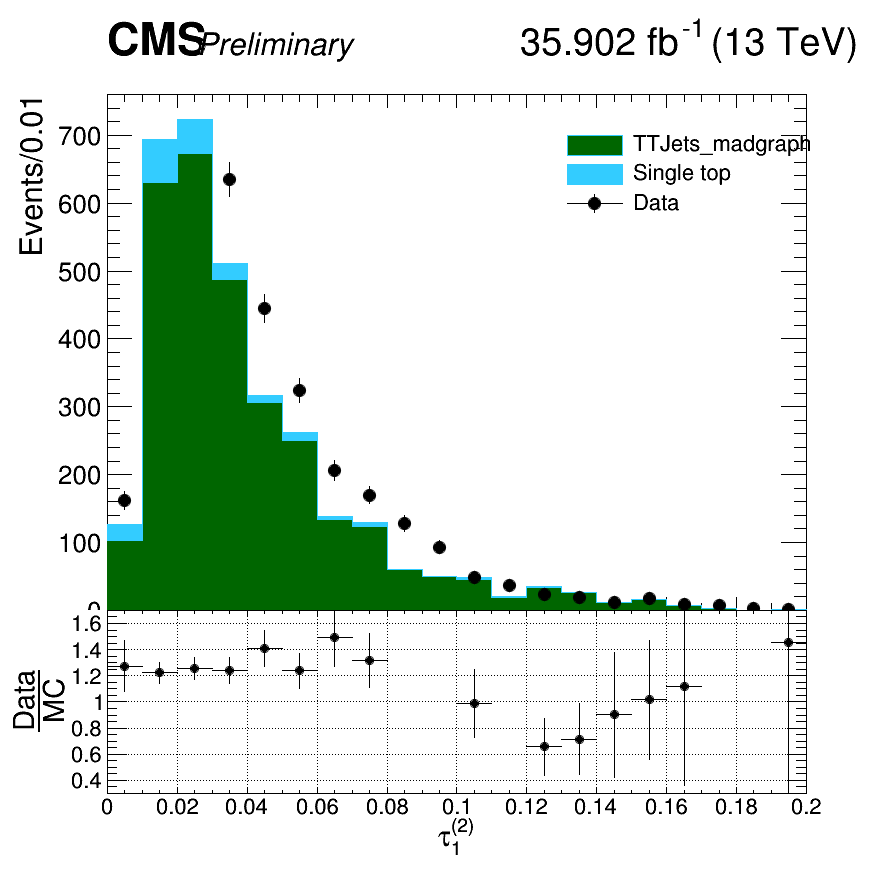

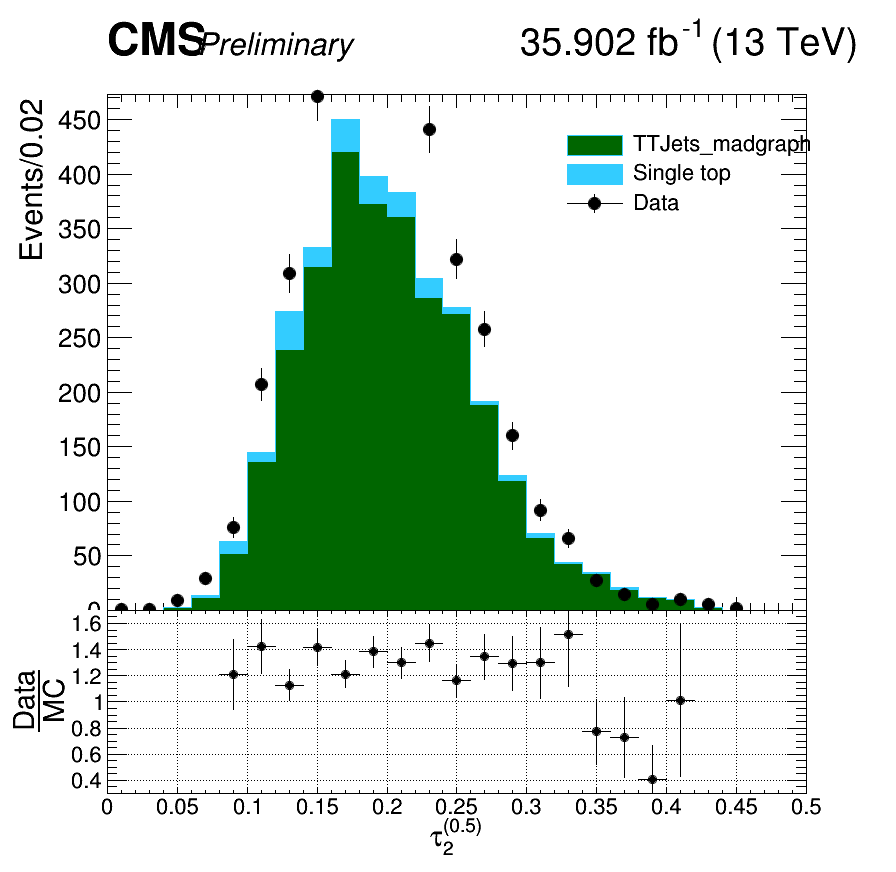

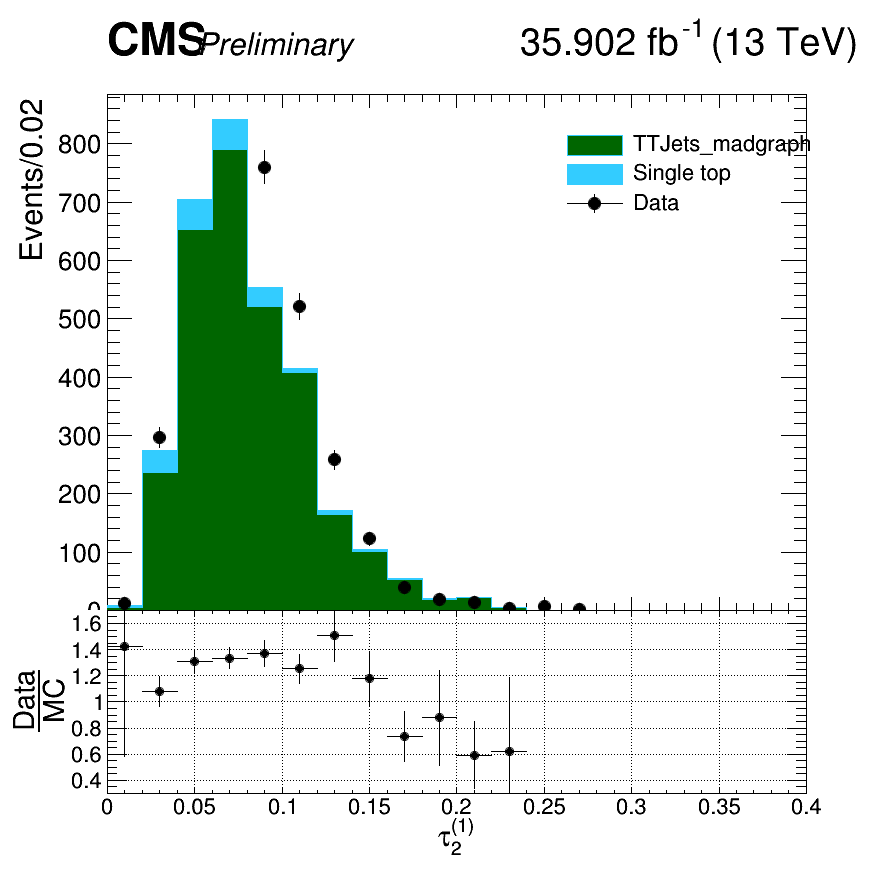

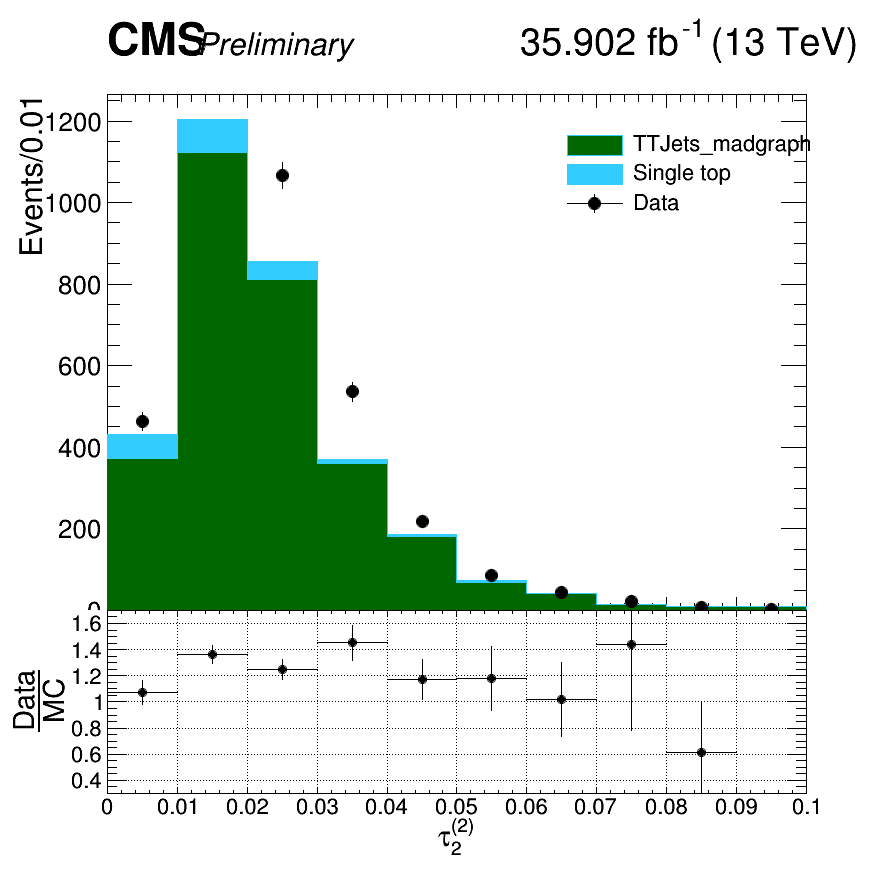

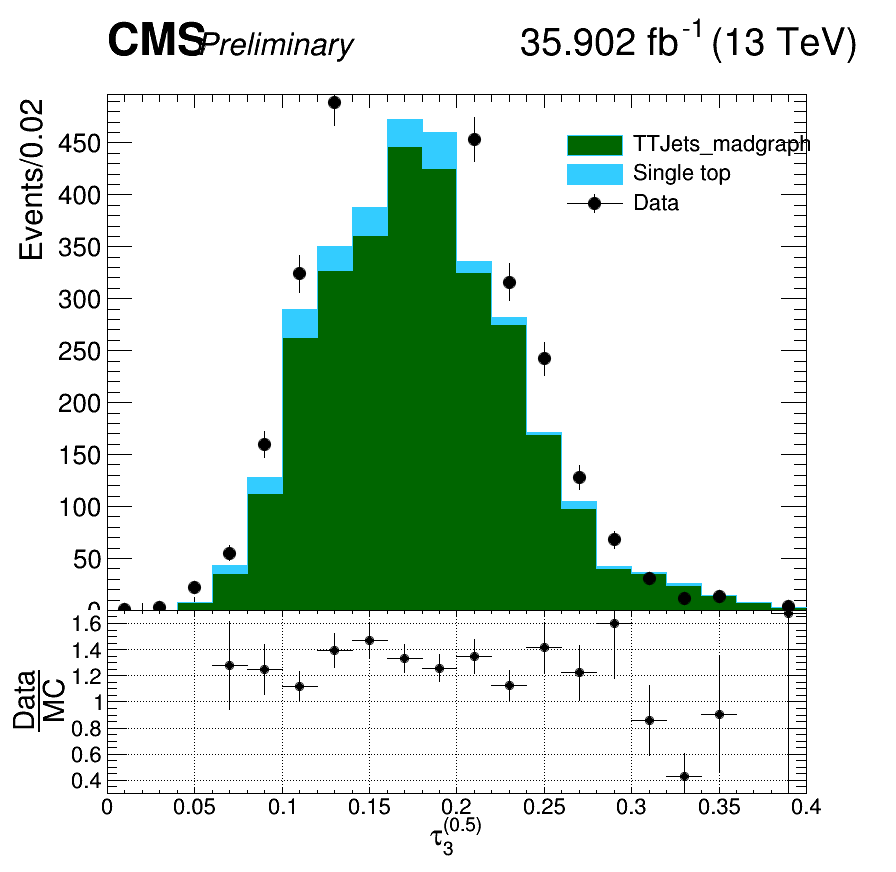

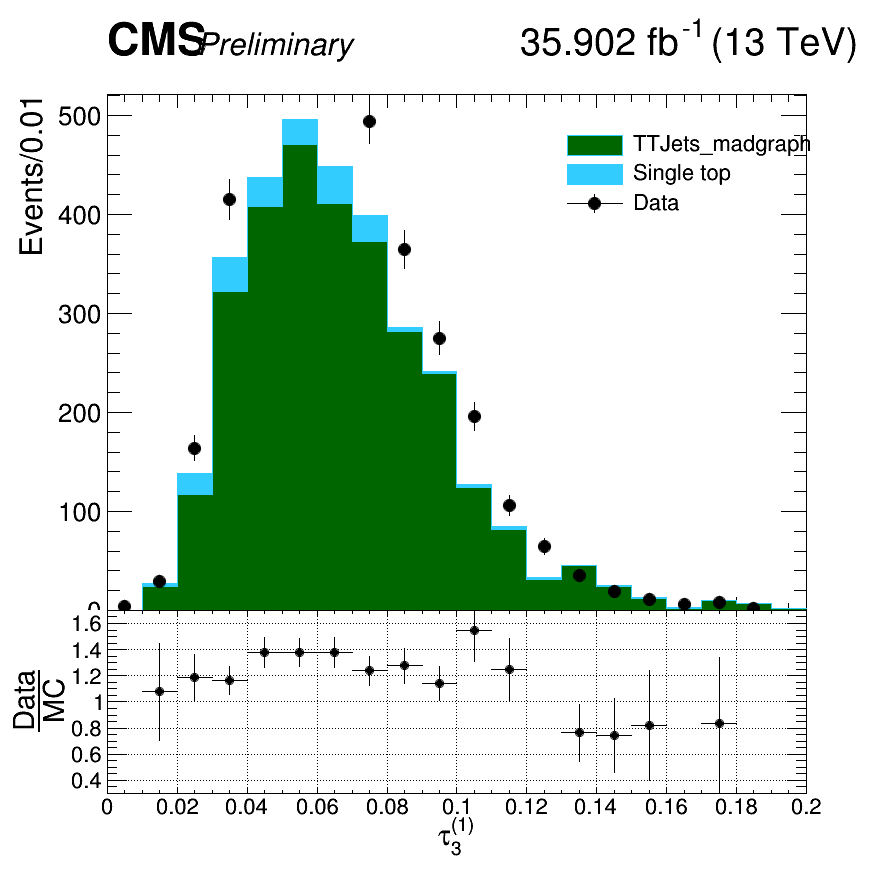

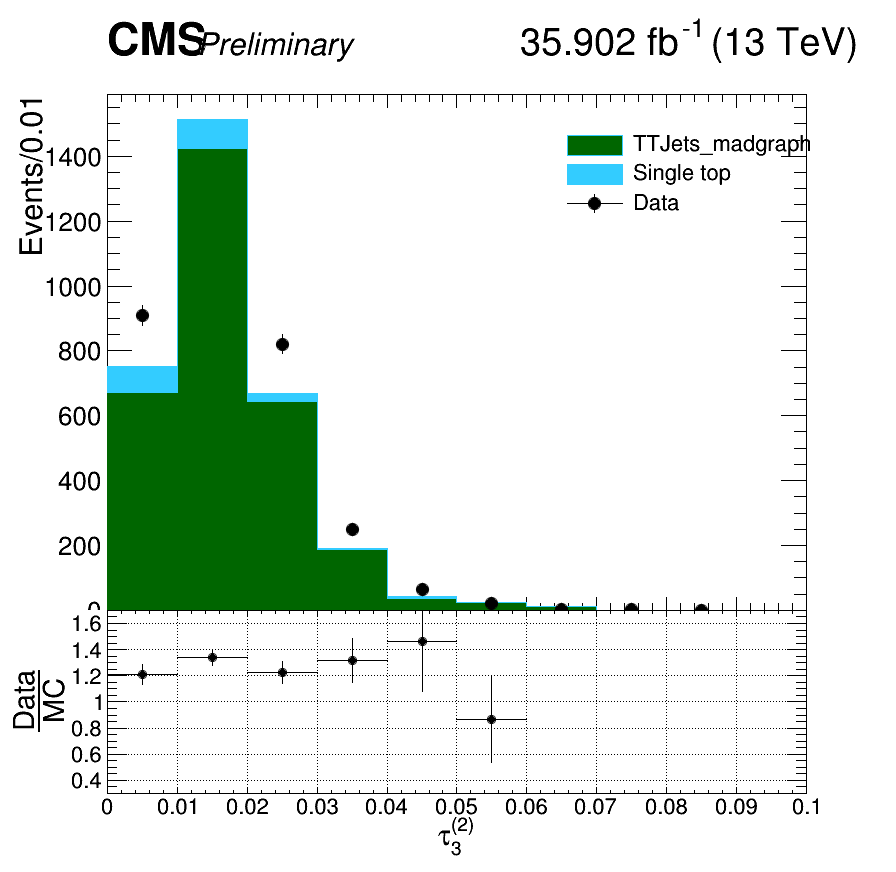

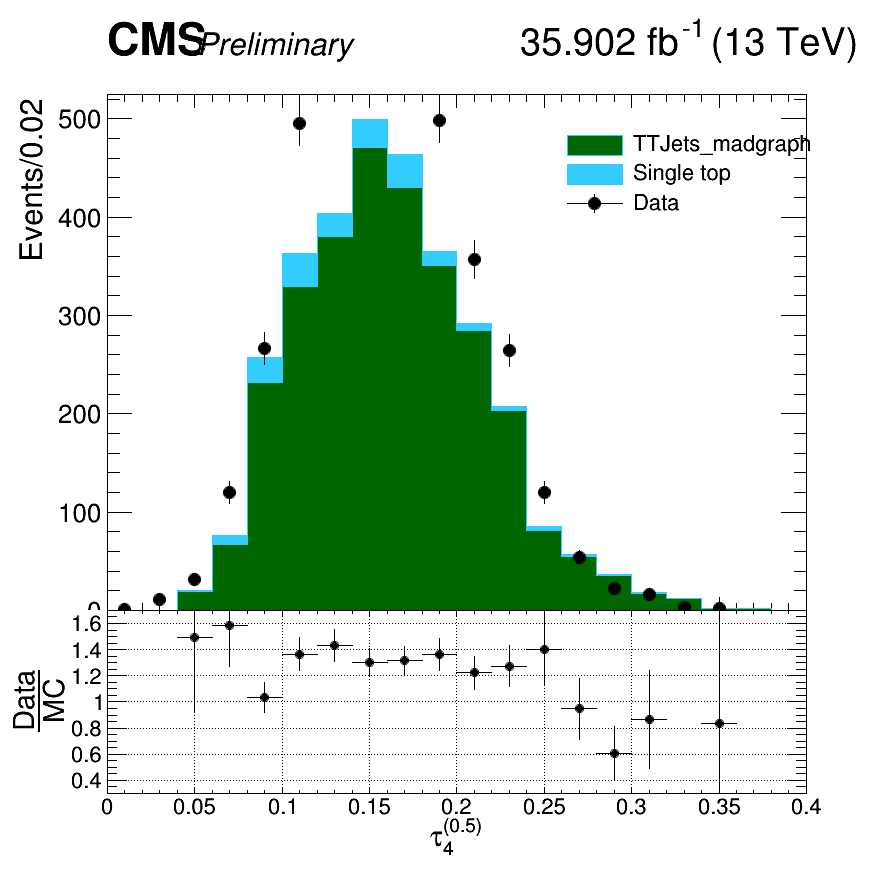

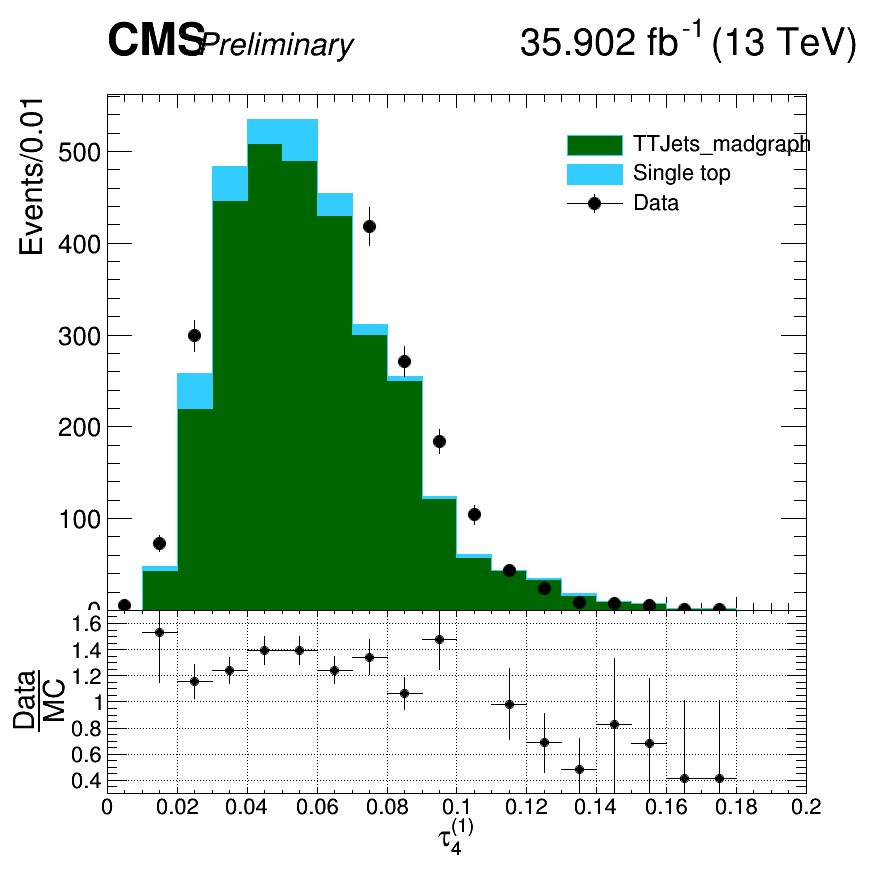

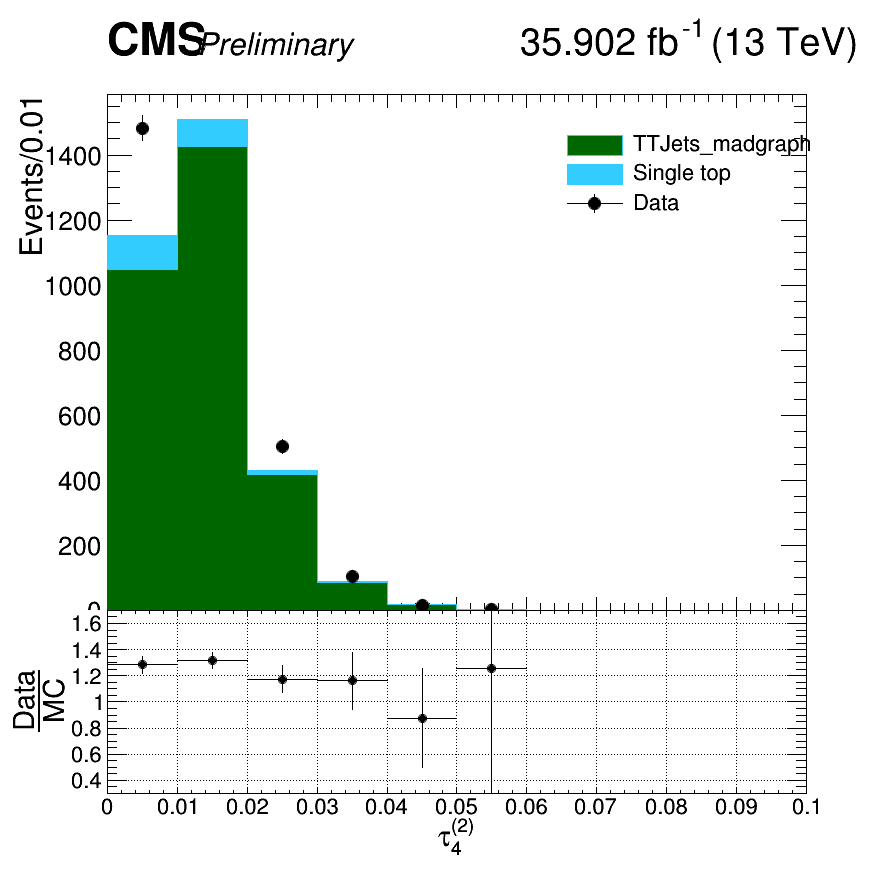

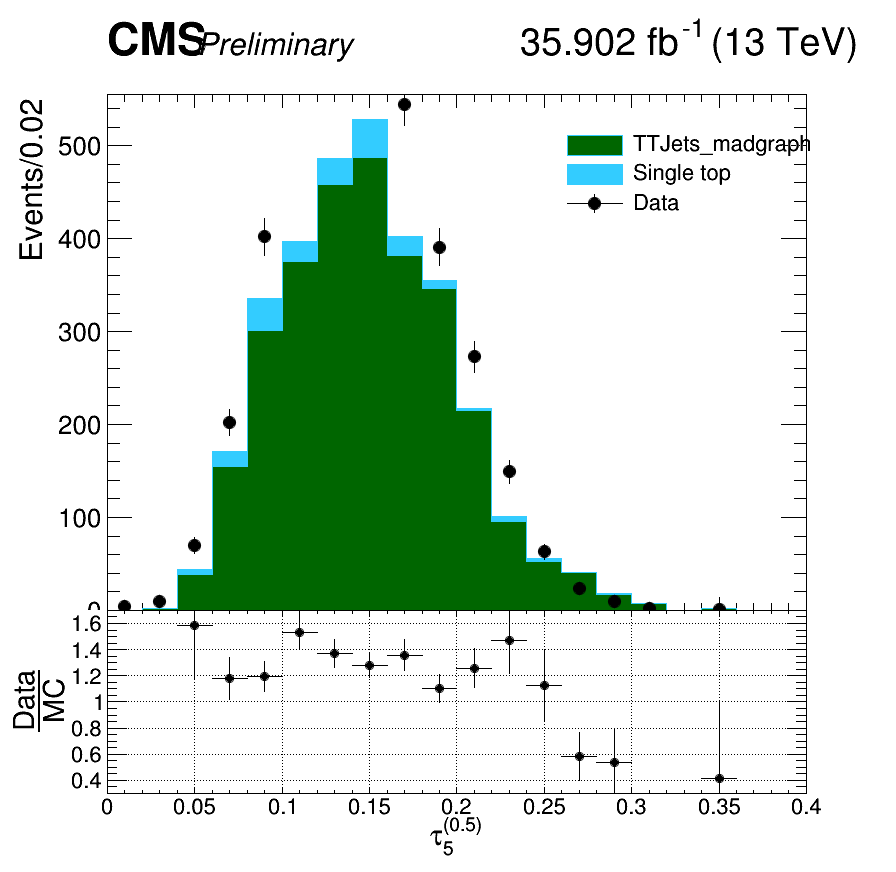

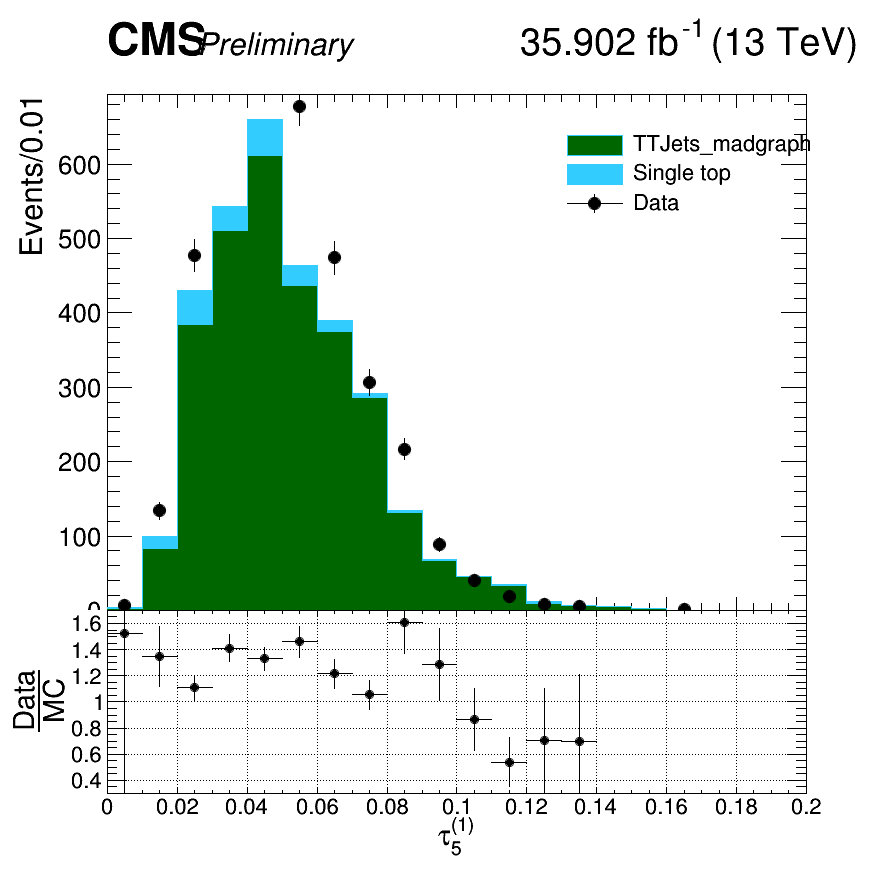

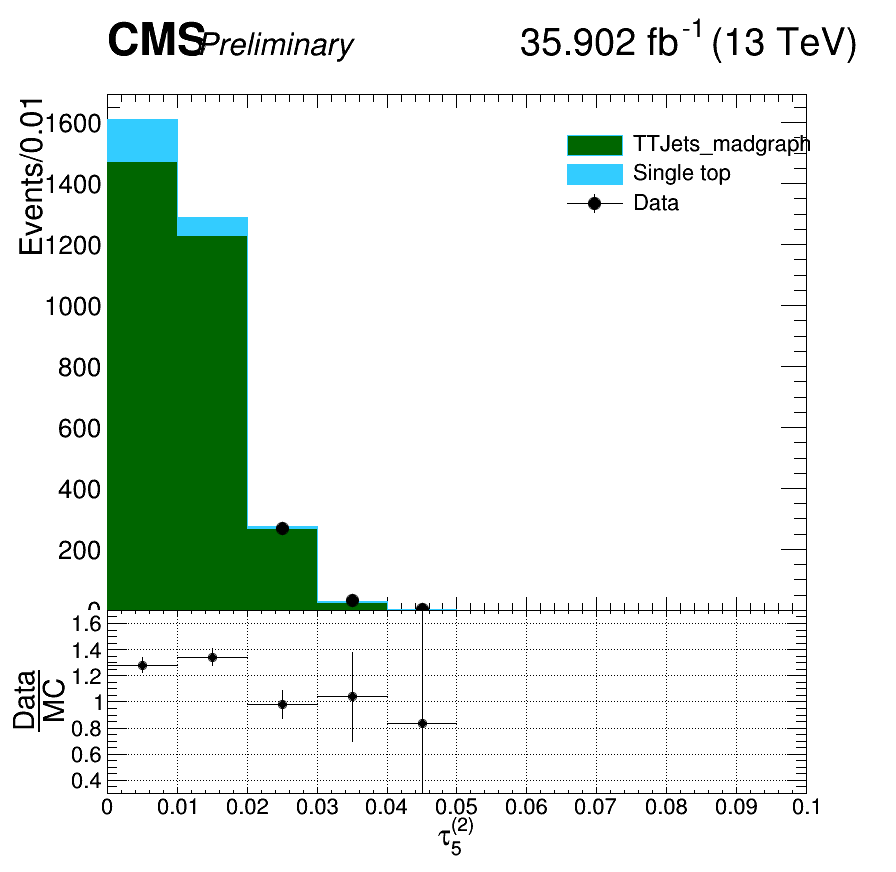

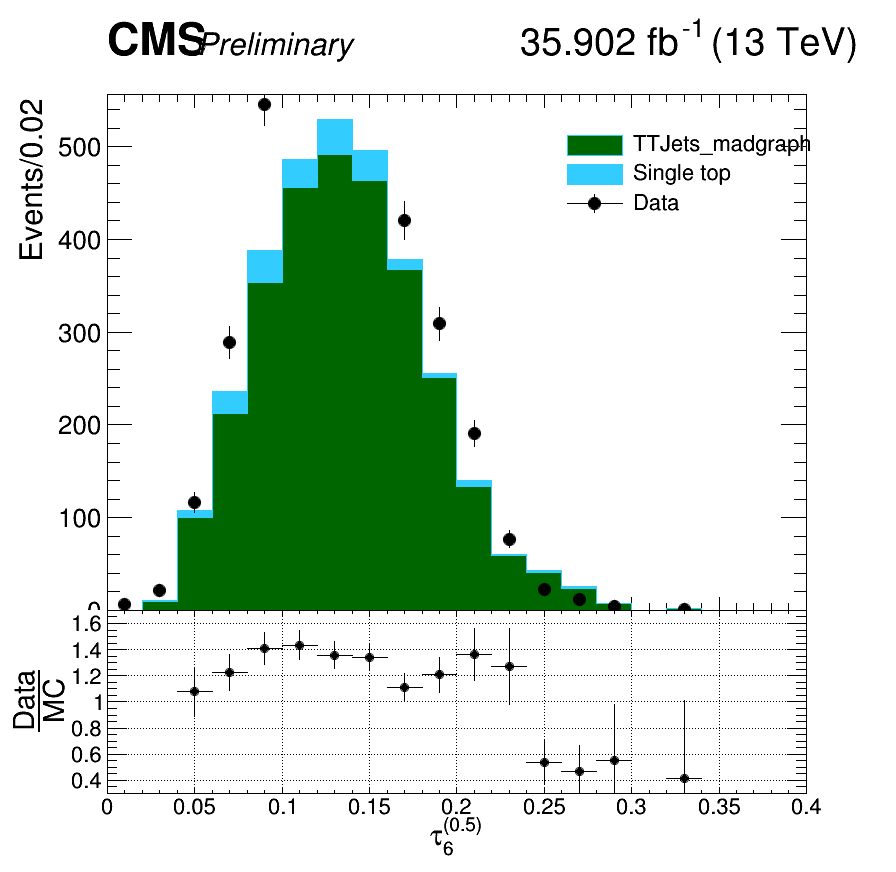

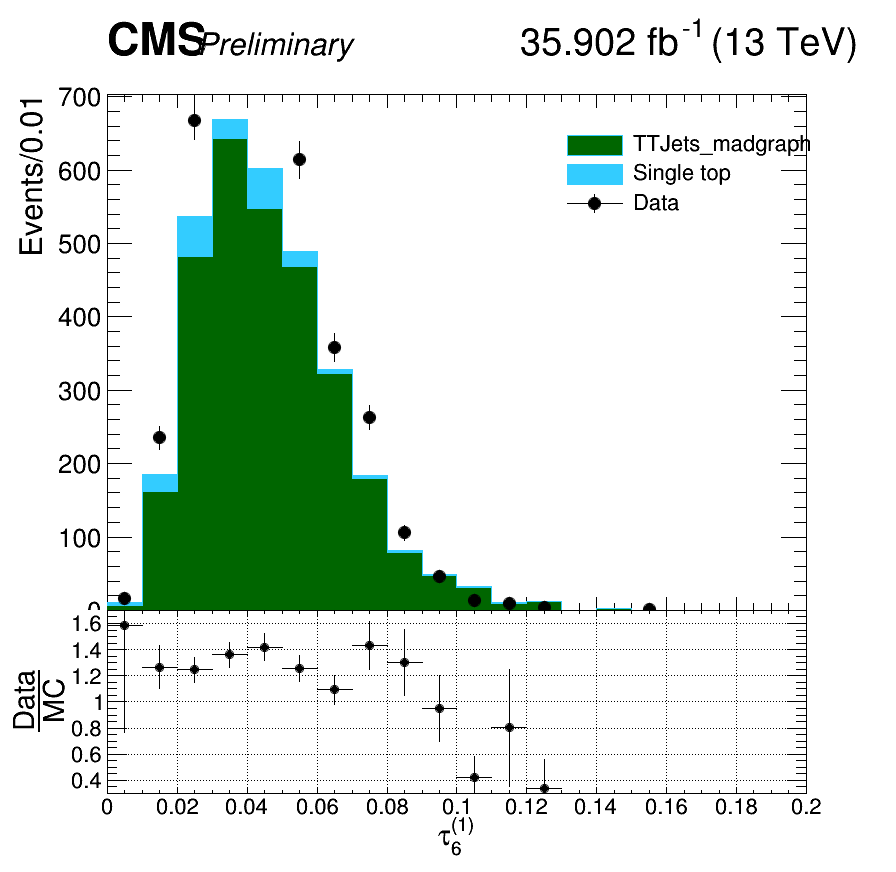

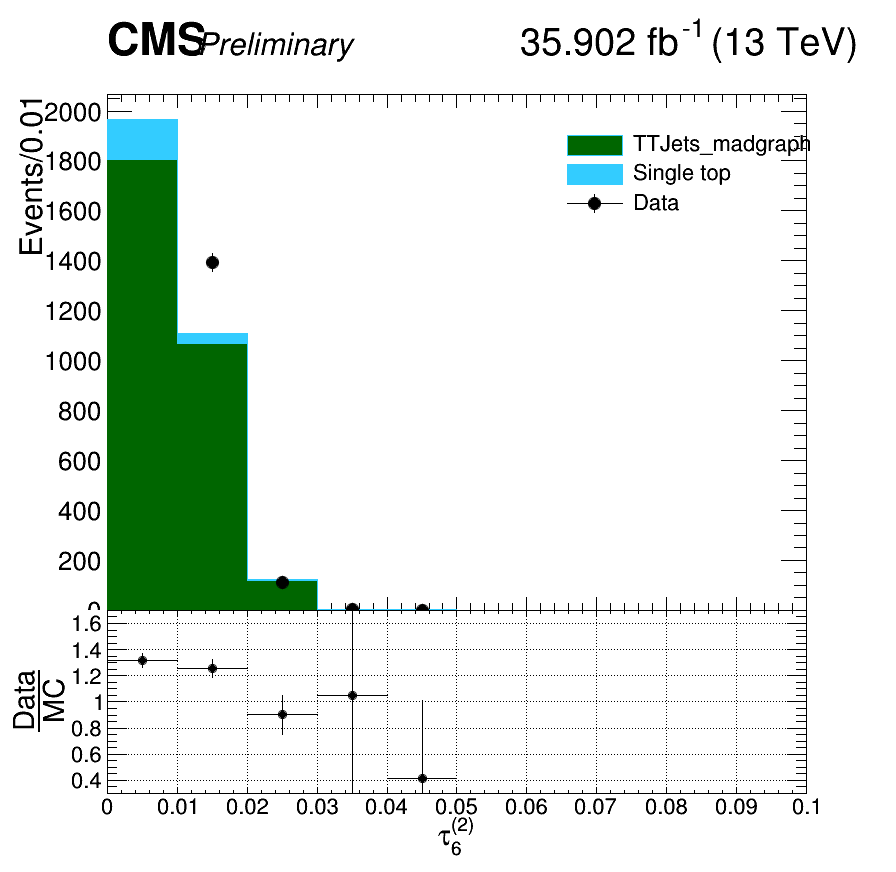

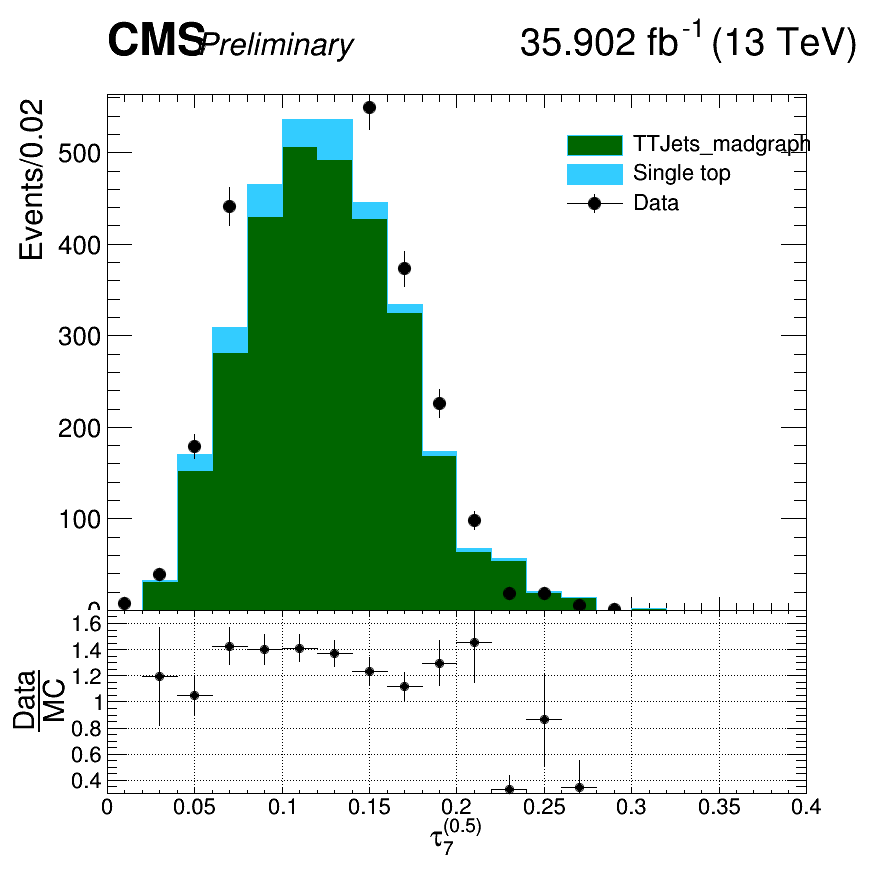

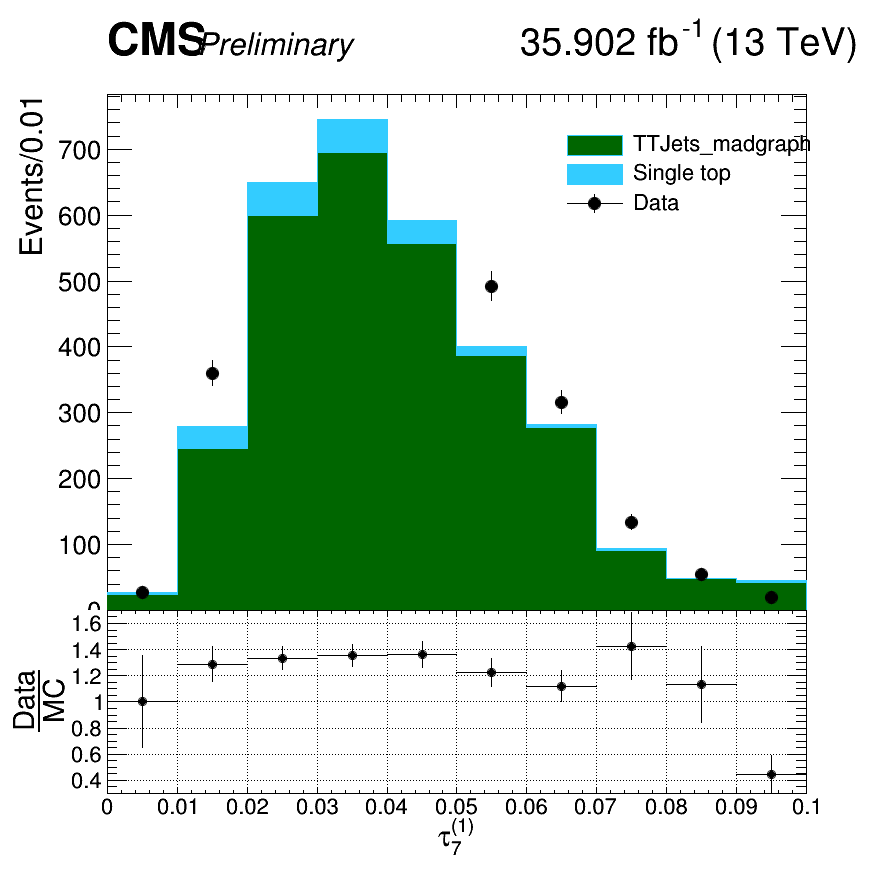

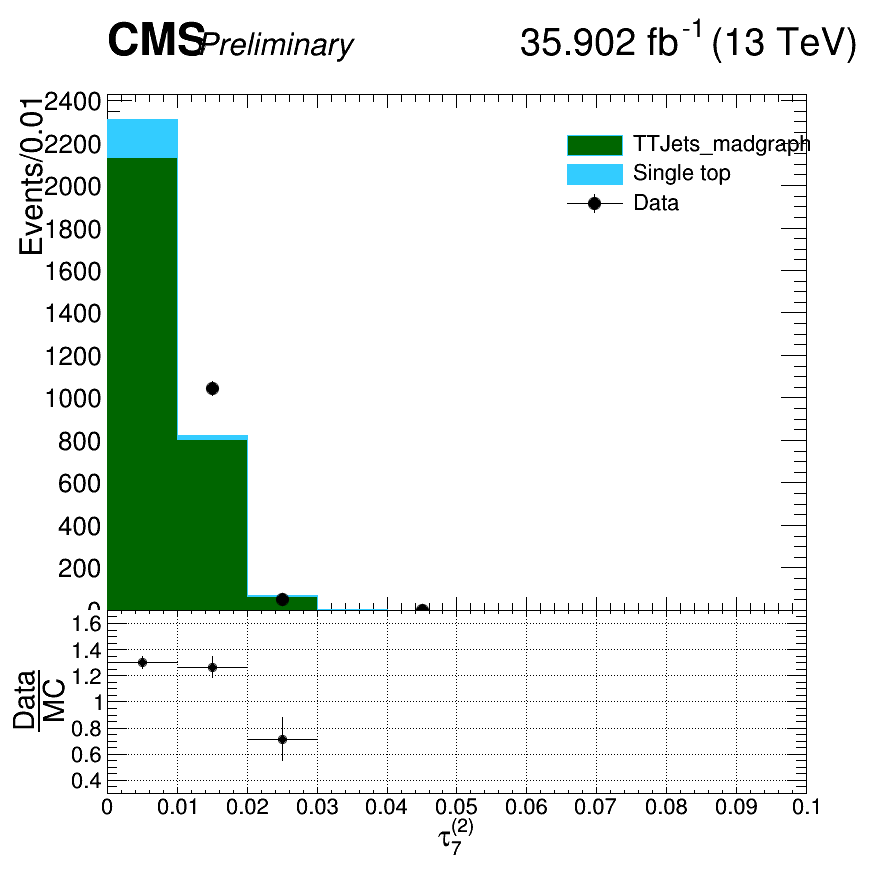

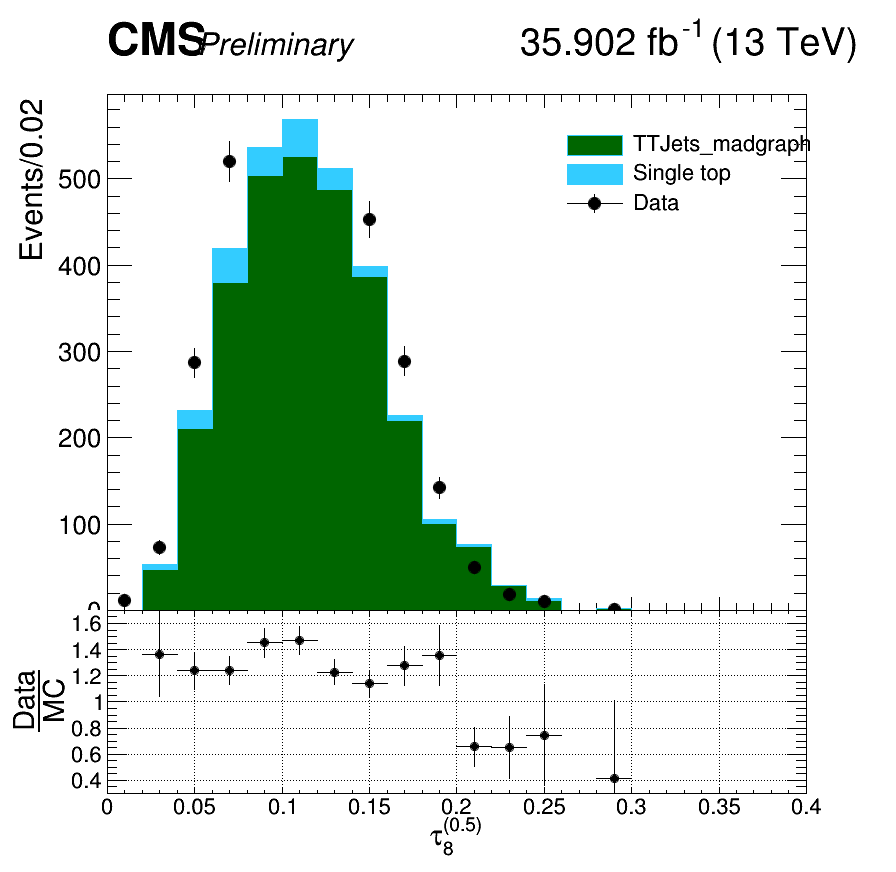

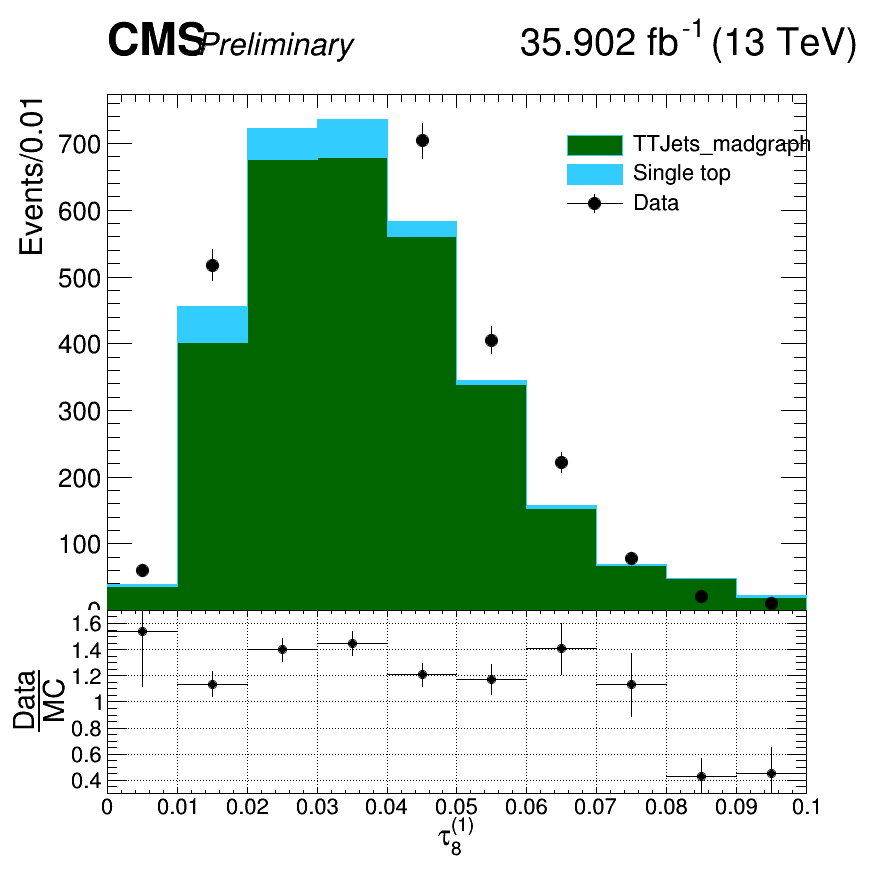

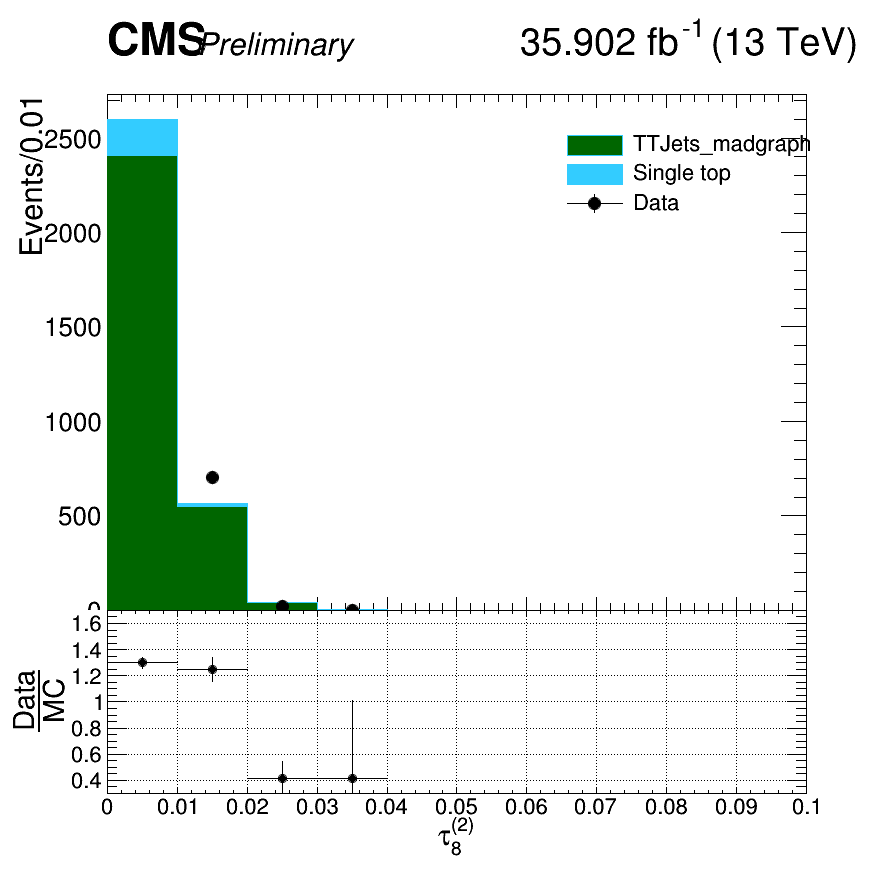

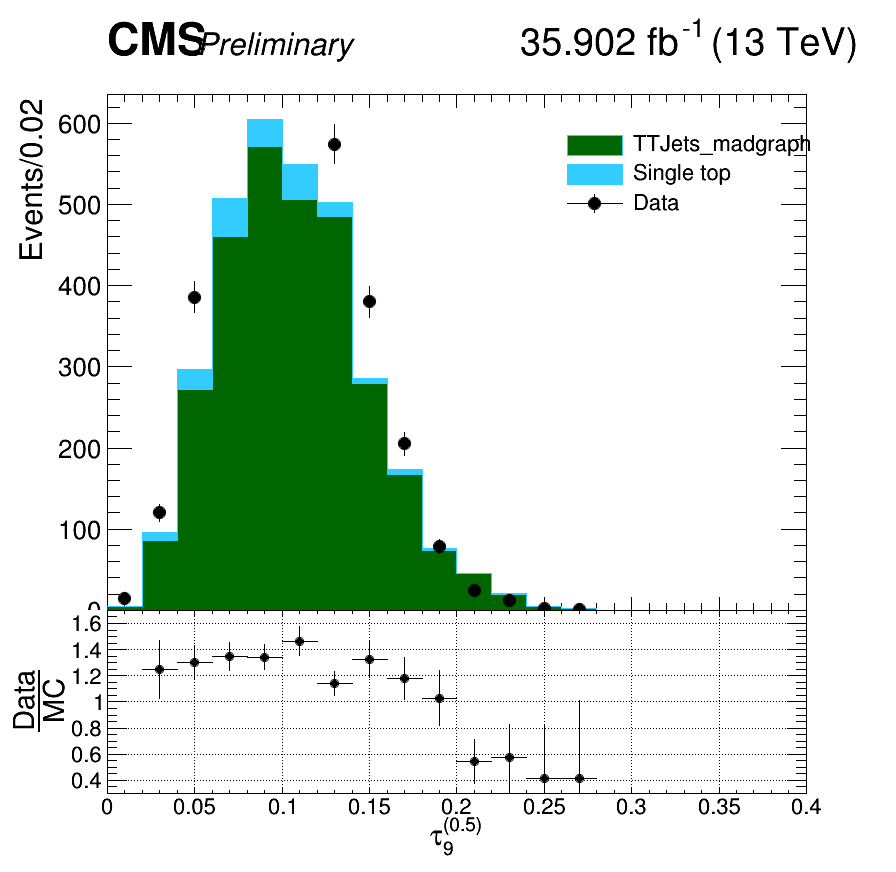

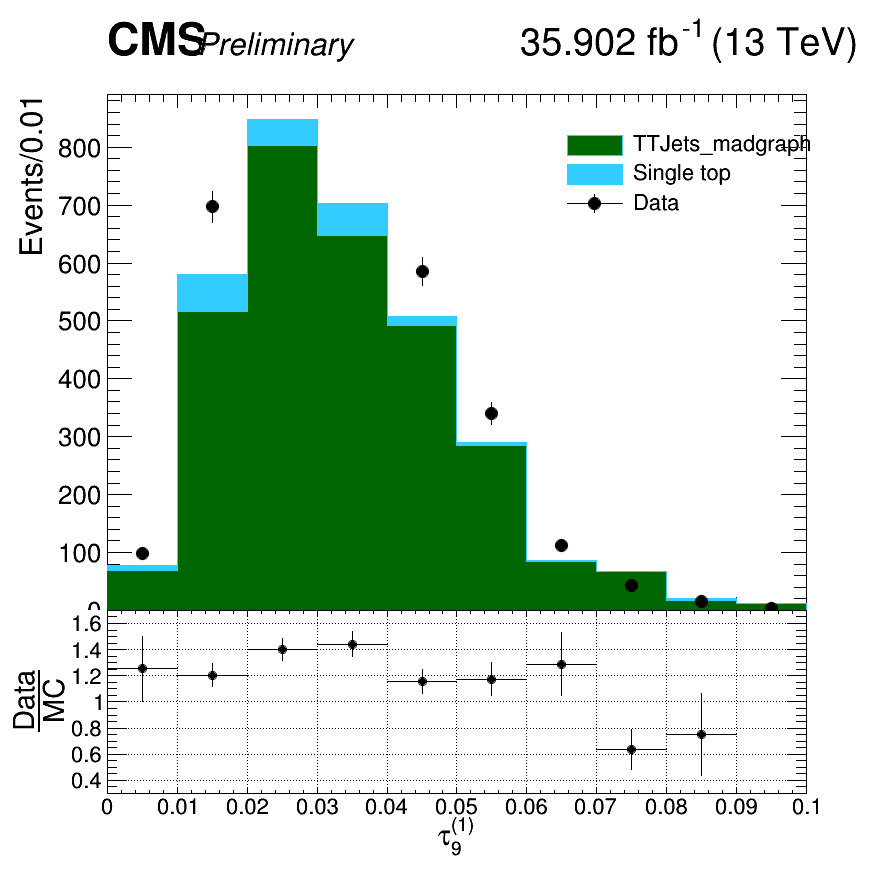

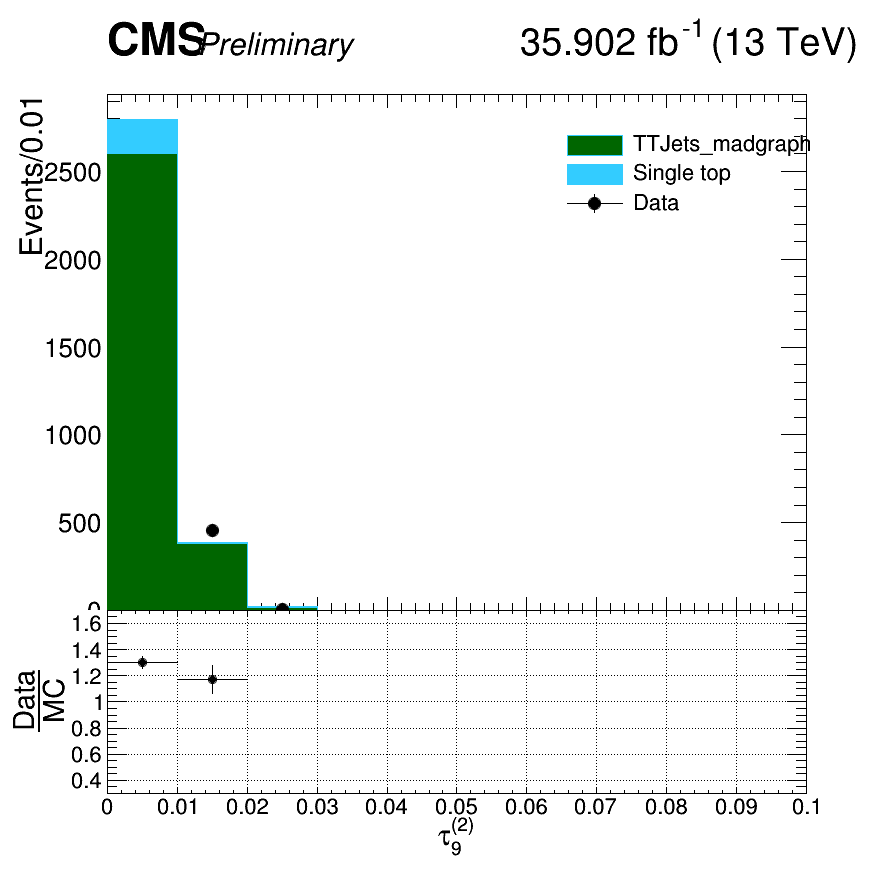

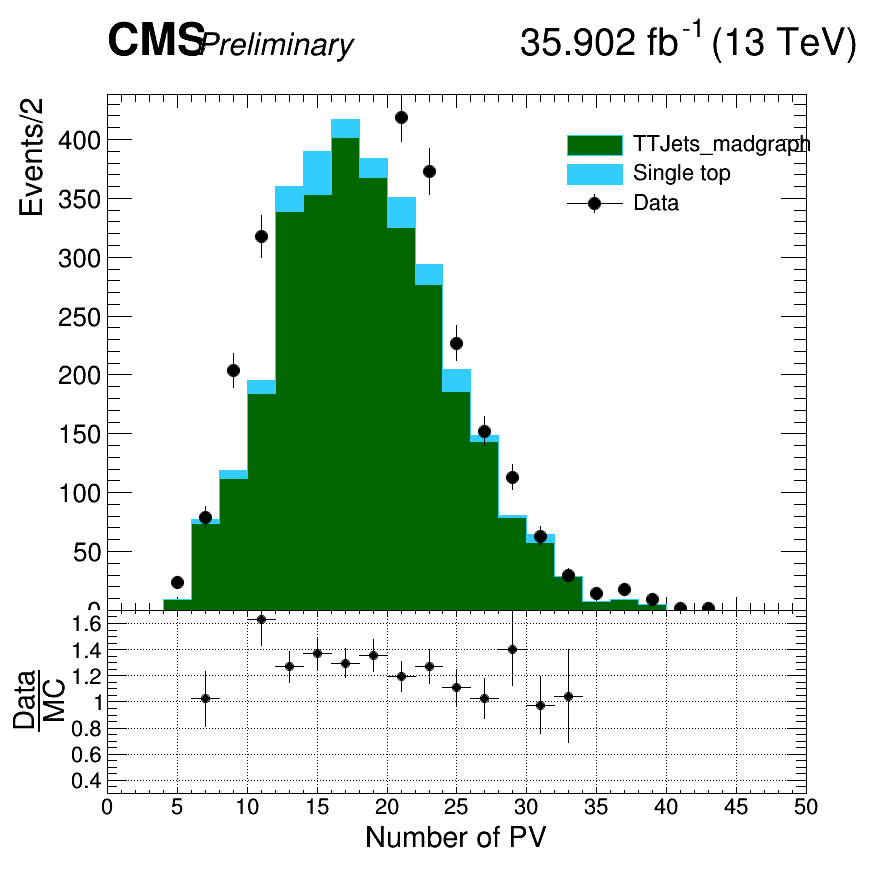

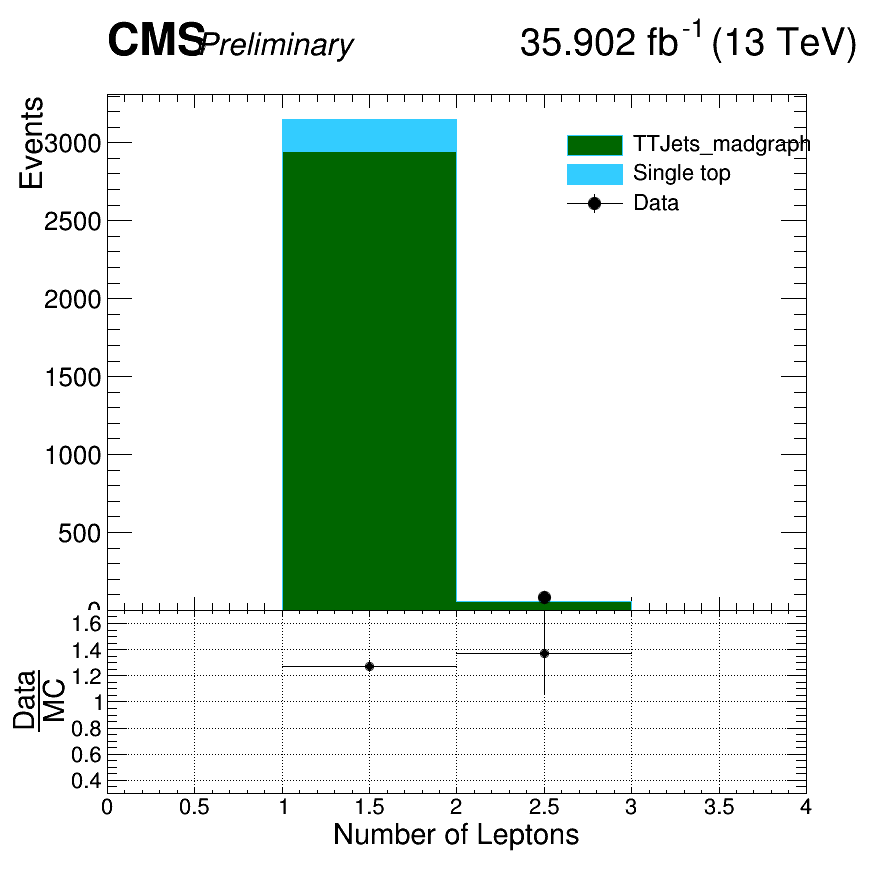

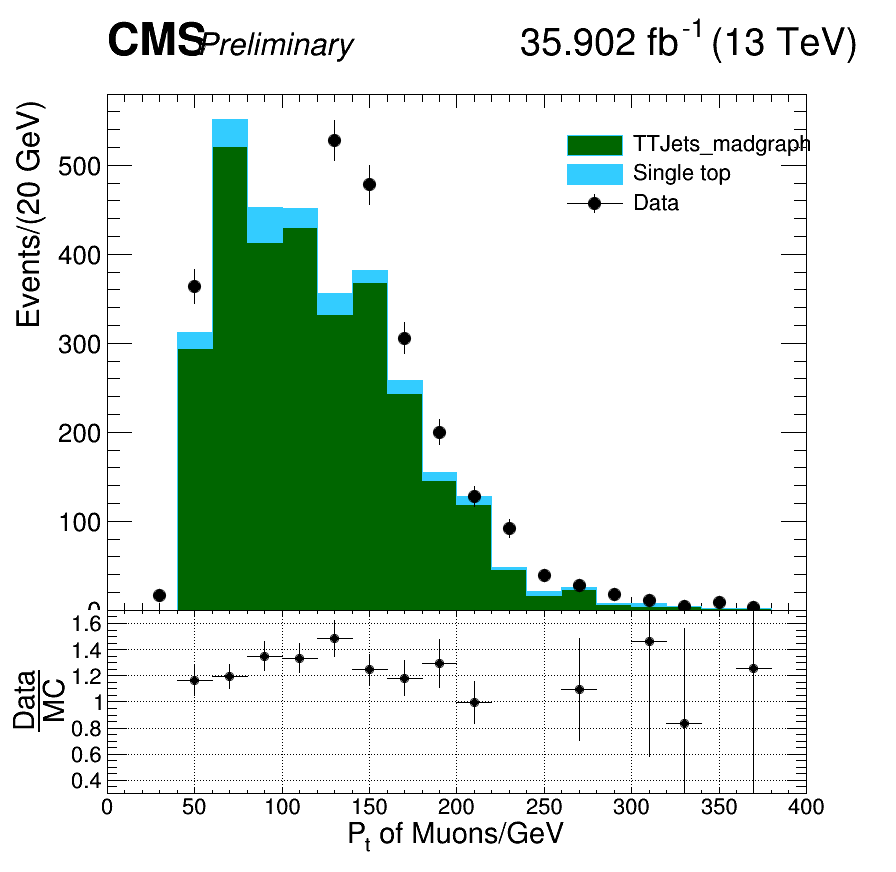

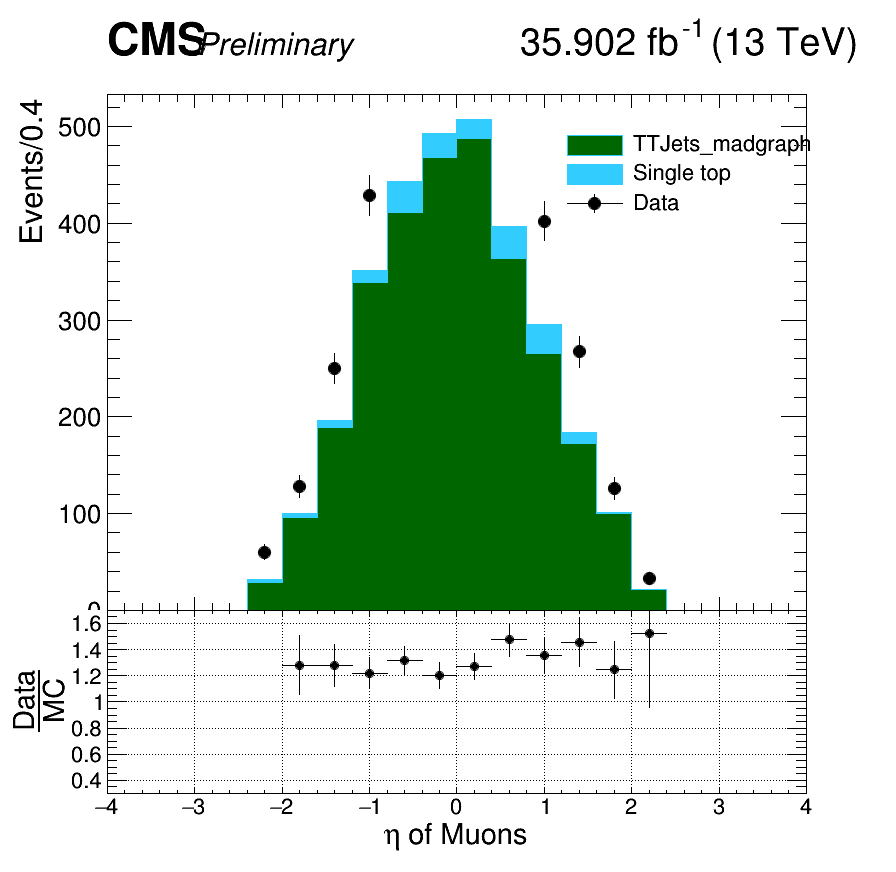

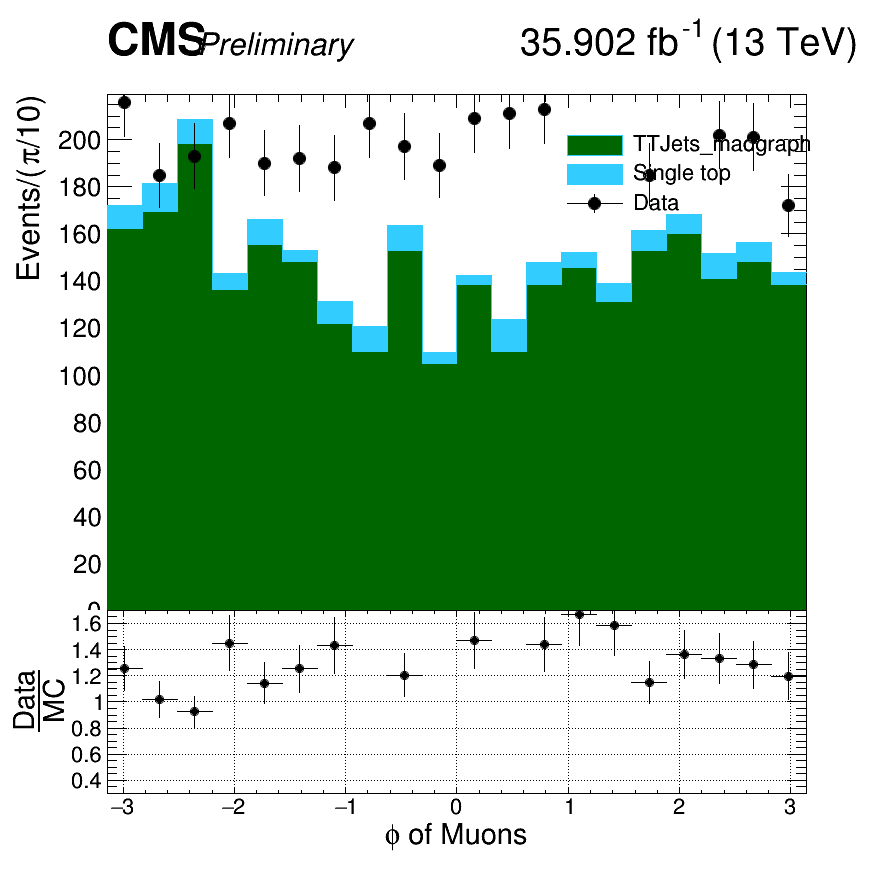

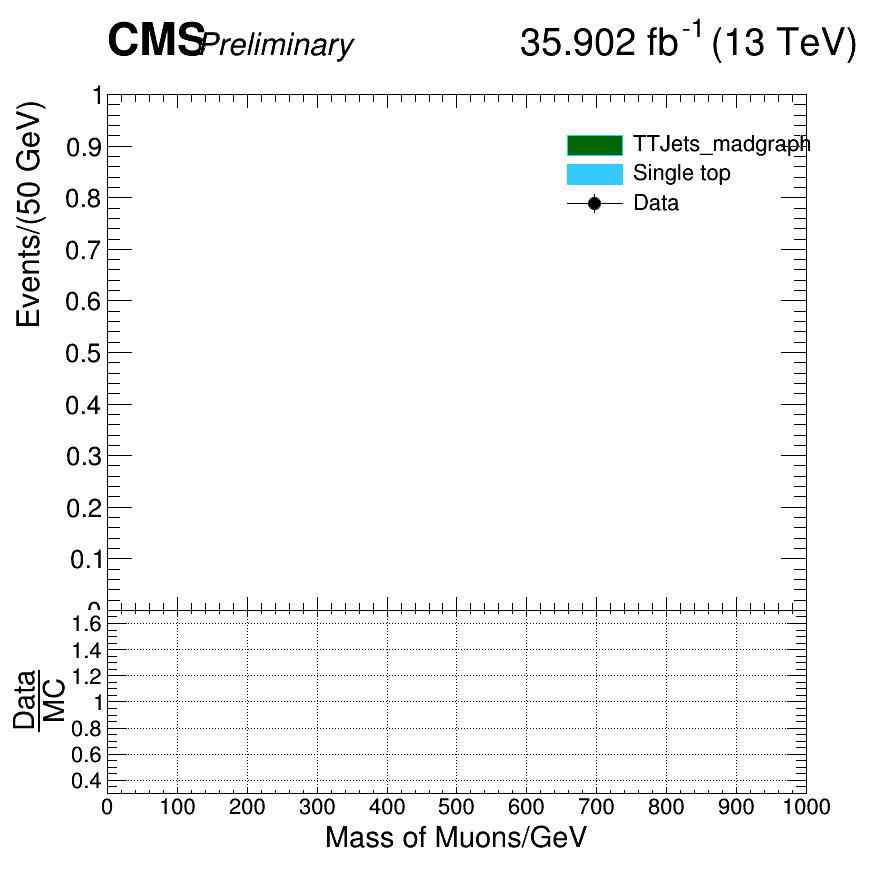

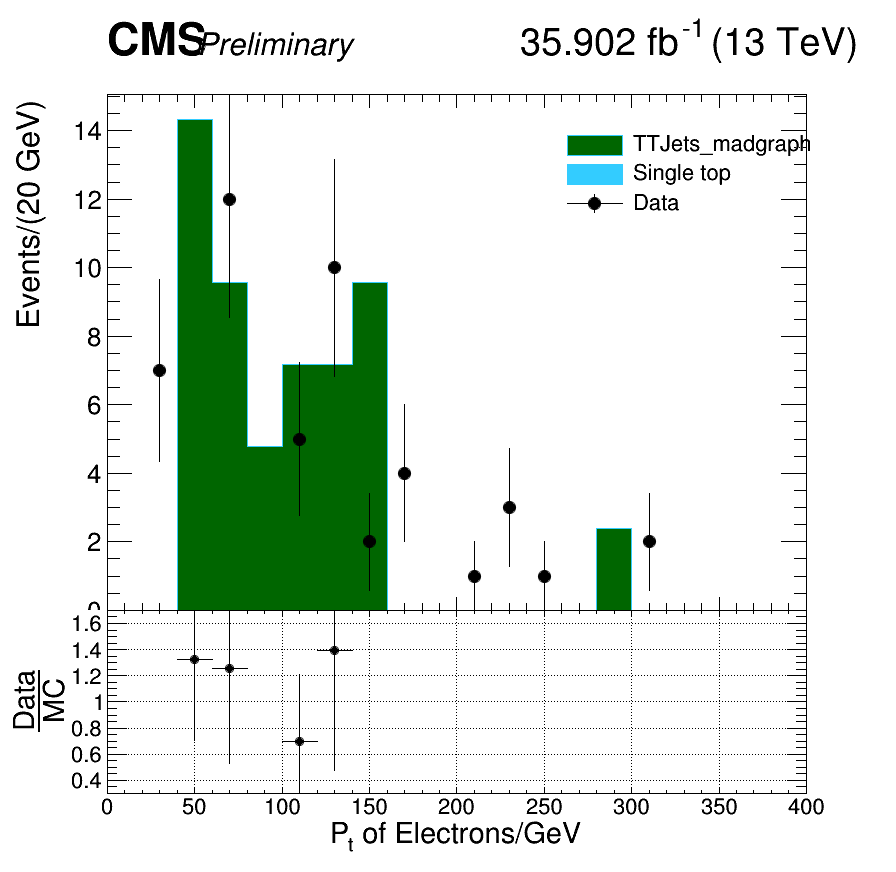

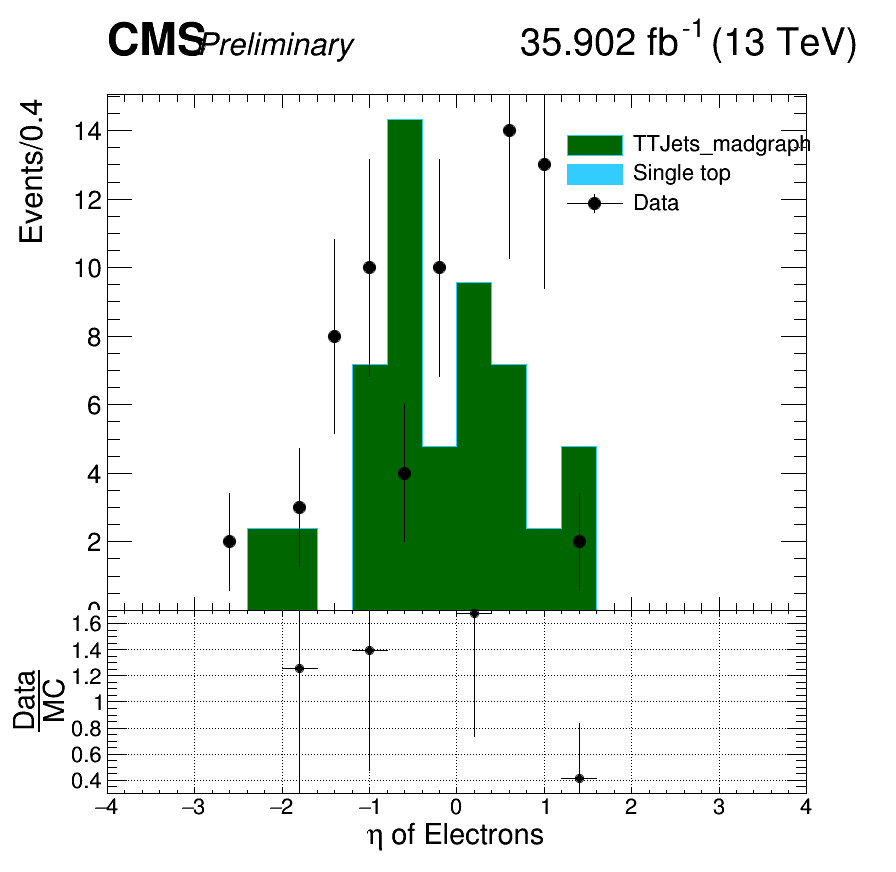

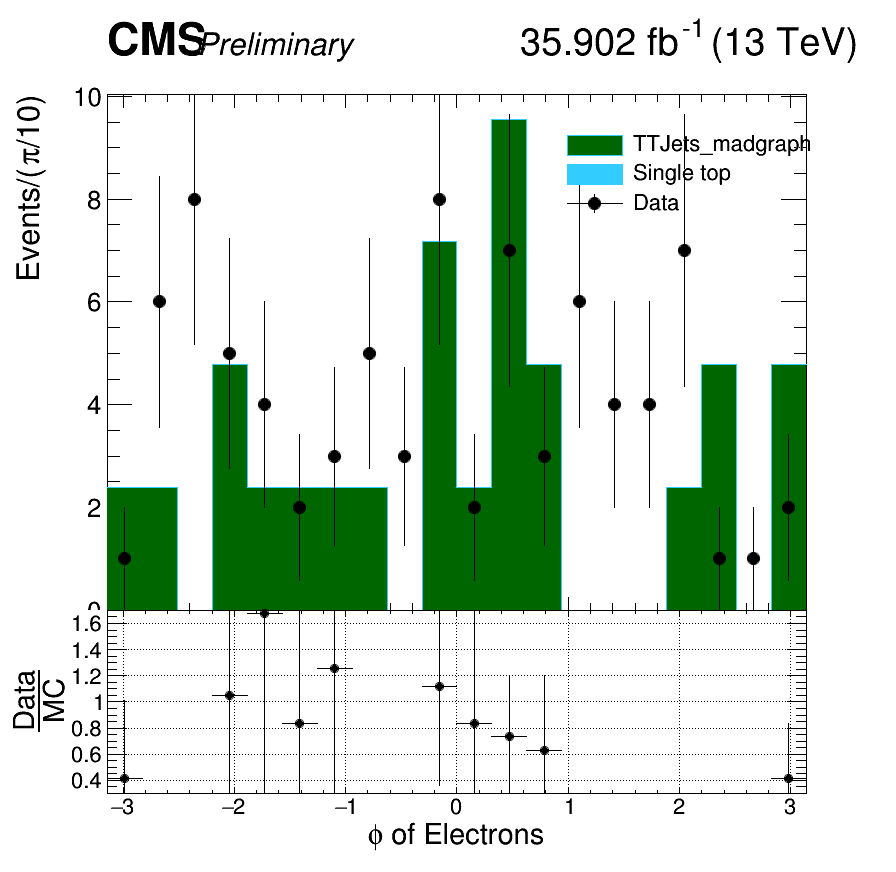

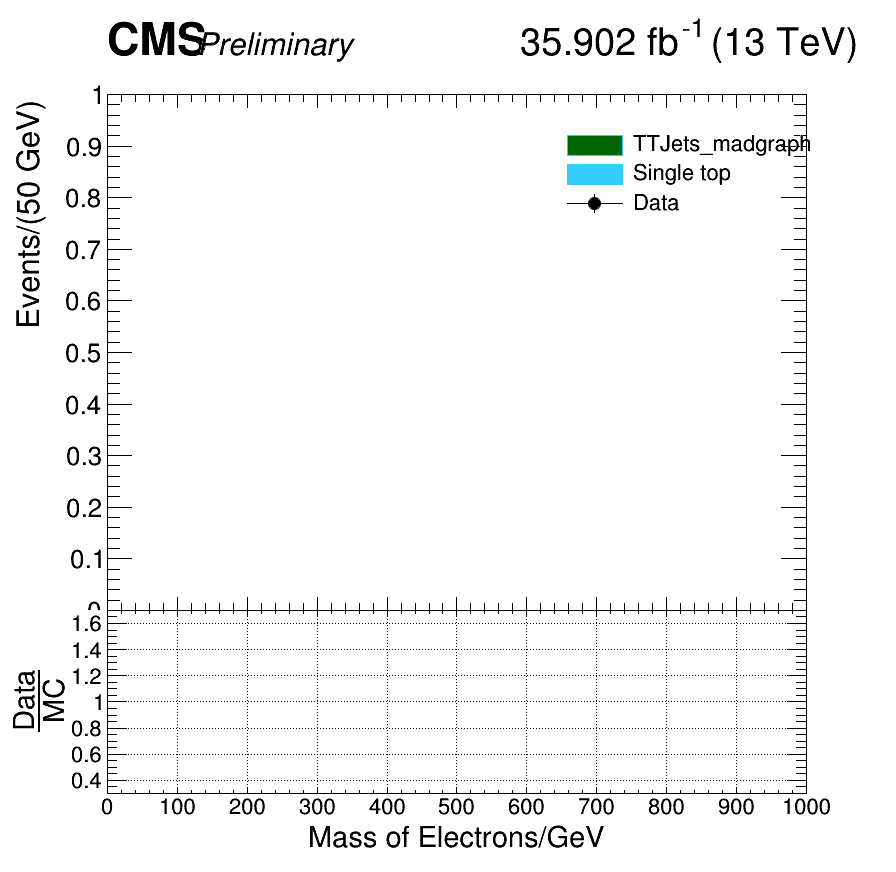

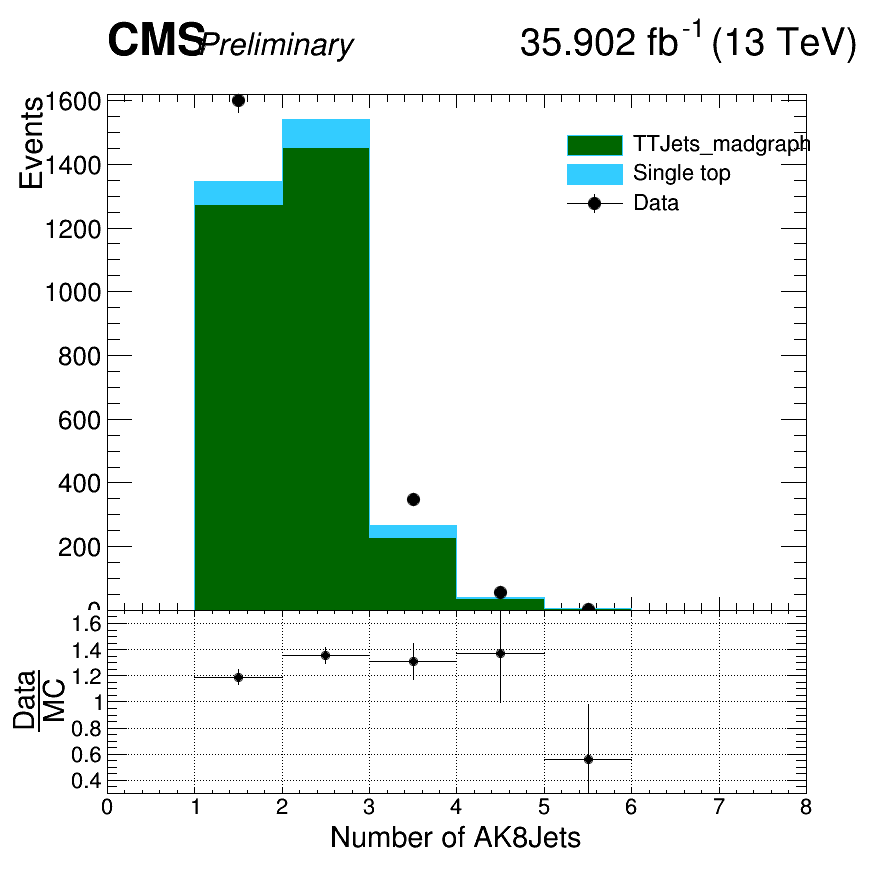

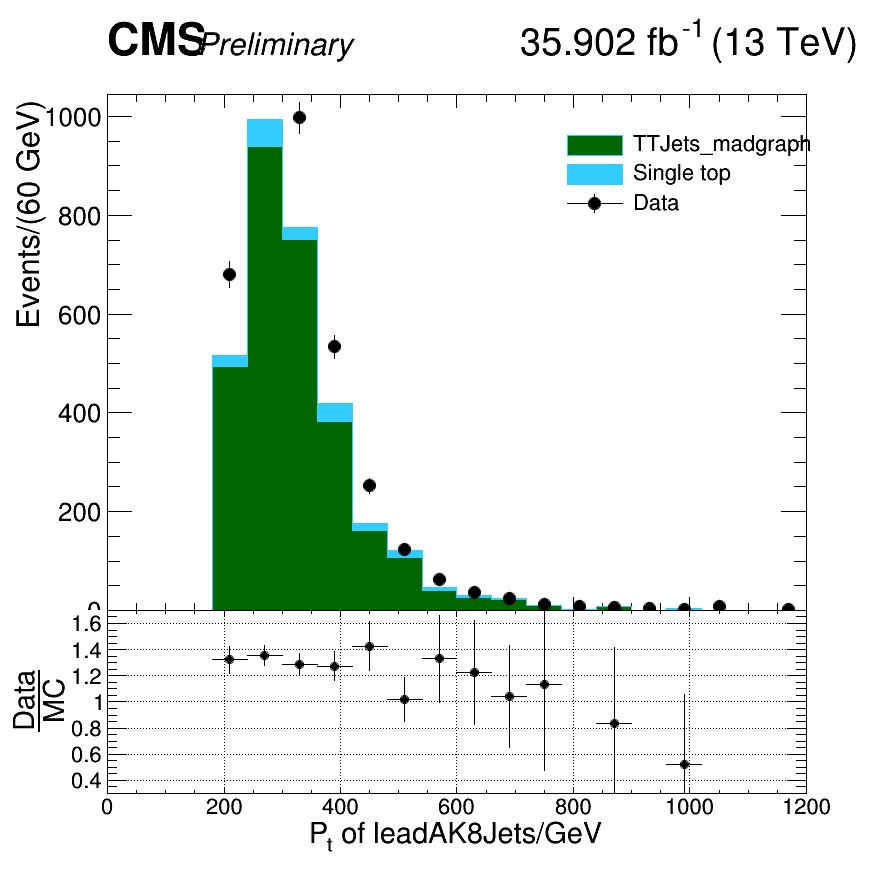

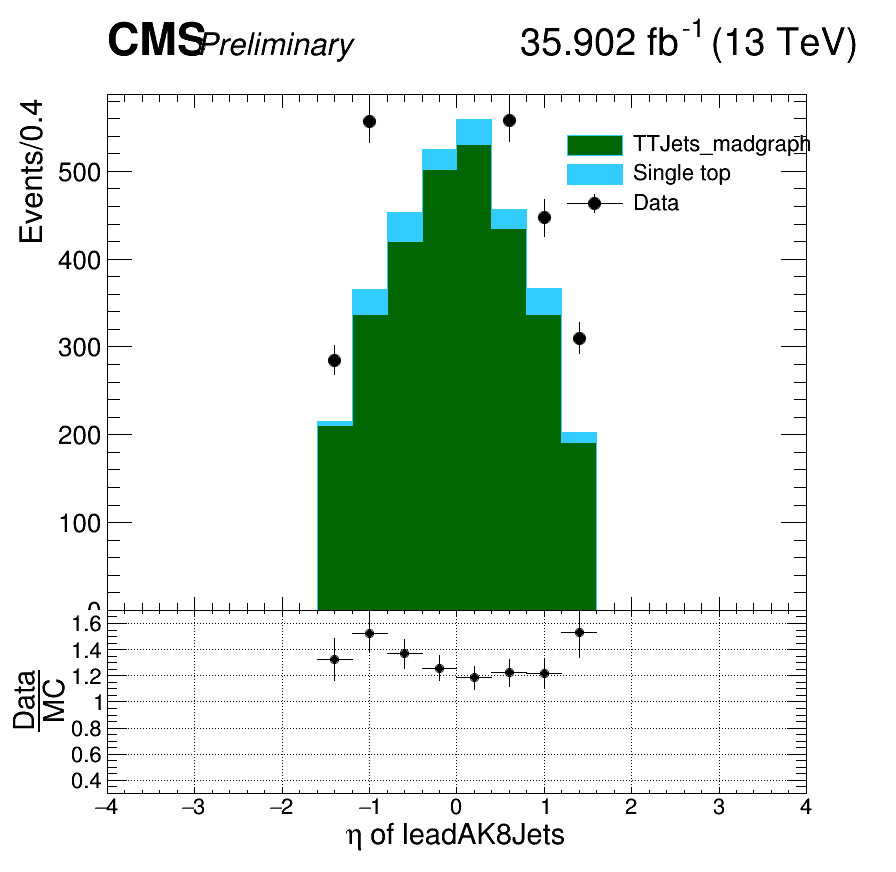

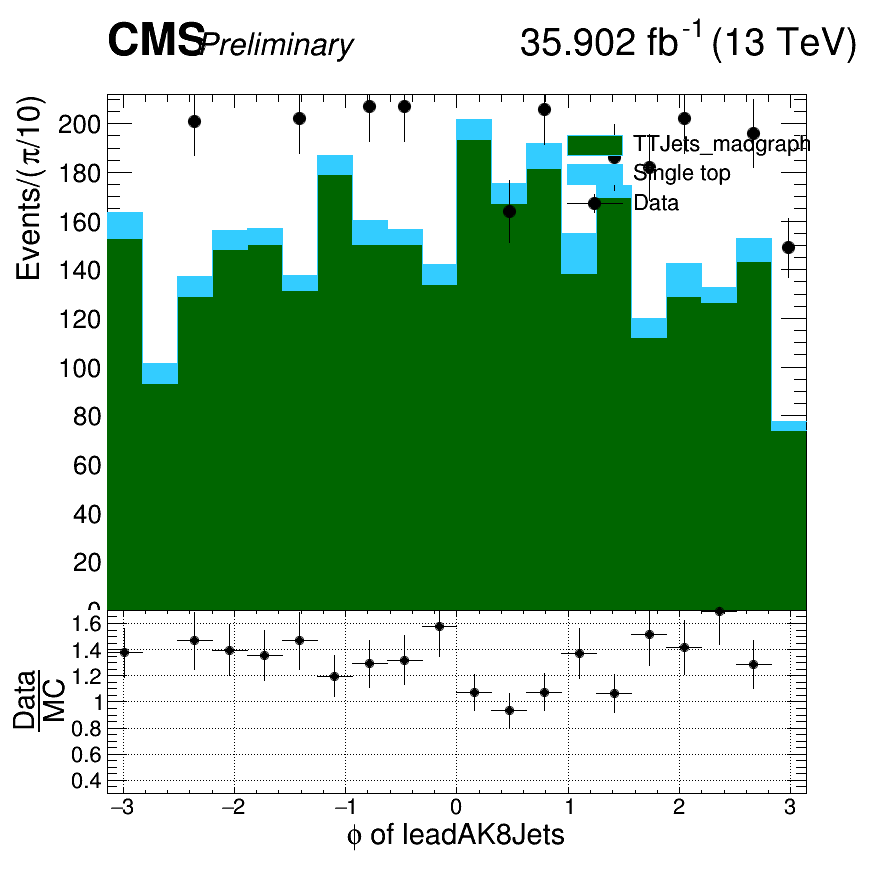

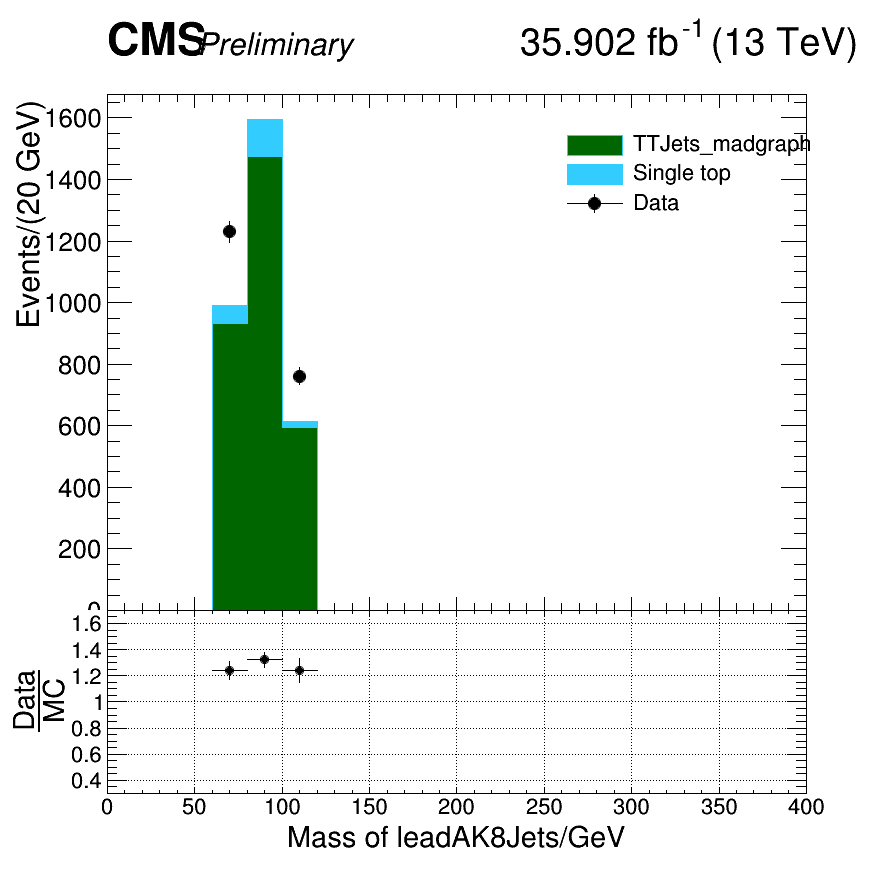

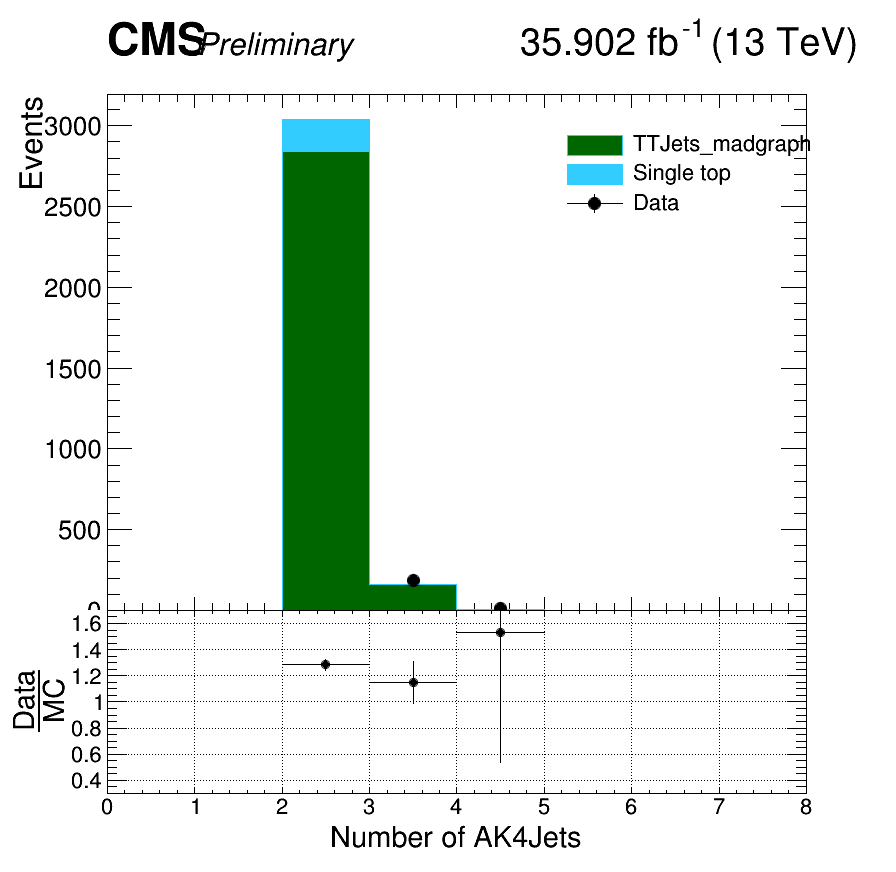

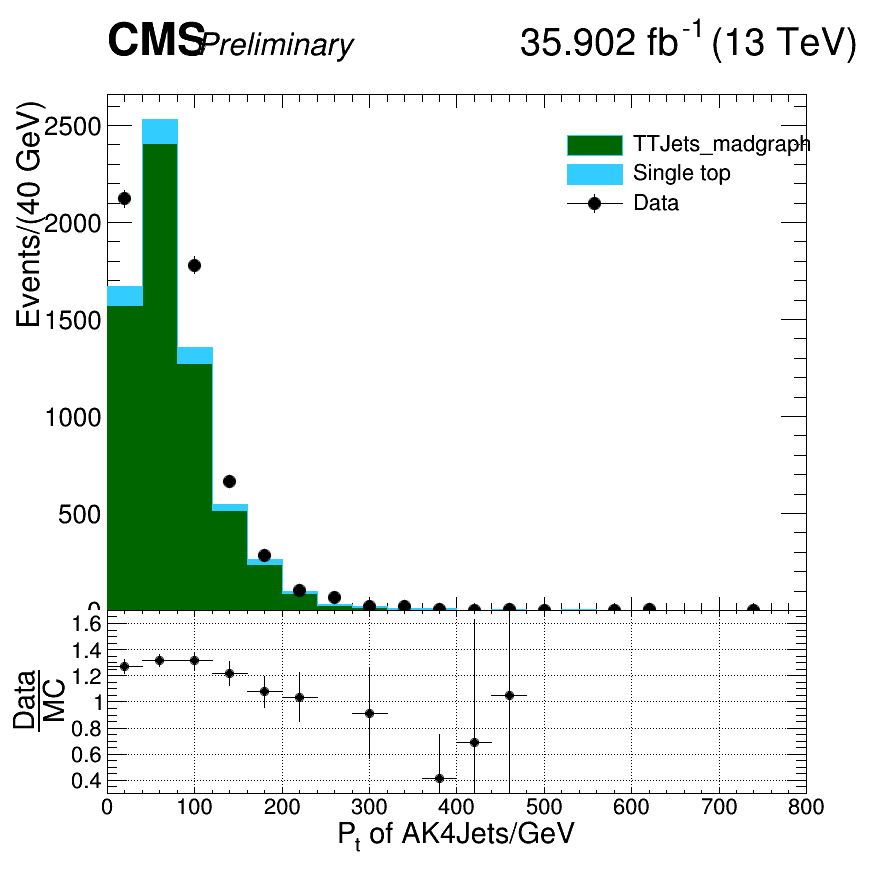

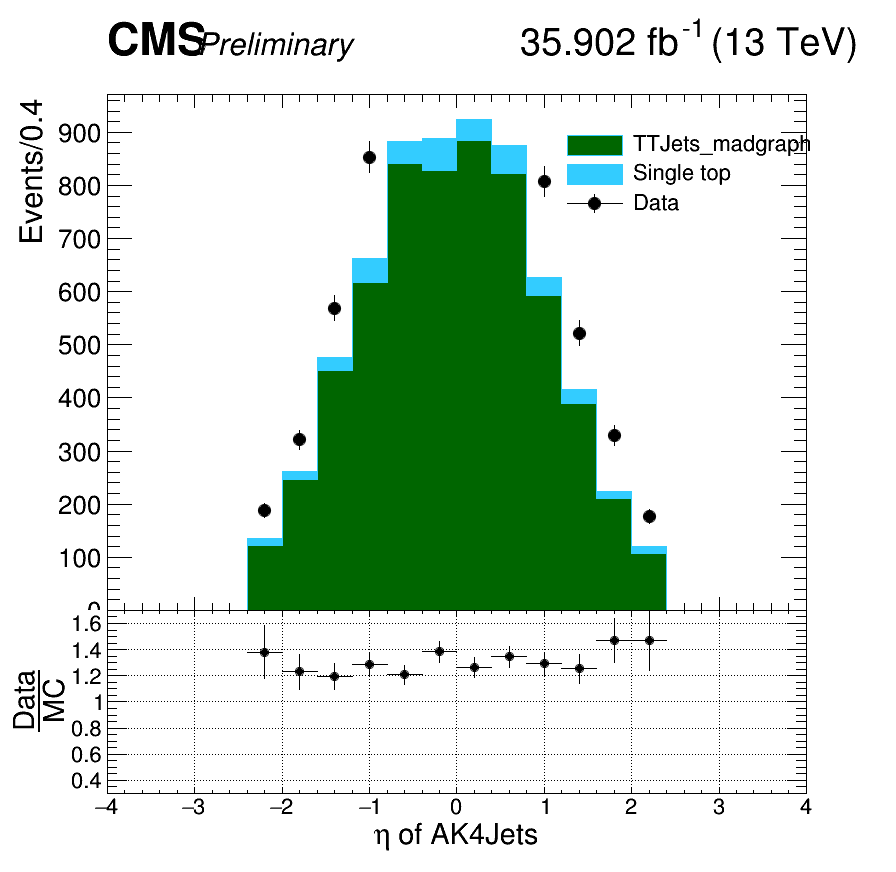

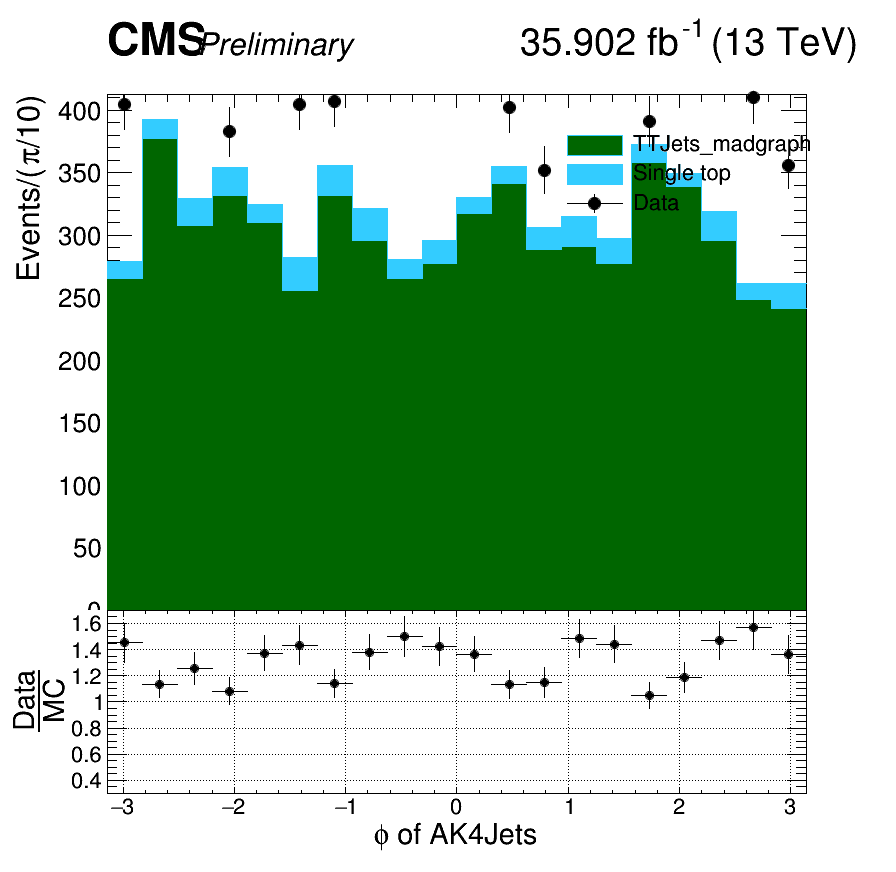

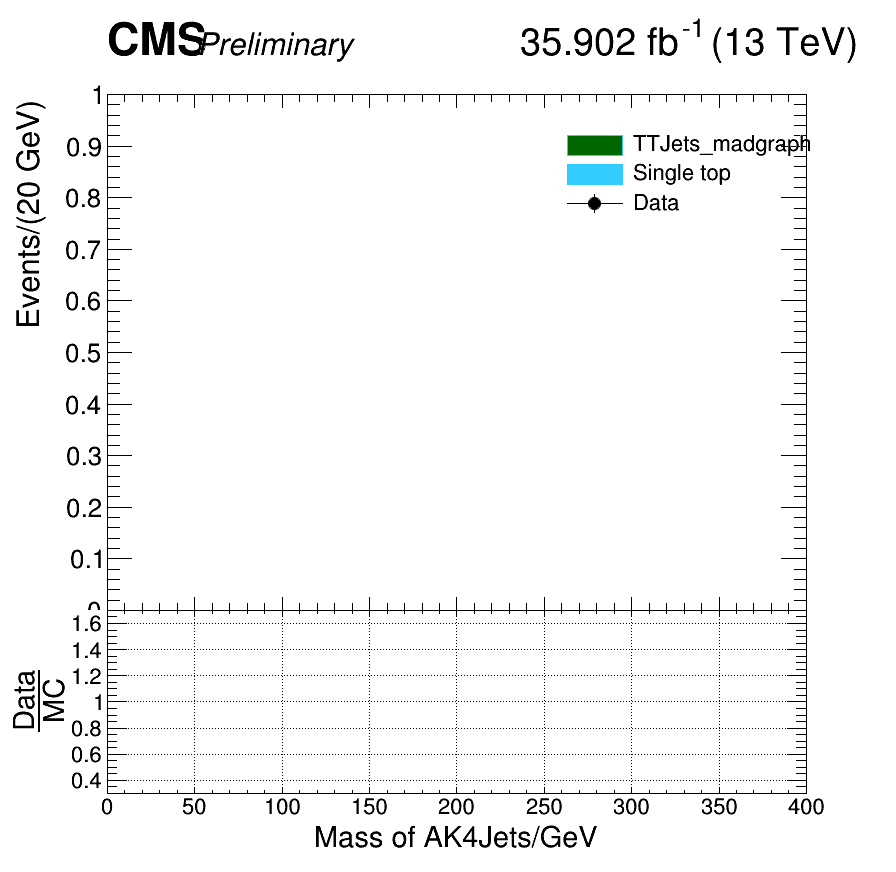

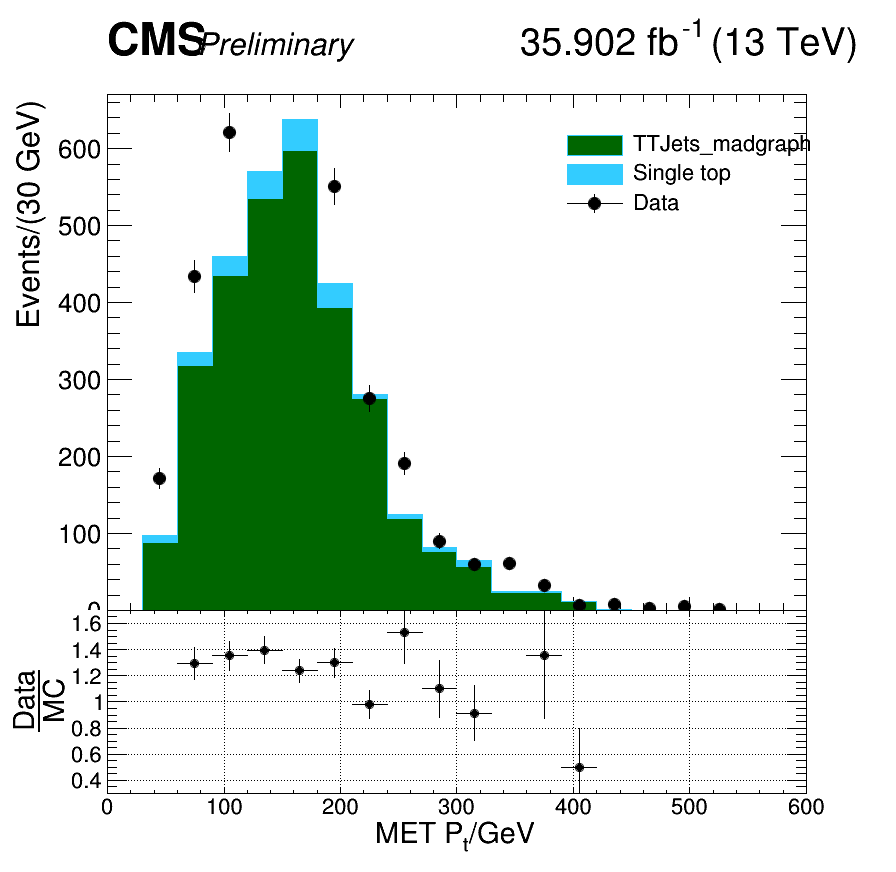

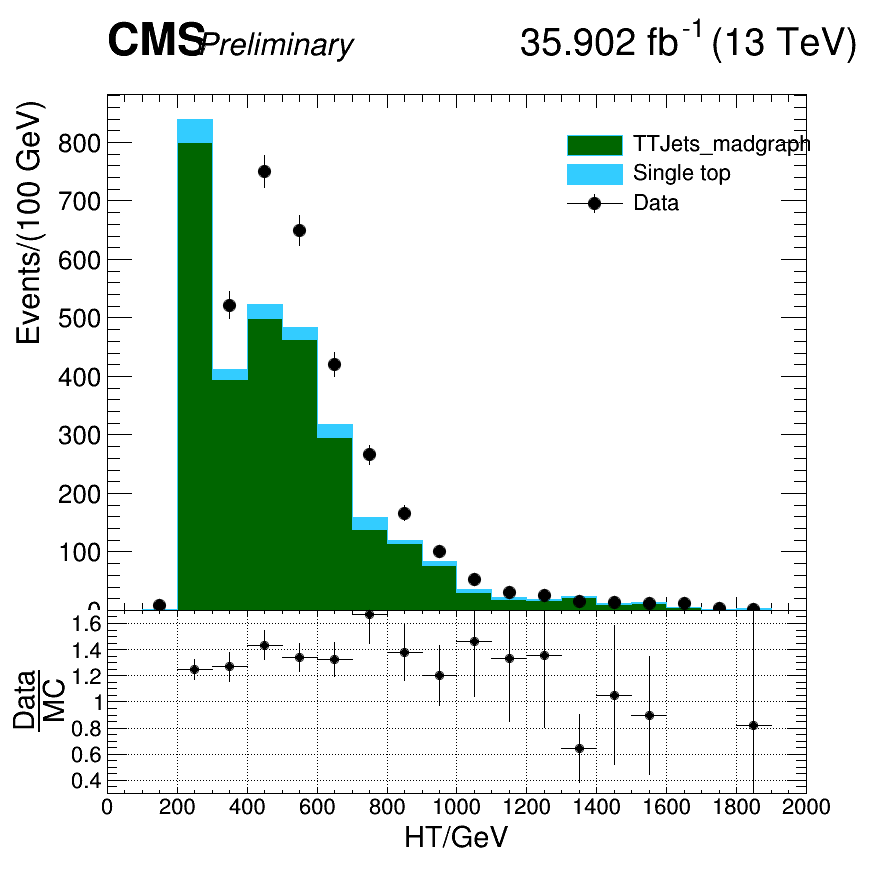

In [13]:
canvas2=np.zeros((l,),rt.TCanvas)
legend2=np.zeros((l,),rt.TLegend)

print MC_Compo[0],"W selection"

CName2=[]
for i in range(1,l+1):
    CName2.append('cm'+str(i))
Pad1=[]
Pad2=[]
Mc=[]
Ratio=[]
    
for i in range(l):
    canvas2[i] = rt.TCanvas(CName2[i],CName2[i],0,50,900,900)
    canvas2[i].SetFillColor(0)
    canvas2[i].SetBorderMode(0)
    canvas2[i].SetBorderSize(0)
    canvas2[i].SetFrameFillStyle(0)
    canvas2[i].SetFrameBorderMode(0)
    canvas2[i].SetFrameLineWidth(0)
    canvas2[i].SetLeftMargin( L/W )
    canvas2[i].SetRightMargin( R/W )
    canvas2[i].SetTopMargin( T/H )
    canvas2[i].SetBottomMargin( B/H )
    canvas2[i].SetTickx(0)
    canvas2[i].SetTicky(0)
#canvas.Draw()

    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95, -1,0,0);
    pad1.SetBottomMargin(0.); #// Upper and lower plot are joined
#pad1.SetGridx();         #// Vertical grid
    pad1.SetBorderMode(0)
    pad1.SetBorderSize(0)
    pad1.SetFrameLineWidth(0)
    pad1.SetFrameBorderMode(0)
    pad1.Draw()           #// Draw the upper pad: pad1
    pad1.cd()
    Pad1.append(pad1)

               #// pad1 becomes the current pad
    Data_WSel[i].SetMarkerSize(1.5)
    Data_WSel[i].SetMarkerColor(rt.kBlack)
    Data_WSel[i].SetMarkerStyle(20)
    Data_WSel[i].SetLineColor(rt.kBlack)

    TTm_WSel[i].SetLineColor(rt.kAzure+8)
    TTm_WSel[i].SetFillColor(rt.kGreen+3)

    st_WSel[i].SetLineColor(rt.kAzure+8)
    st_WSel[i].SetFillColor(rt.kAzure+8)


    mc = rt.THStack("MC",Title_WSel[i][1])
    mc.Add(TTm_WSel[i])
    mc.Add(st_WSel[i])
    mc.Draw("hist")
    mc.GetYaxis().SetTitle(Title_WSel[i][0])
    mc.GetXaxis().SetTitle(Title_WSel[i][2])
    mc.GetYaxis().SetTitleOffset(0.9)
    Mc.append(mc)

    mc.Draw("samehist")
    Data_WSel[i].Draw("esamex0")
    
    CMS_lumi.CMS_lumi(canvas2[i], iPeriod, iPos)
#    canvas[i].cd()

    canvas2[i].cd()
    canvas2[i].Update()
    canvas2[i].RedrawAxis()
    frame = canvas2[i].GetFrame()
    frame.Draw()

    pad2 = rt.TPad("pad2","pad2",0,0.0,1,0.3, -1,0,0)
    pad2.SetTopMargin(0)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    pad2.cd()
    pad2.SetBottomMargin(0.3)
    Pad2.append(pad2)

    ratio = rt.TH1D(Title_WSel[i][1],";;",*Range_WSel[i])
    ratio.GetXaxis().SetTitle(Title_WSel[i][2]);
    ratio.Add(Data_WSel[i])
    #ratio.GetYaxis().SetTitleOffset(0.);
    ratio.GetYaxis().CenterTitle(rt.kTRUE);
    ratio.GetXaxis().CenterTitle(rt.kTRUE);
    ratio.GetYaxis().SetRangeUser(0.3,1.7)

    MC = rt.TH1D(Title_WSel[i][1],";;",*Range_WSel[i])
    MC.Add(TTm_WSel[i])
    MC.Add(st_WSel[i])

    ratio.GetYaxis().SetTitle("#frac{Data}{MC}")
    ratio.Sumw2()
    ratio.SetStats(0)
    ratio.Divide(MC)
    ratio.GetYaxis().SetLabelSize(0.09)
    ratio.GetXaxis().SetLabelSize(0.09)
    ratio.SetMarkerColor(rt.kBlack)
    ratio.SetMarkerStyle(20)
    ratio.SetLineColor(rt.kBlack)
    ratio.GetYaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetTitleOffset(0.4)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetXaxis().SetTitleOffset(0.85)
    Ratio.append(ratio)
    #ratio.SetAxisRange(50,150)

    ratio.Draw("EP")
    canvas2[i].cd()


    legend2[i] =  rt.TLegend(x0_l,y0_l,x1_l, y1_l )
    legend2[i].AddEntry(TTp_WSel[i],MC_Compo[0],"f")

    legend2[i].AddEntry(st_WSel[i],"Single top","f")
    legend2[i].AddEntry(Data_WSel[i],"Data","lep")
    legend2[i].SetTextFont(42)
    legend2[i].SetTextAngle(0)
    legend2[i].SetTextColor(rt.kBlack)      
    #legend.SetTextSize(0.05)    
    legend2[i].SetTextAlign(12) 
    legend2[i].SetBorderSize(0)
    legend2[i].SetFillStyle(0)
    #legend.SetLinewdith(0)
    legend2[i].Draw()

    canvas2[i].Print("/t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_WSel/"+Objects_WSel[i]+".png")
    canvas2[i].Update()
    canvas2[i].Draw()

TTJets_madgraph top selection


Warning in <TFile::Append>: Replacing existing TH1: P_{t} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_topSel/recoJetPt_nom_topSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: Softdrop Mass (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_topSel/recoJetSDmass_nom_topSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{21} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_topSel/recoJetTau21_nom_topSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #tau_{1}^{(0.5)} (Potential memory leak).
Info in <TCanvas::Print>: png file /t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_topSel/recoJet_tau_0p5_1_WTA_kT_nom_topSel.png has been created
Warning in <TFile::Append>: Replacing existing TH1: #ta

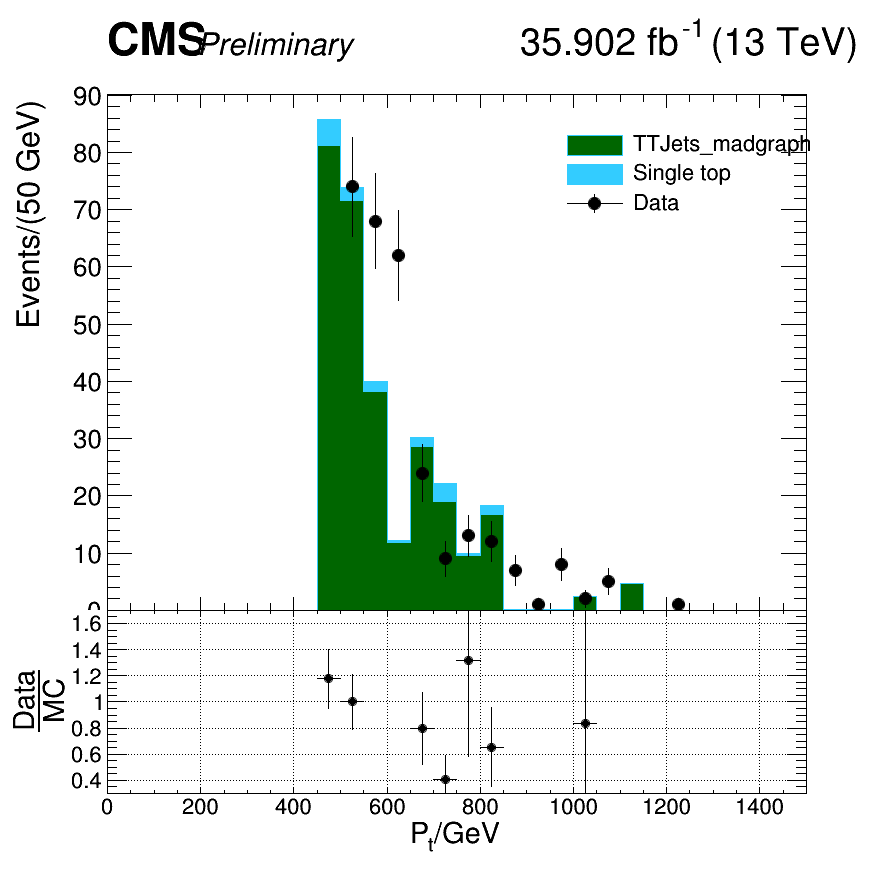

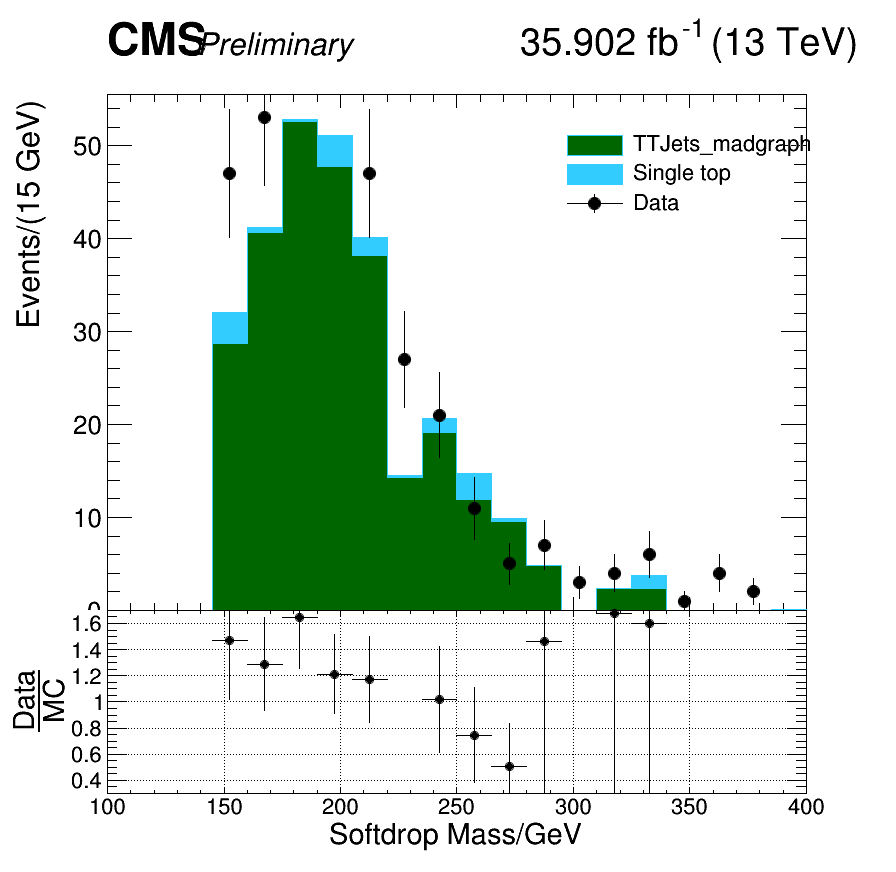

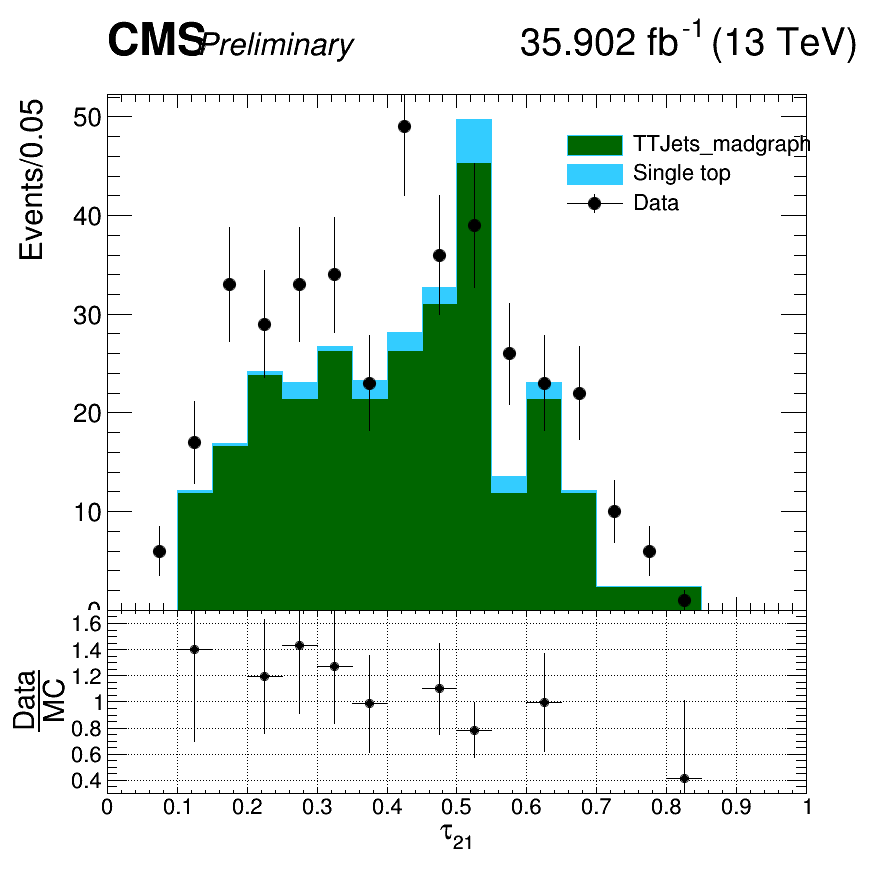

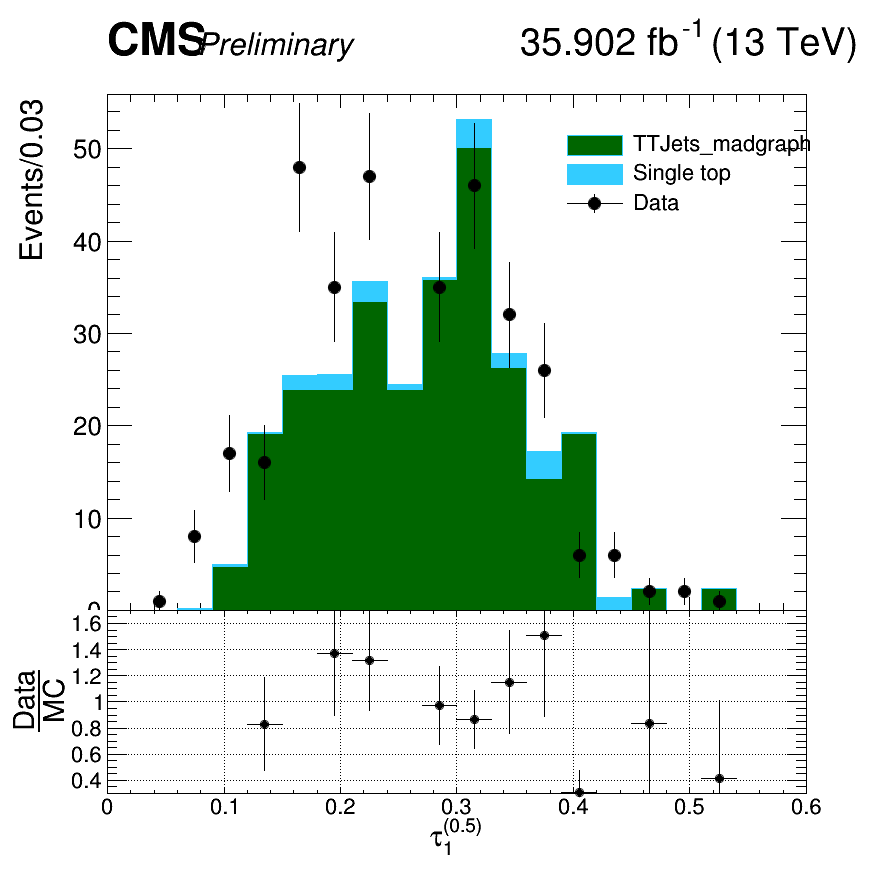

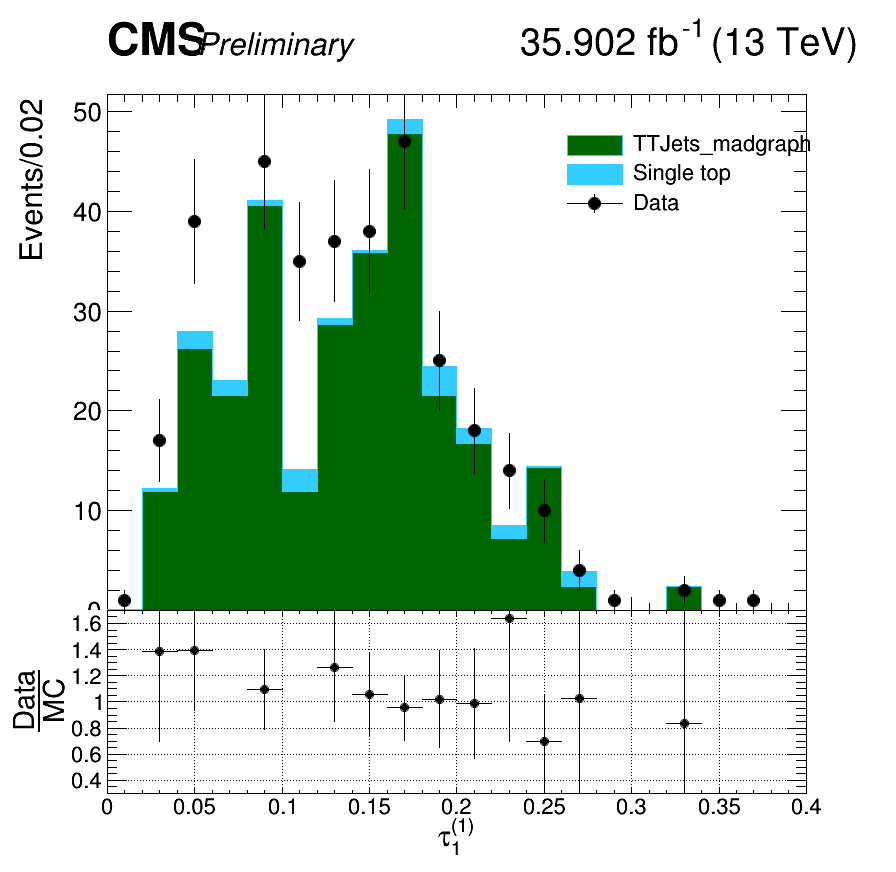

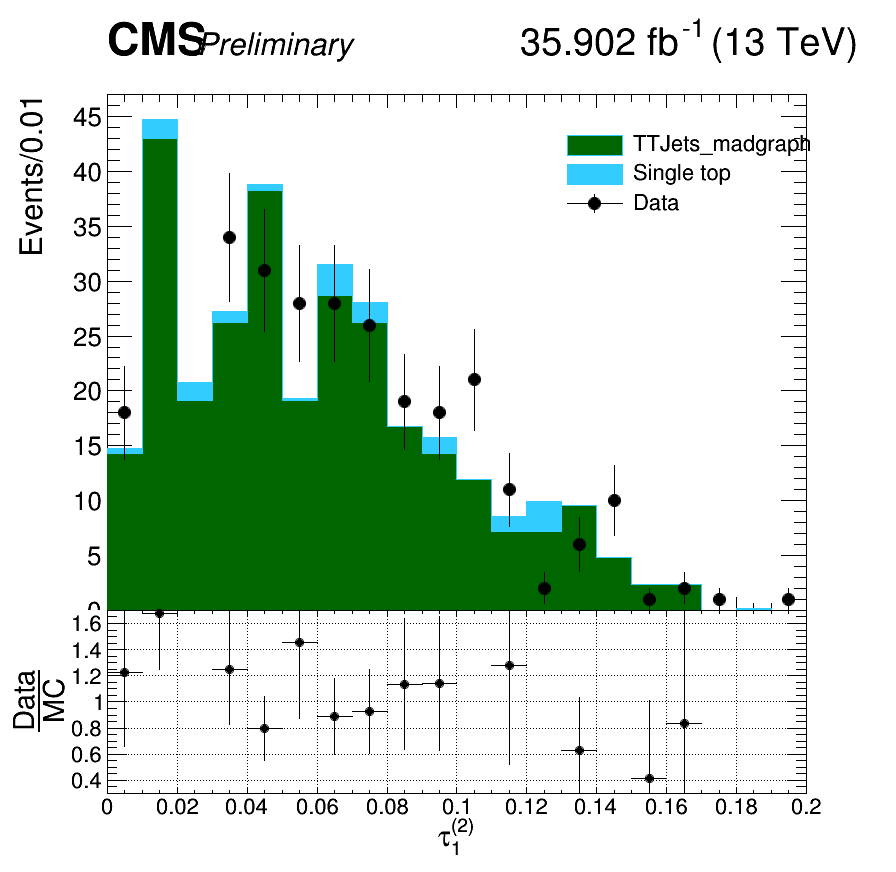

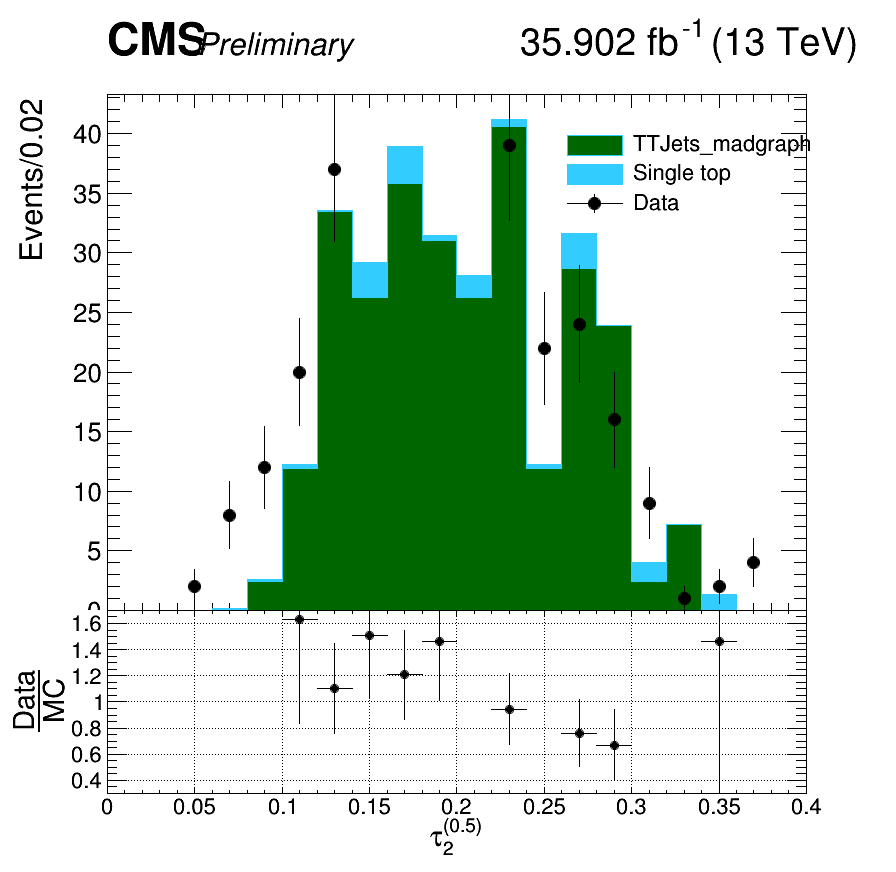

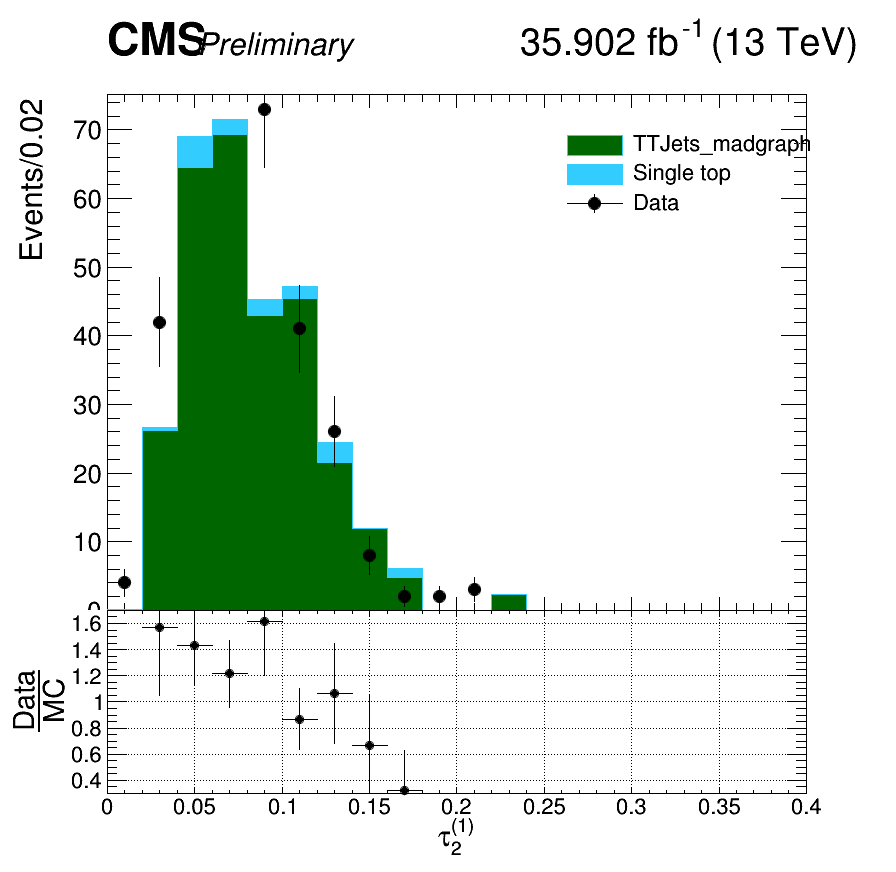

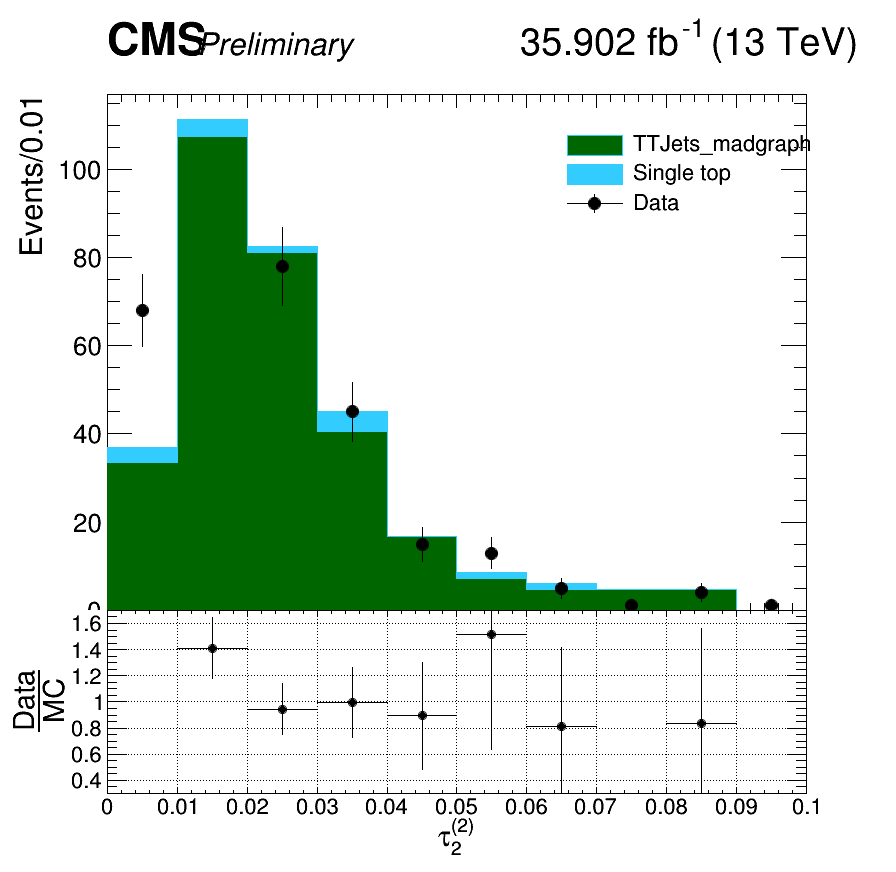

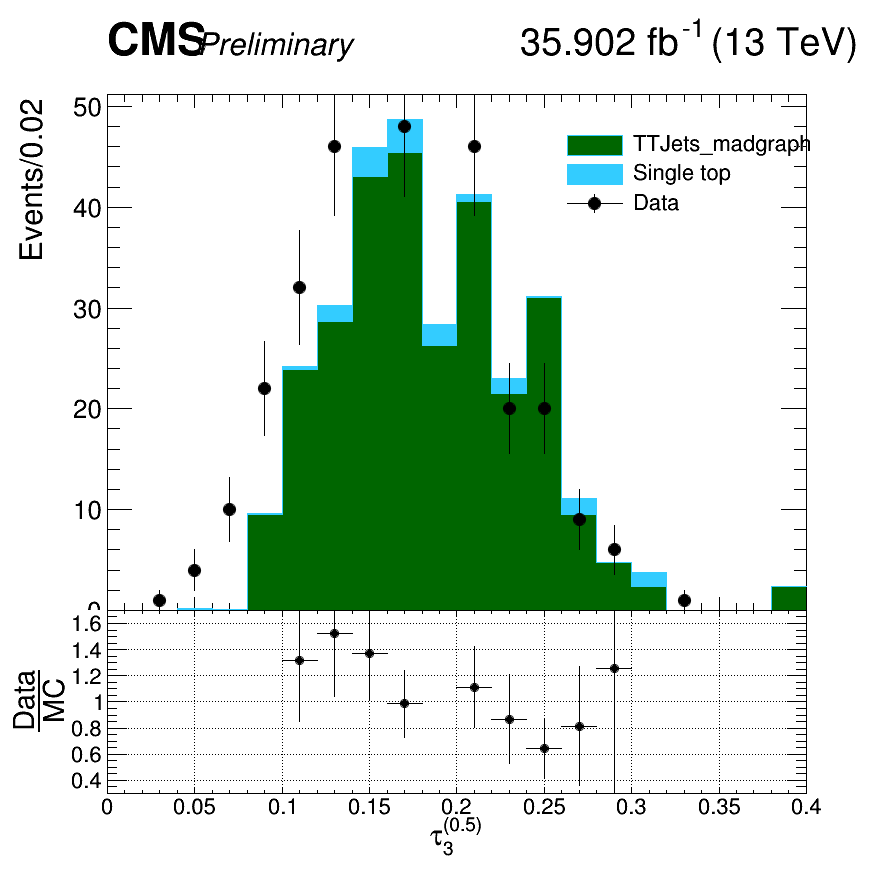

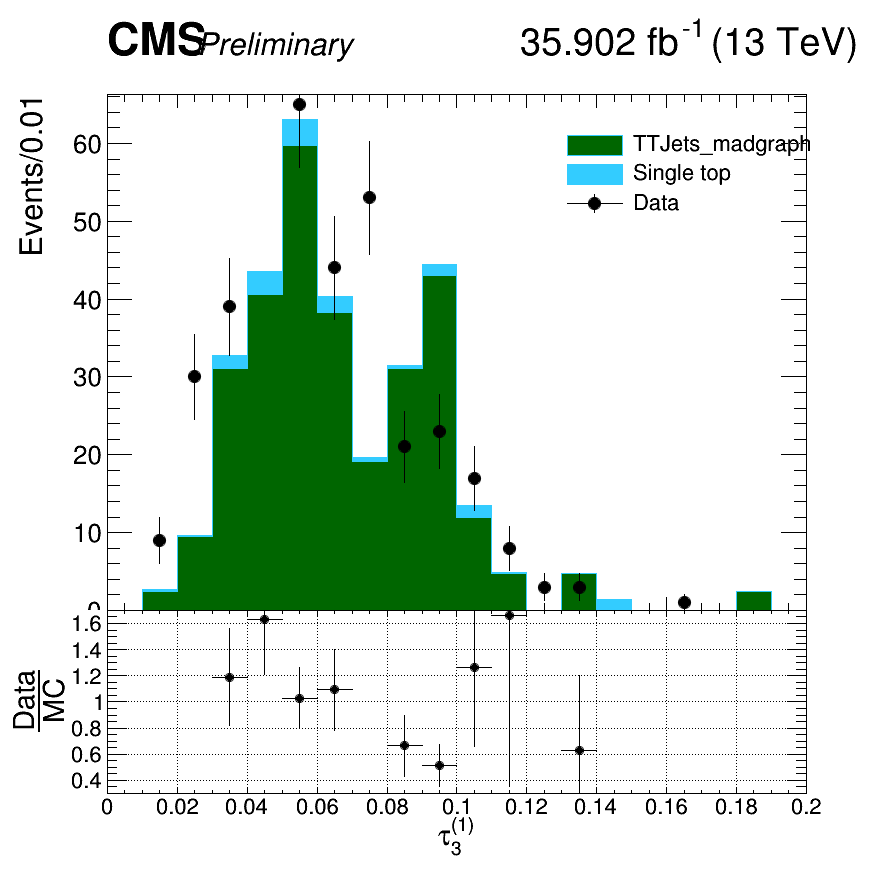

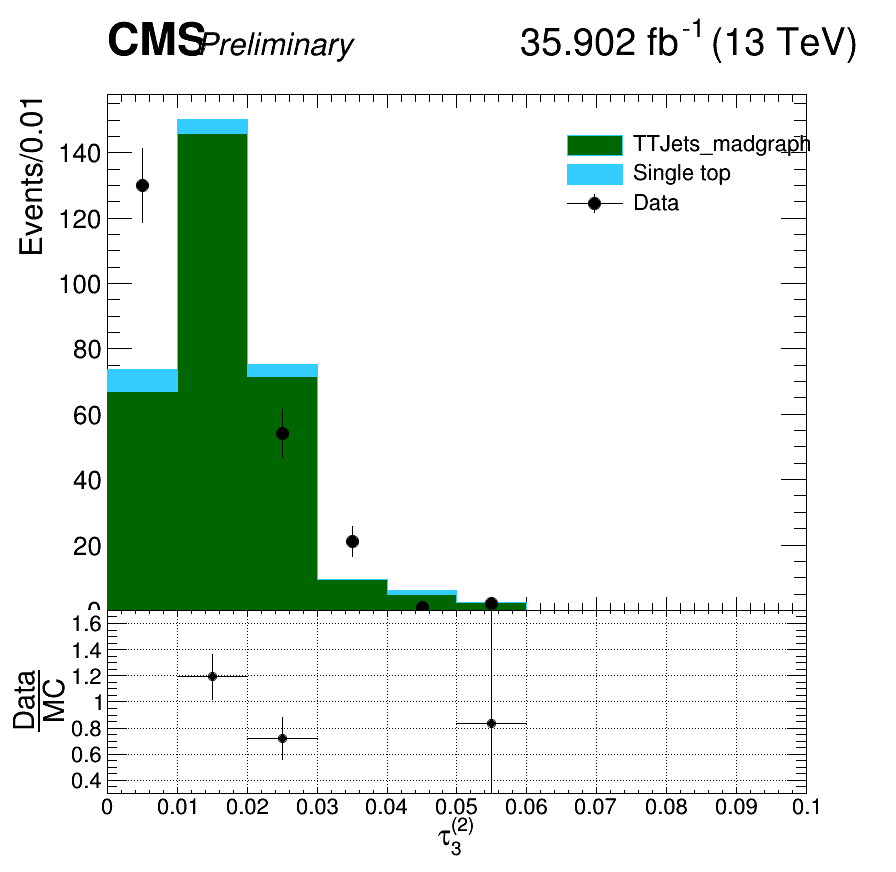

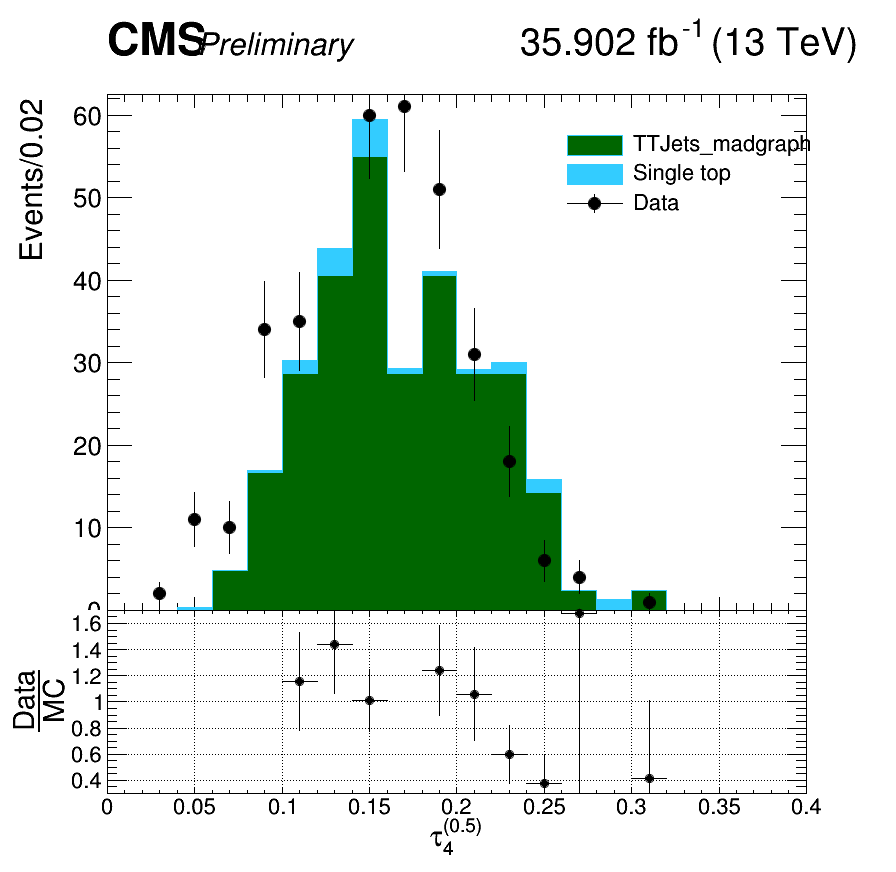

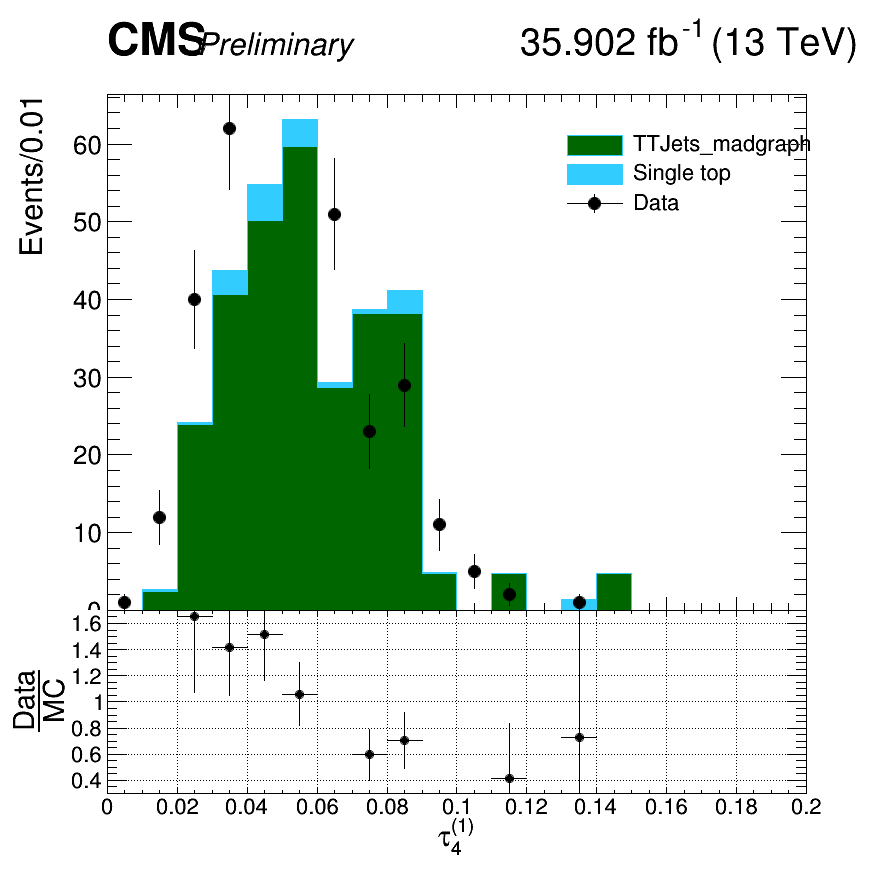

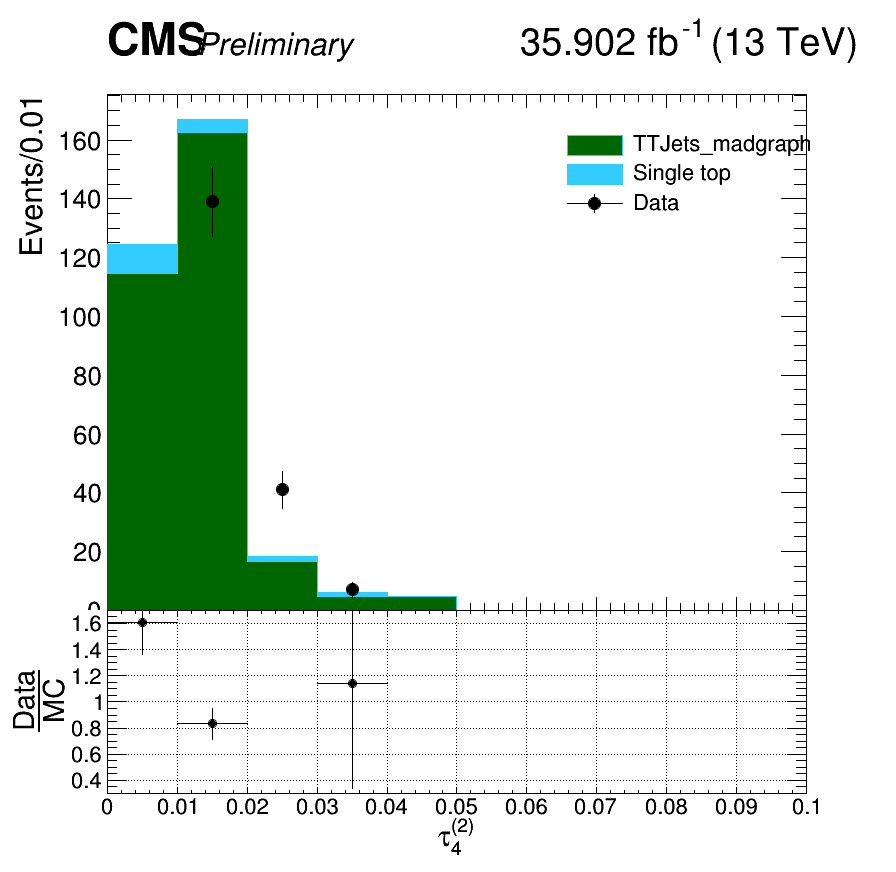

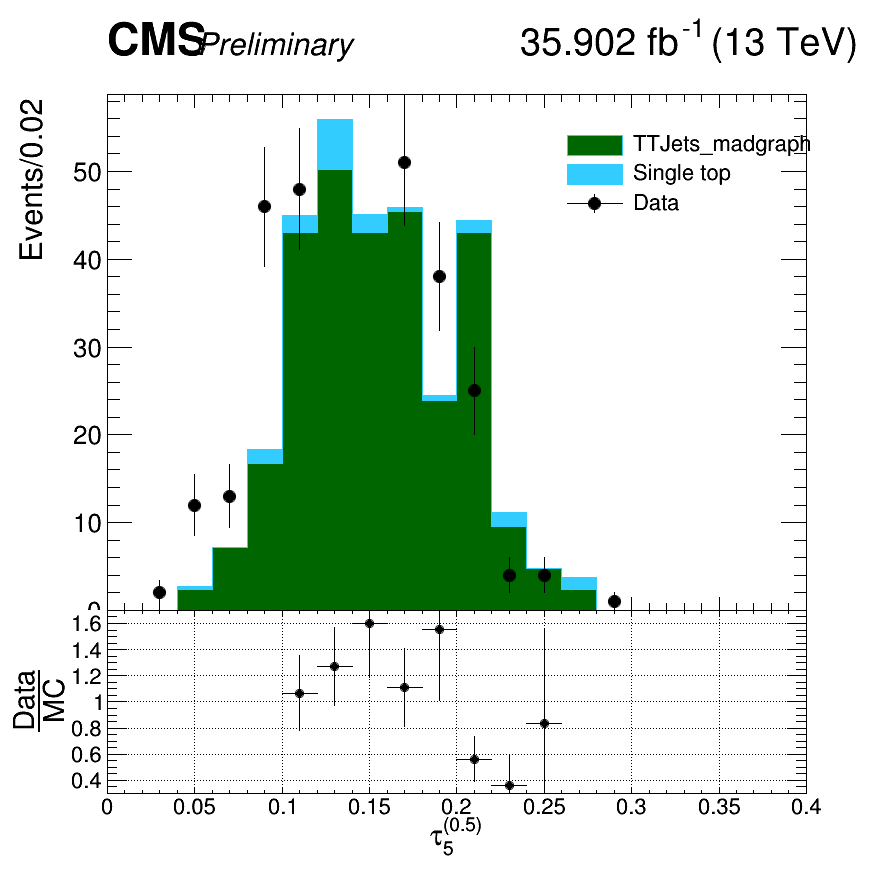

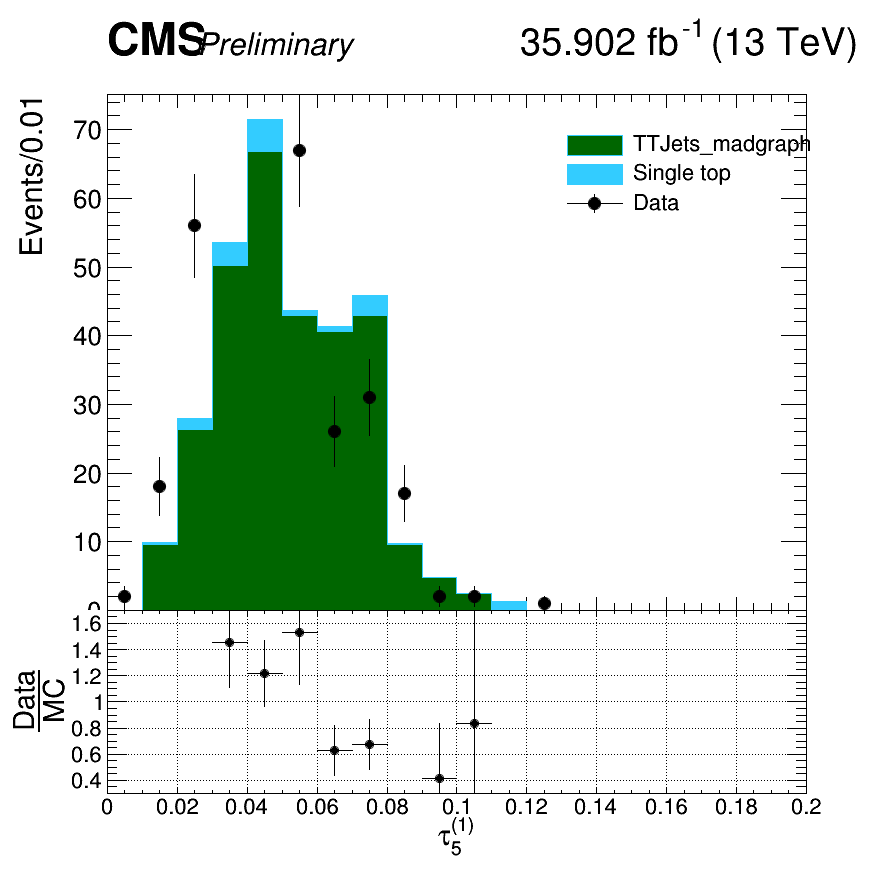

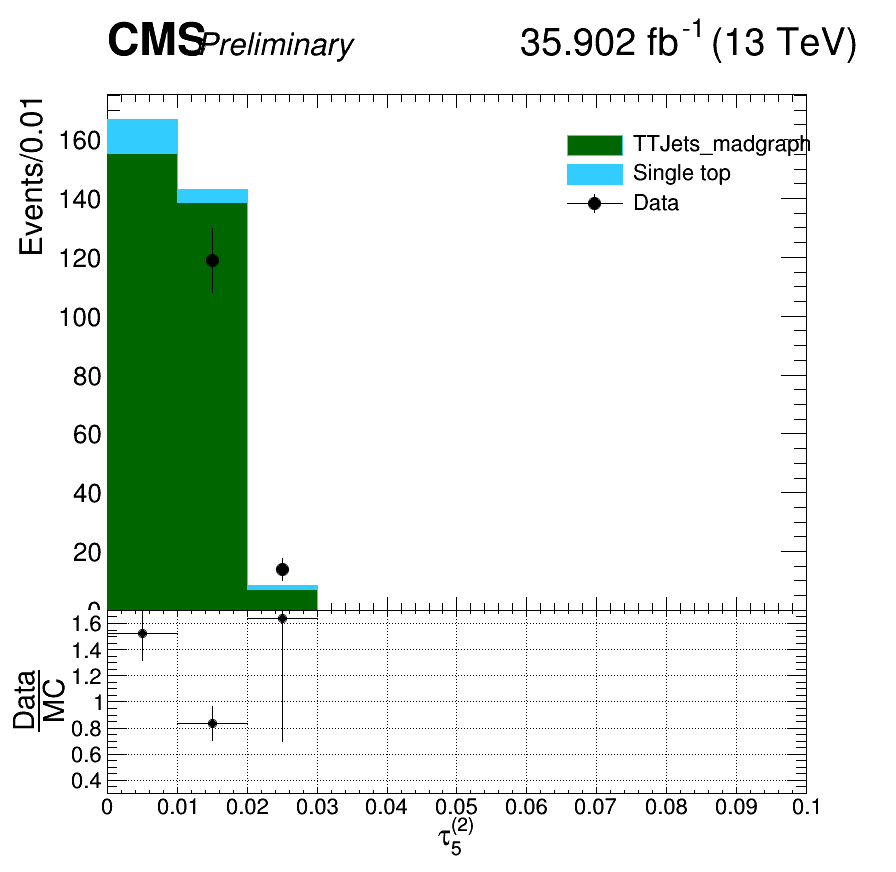

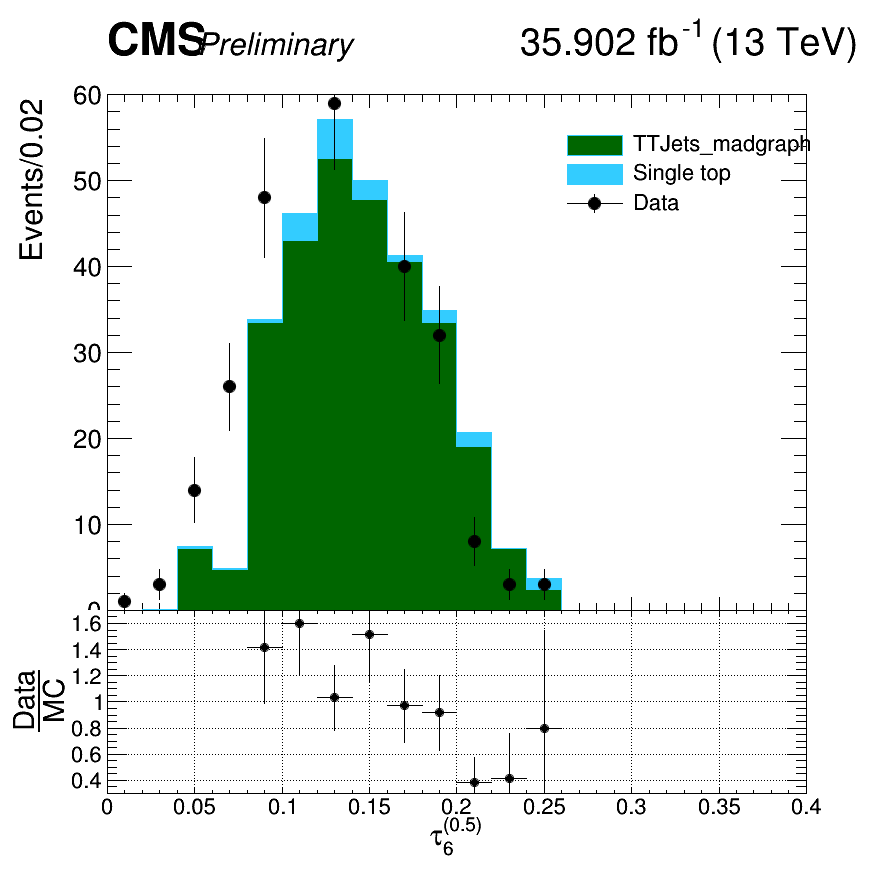

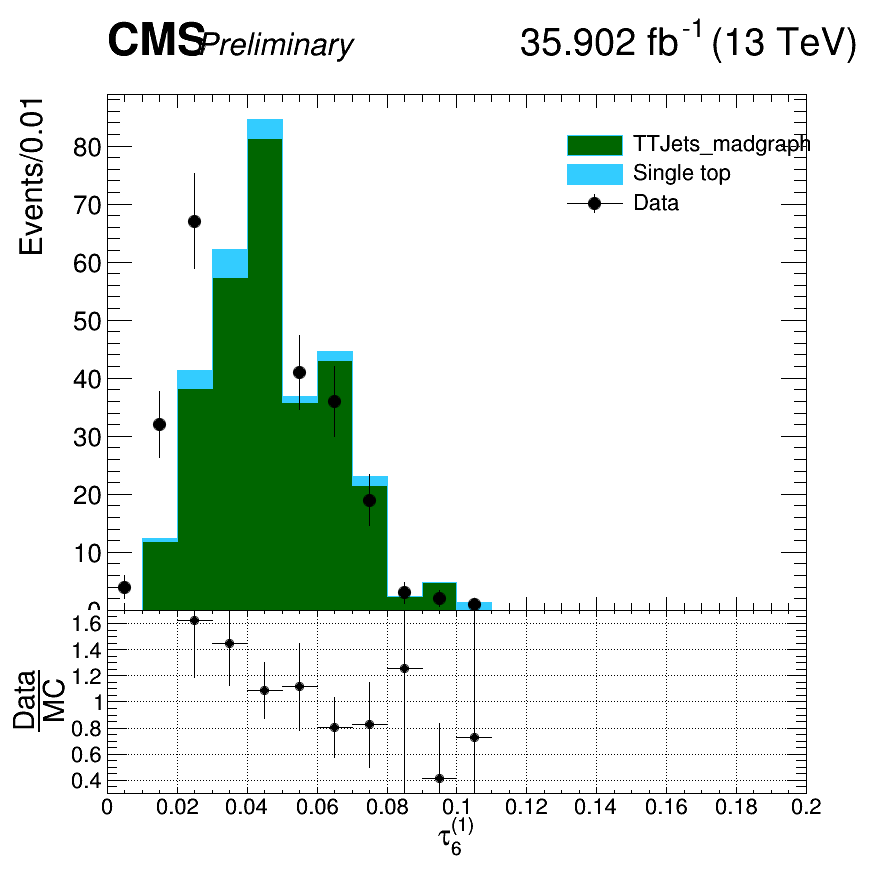

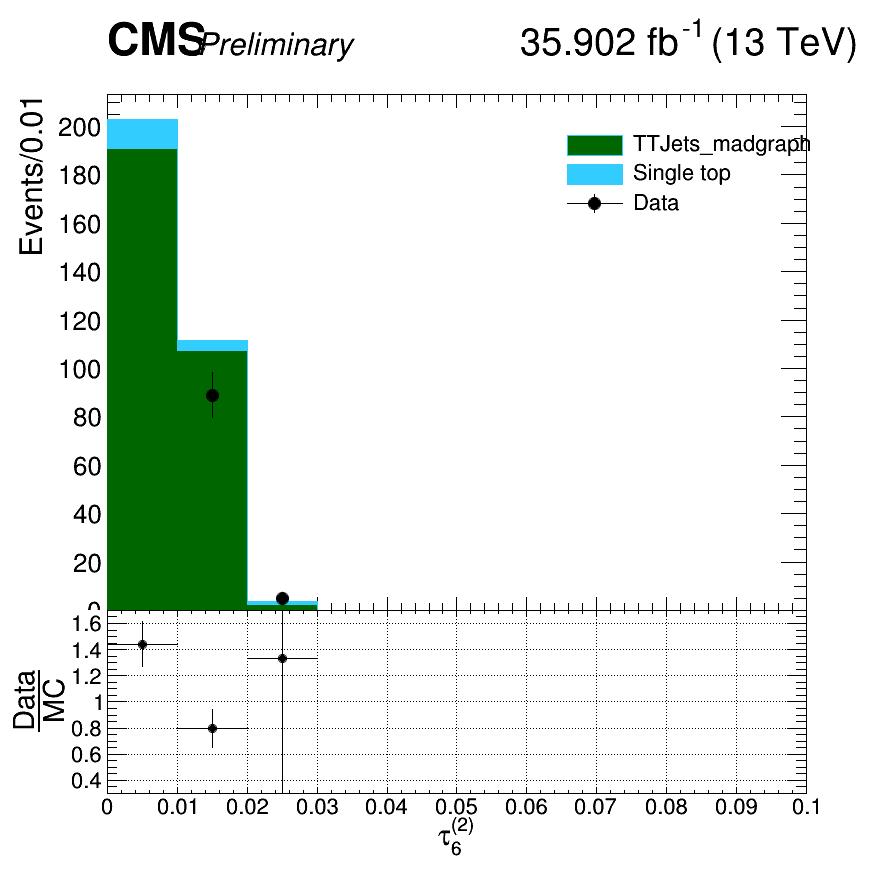

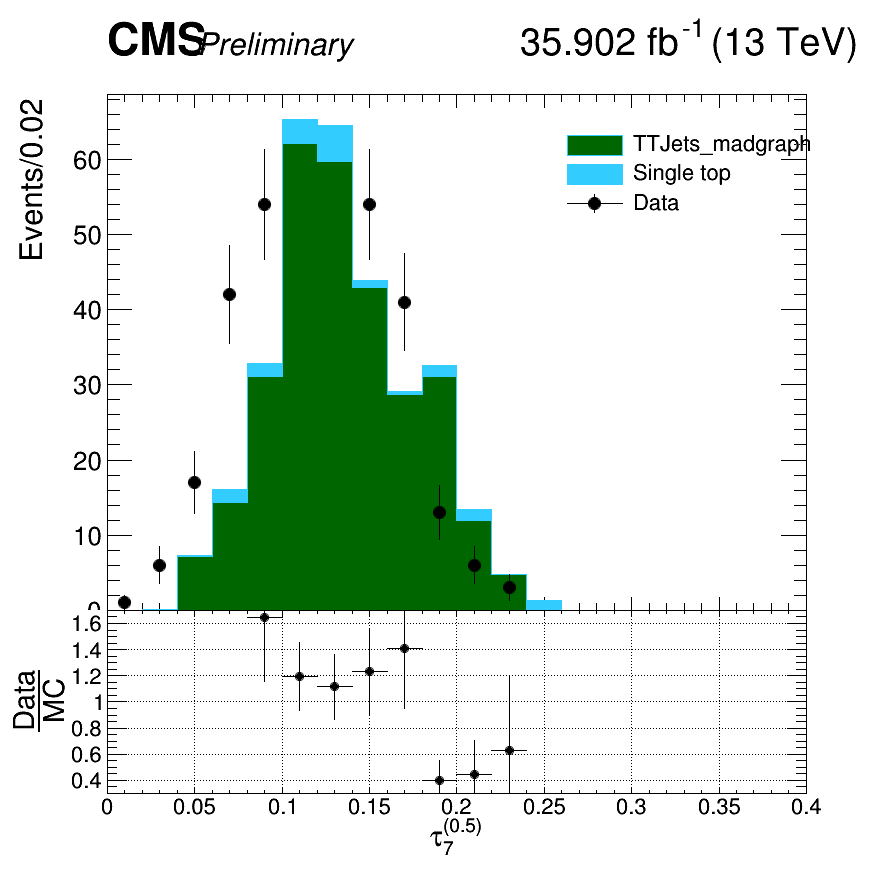

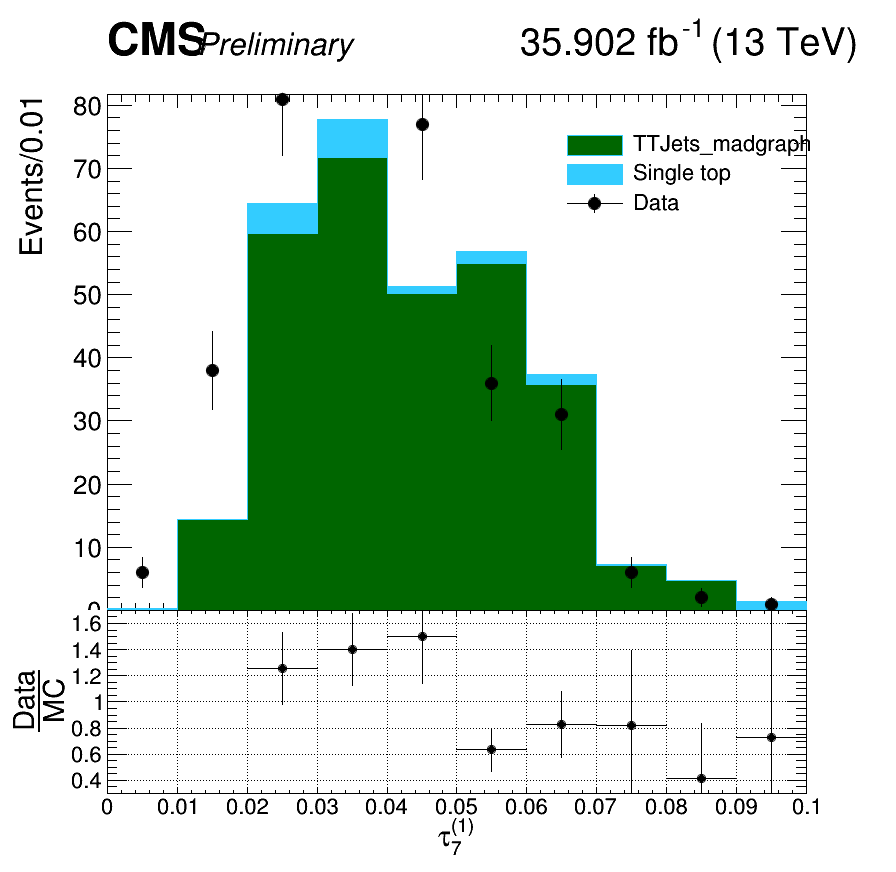

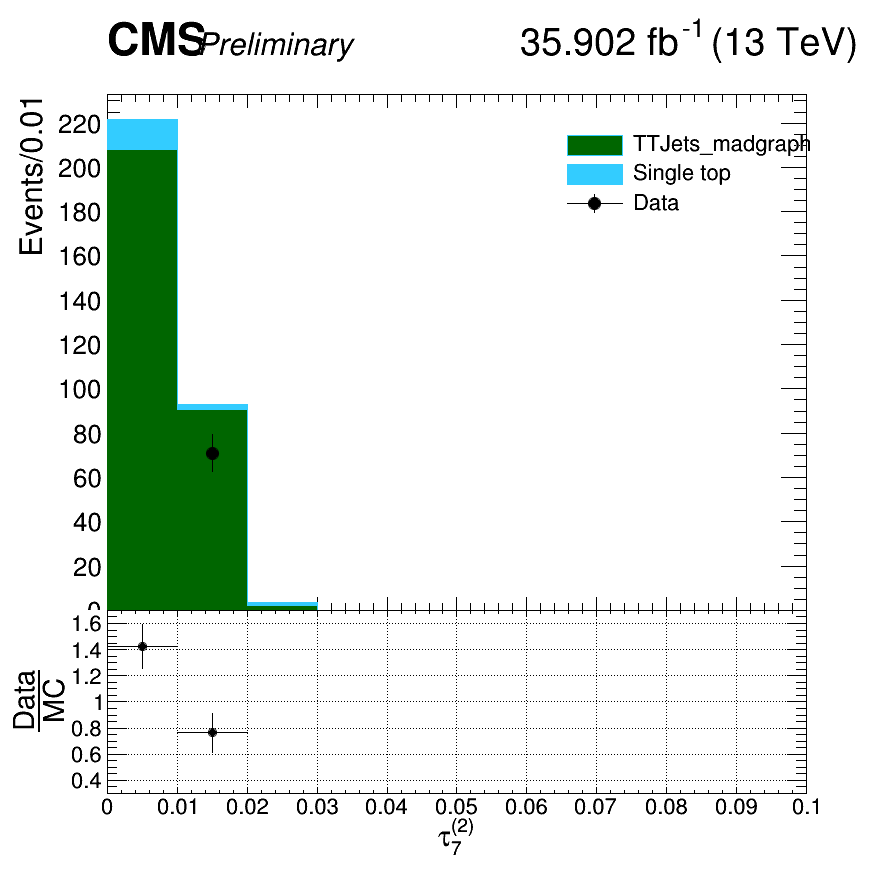

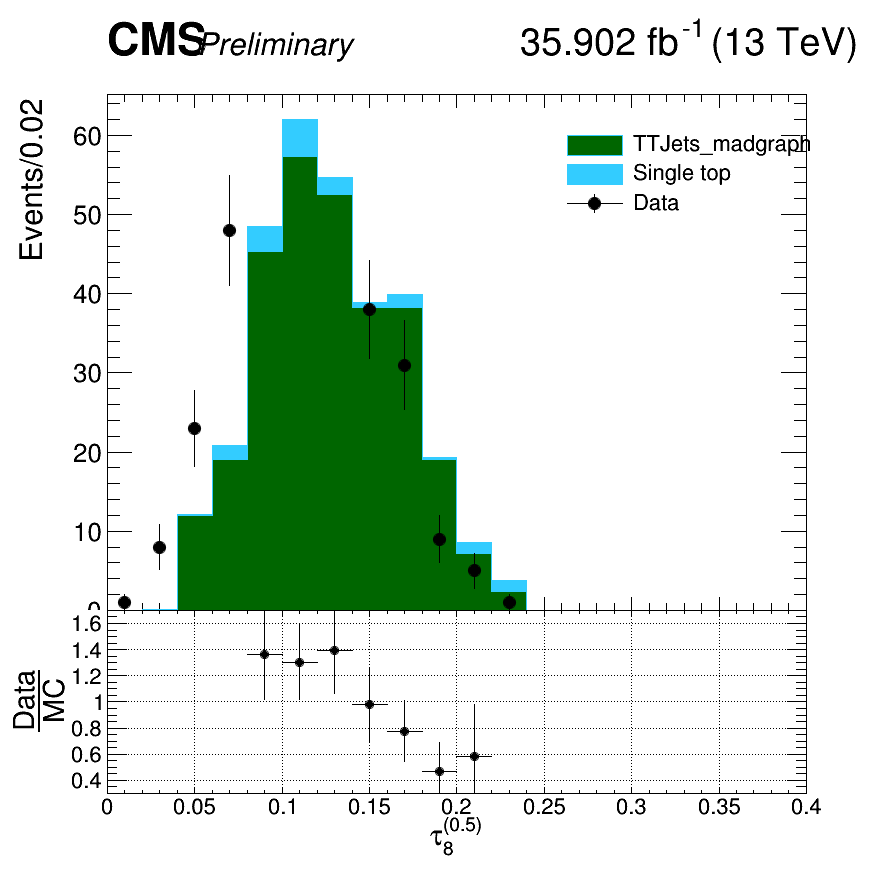

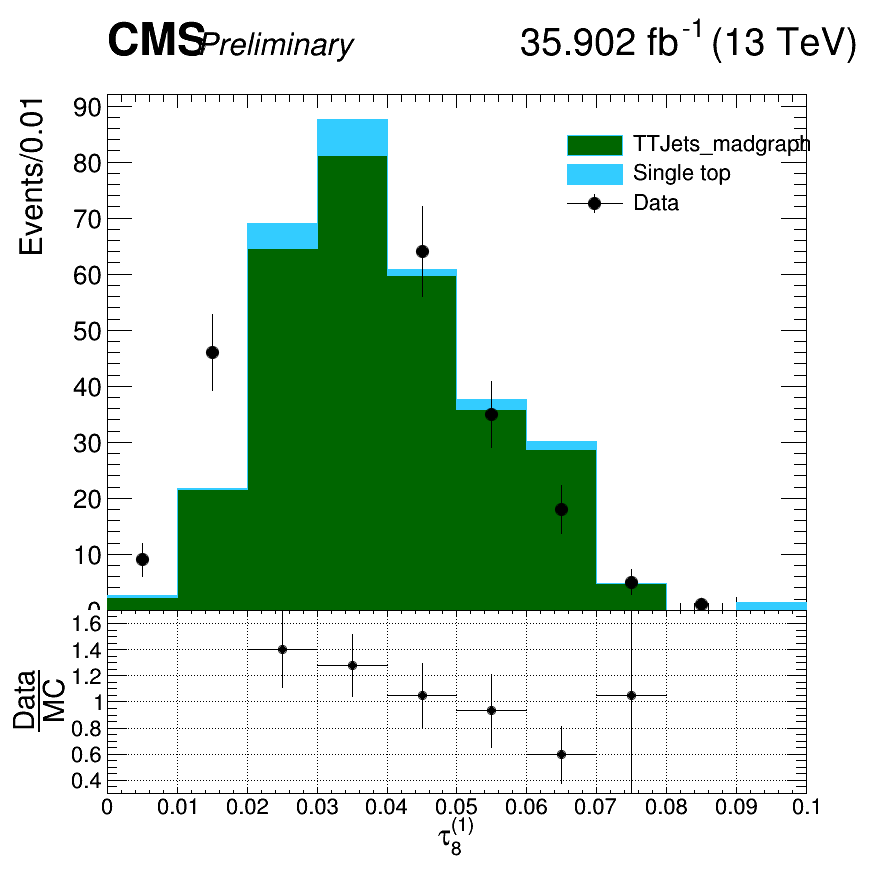

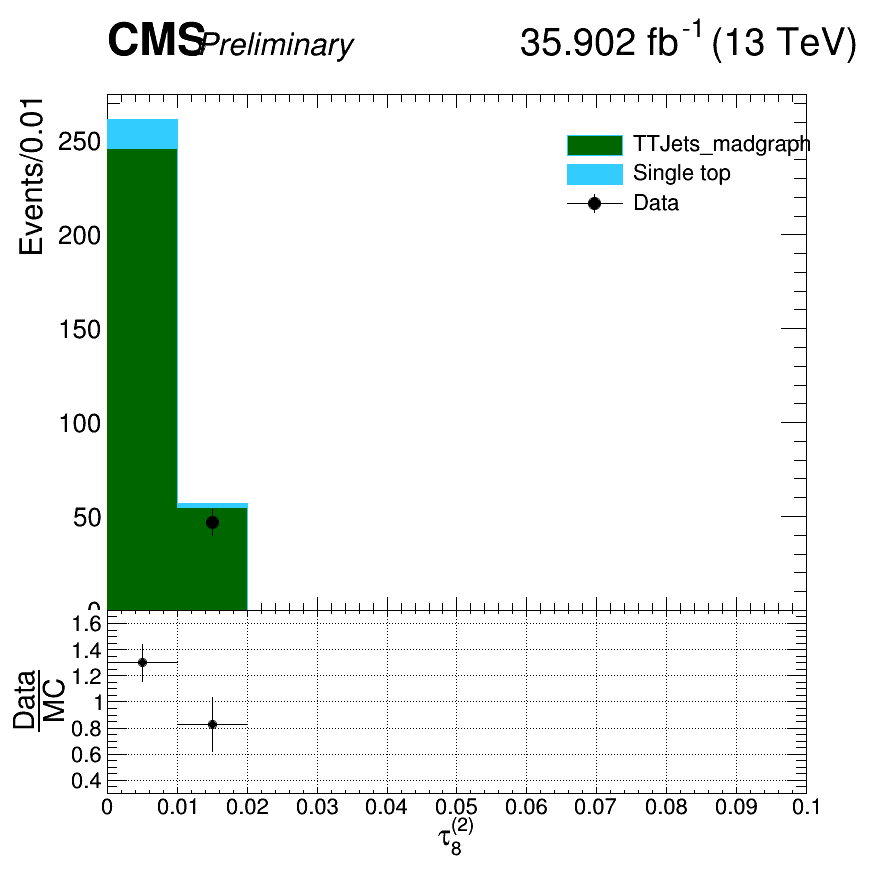

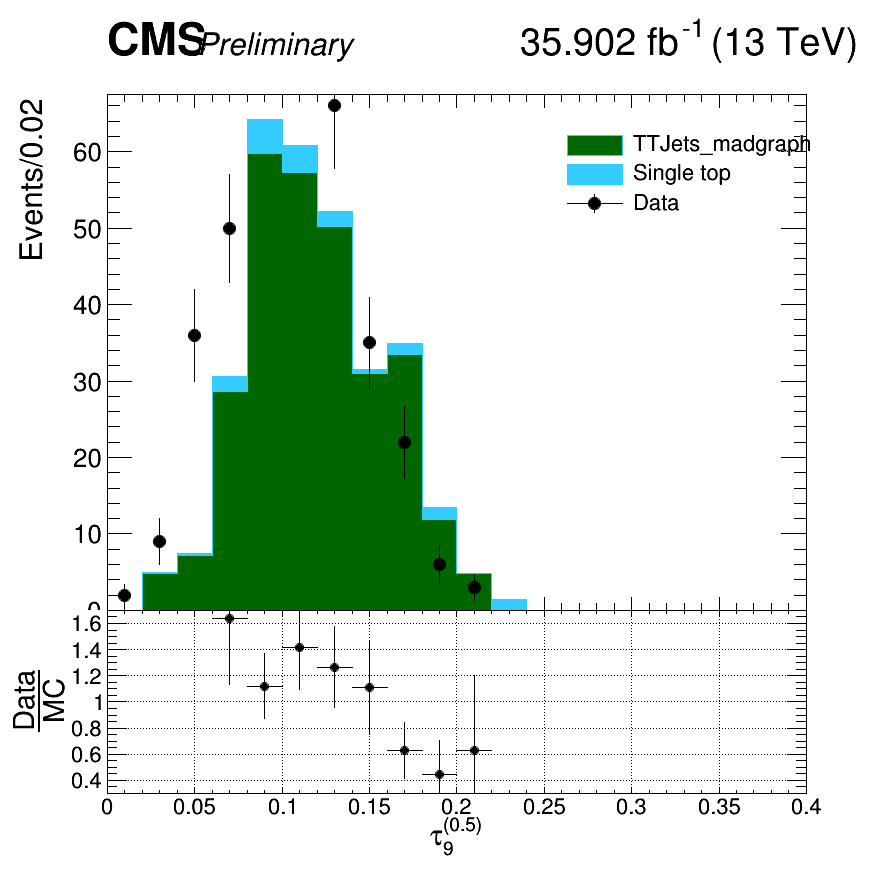

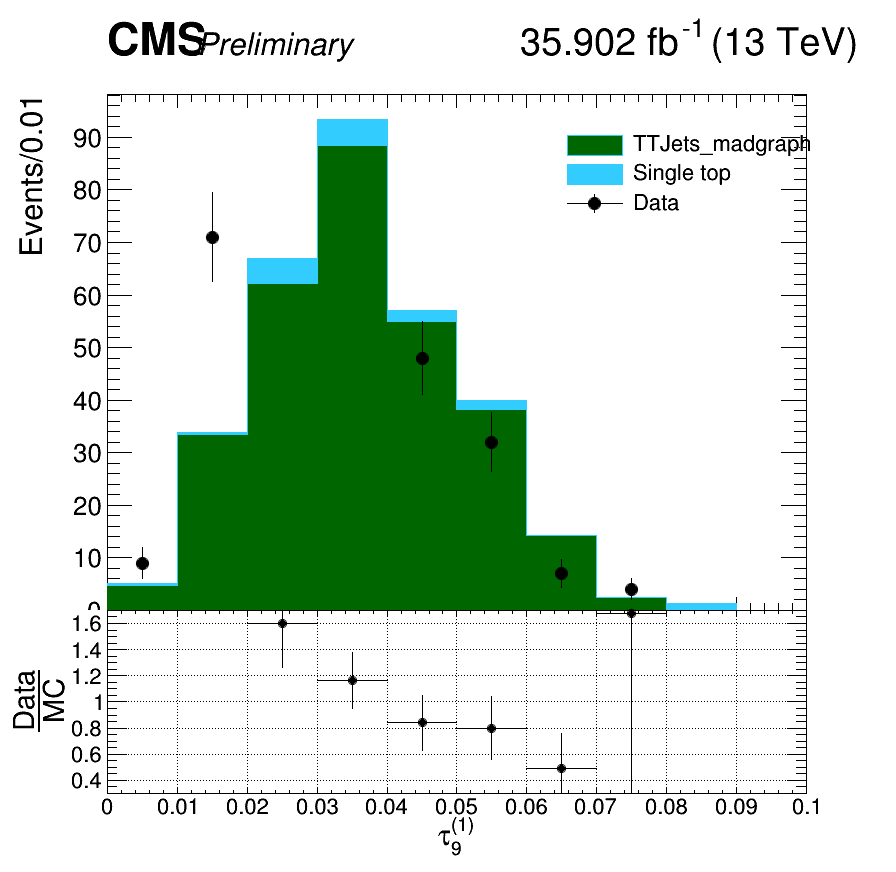

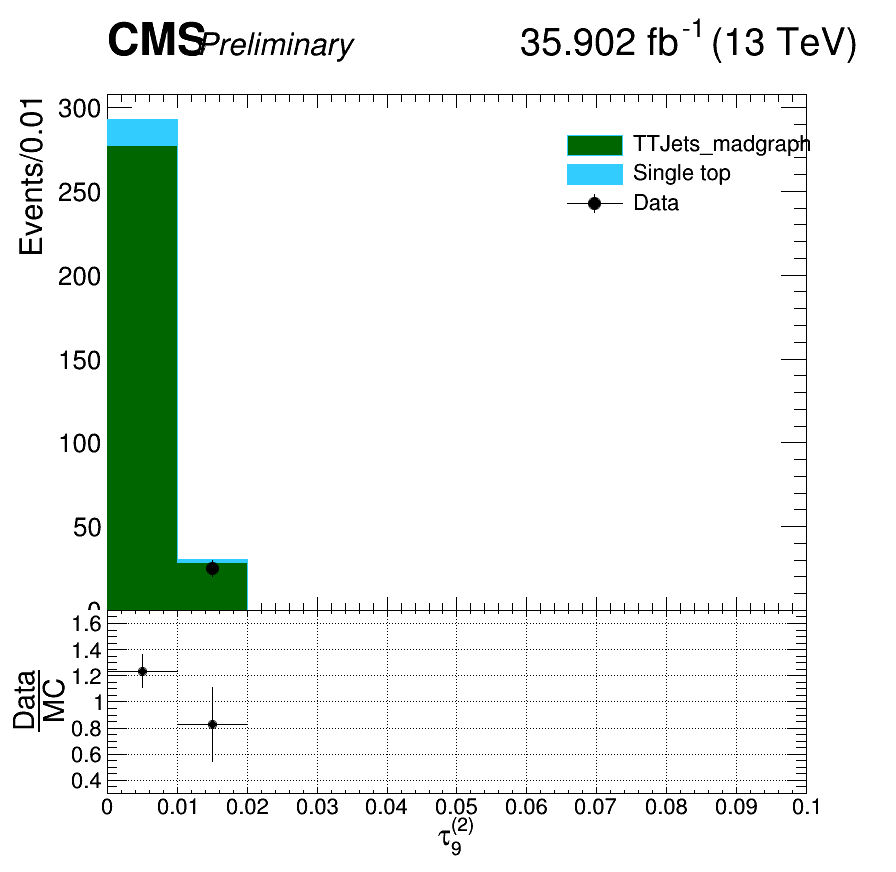

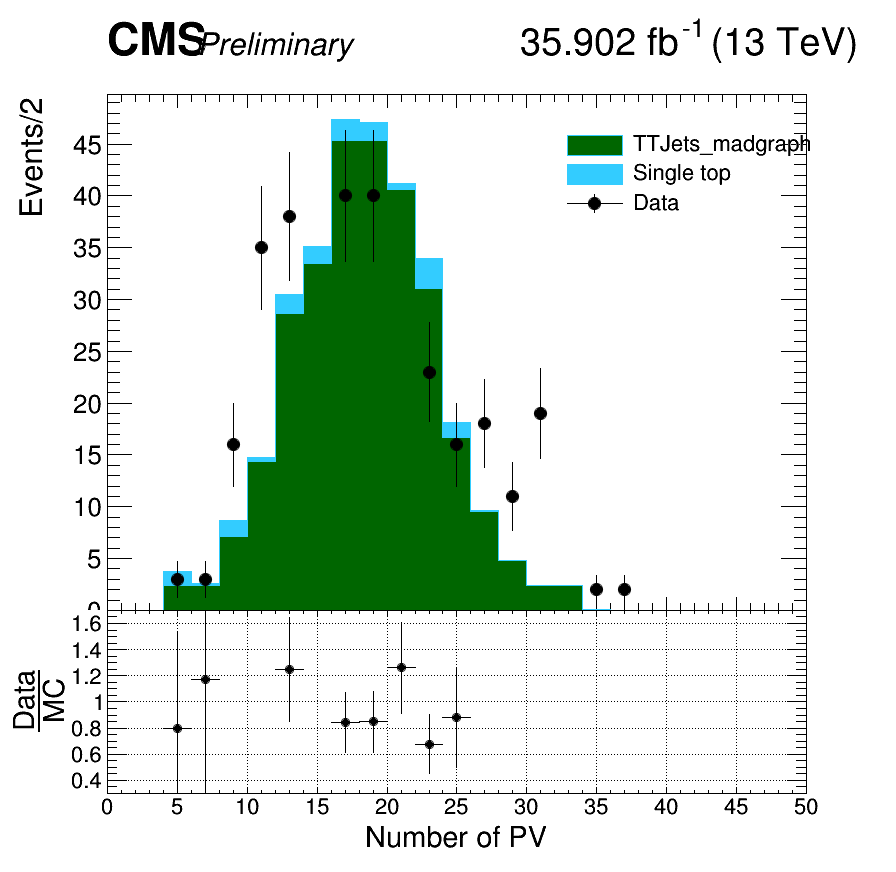

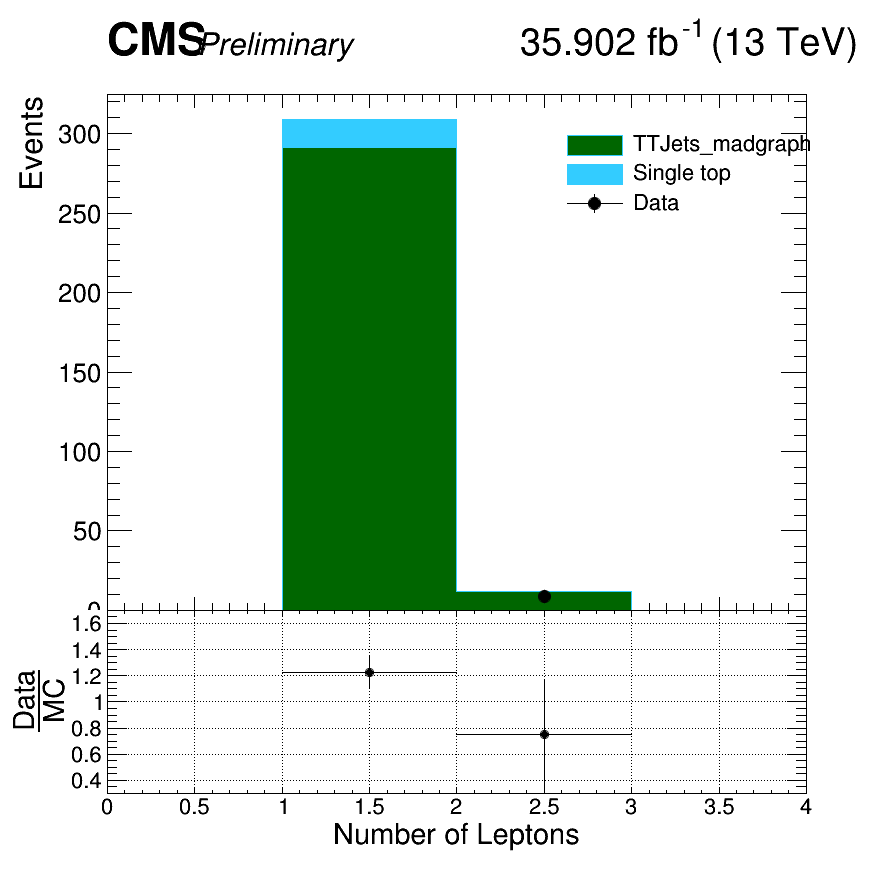

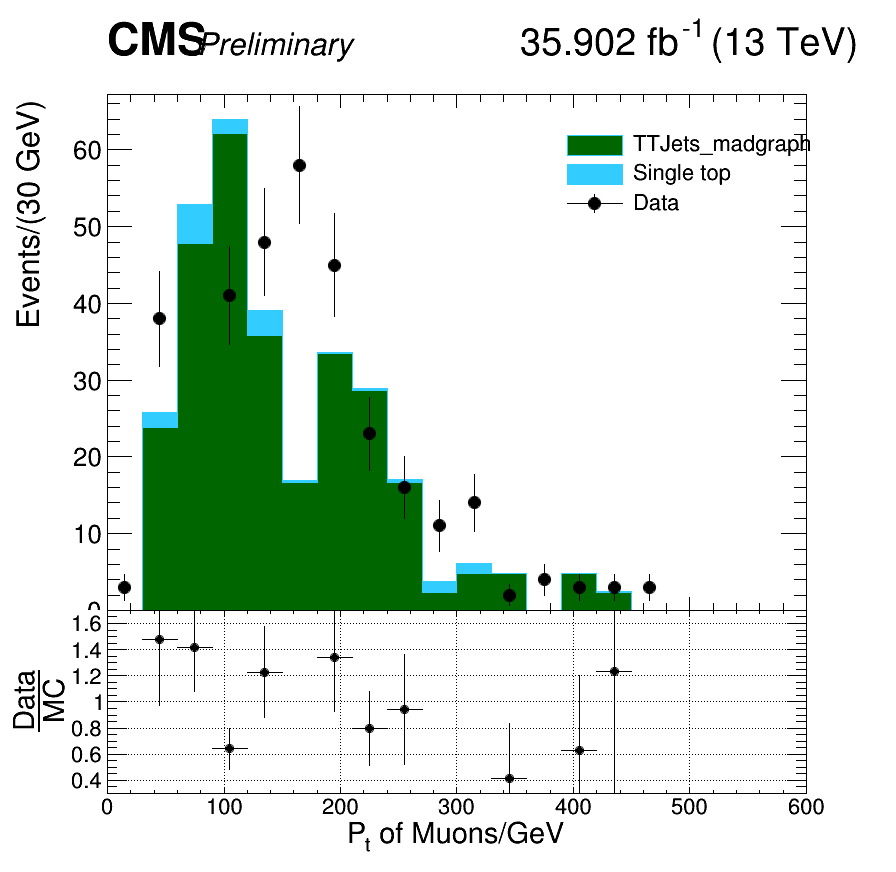

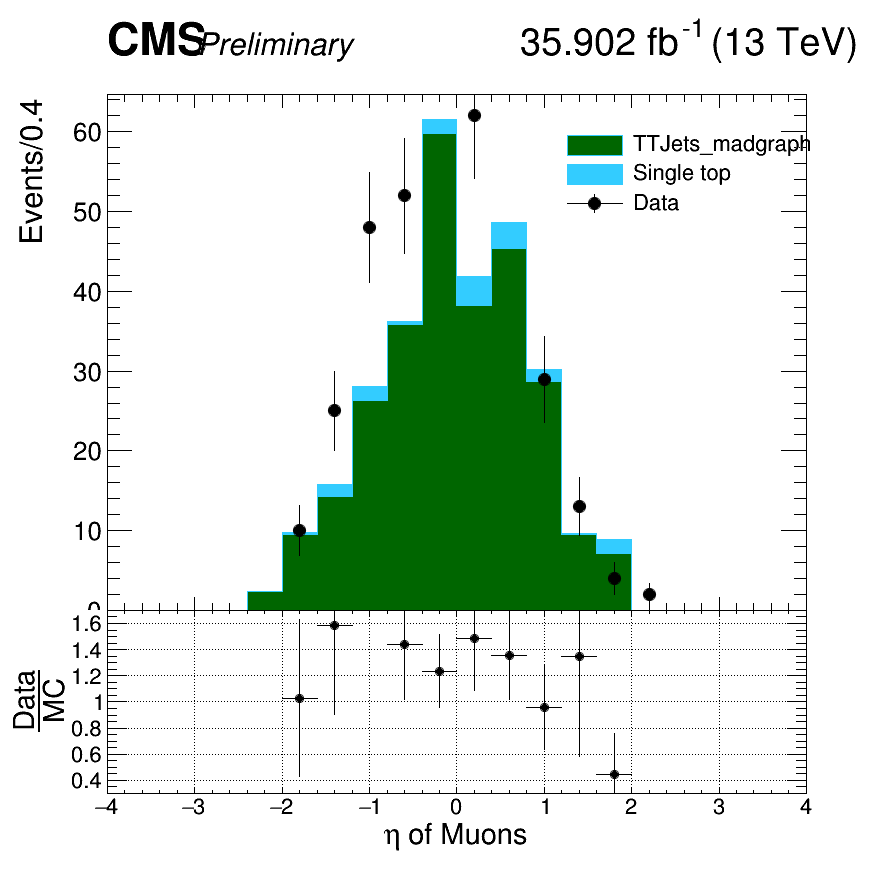

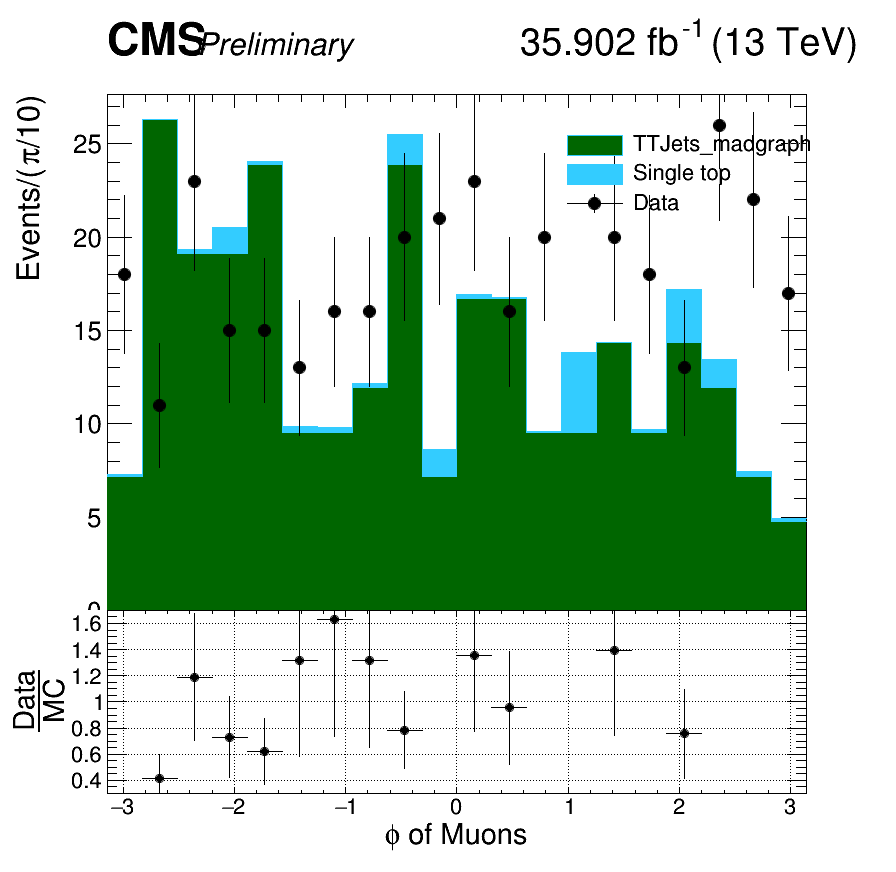

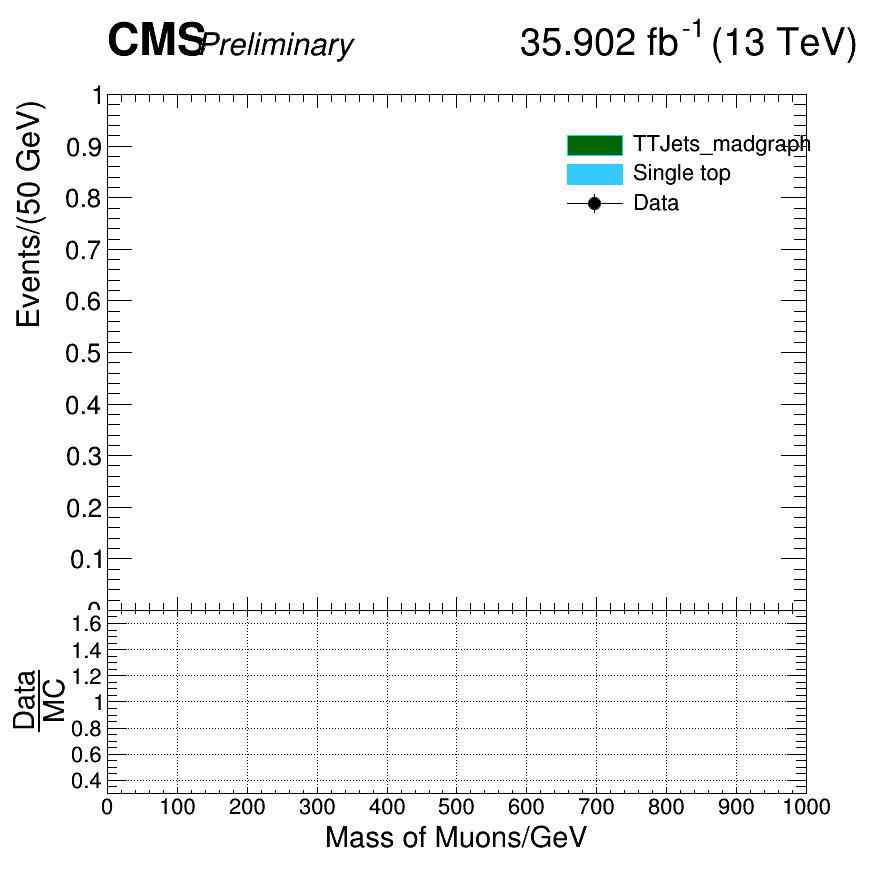

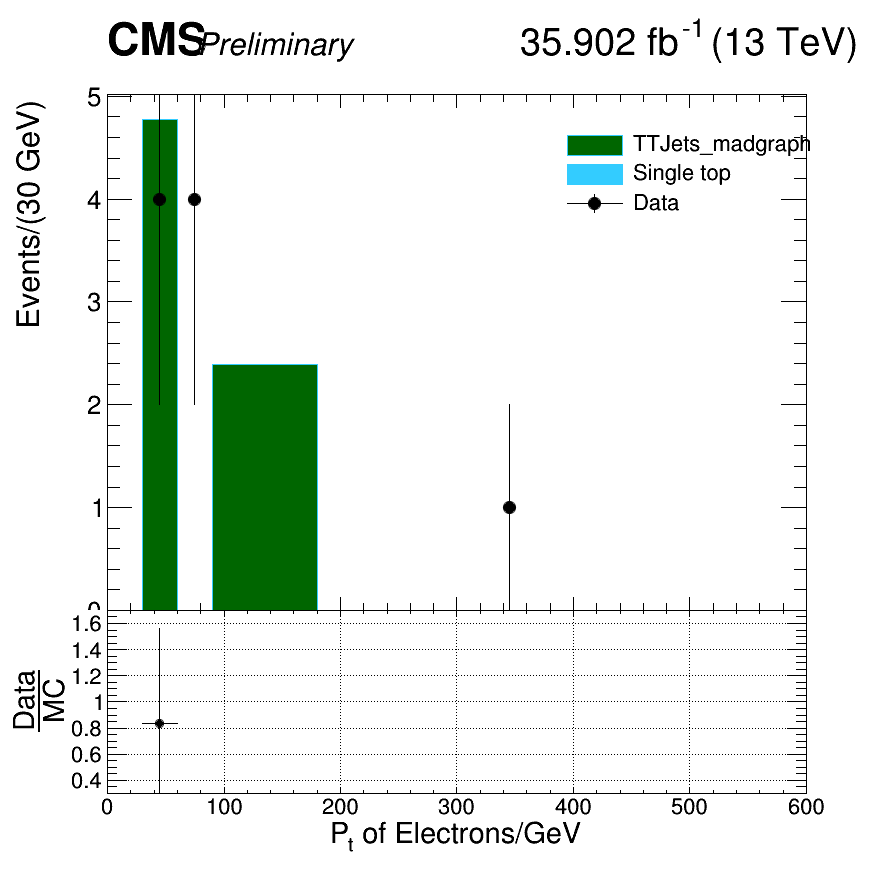

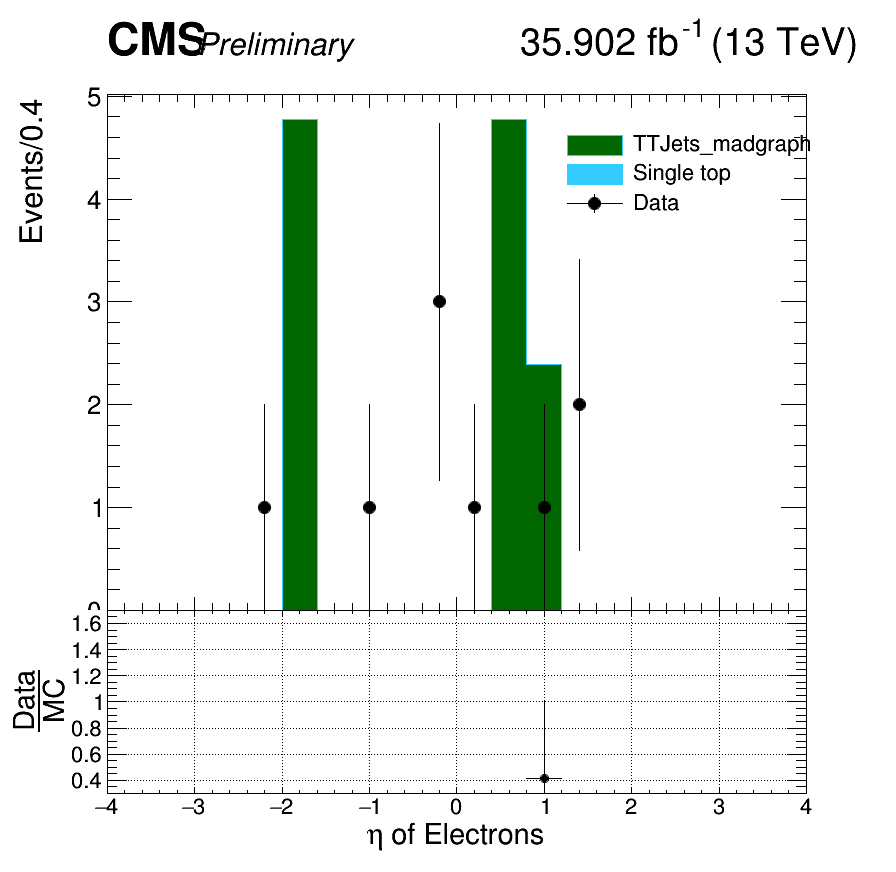

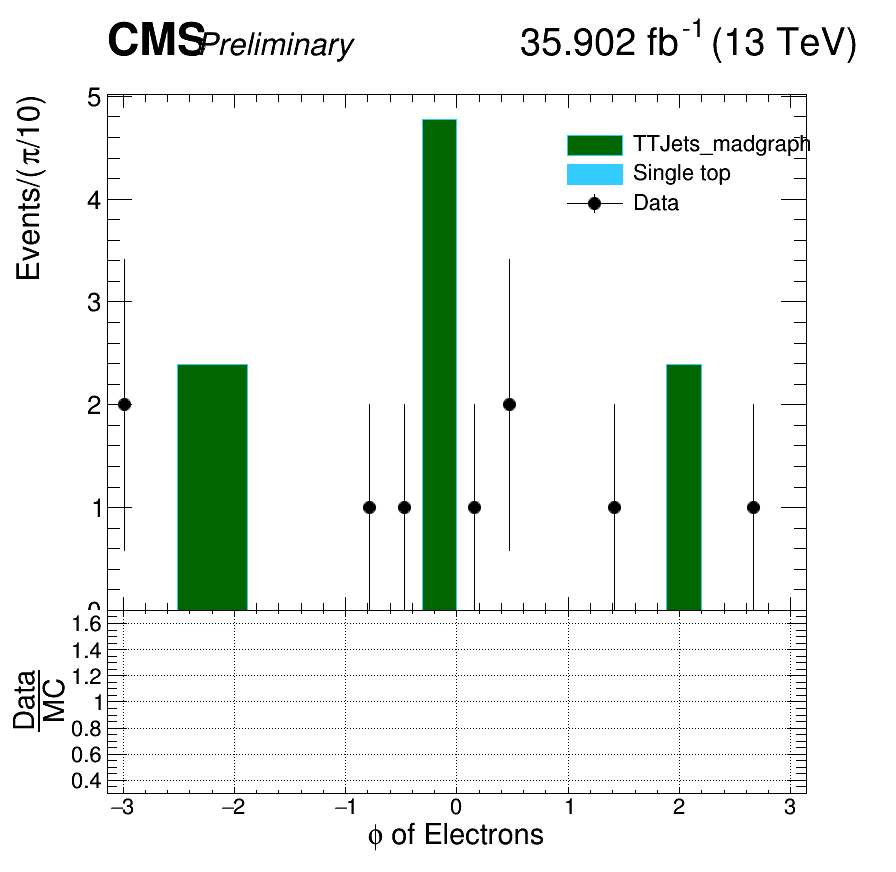

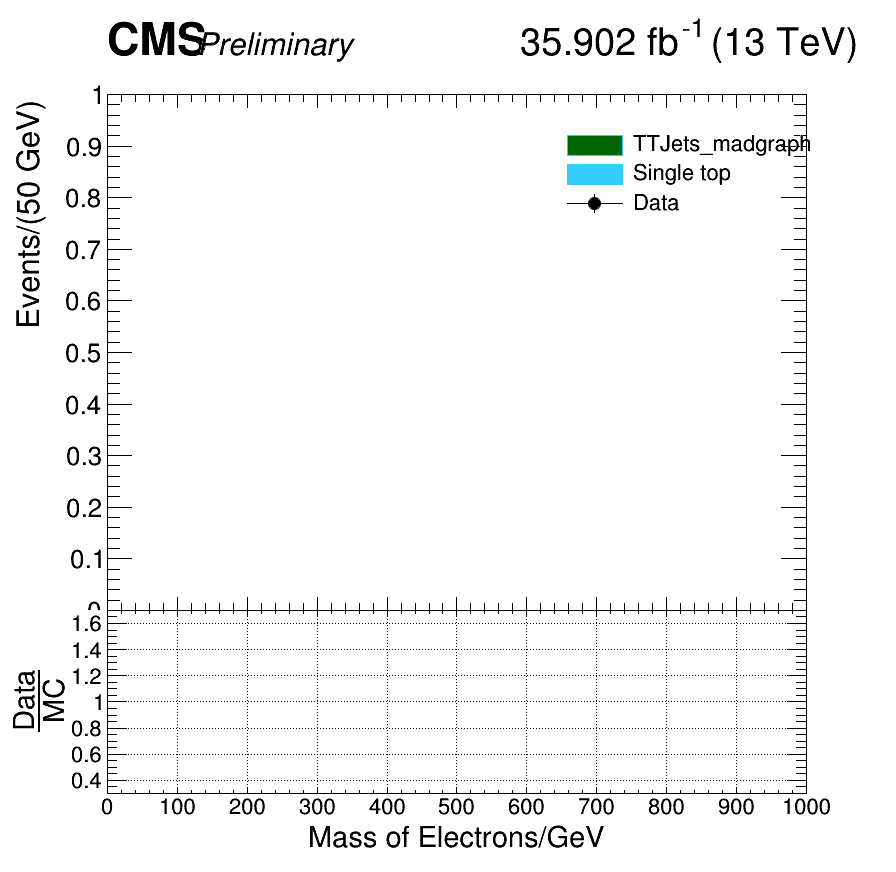

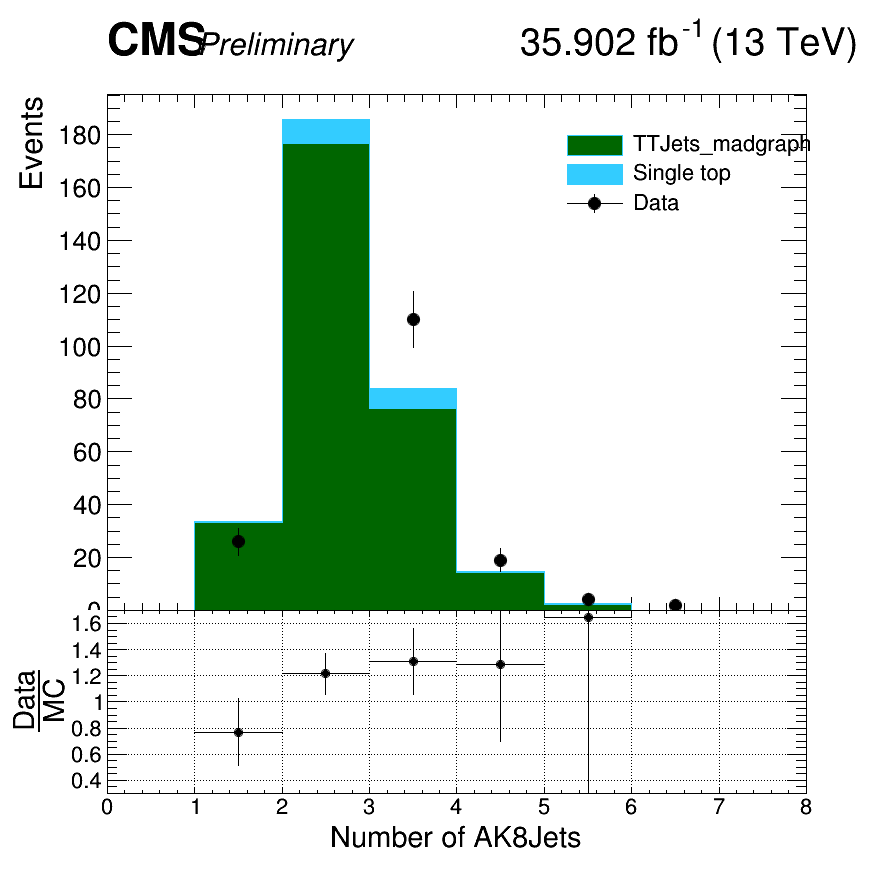

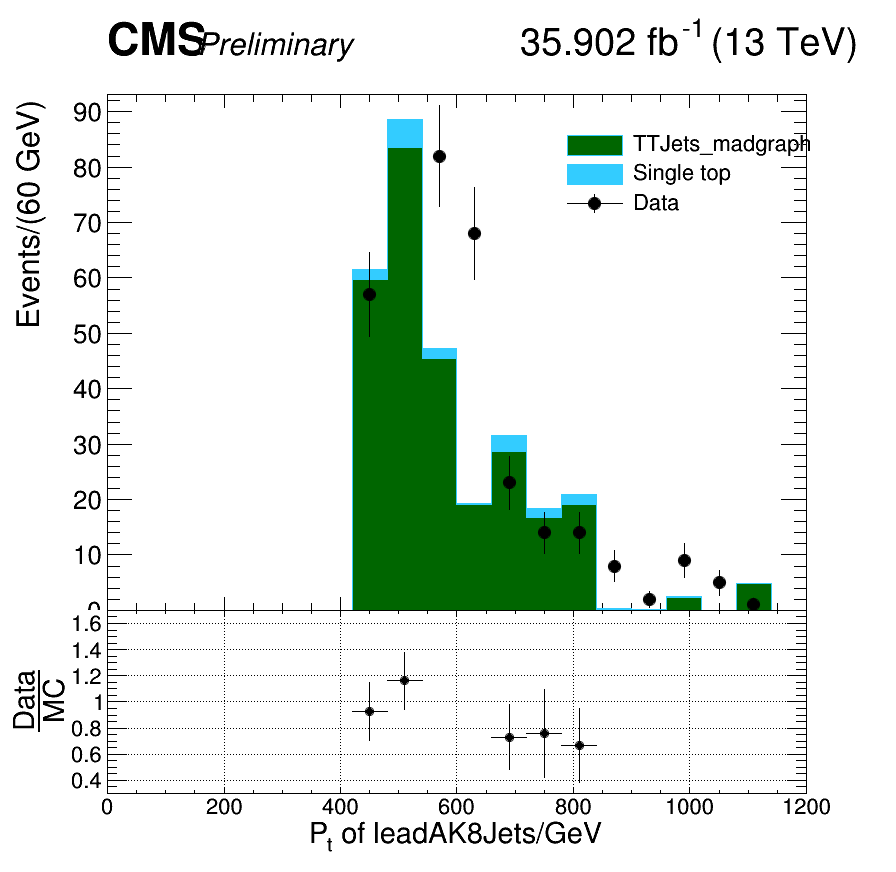

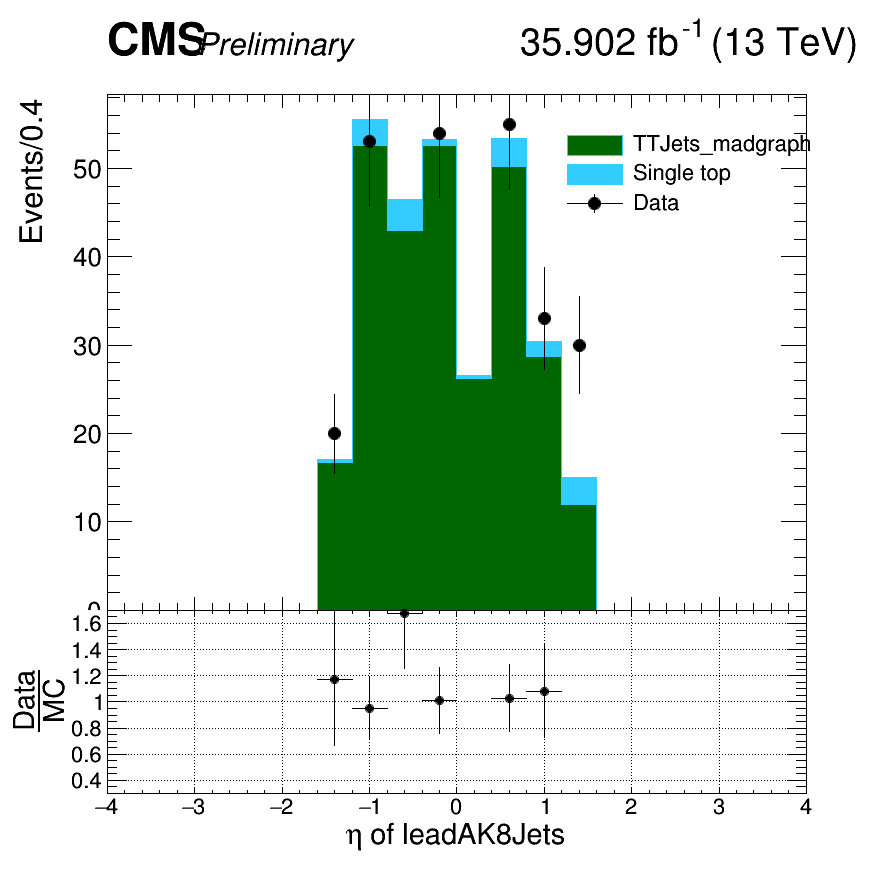

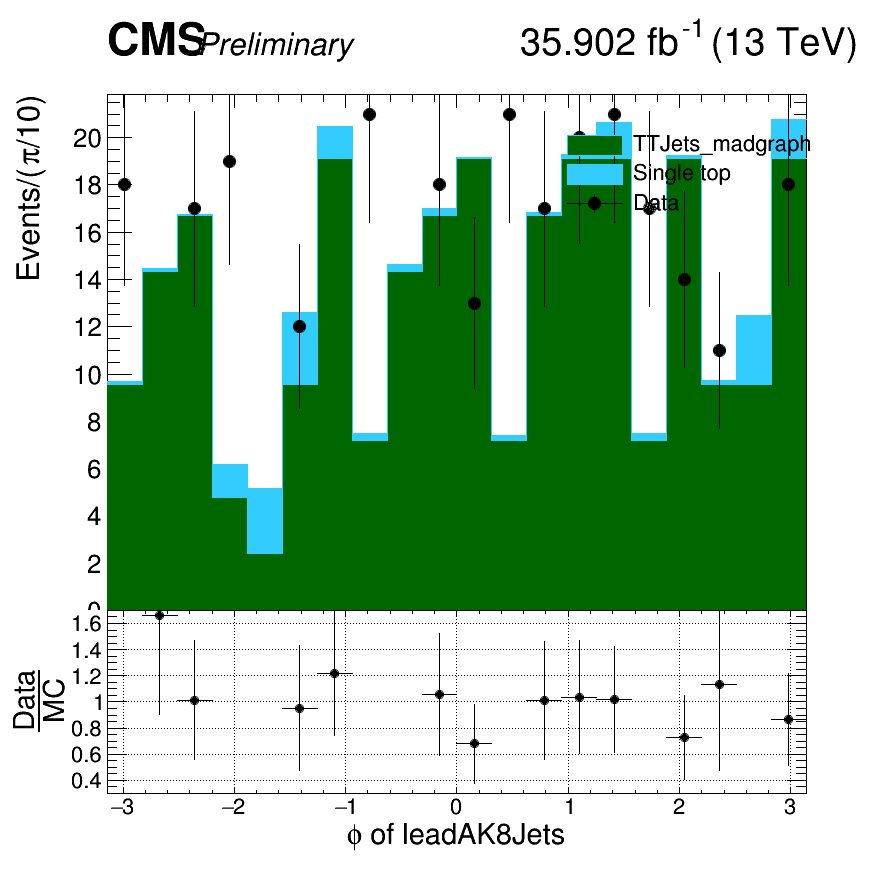

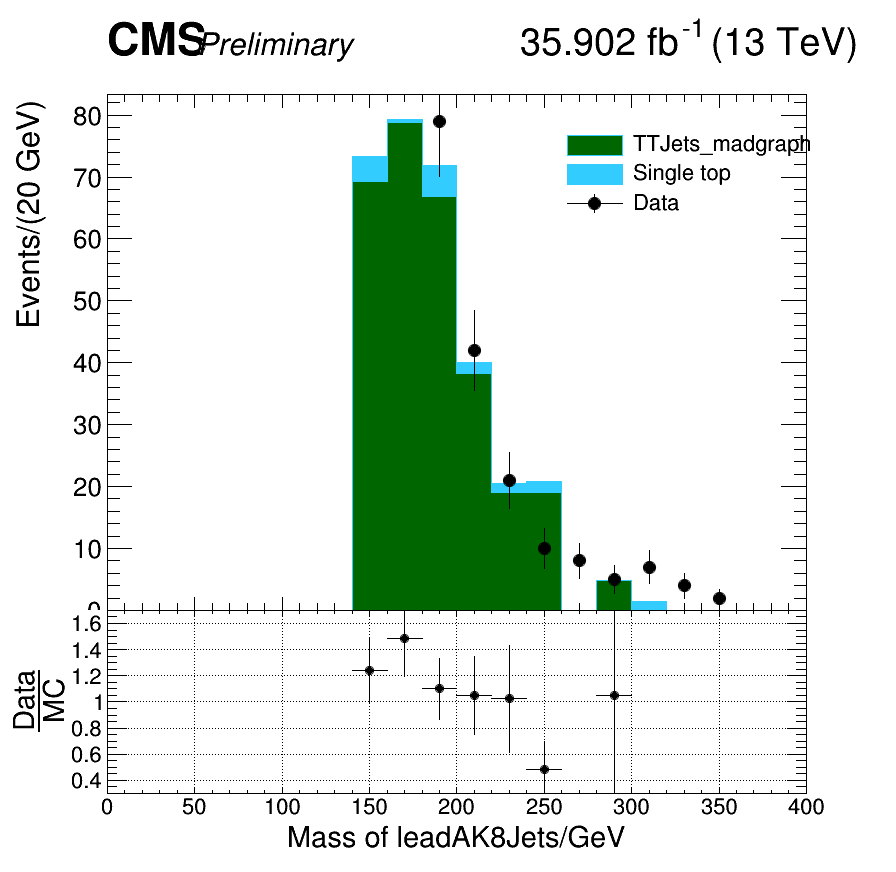

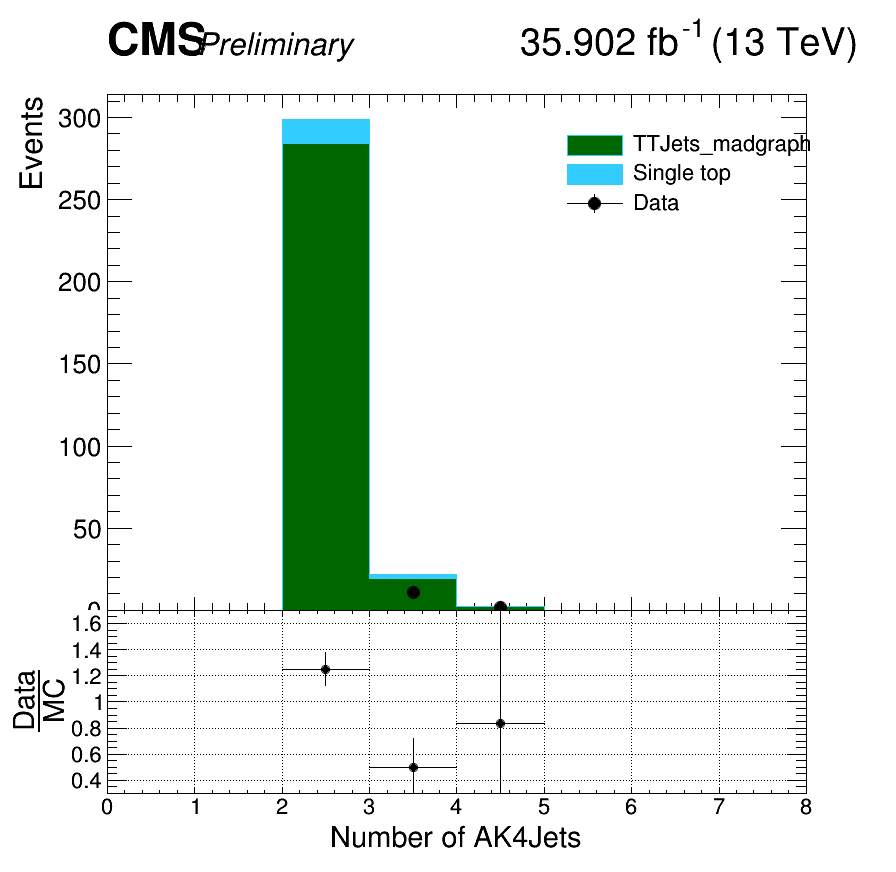

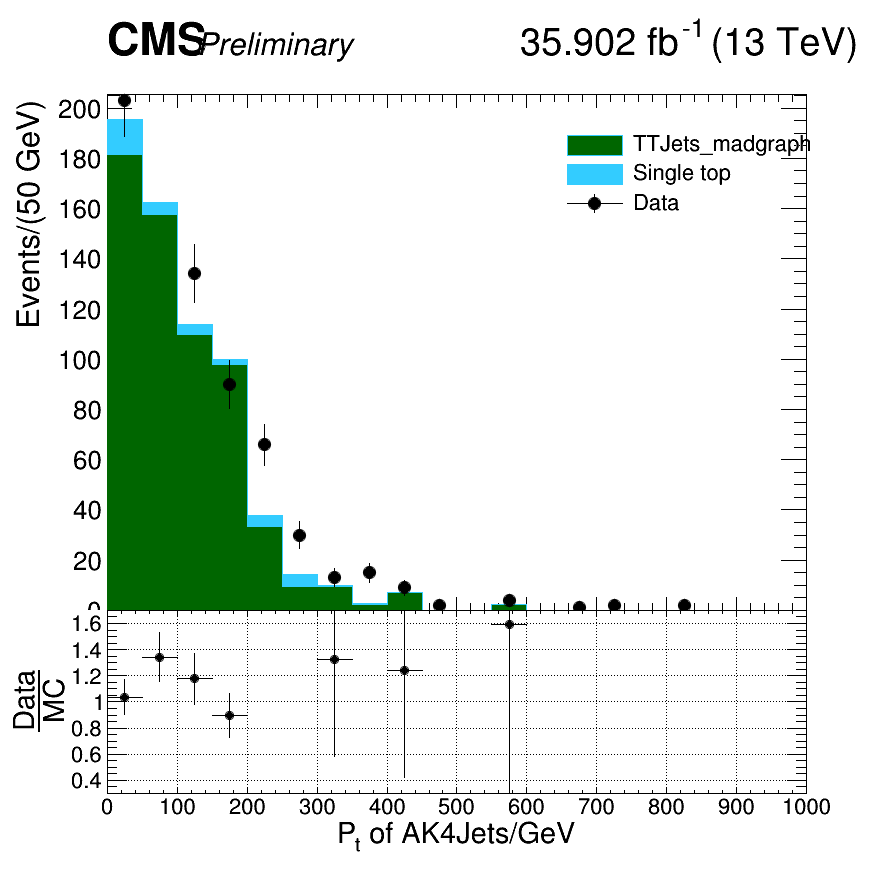

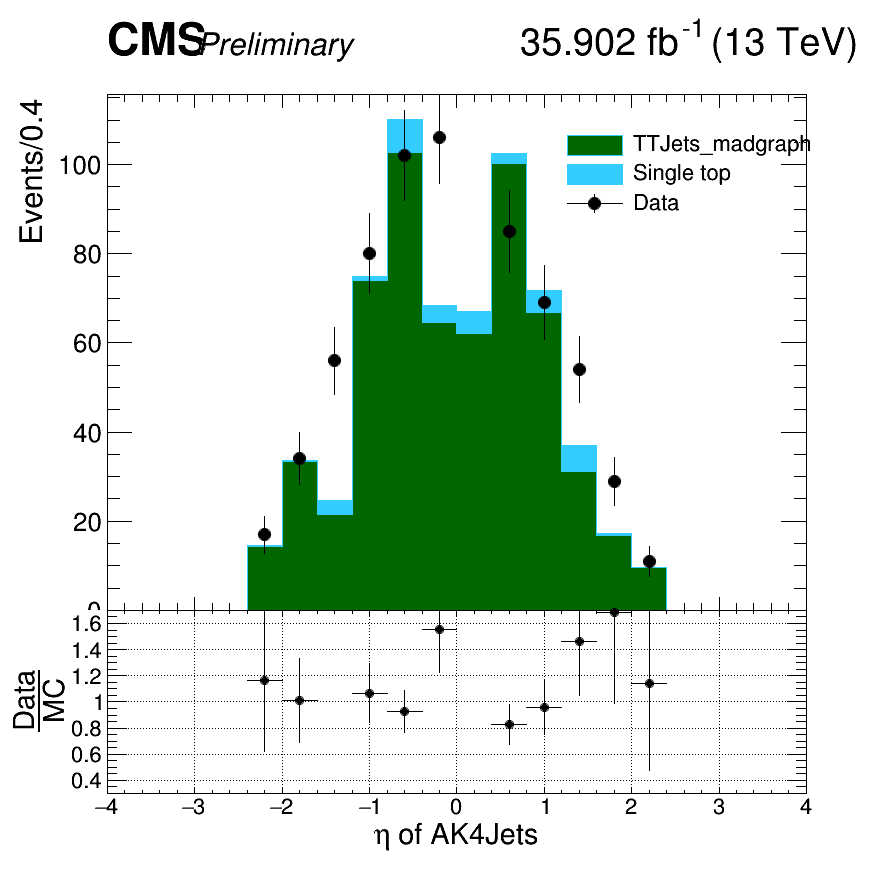

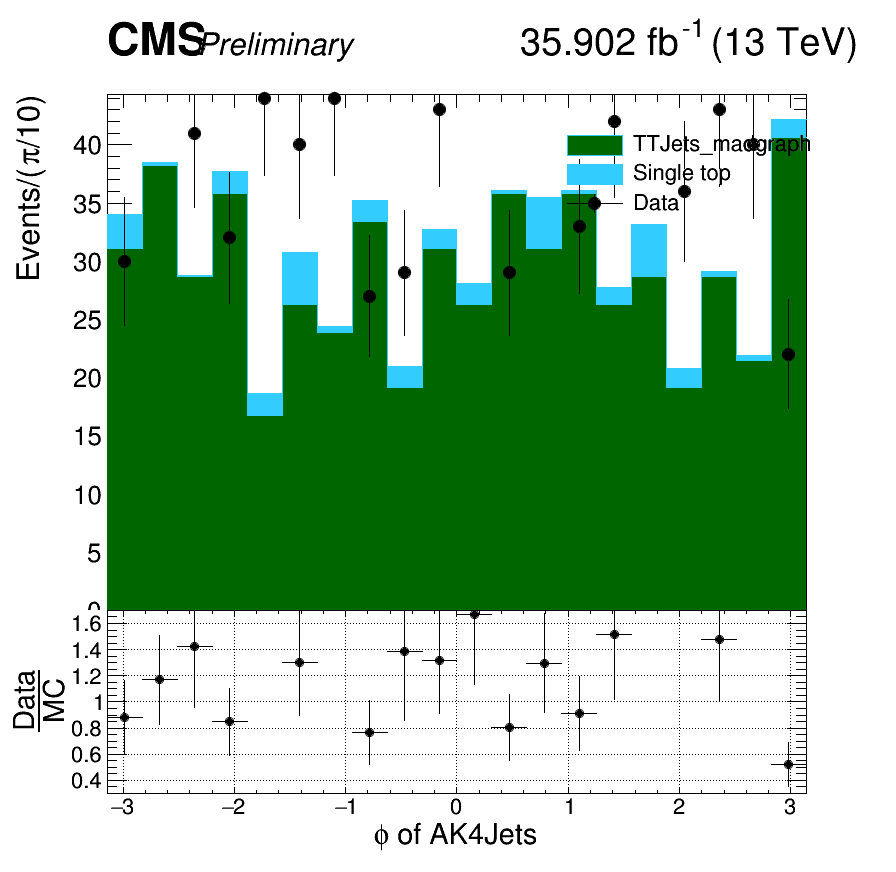

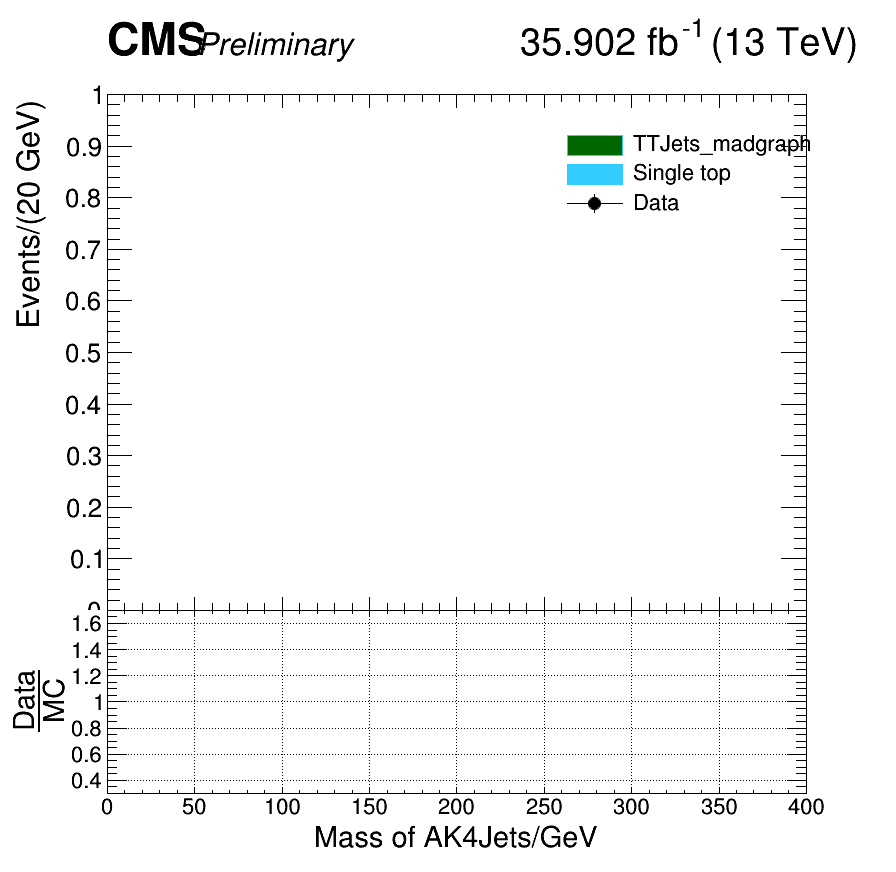

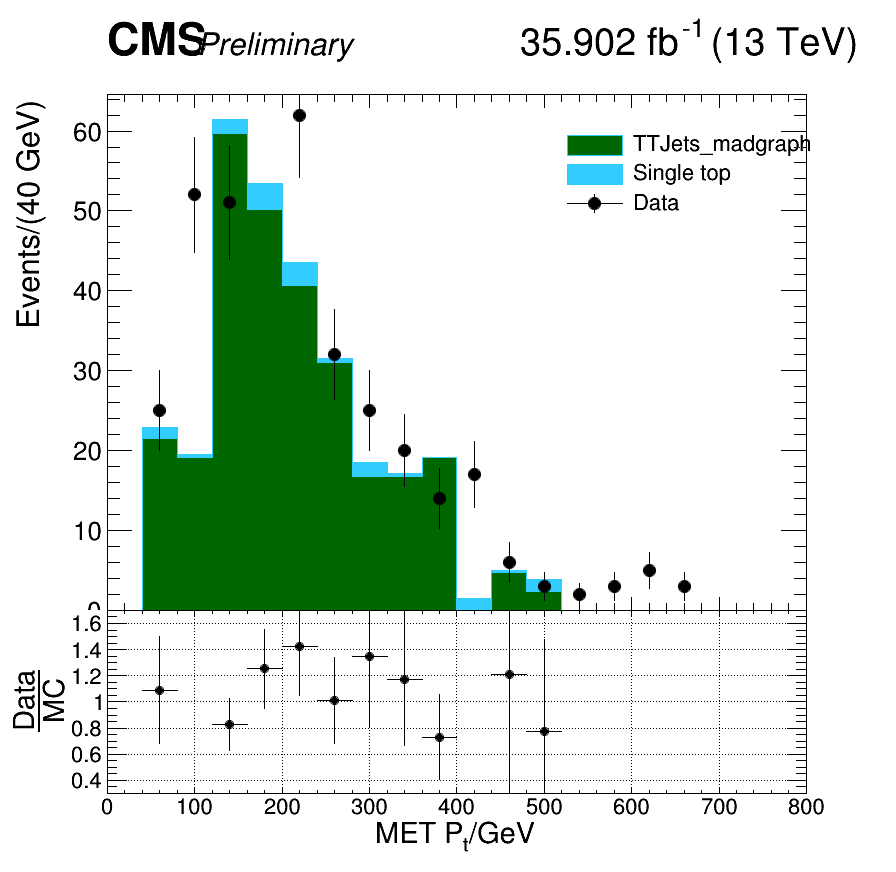

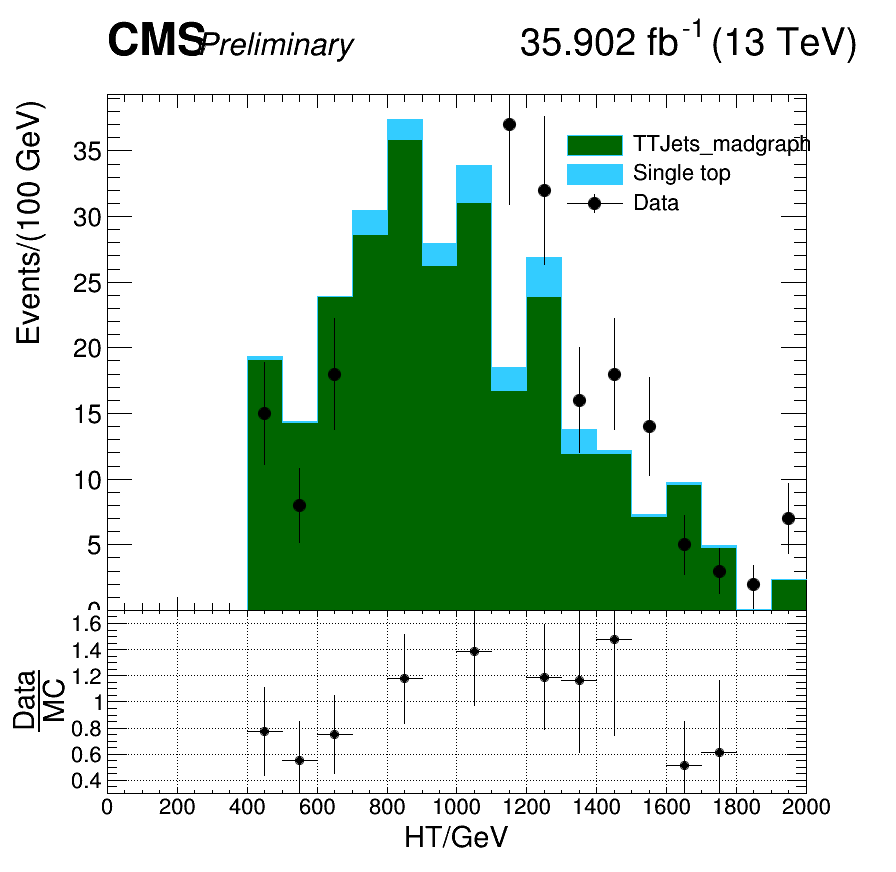

In [14]:
canvas3=np.zeros((l,),rt.TCanvas)
legend3=np.zeros((l,),rt.TLegend)

print MC_Compo[0],"top selection"

CName3=[]
for i in range(1,l+1):
    CName3.append('cmp'+str(i))
Pad1=[]
Pad2=[]
Mc=[]
Ratio=[]
    
for i in range(l):
    canvas3[i] = rt.TCanvas(CName3[i],CName3[i],0,50,900,900)
    canvas3[i].SetFillColor(0)
    canvas3[i].SetBorderMode(0)
    canvas3[i].SetBorderSize(0)
    canvas3[i].SetFrameFillStyle(0)
    canvas3[i].SetFrameBorderMode(0)
    canvas3[i].SetFrameLineWidth(0)
    canvas3[i].SetLeftMargin( L/W )
    canvas3[i].SetRightMargin( R/W )
    canvas3[i].SetTopMargin( T/H )
    canvas3[i].SetBottomMargin( B/H )
    canvas3[i].SetTickx(0)
    canvas3[i].SetTicky(0)
#canvas.Draw()

    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95, -1,0,0);
    pad1.SetBottomMargin(0.); #// Upper and lower plot are joined
#pad1.SetGridx();         #// Vertical grid
    pad1.SetBorderMode(0)
    pad1.SetBorderSize(0)
    pad1.SetFrameLineWidth(0)
    pad1.SetFrameBorderMode(0)
    pad1.Draw()           #// Draw the upper pad: pad1
    pad1.cd()
    Pad1.append(pad1)

               #// pad1 becomes the current pad
    Data_topSel[i].SetMarkerSize(1.5)
    Data_topSel[i].SetMarkerColor(rt.kBlack)
    Data_topSel[i].SetMarkerStyle(20)
    Data_topSel[i].SetLineColor(rt.kBlack)

    TTm_topSel[i].SetLineColor(rt.kAzure+8)
    TTm_topSel[i].SetFillColor(rt.kGreen+3)

    st_topSel[i].SetLineColor(rt.kAzure+8)
    st_topSel[i].SetFillColor(rt.kAzure+8)


    mc = rt.THStack("MC",Title_topSel[i][1])
    mc.Add(TTm_topSel[i])
    mc.Add(st_topSel[i])
    mc.Draw("hist")
    mc.GetYaxis().SetTitle(Title_topSel[i][0])
    mc.GetXaxis().SetTitle(Title_topSel[i][2])
    mc.GetYaxis().SetTitleOffset(0.9)
    Mc.append(mc)

    mc.Draw("samehist")
    Data_topSel[i].Draw("esamex0")
    
    CMS_lumi.CMS_lumi(canvas3[i], iPeriod, iPos)
#    canvas[i].cd()

    canvas3[i].cd()
    canvas3[i].Update()
    canvas3[i].RedrawAxis()
    frame = canvas3[i].GetFrame()
    frame.Draw()

    pad2 = rt.TPad("pad2","pad2",0,0.0,1,0.3, -1,0,0)
    pad2.SetTopMargin(0)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    pad2.cd()
    pad2.SetBottomMargin(0.3)
    Pad2.append(pad2)

    ratio = rt.TH1D(Title_topSel[i][1],";;",*Range_topSel[i])
    ratio.GetXaxis().SetTitle(Title_topSel[i][2]);
    ratio.Add(Data_topSel[i])
    #ratio.GetYaxis().SetTitleOffset(0.);
    ratio.GetYaxis().CenterTitle(rt.kTRUE);
    ratio.GetXaxis().CenterTitle(rt.kTRUE);
    ratio.GetYaxis().SetRangeUser(0.3,1.7)

    MC = rt.TH1D(Title_topSel[i][1],";;",*Range_topSel[i])
    MC.Add(TTm_topSel[i])
    MC.Add(st_topSel[i])

    ratio.GetYaxis().SetTitle("#frac{Data}{MC}")
    ratio.Sumw2()
    ratio.SetStats(0)
    ratio.Divide(MC)
    ratio.GetYaxis().SetLabelSize(0.09)
    ratio.GetXaxis().SetLabelSize(0.09)
    ratio.SetMarkerColor(rt.kBlack)
    ratio.SetMarkerStyle(20)
    ratio.SetLineColor(rt.kBlack)
    ratio.GetYaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetTitleOffset(0.4)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetXaxis().SetTitleOffset(0.85)
    Ratio.append(ratio)
    #ratio.SetAxisRange(50,150)

    ratio.Draw("EP")
    canvas3[i].cd()


    legend3[i] =  rt.TLegend(x0_l,y0_l,x1_l, y1_l )
    legend3[i].AddEntry(TTp_topSel[i],MC_Compo[0],"f")

    legend3[i].AddEntry(st_topSel[i],"Single top","f")
    legend3[i].AddEntry(Data_topSel[i],"Data","lep")
    legend3[i].SetTextFont(42)
    legend3[i].SetTextAngle(0)
    legend3[i].SetTextColor(rt.kBlack)    
    #legend.SetTextSize(0.05)    
    legend3[i].SetTextAlign(12) 
    legend3[i].SetBorderSize(0)
    legend3[i].SetFillStyle(0)
    #legend.SetLinewdith(0)
    legend3[i].Draw()

    canvas3[i].Print("/t3home/gelliu/Unfolding_Substructure/Figures/TT_madgraph_topSel/"+Objects_topSel[i]+".png")
    canvas3[i].Update()
    canvas3[i].Draw()

In [13]:
f_Data=[]
f_MC=[]